In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Loading dataset
data=pd.read_csv("stroke prediction.csv")

In [6]:
#Imputing cont missing values with mean
data.bmi.fillna(data["bmi"].mean(),inplace=True)

In [7]:
#imputing cat missing value with mode
data.smoking_status.fillna(data["smoking_status"].mode()[0],inplace=True)

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#dropping unwanted column
data.drop(columns=["id","Residence_type"],inplace=True)

In [13]:
data.head()

gender   age  hypertension  heart_disease ever_married     work_type  \
0    Male   3.0             0              0           No      children   
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

   avg_glucose_level   bmi   smoking_status  stroke bmi_healthissues  \
0              95.12  18.0     never smoked       0      underweight   
1              87.96  39.2     never smoked       0            obese   
2             110.89  17.6     never smoked       0      underweight   
3              69.04  35.9  formerly smoked       0            obese   
4             161.28  19.1     never smoked       0          healthy   

      Sugar_level  
0          normal  
1          normal  
2  pre & diabetic  
3       low sugar  
4  pre & diabetic

In [14]:
#Feature engineering
data["bmi_healthissues"]=pd.cut(data.bmi,bins=[0,18.5,25,30,100],labels=["underweight","healthy","overweight","obese"])
data["Sugar_level"]=pd.cut(data.avg_glucose_level,bins=[50,70,100,300],labels=["low sugar","normal","pre & diabetic"])

In [15]:
#one hot encoding
data1=pd.DataFrame()
data1=pd.get_dummies(data,columns=["gender","ever_married","work_type","smoking_status","bmi_healthissues","Sugar_level"],drop_first=True)

In [18]:
data1.to_csv('heart stroke.csv', index=False)

In [16]:
X=data1.drop(columns="stroke")
y=data1["stroke"]

In [10]:
#Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(X,y,test_size=0.2,stratify=y)

# Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression as LogReg

In [12]:
logreg = LogReg(class_weight="balanced")

In [13]:
from sklearn.model_selection import cross_val_score
log_reg_score = cross_val_score(logreg, X = train_x, y = train_y,scoring="roc_auc", cv = 10)
log_reg_score 

array([0.84992905, 0.84527954, 0.83925362, 0.81933592, 0.84717857,
       0.83777303, 0.8579996 , 0.86556594, 0.86156626, 0.88259835])

In [14]:
log_reg_score .mean()*100, log_reg_score .std()*100

(85.06479870421926, 1.6534937513223764)

In [15]:
logreg.fit(train_x, train_y)

LogisticRegression(class_weight='balanced')

In [16]:
lr_probs = logreg.predict_proba(test_x)

In [17]:
lr_probs = lr_probs[:, 1]

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve,f1_score
test_predict = logreg.predict(test_x)
# Calculating f1-score
k = f1_score(test_predict, test_y)
print('Testing f1_score', k )

Testing f1_score 0.10094637223974763
Testing rocauc_score 0.5246008376606953


In [19]:
lr_auc = roc_auc_score(test_y, lr_probs)

In [22]:
print('Logistic: ROC AUC=',(lr_auc))

Logistic: ROC AUC= 0.8496350452242003


# DT

In [23]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifier=DecisionTreeClassifier(random_state=40)

classifier.fit(train_x,train_y)

y_train_pred1 = classifier.predict(train_x)
y_test_pred1 = classifier.predict(test_x)

In [25]:
print(f1_score(train_y,y_train_pred1),f1_score(test_y,y_test_pred1))
print(roc_auc_score(train_y,y_train_pred1),roc_auc_score(test_y,y_test_pred1))

1.0 0.10285714285714286
1.0 0.5470585026204852


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [27]:
from sklearn.model_selection import cross_val_score


In [28]:
def val_score(n_neighbors):
    
    avg=[]
    std=[]
    
    
    for i in n_neighbors:
        score = cross_val_score(KNN(n_neighbors=i),scoring='f1',X=train_x, y=train_y, cv=10)
        
        
        avg.append(score.mean())
        std.append(score.std())
        
    return avg,std

In [29]:
n_neighbors = range(1,10)
mean, std = val_score(n_neighbors)

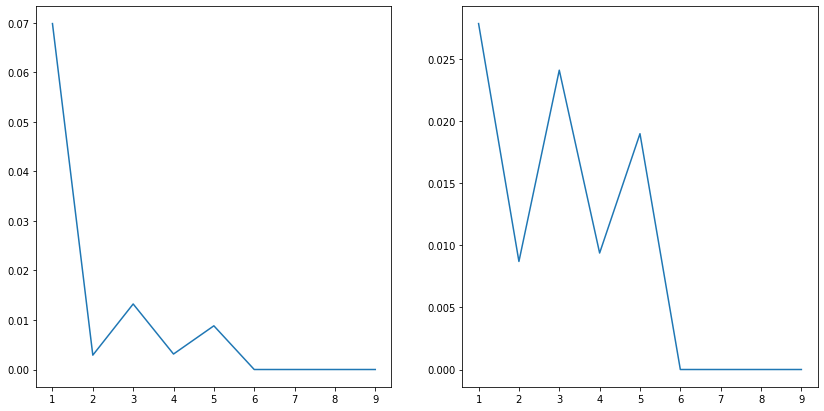

In [30]:
fig,ax=plt.subplots(1,2,figsize=(14,7))

sns.lineplot(y=mean,x=range(1,10),ax=ax[0])
sns.lineplot(y=std,x=range(1,10),ax=ax[1])

In [31]:
classifier=KNN(n_neighbors=3)

classifier.fit(train_x,train_y)

y_train_pred=classifier.predict(train_x)
y_test_pred=classifier.predict(test_x)

print(f1_score(train_y,y_train_pred),f1_score(test_y,y_test_pred))
print(roc_auc_score(train_y,y_train_pred),roc_auc_score(test_y,y_test_pred))

0.20793433652530777 0.021505376344086023
0.5602775806260871 0.5047854774379703


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [33]:
#train the model and make predictions
naive_bayes.fit(train_x, train_y)
predictions = naive_bayes.predict(test_x)
print(f1_score(test_y, predictions))
print(roc_auc_score(test_y, predictions))

0.06047430830039526
0.7086033968781364


# SVM WITH LINEAR KERNEL 

In [34]:
from sklearn.svm import SVC
# Creating instance of SVC
svc = SVC(kernel="linear",class_weight="balanced")

# Fitting the model
#svc.fit(train_x, train_y)

In [35]:
# Fitting the model
svc.fit(train_x, train_y)

SVC(class_weight='balanced', kernel='linear')

In [36]:
from sklearn.metrics import f1_score
# Predicting over the Test
test_predict = svc.predict(test_x)
print(f1_score(test_predict, test_y))
print(roc_auc_score(test_predict, test_y))

0.09648466716529544
0.5233541239706294


# ENSEMBLE TECHNIQUES

In [37]:
#BASIC ENSEMBLING USING MODE BASED PREDICTION ON MULTIPLE MODEL OUTPUT
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
model1 = LogisticRegression(class_weight="balanced")
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
pred1[:10], model1.score(test_x, test_y)


(array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64), 0.7373271889400922)

In [39]:
print(f1_score(pred1, test_y))
print(roc_auc_score(pred1, test_y))

0.10094637223974763
0.5246008376606953


KNN

In [40]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:10], model2.score(test_x, test_y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.9790322580645161)

In [41]:
print(f1_score(pred2, test_y))
print(roc_auc_score(pred2, test_y))

0.021505376344086023
0.5255242567133956


DT

In [42]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)
pred3[:10], model3.score(test_x, test_y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 0.9819124423963134)

In [44]:
print(f1_score(pred3, test_y))


0.0


In [45]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy_score(test_y, final_pred)

0.9792626728110599

In [47]:
f1_score(test_y, final_pred)

0.02173913043478261

In [48]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #score on the training data
    score=model.score(train_x,train_y)
    print('Training Score:', score)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    print()
    return pred_train, pred_test

In [49]:
#Model 1 - Logistic Regression
LR=LogisticRegression(class_weight="balanced")
M1_train, M1_test = model_predictions(LR, train_x, train_y, test_x)

Training Score: 0.7463133640552996



In [50]:
#Model 2 - Decision Tree
DT=DecisionTreeClassifier()
M2_train, M2_test = model_predictions(DT, train_x, train_y, test_x)

Training Score: 1.0



In [51]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [52]:
#Model 3 - k Nearest Neighbour
knn=KNeighborsClassifier()
M3_train, M3_test = model_predictions(knn, train_x, train_y, test_x)

Training Score: 0.982286866359447



In [53]:
#Creating a New train dataframe
train_prediction = {
              'LR': M1_train,
              'DT': M2_train,
              'knn': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

LR  DT  knn
0   0   0    0
1   0   0    0
2   1   0    0
3   0   0    0
4   0   0    0

In [54]:
#Creating a New test dataframe
test_prediction = {
              'LR': M1_test,
              'DT': M2_test,
              'knn': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

LR  DT  knn
0   1   0    0
1   0   0    0
2   0   0    0
3   0   0    0
4   0   0    0

In [56]:
# Stacker Model
model = DecisionTreeClassifier()
predicts=model.fit(train_predictions, train_y)
pre=model.predict(test_predictions)
model.score(test_predictions,test_y)

0.9625576036866359

In [57]:
roc_auc_score(pre,test_y)

0.531686320754717

In [58]:
train_x=pd.DataFrame(train_x)
test_x=pd.DataFrame(test_x)

In [59]:
from sklearn.model_selection import KFold
def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = KFold(n_splits, random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictionson Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

In [60]:
## Base Linear Regression model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
M1_train, M1_test = kfold_predictions( LR, 10, train_x, train_y, test_x) 
#lr_train_pred.shape, lr_test_pred.shape, data_x.shape, data_y.shape

In [61]:
# Base Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
M2_train, M2_test = kfold_predictions(DT, 10, train_x, train_y, test_x) 
#dt_train_pred.shape, dt_test_pred.shape, data_x.shape, data_y.shape

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [63]:
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

In [64]:
# Base K-Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
M3_train, M3_test= kfold_predictions( knn, 10, train_x, train_y, test_x) 
#knn_train_pred.shape, knn_test_pred.shape, data_x.shape, data_y.shape

In [65]:
# Arranging Train KFold Predictions
train_prediction = {
              'LR': M1_train,
              'KNN': M3_train,
              'DT': M2_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

LR  KNN  DT
0   0    0   0
1   0    0   0
2   0    0   0
3   0    0   0
4   0    0   0

In [66]:
# Arranging test KFold Predictions
test_prediction = {
              'LR': M1_test,
              'KNN': M3_test,
              'DT': M2_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

LR  KNN  DT
0   0    0   0
1   0    0   0
2   0    0   0
3   0    0   0
4   0    0   0

In [67]:
# Final Model taking the previous predictions as training set
model= LR
model.fit(train_predictions, train_y)
final = model.predict(test_predictions)
model.score( test_predictions ,test_y)

0.9819124423963134

In [68]:
f1_score(final,test_y)

0.0

In [69]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(test_y,final))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



In [72]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [78]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96,bootstrap=True,class_weight="balanced",max_depth=3)

In [79]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=96)

In [80]:
final1=clf.predict(test_x)

In [81]:
print(classification_report(test_y,final1))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80      8523
           1       0.04      0.86      0.09       157

    accuracy                           0.67      8680
   macro avg       0.52      0.76      0.44      8680
weighted avg       0.98      0.67      0.78      8680



# GBM 

In [87]:
#Importing GBDT Classifier 
from sklearn.ensemble import GradientBoostingClassifier
#creating an Gradient boosting instance
GRD_clf = GradientBoostingClassifier(n_estimators=200,subsample=0.7,random_state=96)

In [88]:
#training the model
GRD_clf.fit(train_x,train_y)

GradientBoostingClassifier(n_estimators=200, random_state=96, subsample=0.7)

In [89]:
gb_predict=GRD_clf.predict(test_x)

In [90]:
print(classification_report(test_y,gb_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.17      0.01      0.01       157

    accuracy                           0.98      8680
   macro avg       0.57      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



In [101]:
clf2 = GradientBoostingClassifier(n_estimators=250,
                                 random_state=96,  
                                 max_depth=12,
                                 n_iter_no_change=5,
                                 tol = 0.001,
                                 )

In [102]:
#training the model
clf2.fit(train_x,train_y)

GradientBoostingClassifier(max_depth=12, n_estimators=250, n_iter_no_change=5,
                           random_state=96, tol=0.001)

In [103]:
predss=clf2.predict(test_x)

In [104]:
print(classification_report(test_y,predss))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8523
           1       0.06      0.04      0.05       157

    accuracy                           0.97      8680
   macro avg       0.52      0.51      0.52      8680
weighted avg       0.97      0.97      0.97      8680



In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [108]:
from xgboost import XGBClassifier

In [109]:
clf = XGBClassifier(random_state=96)

In [110]:
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
predss1=clf2.predict(test_x)

In [112]:
print(classification_report(test_y,predss1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8523
           1       0.06      0.04      0.05       157

    accuracy                           0.97      8680
   macro avg       0.52      0.51      0.52      8680
weighted avg       0.97      0.97      0.97      8680



In [2]:
from catboost import CatBoostClassifier

In [1]:
!pip install catboost

In [116]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [39]:
data.loc[data["gender","ever_married","work_type","Residence_type","smoking_status"]].astype("category")

KeyError: ('gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status')

In [9]:
X1=data.drop(columns="stroke")
y1=data["stroke"]

In [10]:
X1.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
bmi_healthissues     category
Sugar_level          category
dtype: object

In [61]:
categorical_features_indices = ["bmi_healthissues","Sugar_level","gender","smoking_status","ever_married","work_type","Residence_type"]

In [11]:
from sklearn.model_selection import train_test_split
train_x1,test_x1,train_y1,test_y1= train_test_split(X1,y1,test_size=0.2,stratify=y1)

In [15]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=500, depth=3, learning_rate=0.1)
#model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

In [ ]:

categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [22]:

model.fit(train_x1,train_y1,cat_features=categorical_features_indices,eval_set=(test_x1, test_y1),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4962428	test: 0.4962234	best: 0.4962234 (0)	total: 1.48s	remaining: 12m 17s
1:	learn: 0.3771343	test: 0.3771081	best: 0.3771081 (1)	total: 1.56s	remaining: 6m 29s
2:	learn: 0.2953967	test: 0.2953082	best: 0.2953082 (2)	total: 1.63s	remaining: 4m 30s
3:	learn: 0.2292467	test: 0.2290580	best: 0.2290580 (3)	total: 1.73s	remaining: 3m 34s
4:	learn: 0.1817145	test: 0.1812541	best: 0.1812541 (4)	total: 1.83s	remaining: 3m 1s
5:	learn: 0.1527435	test: 0.1523063	best: 0.1523063 (5)	total: 1.91s	remaining: 2m 37s
6:	learn: 0.1317118	test: 0.1312832	best: 0.1312832 (6)	total: 1.99s	remaining: 2m 20s
7:	learn: 0.1191548	test: 0.1188211	best: 0.1188211 (7)	total: 2.05s	remaining: 2m 6s
8:	learn: 0.1094363	test: 0.1091334	best: 0.1091334 (8)	total: 2.11s	remaining: 1m 55s
9:	learn: 0.1003211	test: 0.1000788	best: 0.1000788 (9)	total: 2.18s	remaining: 1m 46s
10:	learn: 0.0945548	test: 0.0943614	best: 0.0943614 (10)	total: 2.24s	remaining: 1m 39s
11:	learn: 0.0910516	test: 0.0908975	best:

96:	learn: 0.0723600	test: 0.0731535	best: 0.0731483 (90)	total: 7.7s	remaining: 32s
97:	learn: 0.0723294	test: 0.0731441	best: 0.0731441 (97)	total: 7.76s	remaining: 31.8s
98:	learn: 0.0723018	test: 0.0731335	best: 0.0731335 (98)	total: 7.8s	remaining: 31.6s
99:	learn: 0.0723006	test: 0.0731329	best: 0.0731329 (99)	total: 7.84s	remaining: 31.4s
100:	learn: 0.0723005	test: 0.0731326	best: 0.0731326 (100)	total: 7.88s	remaining: 31.1s
101:	learn: 0.0722965	test: 0.0731284	best: 0.0731284 (101)	total: 7.94s	remaining: 31s
102:	learn: 0.0722946	test: 0.0731257	best: 0.0731257 (102)	total: 8s	remaining: 30.8s
103:	learn: 0.0722912	test: 0.0731330	best: 0.0731257 (102)	total: 8.06s	remaining: 30.7s
104:	learn: 0.0722905	test: 0.0731289	best: 0.0731257 (102)	total: 8.13s	remaining: 30.6s
105:	learn: 0.0722866	test: 0.0731258	best: 0.0731257 (102)	total: 8.19s	remaining: 30.5s
106:	learn: 0.0721877	test: 0.0730016	best: 0.0730016 (106)	total: 8.25s	remaining: 30.3s
107:	learn: 0.0721530	test:

189:	learn: 0.0706593	test: 0.0725096	best: 0.0725003 (187)	total: 13.7s	remaining: 22.3s
190:	learn: 0.0706317	test: 0.0724868	best: 0.0724868 (190)	total: 13.7s	remaining: 22.2s
191:	learn: 0.0706069	test: 0.0724658	best: 0.0724658 (191)	total: 13.8s	remaining: 22.1s
192:	learn: 0.0706044	test: 0.0724656	best: 0.0724656 (192)	total: 13.8s	remaining: 22s
193:	learn: 0.0705634	test: 0.0724265	best: 0.0724265 (193)	total: 13.9s	remaining: 21.9s
194:	learn: 0.0705612	test: 0.0724264	best: 0.0724264 (194)	total: 13.9s	remaining: 21.8s
195:	learn: 0.0705371	test: 0.0724200	best: 0.0724200 (195)	total: 14s	remaining: 21.7s
196:	learn: 0.0705143	test: 0.0724077	best: 0.0724077 (196)	total: 14.1s	remaining: 21.6s
197:	learn: 0.0705139	test: 0.0724050	best: 0.0724050 (197)	total: 14.1s	remaining: 21.5s
198:	learn: 0.0704861	test: 0.0724024	best: 0.0724024 (198)	total: 14.2s	remaining: 21.4s
199:	learn: 0.0704751	test: 0.0724077	best: 0.0724024 (198)	total: 14.2s	remaining: 21.3s
200:	learn: 0.

282:	learn: 0.0692771	test: 0.0724188	best: 0.0723536 (241)	total: 19.7s	remaining: 15.1s
283:	learn: 0.0692641	test: 0.0724239	best: 0.0723536 (241)	total: 19.8s	remaining: 15s
284:	learn: 0.0692552	test: 0.0724319	best: 0.0723536 (241)	total: 19.8s	remaining: 14.9s
285:	learn: 0.0692337	test: 0.0724294	best: 0.0723536 (241)	total: 19.9s	remaining: 14.9s
286:	learn: 0.0692225	test: 0.0724381	best: 0.0723536 (241)	total: 19.9s	remaining: 14.8s
287:	learn: 0.0692024	test: 0.0724088	best: 0.0723536 (241)	total: 20s	remaining: 14.7s
288:	learn: 0.0691915	test: 0.0724188	best: 0.0723536 (241)	total: 20s	remaining: 14.6s
289:	learn: 0.0691810	test: 0.0724181	best: 0.0723536 (241)	total: 20s	remaining: 14.5s
290:	learn: 0.0691583	test: 0.0724176	best: 0.0723536 (241)	total: 20.1s	remaining: 14.4s
291:	learn: 0.0691376	test: 0.0724110	best: 0.0723536 (241)	total: 20.2s	remaining: 14.4s
292:	learn: 0.0691156	test: 0.0723817	best: 0.0723536 (241)	total: 20.3s	remaining: 14.3s
293:	learn: 0.0690

376:	learn: 0.0681908	test: 0.0723865	best: 0.0723155 (319)	total: 25.6s	remaining: 8.34s
377:	learn: 0.0681888	test: 0.0723850	best: 0.0723155 (319)	total: 25.7s	remaining: 8.29s
378:	learn: 0.0681720	test: 0.0723812	best: 0.0723155 (319)	total: 25.8s	remaining: 8.24s
379:	learn: 0.0681555	test: 0.0723553	best: 0.0723155 (319)	total: 25.9s	remaining: 8.18s
380:	learn: 0.0681379	test: 0.0723513	best: 0.0723155 (319)	total: 26s	remaining: 8.12s
381:	learn: 0.0681375	test: 0.0723502	best: 0.0723155 (319)	total: 26.1s	remaining: 8.05s
382:	learn: 0.0681264	test: 0.0723356	best: 0.0723155 (319)	total: 26.1s	remaining: 7.98s
383:	learn: 0.0681158	test: 0.0723363	best: 0.0723155 (319)	total: 26.2s	remaining: 7.91s
384:	learn: 0.0681152	test: 0.0723402	best: 0.0723155 (319)	total: 26.2s	remaining: 7.84s
385:	learn: 0.0680879	test: 0.0723529	best: 0.0723155 (319)	total: 26.3s	remaining: 7.77s
386:	learn: 0.0680695	test: 0.0723634	best: 0.0723155 (319)	total: 26.4s	remaining: 7.7s
387:	learn: 0

468:	learn: 0.0671939	test: 0.0724423	best: 0.0723155 (319)	total: 31.8s	remaining: 2.1s
469:	learn: 0.0671880	test: 0.0724497	best: 0.0723155 (319)	total: 31.9s	remaining: 2.04s
470:	learn: 0.0671644	test: 0.0724769	best: 0.0723155 (319)	total: 32s	remaining: 1.97s
471:	learn: 0.0671568	test: 0.0724735	best: 0.0723155 (319)	total: 32.1s	remaining: 1.9s
472:	learn: 0.0671386	test: 0.0724871	best: 0.0723155 (319)	total: 32.3s	remaining: 1.84s
473:	learn: 0.0671352	test: 0.0724935	best: 0.0723155 (319)	total: 32.3s	remaining: 1.77s
474:	learn: 0.0671347	test: 0.0724927	best: 0.0723155 (319)	total: 32.4s	remaining: 1.71s
475:	learn: 0.0671339	test: 0.0724926	best: 0.0723155 (319)	total: 32.5s	remaining: 1.64s
476:	learn: 0.0671212	test: 0.0724876	best: 0.0723155 (319)	total: 32.6s	remaining: 1.57s
477:	learn: 0.0671060	test: 0.0725042	best: 0.0723155 (319)	total: 32.7s	remaining: 1.5s
478:	learn: 0.0670930	test: 0.0725107	best: 0.0723155 (319)	total: 32.7s	remaining: 1.43s
479:	learn: 0.0

In [24]:
prediction=model.predict(test_x1)

In [25]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_y1,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



In [45]:
parameter_grid = {
    'max_depth' : [4,5,6,7,8,9],
    'learning_rate': [0.01,0.03,0.05,0.001,0.005,0.1,0.3,0.5,0.7],
    }

In [47]:
model1=CatBoostClassifier(cat_features=categorical_features_indices)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(estimator=model1, param_distributions=parameter_grid, n_iter= 10)

In [49]:
randomsearch.fit(train_x1, train_y1)

0:	learn: 0.6352094	total: 68.3ms	remaining: 1m 8s
1:	learn: 0.5836076	total: 127ms	remaining: 1m 3s
2:	learn: 0.5237623	total: 195ms	remaining: 1m 4s
3:	learn: 0.4787838	total: 252ms	remaining: 1m 2s
4:	learn: 0.4424825	total: 330ms	remaining: 1m 5s
5:	learn: 0.4011856	total: 387ms	remaining: 1m 4s
6:	learn: 0.3644980	total: 448ms	remaining: 1m 3s
7:	learn: 0.3328098	total: 521ms	remaining: 1m 4s
8:	learn: 0.3050615	total: 580ms	remaining: 1m 3s
9:	learn: 0.2815095	total: 640ms	remaining: 1m 3s
10:	learn: 0.2605516	total: 713ms	remaining: 1m 4s
11:	learn: 0.2412077	total: 775ms	remaining: 1m 3s
12:	learn: 0.2241229	total: 839ms	remaining: 1m 3s
13:	learn: 0.2099559	total: 907ms	remaining: 1m 3s
14:	learn: 0.1972200	total: 966ms	remaining: 1m 3s
15:	learn: 0.1860732	total: 1.03s	remaining: 1m 3s
16:	learn: 0.1750752	total: 1.1s	remaining: 1m 3s
17:	learn: 0.1662204	total: 1.15s	remaining: 1m 2s
18:	learn: 0.1583118	total: 1.21s	remaining: 1m 2s
19:	learn: 0.1506070	total: 1.28s	remaini

162:	learn: 0.0727805	total: 10.5s	remaining: 53.9s
163:	learn: 0.0727050	total: 10.6s	remaining: 53.9s
164:	learn: 0.0726807	total: 10.7s	remaining: 54s
165:	learn: 0.0726780	total: 10.7s	remaining: 53.8s
166:	learn: 0.0726621	total: 10.8s	remaining: 53.6s
167:	learn: 0.0726592	total: 10.8s	remaining: 53.6s
168:	learn: 0.0726592	total: 10.9s	remaining: 53.5s
169:	learn: 0.0726571	total: 10.9s	remaining: 53.3s
170:	learn: 0.0726418	total: 11s	remaining: 53.3s
171:	learn: 0.0726030	total: 11.1s	remaining: 53.2s
172:	learn: 0.0725919	total: 11.1s	remaining: 53.1s
173:	learn: 0.0725897	total: 11.2s	remaining: 53.1s
174:	learn: 0.0725897	total: 11.2s	remaining: 53s
175:	learn: 0.0725337	total: 11.3s	remaining: 53s
176:	learn: 0.0725214	total: 11.4s	remaining: 53s
177:	learn: 0.0724977	total: 11.5s	remaining: 53s
178:	learn: 0.0724754	total: 11.5s	remaining: 52.9s
179:	learn: 0.0724753	total: 11.6s	remaining: 52.9s
180:	learn: 0.0724656	total: 11.7s	remaining: 52.7s
181:	learn: 0.0724443	to

325:	learn: 0.0709120	total: 19.6s	remaining: 40.6s
326:	learn: 0.0708905	total: 19.7s	remaining: 40.5s
327:	learn: 0.0708801	total: 19.7s	remaining: 40.4s
328:	learn: 0.0708442	total: 19.8s	remaining: 40.4s
329:	learn: 0.0707817	total: 19.9s	remaining: 40.3s
330:	learn: 0.0707335	total: 20s	remaining: 40.4s
331:	learn: 0.0707194	total: 20s	remaining: 40.3s
332:	learn: 0.0707029	total: 20.1s	remaining: 40.3s
333:	learn: 0.0706997	total: 20.2s	remaining: 40.3s
334:	learn: 0.0706857	total: 20.3s	remaining: 40.3s
335:	learn: 0.0706390	total: 20.4s	remaining: 40.2s
336:	learn: 0.0706165	total: 20.4s	remaining: 40.2s
337:	learn: 0.0705984	total: 20.5s	remaining: 40.1s
338:	learn: 0.0705840	total: 20.5s	remaining: 40s
339:	learn: 0.0705744	total: 20.6s	remaining: 39.9s
340:	learn: 0.0705702	total: 20.6s	remaining: 39.9s
341:	learn: 0.0705554	total: 20.7s	remaining: 39.8s
342:	learn: 0.0705384	total: 20.8s	remaining: 39.8s
343:	learn: 0.0705225	total: 20.8s	remaining: 39.7s
344:	learn: 0.0704

484:	learn: 0.0686017	total: 30s	remaining: 31.9s
485:	learn: 0.0685945	total: 30.1s	remaining: 31.8s
486:	learn: 0.0685908	total: 30.1s	remaining: 31.8s
487:	learn: 0.0685874	total: 30.2s	remaining: 31.7s
488:	learn: 0.0685669	total: 30.2s	remaining: 31.6s
489:	learn: 0.0685636	total: 30.3s	remaining: 31.5s
490:	learn: 0.0685489	total: 30.3s	remaining: 31.4s
491:	learn: 0.0685417	total: 30.4s	remaining: 31.4s
492:	learn: 0.0685324	total: 30.4s	remaining: 31.3s
493:	learn: 0.0685095	total: 30.5s	remaining: 31.2s
494:	learn: 0.0685005	total: 30.5s	remaining: 31.1s
495:	learn: 0.0684788	total: 30.6s	remaining: 31.1s
496:	learn: 0.0684709	total: 30.6s	remaining: 31s
497:	learn: 0.0684604	total: 30.7s	remaining: 31s
498:	learn: 0.0684472	total: 30.7s	remaining: 30.9s
499:	learn: 0.0684183	total: 30.8s	remaining: 30.8s
500:	learn: 0.0683989	total: 30.9s	remaining: 30.7s
501:	learn: 0.0683892	total: 30.9s	remaining: 30.7s
502:	learn: 0.0683817	total: 31s	remaining: 30.6s
503:	learn: 0.068364

643:	learn: 0.0667921	total: 39.8s	remaining: 22s
644:	learn: 0.0667702	total: 39.9s	remaining: 22s
645:	learn: 0.0667605	total: 40s	remaining: 21.9s
646:	learn: 0.0667409	total: 40s	remaining: 21.8s
647:	learn: 0.0667308	total: 40.1s	remaining: 21.8s
648:	learn: 0.0667121	total: 40.2s	remaining: 21.7s
649:	learn: 0.0667034	total: 40.2s	remaining: 21.7s
650:	learn: 0.0666976	total: 40.3s	remaining: 21.6s
651:	learn: 0.0666900	total: 40.3s	remaining: 21.5s
652:	learn: 0.0666864	total: 40.4s	remaining: 21.5s
653:	learn: 0.0666755	total: 40.5s	remaining: 21.4s
654:	learn: 0.0666639	total: 40.6s	remaining: 21.4s
655:	learn: 0.0666544	total: 40.6s	remaining: 21.3s
656:	learn: 0.0666440	total: 40.7s	remaining: 21.3s
657:	learn: 0.0666415	total: 40.8s	remaining: 21.2s
658:	learn: 0.0666269	total: 40.9s	remaining: 21.1s
659:	learn: 0.0666190	total: 40.9s	remaining: 21.1s
660:	learn: 0.0666016	total: 41s	remaining: 21s
661:	learn: 0.0665911	total: 41.1s	remaining: 21s
662:	learn: 0.0665838	tota

804:	learn: 0.0652571	total: 50.3s	remaining: 12.2s
805:	learn: 0.0652463	total: 50.4s	remaining: 12.1s
806:	learn: 0.0652435	total: 50.4s	remaining: 12.1s
807:	learn: 0.0652278	total: 50.5s	remaining: 12s
808:	learn: 0.0652175	total: 50.6s	remaining: 11.9s
809:	learn: 0.0652120	total: 50.6s	remaining: 11.9s
810:	learn: 0.0652005	total: 50.7s	remaining: 11.8s
811:	learn: 0.0651957	total: 50.8s	remaining: 11.8s
812:	learn: 0.0651855	total: 50.8s	remaining: 11.7s
813:	learn: 0.0651721	total: 50.9s	remaining: 11.6s
814:	learn: 0.0651634	total: 50.9s	remaining: 11.6s
815:	learn: 0.0651611	total: 51s	remaining: 11.5s
816:	learn: 0.0651583	total: 51.1s	remaining: 11.4s
817:	learn: 0.0651525	total: 51.1s	remaining: 11.4s
818:	learn: 0.0651493	total: 51.2s	remaining: 11.3s
819:	learn: 0.0651402	total: 51.3s	remaining: 11.3s
820:	learn: 0.0651371	total: 51.4s	remaining: 11.2s
821:	learn: 0.0651272	total: 51.5s	remaining: 11.1s
822:	learn: 0.0651139	total: 51.6s	remaining: 11.1s
823:	learn: 0.06

965:	learn: 0.0638412	total: 1m 1s	remaining: 2.16s
966:	learn: 0.0638277	total: 1m 1s	remaining: 2.1s
967:	learn: 0.0638239	total: 1m 1s	remaining: 2.03s
968:	learn: 0.0638168	total: 1m 1s	remaining: 1.97s
969:	learn: 0.0638132	total: 1m 1s	remaining: 1.9s
970:	learn: 0.0638042	total: 1m 1s	remaining: 1.84s
971:	learn: 0.0638004	total: 1m 1s	remaining: 1.78s
972:	learn: 0.0637917	total: 1m 1s	remaining: 1.71s
973:	learn: 0.0637873	total: 1m 1s	remaining: 1.65s
974:	learn: 0.0637803	total: 1m 1s	remaining: 1.59s
975:	learn: 0.0637672	total: 1m 1s	remaining: 1.52s
976:	learn: 0.0637583	total: 1m 1s	remaining: 1.46s
977:	learn: 0.0637472	total: 1m 2s	remaining: 1.4s
978:	learn: 0.0637389	total: 1m 2s	remaining: 1.33s
979:	learn: 0.0637264	total: 1m 2s	remaining: 1.27s
980:	learn: 0.0637142	total: 1m 2s	remaining: 1.21s
981:	learn: 0.0637031	total: 1m 2s	remaining: 1.14s
982:	learn: 0.0636892	total: 1m 2s	remaining: 1.08s
983:	learn: 0.0636826	total: 1m 2s	remaining: 1.01s
984:	learn: 0.0

127:	learn: 0.0730814	total: 8.16s	remaining: 55.6s
128:	learn: 0.0730631	total: 8.21s	remaining: 55.4s
129:	learn: 0.0730497	total: 8.26s	remaining: 55.3s
130:	learn: 0.0730218	total: 8.33s	remaining: 55.2s
131:	learn: 0.0729771	total: 8.39s	remaining: 55.2s
132:	learn: 0.0729423	total: 8.45s	remaining: 55.1s
133:	learn: 0.0729419	total: 8.48s	remaining: 54.8s
134:	learn: 0.0729228	total: 8.55s	remaining: 54.8s
135:	learn: 0.0728995	total: 8.61s	remaining: 54.7s
136:	learn: 0.0728798	total: 8.65s	remaining: 54.5s
137:	learn: 0.0728497	total: 8.71s	remaining: 54.4s
138:	learn: 0.0728429	total: 8.76s	remaining: 54.3s
139:	learn: 0.0727902	total: 8.82s	remaining: 54.2s
140:	learn: 0.0727778	total: 8.85s	remaining: 53.9s
141:	learn: 0.0727564	total: 8.9s	remaining: 53.8s
142:	learn: 0.0727389	total: 8.95s	remaining: 53.6s
143:	learn: 0.0727333	total: 9s	remaining: 53.5s
144:	learn: 0.0727066	total: 9.06s	remaining: 53.4s
145:	learn: 0.0726897	total: 9.12s	remaining: 53.3s
146:	learn: 0.07

288:	learn: 0.0709890	total: 17.3s	remaining: 42.6s
289:	learn: 0.0709842	total: 17.4s	remaining: 42.5s
290:	learn: 0.0709601	total: 17.4s	remaining: 42.5s
291:	learn: 0.0709381	total: 17.5s	remaining: 42.4s
292:	learn: 0.0709184	total: 17.5s	remaining: 42.3s
293:	learn: 0.0709170	total: 17.6s	remaining: 42.2s
294:	learn: 0.0709158	total: 17.6s	remaining: 42.1s
295:	learn: 0.0709088	total: 17.7s	remaining: 42.1s
296:	learn: 0.0709051	total: 17.7s	remaining: 42s
297:	learn: 0.0709051	total: 17.7s	remaining: 41.8s
298:	learn: 0.0708836	total: 17.8s	remaining: 41.7s
299:	learn: 0.0708751	total: 17.9s	remaining: 41.7s
300:	learn: 0.0708473	total: 17.9s	remaining: 41.6s
301:	learn: 0.0708458	total: 18s	remaining: 41.5s
302:	learn: 0.0708330	total: 18s	remaining: 41.4s
303:	learn: 0.0708173	total: 18.1s	remaining: 41.3s
304:	learn: 0.0707997	total: 18.1s	remaining: 41.3s
305:	learn: 0.0707853	total: 18.2s	remaining: 41.3s
306:	learn: 0.0707853	total: 18.2s	remaining: 41.2s
307:	learn: 0.0707

449:	learn: 0.0691448	total: 27.2s	remaining: 33.2s
450:	learn: 0.0691380	total: 27.3s	remaining: 33.2s
451:	learn: 0.0691224	total: 27.3s	remaining: 33.1s
452:	learn: 0.0691170	total: 27.4s	remaining: 33.1s
453:	learn: 0.0691159	total: 27.4s	remaining: 33s
454:	learn: 0.0690903	total: 27.5s	remaining: 32.9s
455:	learn: 0.0690740	total: 27.5s	remaining: 32.8s
456:	learn: 0.0690730	total: 27.6s	remaining: 32.8s
457:	learn: 0.0690704	total: 27.6s	remaining: 32.7s
458:	learn: 0.0690589	total: 27.7s	remaining: 32.6s
459:	learn: 0.0690393	total: 27.7s	remaining: 32.6s
460:	learn: 0.0690312	total: 27.8s	remaining: 32.5s
461:	learn: 0.0690187	total: 27.9s	remaining: 32.4s
462:	learn: 0.0690125	total: 27.9s	remaining: 32.4s
463:	learn: 0.0690069	total: 28s	remaining: 32.3s
464:	learn: 0.0689927	total: 28s	remaining: 32.3s
465:	learn: 0.0689868	total: 28.1s	remaining: 32.2s
466:	learn: 0.0689628	total: 28.1s	remaining: 32.1s
467:	learn: 0.0689616	total: 28.2s	remaining: 32s
468:	learn: 0.068957

610:	learn: 0.0677334	total: 37.4s	remaining: 23.8s
611:	learn: 0.0677285	total: 37.4s	remaining: 23.7s
612:	learn: 0.0677100	total: 37.5s	remaining: 23.7s
613:	learn: 0.0677001	total: 37.6s	remaining: 23.6s
614:	learn: 0.0676958	total: 37.7s	remaining: 23.6s
615:	learn: 0.0676909	total: 37.7s	remaining: 23.5s
616:	learn: 0.0676886	total: 37.8s	remaining: 23.4s
617:	learn: 0.0676853	total: 37.8s	remaining: 23.4s
618:	learn: 0.0676736	total: 37.9s	remaining: 23.3s
619:	learn: 0.0676655	total: 37.9s	remaining: 23.3s
620:	learn: 0.0676533	total: 38s	remaining: 23.2s
621:	learn: 0.0676393	total: 38.1s	remaining: 23.1s
622:	learn: 0.0676243	total: 38.1s	remaining: 23.1s
623:	learn: 0.0676208	total: 38.2s	remaining: 23s
624:	learn: 0.0676176	total: 38.3s	remaining: 23s
625:	learn: 0.0676148	total: 38.3s	remaining: 22.9s
626:	learn: 0.0676140	total: 38.4s	remaining: 22.8s
627:	learn: 0.0675999	total: 38.4s	remaining: 22.8s
628:	learn: 0.0675905	total: 38.5s	remaining: 22.7s
629:	learn: 0.0675

769:	learn: 0.0665551	total: 47.4s	remaining: 14.2s
770:	learn: 0.0665429	total: 47.5s	remaining: 14.1s
771:	learn: 0.0665406	total: 47.5s	remaining: 14s
772:	learn: 0.0665286	total: 47.5s	remaining: 14s
773:	learn: 0.0665171	total: 47.6s	remaining: 13.9s
774:	learn: 0.0664963	total: 47.7s	remaining: 13.8s
775:	learn: 0.0664891	total: 47.7s	remaining: 13.8s
776:	learn: 0.0664865	total: 47.8s	remaining: 13.7s
777:	learn: 0.0664752	total: 47.8s	remaining: 13.6s
778:	learn: 0.0664746	total: 47.8s	remaining: 13.6s
779:	learn: 0.0664552	total: 47.9s	remaining: 13.5s
780:	learn: 0.0664402	total: 47.9s	remaining: 13.4s
781:	learn: 0.0664364	total: 48s	remaining: 13.4s
782:	learn: 0.0664347	total: 48.1s	remaining: 13.3s
783:	learn: 0.0664325	total: 48.1s	remaining: 13.3s
784:	learn: 0.0664310	total: 48.2s	remaining: 13.2s
785:	learn: 0.0664208	total: 48.3s	remaining: 13.1s
786:	learn: 0.0664078	total: 48.3s	remaining: 13.1s
787:	learn: 0.0663896	total: 48.4s	remaining: 13s
788:	learn: 0.066387

930:	learn: 0.0653284	total: 57.3s	remaining: 4.24s
931:	learn: 0.0653245	total: 57.3s	remaining: 4.18s
932:	learn: 0.0653201	total: 57.4s	remaining: 4.12s
933:	learn: 0.0653164	total: 57.4s	remaining: 4.06s
934:	learn: 0.0653156	total: 57.5s	remaining: 4s
935:	learn: 0.0653112	total: 57.5s	remaining: 3.93s
936:	learn: 0.0653096	total: 57.6s	remaining: 3.87s
937:	learn: 0.0653057	total: 57.6s	remaining: 3.81s
938:	learn: 0.0653037	total: 57.7s	remaining: 3.75s
939:	learn: 0.0653030	total: 57.7s	remaining: 3.68s
940:	learn: 0.0652838	total: 57.8s	remaining: 3.62s
941:	learn: 0.0652685	total: 57.8s	remaining: 3.56s
942:	learn: 0.0652622	total: 57.9s	remaining: 3.5s
943:	learn: 0.0652517	total: 58s	remaining: 3.44s
944:	learn: 0.0652502	total: 58s	remaining: 3.38s
945:	learn: 0.0652493	total: 58.1s	remaining: 3.31s
946:	learn: 0.0652484	total: 58.1s	remaining: 3.25s
947:	learn: 0.0652340	total: 58.2s	remaining: 3.19s
948:	learn: 0.0652325	total: 58.2s	remaining: 3.13s
949:	learn: 0.065222

93:	learn: 0.0743307	total: 5.93s	remaining: 57.1s
94:	learn: 0.0743004	total: 5.96s	remaining: 56.8s
95:	learn: 0.0742430	total: 6.02s	remaining: 56.7s
96:	learn: 0.0741791	total: 6.07s	remaining: 56.5s
97:	learn: 0.0741345	total: 6.14s	remaining: 56.6s
98:	learn: 0.0740876	total: 6.2s	remaining: 56.4s
99:	learn: 0.0740435	total: 6.24s	remaining: 56.1s
100:	learn: 0.0739873	total: 6.3s	remaining: 56.1s
101:	learn: 0.0739242	total: 6.36s	remaining: 56s
102:	learn: 0.0738762	total: 6.42s	remaining: 55.9s
103:	learn: 0.0737726	total: 6.48s	remaining: 55.9s
104:	learn: 0.0737575	total: 6.5s	remaining: 55.4s
105:	learn: 0.0736707	total: 6.55s	remaining: 55.3s
106:	learn: 0.0736514	total: 6.63s	remaining: 55.3s
107:	learn: 0.0736366	total: 6.66s	remaining: 55s
108:	learn: 0.0736111	total: 6.7s	remaining: 54.7s
109:	learn: 0.0735385	total: 6.76s	remaining: 54.7s
110:	learn: 0.0734974	total: 6.82s	remaining: 54.6s
111:	learn: 0.0734649	total: 6.88s	remaining: 54.5s
112:	learn: 0.0733948	total

253:	learn: 0.0710576	total: 15s	remaining: 44s
254:	learn: 0.0710298	total: 15s	remaining: 43.9s
255:	learn: 0.0710297	total: 15.1s	remaining: 43.8s
256:	learn: 0.0710295	total: 15.1s	remaining: 43.6s
257:	learn: 0.0710157	total: 15.2s	remaining: 43.6s
258:	learn: 0.0710156	total: 15.2s	remaining: 43.5s
259:	learn: 0.0710141	total: 15.3s	remaining: 43.4s
260:	learn: 0.0710140	total: 15.3s	remaining: 43.3s
261:	learn: 0.0710036	total: 15.4s	remaining: 43.3s
262:	learn: 0.0710036	total: 15.4s	remaining: 43.2s
263:	learn: 0.0709786	total: 15.5s	remaining: 43.1s
264:	learn: 0.0709664	total: 15.5s	remaining: 43.1s
265:	learn: 0.0709599	total: 15.6s	remaining: 42.9s
266:	learn: 0.0709599	total: 15.6s	remaining: 42.8s
267:	learn: 0.0709597	total: 15.6s	remaining: 42.7s
268:	learn: 0.0709448	total: 15.7s	remaining: 42.6s
269:	learn: 0.0709441	total: 15.7s	remaining: 42.5s
270:	learn: 0.0709127	total: 15.8s	remaining: 42.5s
271:	learn: 0.0708979	total: 15.8s	remaining: 42.4s
272:	learn: 0.0708

413:	learn: 0.0693186	total: 24.7s	remaining: 34.9s
414:	learn: 0.0693147	total: 24.7s	remaining: 34.8s
415:	learn: 0.0693047	total: 24.8s	remaining: 34.8s
416:	learn: 0.0693019	total: 24.8s	remaining: 34.7s
417:	learn: 0.0692938	total: 24.9s	remaining: 34.6s
418:	learn: 0.0692917	total: 24.9s	remaining: 34.6s
419:	learn: 0.0692899	total: 25s	remaining: 34.5s
420:	learn: 0.0692879	total: 25s	remaining: 34.4s
421:	learn: 0.0692722	total: 25.1s	remaining: 34.4s
422:	learn: 0.0692658	total: 25.1s	remaining: 34.3s
423:	learn: 0.0692468	total: 25.2s	remaining: 34.2s
424:	learn: 0.0692448	total: 25.3s	remaining: 34.2s
425:	learn: 0.0692301	total: 25.3s	remaining: 34.1s
426:	learn: 0.0692122	total: 25.4s	remaining: 34s
427:	learn: 0.0691972	total: 25.4s	remaining: 34s
428:	learn: 0.0691953	total: 25.5s	remaining: 33.9s
429:	learn: 0.0691720	total: 25.6s	remaining: 33.9s
430:	learn: 0.0691693	total: 25.6s	remaining: 33.8s
431:	learn: 0.0691674	total: 25.7s	remaining: 33.8s
432:	learn: 0.069151

573:	learn: 0.0678360	total: 34.5s	remaining: 25.6s
574:	learn: 0.0678284	total: 34.6s	remaining: 25.6s
575:	learn: 0.0678212	total: 34.7s	remaining: 25.5s
576:	learn: 0.0678155	total: 34.8s	remaining: 25.5s
577:	learn: 0.0677949	total: 34.9s	remaining: 25.5s
578:	learn: 0.0677851	total: 35s	remaining: 25.4s
579:	learn: 0.0677829	total: 35.1s	remaining: 25.4s
580:	learn: 0.0677740	total: 35.1s	remaining: 25.3s
581:	learn: 0.0677681	total: 35.2s	remaining: 25.3s
582:	learn: 0.0677613	total: 35.3s	remaining: 25.2s
583:	learn: 0.0677506	total: 35.4s	remaining: 25.2s
584:	learn: 0.0677485	total: 35.5s	remaining: 25.1s
585:	learn: 0.0677441	total: 35.5s	remaining: 25.1s
586:	learn: 0.0677316	total: 35.6s	remaining: 25s
587:	learn: 0.0677248	total: 35.7s	remaining: 25s
588:	learn: 0.0677182	total: 35.7s	remaining: 24.9s
589:	learn: 0.0677040	total: 35.8s	remaining: 24.9s
590:	learn: 0.0676947	total: 35.8s	remaining: 24.8s
591:	learn: 0.0676848	total: 35.9s	remaining: 24.7s
592:	learn: 0.0676

732:	learn: 0.0666180	total: 44.4s	remaining: 16.2s
733:	learn: 0.0666177	total: 44.4s	remaining: 16.1s
734:	learn: 0.0666174	total: 44.5s	remaining: 16s
735:	learn: 0.0665931	total: 44.5s	remaining: 16s
736:	learn: 0.0665917	total: 44.6s	remaining: 15.9s
737:	learn: 0.0665897	total: 44.7s	remaining: 15.9s
738:	learn: 0.0665794	total: 44.8s	remaining: 15.8s
739:	learn: 0.0665636	total: 44.9s	remaining: 15.8s
740:	learn: 0.0665633	total: 44.9s	remaining: 15.7s
741:	learn: 0.0665536	total: 44.9s	remaining: 15.6s
742:	learn: 0.0665533	total: 45s	remaining: 15.5s
743:	learn: 0.0665463	total: 45s	remaining: 15.5s
744:	learn: 0.0665417	total: 45.1s	remaining: 15.4s
745:	learn: 0.0665414	total: 45.1s	remaining: 15.4s
746:	learn: 0.0665270	total: 45.2s	remaining: 15.3s
747:	learn: 0.0665247	total: 45.3s	remaining: 15.3s
748:	learn: 0.0665244	total: 45.3s	remaining: 15.2s
749:	learn: 0.0665219	total: 45.4s	remaining: 15.1s
750:	learn: 0.0665217	total: 45.4s	remaining: 15.1s
751:	learn: 0.066515

892:	learn: 0.0654026	total: 55.3s	remaining: 6.62s
893:	learn: 0.0653866	total: 55.4s	remaining: 6.56s
894:	learn: 0.0653789	total: 55.4s	remaining: 6.5s
895:	learn: 0.0653583	total: 55.5s	remaining: 6.44s
896:	learn: 0.0653416	total: 55.6s	remaining: 6.38s
897:	learn: 0.0653399	total: 55.7s	remaining: 6.32s
898:	learn: 0.0653350	total: 55.7s	remaining: 6.26s
899:	learn: 0.0653203	total: 55.8s	remaining: 6.2s
900:	learn: 0.0653164	total: 55.9s	remaining: 6.14s
901:	learn: 0.0653092	total: 55.9s	remaining: 6.08s
902:	learn: 0.0652921	total: 56s	remaining: 6.01s
903:	learn: 0.0652889	total: 56s	remaining: 5.95s
904:	learn: 0.0652746	total: 56.1s	remaining: 5.89s
905:	learn: 0.0652691	total: 56.2s	remaining: 5.83s
906:	learn: 0.0652597	total: 56.2s	remaining: 5.76s
907:	learn: 0.0652359	total: 56.3s	remaining: 5.7s
908:	learn: 0.0652349	total: 56.4s	remaining: 5.64s
909:	learn: 0.0652280	total: 56.4s	remaining: 5.58s
910:	learn: 0.0652214	total: 56.5s	remaining: 5.51s
911:	learn: 0.06521

52:	learn: 0.0804659	total: 3.73s	remaining: 1m 6s
53:	learn: 0.0801163	total: 3.79s	remaining: 1m 6s
54:	learn: 0.0797668	total: 3.84s	remaining: 1m 5s
55:	learn: 0.0795365	total: 3.87s	remaining: 1m 5s
56:	learn: 0.0793077	total: 3.93s	remaining: 1m 4s
57:	learn: 0.0789523	total: 3.98s	remaining: 1m 4s
58:	learn: 0.0787681	total: 4s	remaining: 1m 3s
59:	learn: 0.0785055	total: 4.07s	remaining: 1m 3s
60:	learn: 0.0782428	total: 4.15s	remaining: 1m 3s
61:	learn: 0.0780373	total: 4.23s	remaining: 1m 3s
62:	learn: 0.0777421	total: 4.3s	remaining: 1m 4s
63:	learn: 0.0774524	total: 4.38s	remaining: 1m 4s
64:	learn: 0.0772604	total: 4.45s	remaining: 1m 3s
65:	learn: 0.0770255	total: 4.5s	remaining: 1m 3s
66:	learn: 0.0767864	total: 4.58s	remaining: 1m 3s
67:	learn: 0.0766959	total: 4.59s	remaining: 1m 2s
68:	learn: 0.0765340	total: 4.67s	remaining: 1m 3s
69:	learn: 0.0764252	total: 4.75s	remaining: 1m 3s
70:	learn: 0.0763131	total: 4.83s	remaining: 1m 3s
71:	learn: 0.0762299	total: 4.87s	re

214:	learn: 0.0710903	total: 13.3s	remaining: 48.4s
215:	learn: 0.0710648	total: 13.3s	remaining: 48.4s
216:	learn: 0.0710609	total: 13.4s	remaining: 48.4s
217:	learn: 0.0710546	total: 13.5s	remaining: 48.5s
218:	learn: 0.0710497	total: 13.6s	remaining: 48.4s
219:	learn: 0.0710496	total: 13.6s	remaining: 48.4s
220:	learn: 0.0710298	total: 13.7s	remaining: 48.3s
221:	learn: 0.0710228	total: 13.8s	remaining: 48.3s
222:	learn: 0.0710063	total: 13.9s	remaining: 48.3s
223:	learn: 0.0710037	total: 13.9s	remaining: 48.3s
224:	learn: 0.0710006	total: 14s	remaining: 48.2s
225:	learn: 0.0710004	total: 14s	remaining: 48.1s
226:	learn: 0.0710003	total: 14.1s	remaining: 47.9s
227:	learn: 0.0710003	total: 14.1s	remaining: 47.7s
228:	learn: 0.0709995	total: 14.1s	remaining: 47.5s
229:	learn: 0.0709577	total: 14.2s	remaining: 47.5s
230:	learn: 0.0709574	total: 14.2s	remaining: 47.4s
231:	learn: 0.0709507	total: 14.3s	remaining: 47.4s
232:	learn: 0.0709424	total: 14.4s	remaining: 47.3s
233:	learn: 0.07

374:	learn: 0.0693611	total: 22.7s	remaining: 37.8s
375:	learn: 0.0693200	total: 22.8s	remaining: 37.8s
376:	learn: 0.0693136	total: 22.8s	remaining: 37.7s
377:	learn: 0.0692992	total: 22.9s	remaining: 37.7s
378:	learn: 0.0692830	total: 23s	remaining: 37.6s
379:	learn: 0.0692764	total: 23s	remaining: 37.6s
380:	learn: 0.0692483	total: 23.1s	remaining: 37.5s
381:	learn: 0.0692455	total: 23.1s	remaining: 37.4s
382:	learn: 0.0692386	total: 23.2s	remaining: 37.4s
383:	learn: 0.0692232	total: 23.3s	remaining: 37.3s
384:	learn: 0.0692144	total: 23.3s	remaining: 37.2s
385:	learn: 0.0692089	total: 23.3s	remaining: 37.1s
386:	learn: 0.0691986	total: 23.4s	remaining: 37.1s
387:	learn: 0.0691533	total: 23.5s	remaining: 37s
388:	learn: 0.0691489	total: 23.5s	remaining: 36.9s
389:	learn: 0.0691424	total: 23.5s	remaining: 36.8s
390:	learn: 0.0691328	total: 23.6s	remaining: 36.7s
391:	learn: 0.0691072	total: 23.6s	remaining: 36.7s
392:	learn: 0.0690838	total: 23.7s	remaining: 36.6s
393:	learn: 0.0690

534:	learn: 0.0676549	total: 32.1s	remaining: 27.9s
535:	learn: 0.0676515	total: 32.2s	remaining: 27.9s
536:	learn: 0.0676450	total: 32.3s	remaining: 27.8s
537:	learn: 0.0676239	total: 32.3s	remaining: 27.8s
538:	learn: 0.0676177	total: 32.4s	remaining: 27.7s
539:	learn: 0.0676083	total: 32.5s	remaining: 27.7s
540:	learn: 0.0675988	total: 32.6s	remaining: 27.6s
541:	learn: 0.0675939	total: 32.7s	remaining: 27.6s
542:	learn: 0.0675844	total: 32.7s	remaining: 27.5s
543:	learn: 0.0675795	total: 32.8s	remaining: 27.5s
544:	learn: 0.0675750	total: 32.9s	remaining: 27.4s
545:	learn: 0.0675572	total: 32.9s	remaining: 27.4s
546:	learn: 0.0675526	total: 33s	remaining: 27.3s
547:	learn: 0.0675386	total: 33.1s	remaining: 27.3s
548:	learn: 0.0675315	total: 33.1s	remaining: 27.2s
549:	learn: 0.0675296	total: 33.2s	remaining: 27.2s
550:	learn: 0.0675210	total: 33.2s	remaining: 27.1s
551:	learn: 0.0675191	total: 33.3s	remaining: 27s
552:	learn: 0.0675125	total: 33.3s	remaining: 26.9s
553:	learn: 0.06

695:	learn: 0.0663905	total: 41.9s	remaining: 18.3s
696:	learn: 0.0663870	total: 41.9s	remaining: 18.2s
697:	learn: 0.0663841	total: 42s	remaining: 18.2s
698:	learn: 0.0663790	total: 42.1s	remaining: 18.1s
699:	learn: 0.0663754	total: 42.1s	remaining: 18.1s
700:	learn: 0.0663608	total: 42.2s	remaining: 18s
701:	learn: 0.0663556	total: 42.3s	remaining: 17.9s
702:	learn: 0.0663520	total: 42.3s	remaining: 17.9s
703:	learn: 0.0663494	total: 42.4s	remaining: 17.8s
704:	learn: 0.0663406	total: 42.5s	remaining: 17.8s
705:	learn: 0.0663324	total: 42.5s	remaining: 17.7s
706:	learn: 0.0663204	total: 42.5s	remaining: 17.6s
707:	learn: 0.0663091	total: 42.6s	remaining: 17.6s
708:	learn: 0.0662967	total: 42.7s	remaining: 17.5s
709:	learn: 0.0662829	total: 42.7s	remaining: 17.5s
710:	learn: 0.0662679	total: 42.8s	remaining: 17.4s
711:	learn: 0.0662549	total: 42.9s	remaining: 17.3s
712:	learn: 0.0662393	total: 42.9s	remaining: 17.3s
713:	learn: 0.0662358	total: 43s	remaining: 17.2s
714:	learn: 0.0662

855:	learn: 0.0650434	total: 52s	remaining: 8.74s
856:	learn: 0.0650364	total: 52.1s	remaining: 8.69s
857:	learn: 0.0650231	total: 52.1s	remaining: 8.63s
858:	learn: 0.0650139	total: 52.2s	remaining: 8.57s
859:	learn: 0.0650014	total: 52.3s	remaining: 8.51s
860:	learn: 0.0649916	total: 52.4s	remaining: 8.46s
861:	learn: 0.0649874	total: 52.5s	remaining: 8.4s
862:	learn: 0.0649872	total: 52.5s	remaining: 8.34s
863:	learn: 0.0649754	total: 52.6s	remaining: 8.27s
864:	learn: 0.0649683	total: 52.7s	remaining: 8.22s
865:	learn: 0.0649681	total: 52.7s	remaining: 8.16s
866:	learn: 0.0649550	total: 52.8s	remaining: 8.11s
867:	learn: 0.0649548	total: 52.9s	remaining: 8.05s
868:	learn: 0.0649487	total: 53s	remaining: 7.99s
869:	learn: 0.0649349	total: 53.1s	remaining: 7.93s
870:	learn: 0.0649150	total: 53.2s	remaining: 7.88s
871:	learn: 0.0649036	total: 53.3s	remaining: 7.82s
872:	learn: 0.0648902	total: 53.3s	remaining: 7.76s
873:	learn: 0.0648816	total: 53.4s	remaining: 7.7s
874:	learn: 0.0648

17:	learn: 0.1665491	total: 1.39s	remaining: 1m 15s
18:	learn: 0.1586793	total: 1.47s	remaining: 1m 16s
19:	learn: 0.1509189	total: 1.55s	remaining: 1m 16s
20:	learn: 0.1439844	total: 1.61s	remaining: 1m 14s
21:	learn: 0.1378441	total: 1.67s	remaining: 1m 14s
22:	learn: 0.1326730	total: 1.73s	remaining: 1m 13s
23:	learn: 0.1277368	total: 1.79s	remaining: 1m 12s
24:	learn: 0.1233371	total: 1.85s	remaining: 1m 12s
25:	learn: 0.1191229	total: 1.91s	remaining: 1m 11s
26:	learn: 0.1158944	total: 1.97s	remaining: 1m 11s
27:	learn: 0.1126994	total: 2.04s	remaining: 1m 10s
28:	learn: 0.1095788	total: 2.09s	remaining: 1m 10s
29:	learn: 0.1069854	total: 2.14s	remaining: 1m 9s
30:	learn: 0.1044221	total: 2.21s	remaining: 1m 9s
31:	learn: 0.1024037	total: 2.27s	remaining: 1m 8s
32:	learn: 0.1005435	total: 2.34s	remaining: 1m 8s
33:	learn: 0.0985170	total: 2.4s	remaining: 1m 8s
34:	learn: 0.0965841	total: 2.47s	remaining: 1m 8s
35:	learn: 0.0952161	total: 2.53s	remaining: 1m 7s
36:	learn: 0.0935721

178:	learn: 0.0725551	total: 11.5s	remaining: 52.7s
179:	learn: 0.0725370	total: 11.6s	remaining: 52.8s
180:	learn: 0.0725322	total: 11.7s	remaining: 52.8s
181:	learn: 0.0725297	total: 11.7s	remaining: 52.6s
182:	learn: 0.0724730	total: 11.8s	remaining: 52.7s
183:	learn: 0.0724577	total: 11.9s	remaining: 52.6s
184:	learn: 0.0724547	total: 11.9s	remaining: 52.5s
185:	learn: 0.0724417	total: 12s	remaining: 52.5s
186:	learn: 0.0724212	total: 12s	remaining: 52.3s
187:	learn: 0.0724187	total: 12.1s	remaining: 52.2s
188:	learn: 0.0723785	total: 12.1s	remaining: 52.1s
189:	learn: 0.0723768	total: 12.2s	remaining: 52.1s
190:	learn: 0.0723767	total: 12.2s	remaining: 51.8s
191:	learn: 0.0723706	total: 12.3s	remaining: 51.7s
192:	learn: 0.0723559	total: 12.3s	remaining: 51.6s
193:	learn: 0.0723422	total: 12.4s	remaining: 51.5s
194:	learn: 0.0723217	total: 12.5s	remaining: 51.4s
195:	learn: 0.0723095	total: 12.5s	remaining: 51.4s
196:	learn: 0.0722942	total: 12.6s	remaining: 51.4s
197:	learn: 0.07

338:	learn: 0.0708977	total: 20.4s	remaining: 39.8s
339:	learn: 0.0708874	total: 20.5s	remaining: 39.7s
340:	learn: 0.0708737	total: 20.5s	remaining: 39.6s
341:	learn: 0.0708445	total: 20.6s	remaining: 39.6s
342:	learn: 0.0708326	total: 20.6s	remaining: 39.5s
343:	learn: 0.0708116	total: 20.7s	remaining: 39.5s
344:	learn: 0.0708065	total: 20.8s	remaining: 39.4s
345:	learn: 0.0707601	total: 20.8s	remaining: 39.3s
346:	learn: 0.0707600	total: 20.9s	remaining: 39.3s
347:	learn: 0.0707542	total: 20.9s	remaining: 39.2s
348:	learn: 0.0707276	total: 21s	remaining: 39.1s
349:	learn: 0.0707048	total: 21s	remaining: 39.1s
350:	learn: 0.0707015	total: 21.1s	remaining: 39s
351:	learn: 0.0706934	total: 21.2s	remaining: 39s
352:	learn: 0.0706707	total: 21.2s	remaining: 38.9s
353:	learn: 0.0706527	total: 21.3s	remaining: 38.8s
354:	learn: 0.0706467	total: 21.4s	remaining: 38.8s
355:	learn: 0.0706384	total: 21.4s	remaining: 38.7s
356:	learn: 0.0706223	total: 21.5s	remaining: 38.7s
357:	learn: 0.070616

497:	learn: 0.0689581	total: 29.9s	remaining: 30.2s
498:	learn: 0.0689568	total: 30s	remaining: 30.1s
499:	learn: 0.0689515	total: 30s	remaining: 30s
500:	learn: 0.0689244	total: 30.1s	remaining: 30s
501:	learn: 0.0689188	total: 30.2s	remaining: 29.9s
502:	learn: 0.0689153	total: 30.2s	remaining: 29.9s
503:	learn: 0.0689047	total: 30.3s	remaining: 29.8s
504:	learn: 0.0689027	total: 30.3s	remaining: 29.7s
505:	learn: 0.0688901	total: 30.4s	remaining: 29.7s
506:	learn: 0.0688820	total: 30.5s	remaining: 29.6s
507:	learn: 0.0688701	total: 30.6s	remaining: 29.6s
508:	learn: 0.0688400	total: 30.6s	remaining: 29.6s
509:	learn: 0.0688365	total: 30.7s	remaining: 29.5s
510:	learn: 0.0688225	total: 30.7s	remaining: 29.4s
511:	learn: 0.0688172	total: 30.8s	remaining: 29.4s
512:	learn: 0.0688110	total: 30.9s	remaining: 29.3s
513:	learn: 0.0687922	total: 30.9s	remaining: 29.3s
514:	learn: 0.0687665	total: 31s	remaining: 29.2s
515:	learn: 0.0687551	total: 31.1s	remaining: 29.2s
516:	learn: 0.0687486	

658:	learn: 0.0672003	total: 39.9s	remaining: 20.7s
659:	learn: 0.0671910	total: 40s	remaining: 20.6s
660:	learn: 0.0671710	total: 40.1s	remaining: 20.5s
661:	learn: 0.0671552	total: 40.1s	remaining: 20.5s
662:	learn: 0.0671386	total: 40.2s	remaining: 20.4s
663:	learn: 0.0671248	total: 40.2s	remaining: 20.4s
664:	learn: 0.0671205	total: 40.3s	remaining: 20.3s
665:	learn: 0.0671151	total: 40.4s	remaining: 20.3s
666:	learn: 0.0670980	total: 40.5s	remaining: 20.2s
667:	learn: 0.0670963	total: 40.6s	remaining: 20.2s
668:	learn: 0.0670811	total: 40.6s	remaining: 20.1s
669:	learn: 0.0670677	total: 40.7s	remaining: 20.1s
670:	learn: 0.0670521	total: 40.8s	remaining: 20s
671:	learn: 0.0670466	total: 40.9s	remaining: 20s
672:	learn: 0.0670381	total: 41s	remaining: 19.9s
673:	learn: 0.0670295	total: 41.1s	remaining: 19.9s
674:	learn: 0.0670185	total: 41.2s	remaining: 19.8s
675:	learn: 0.0670132	total: 41.2s	remaining: 19.8s
676:	learn: 0.0670099	total: 41.3s	remaining: 19.7s
677:	learn: 0.067004

817:	learn: 0.0657477	total: 50.4s	remaining: 11.2s
818:	learn: 0.0657400	total: 50.4s	remaining: 11.1s
819:	learn: 0.0657343	total: 50.5s	remaining: 11.1s
820:	learn: 0.0657315	total: 50.5s	remaining: 11s
821:	learn: 0.0657302	total: 50.6s	remaining: 11s
822:	learn: 0.0657231	total: 50.7s	remaining: 10.9s
823:	learn: 0.0657173	total: 50.7s	remaining: 10.8s
824:	learn: 0.0657114	total: 50.8s	remaining: 10.8s
825:	learn: 0.0657010	total: 50.9s	remaining: 10.7s
826:	learn: 0.0656942	total: 50.9s	remaining: 10.6s
827:	learn: 0.0656878	total: 51s	remaining: 10.6s
828:	learn: 0.0656774	total: 51s	remaining: 10.5s
829:	learn: 0.0656667	total: 51.1s	remaining: 10.5s
830:	learn: 0.0656630	total: 51.1s	remaining: 10.4s
831:	learn: 0.0656506	total: 51.2s	remaining: 10.3s
832:	learn: 0.0656473	total: 51.3s	remaining: 10.3s
833:	learn: 0.0656313	total: 51.3s	remaining: 10.2s
834:	learn: 0.0656226	total: 51.4s	remaining: 10.1s
835:	learn: 0.0656066	total: 51.4s	remaining: 10.1s
836:	learn: 0.065596

977:	learn: 0.0645077	total: 1m 1s	remaining: 1.37s
978:	learn: 0.0645015	total: 1m 1s	remaining: 1.31s
979:	learn: 0.0644985	total: 1m 1s	remaining: 1.25s
980:	learn: 0.0644984	total: 1m 1s	remaining: 1.19s
981:	learn: 0.0644939	total: 1m 1s	remaining: 1.12s
982:	learn: 0.0644851	total: 1m 1s	remaining: 1.06s
983:	learn: 0.0644833	total: 1m 1s	remaining: 999ms
984:	learn: 0.0644832	total: 1m 1s	remaining: 936ms
985:	learn: 0.0644677	total: 1m 1s	remaining: 874ms
986:	learn: 0.0644576	total: 1m 1s	remaining: 811ms
987:	learn: 0.0644562	total: 1m 1s	remaining: 749ms
988:	learn: 0.0644528	total: 1m 1s	remaining: 686ms
989:	learn: 0.0644473	total: 1m 1s	remaining: 624ms
990:	learn: 0.0644424	total: 1m 1s	remaining: 562ms
991:	learn: 0.0644370	total: 1m 1s	remaining: 499ms
992:	learn: 0.0644286	total: 1m 1s	remaining: 437ms
993:	learn: 0.0644217	total: 1m 2s	remaining: 375ms
994:	learn: 0.0644158	total: 1m 2s	remaining: 312ms
995:	learn: 0.0644140	total: 1m 2s	remaining: 250ms
996:	learn: 

136:	learn: 0.0624804	total: 17.5s	remaining: 1m 50s
137:	learn: 0.0624746	total: 17.6s	remaining: 1m 49s
138:	learn: 0.0624712	total: 17.6s	remaining: 1m 49s
139:	learn: 0.0624659	total: 17.7s	remaining: 1m 48s
140:	learn: 0.0624657	total: 17.7s	remaining: 1m 47s
141:	learn: 0.0622228	total: 17.9s	remaining: 1m 48s
142:	learn: 0.0622200	total: 17.9s	remaining: 1m 47s
143:	learn: 0.0620673	total: 18.1s	remaining: 1m 47s
144:	learn: 0.0620626	total: 18.2s	remaining: 1m 47s
145:	learn: 0.0620319	total: 18.2s	remaining: 1m 46s
146:	learn: 0.0620068	total: 18.4s	remaining: 1m 46s
147:	learn: 0.0620065	total: 18.4s	remaining: 1m 45s
148:	learn: 0.0619816	total: 18.5s	remaining: 1m 45s
149:	learn: 0.0618303	total: 18.7s	remaining: 1m 45s
150:	learn: 0.0618300	total: 18.7s	remaining: 1m 45s
151:	learn: 0.0618103	total: 18.8s	remaining: 1m 44s
152:	learn: 0.0616939	total: 19s	remaining: 1m 45s
153:	learn: 0.0616934	total: 19.1s	remaining: 1m 44s
154:	learn: 0.0616786	total: 19.2s	remaining: 1m

292:	learn: 0.0514963	total: 41s	remaining: 1m 38s
293:	learn: 0.0513994	total: 41.2s	remaining: 1m 38s
294:	learn: 0.0512428	total: 41.3s	remaining: 1m 38s
295:	learn: 0.0511125	total: 41.5s	remaining: 1m 38s
296:	learn: 0.0509025	total: 41.7s	remaining: 1m 38s
297:	learn: 0.0508103	total: 41.9s	remaining: 1m 38s
298:	learn: 0.0507138	total: 42s	remaining: 1m 38s
299:	learn: 0.0505713	total: 42.2s	remaining: 1m 38s
300:	learn: 0.0504310	total: 42.4s	remaining: 1m 38s
301:	learn: 0.0503480	total: 42.7s	remaining: 1m 38s
302:	learn: 0.0502810	total: 42.8s	remaining: 1m 38s
303:	learn: 0.0502504	total: 43.1s	remaining: 1m 38s
304:	learn: 0.0501961	total: 43.3s	remaining: 1m 38s
305:	learn: 0.0501582	total: 43.5s	remaining: 1m 38s
306:	learn: 0.0500561	total: 43.7s	remaining: 1m 38s
307:	learn: 0.0500443	total: 43.9s	remaining: 1m 38s
308:	learn: 0.0500118	total: 44.1s	remaining: 1m 38s
309:	learn: 0.0499428	total: 44.3s	remaining: 1m 38s
310:	learn: 0.0499123	total: 44.5s	remaining: 1m 3

449:	learn: 0.0409479	total: 1m 11s	remaining: 1m 27s
450:	learn: 0.0408316	total: 1m 11s	remaining: 1m 27s
451:	learn: 0.0408010	total: 1m 11s	remaining: 1m 27s
452:	learn: 0.0407178	total: 1m 12s	remaining: 1m 26s
453:	learn: 0.0406586	total: 1m 12s	remaining: 1m 26s
454:	learn: 0.0406464	total: 1m 12s	remaining: 1m 26s
455:	learn: 0.0406045	total: 1m 12s	remaining: 1m 26s
456:	learn: 0.0405381	total: 1m 12s	remaining: 1m 26s
457:	learn: 0.0404664	total: 1m 13s	remaining: 1m 26s
458:	learn: 0.0404292	total: 1m 13s	remaining: 1m 26s
459:	learn: 0.0404001	total: 1m 13s	remaining: 1m 26s
460:	learn: 0.0403316	total: 1m 13s	remaining: 1m 26s
461:	learn: 0.0403169	total: 1m 14s	remaining: 1m 26s
462:	learn: 0.0402682	total: 1m 14s	remaining: 1m 26s
463:	learn: 0.0402135	total: 1m 14s	remaining: 1m 25s
464:	learn: 0.0401515	total: 1m 14s	remaining: 1m 25s
465:	learn: 0.0401014	total: 1m 14s	remaining: 1m 25s
466:	learn: 0.0400275	total: 1m 15s	remaining: 1m 25s
467:	learn: 0.0399857	total:

603:	learn: 0.0337045	total: 1m 41s	remaining: 1m 6s
604:	learn: 0.0336655	total: 1m 41s	remaining: 1m 6s
605:	learn: 0.0336333	total: 1m 41s	remaining: 1m 6s
606:	learn: 0.0336117	total: 1m 41s	remaining: 1m 5s
607:	learn: 0.0335916	total: 1m 41s	remaining: 1m 5s
608:	learn: 0.0335749	total: 1m 42s	remaining: 1m 5s
609:	learn: 0.0335527	total: 1m 42s	remaining: 1m 5s
610:	learn: 0.0335469	total: 1m 42s	remaining: 1m 5s
611:	learn: 0.0335173	total: 1m 42s	remaining: 1m 5s
612:	learn: 0.0335131	total: 1m 42s	remaining: 1m 4s
613:	learn: 0.0335090	total: 1m 43s	remaining: 1m 4s
614:	learn: 0.0334996	total: 1m 43s	remaining: 1m 4s
615:	learn: 0.0334798	total: 1m 43s	remaining: 1m 4s
616:	learn: 0.0334547	total: 1m 43s	remaining: 1m 4s
617:	learn: 0.0334260	total: 1m 43s	remaining: 1m 4s
618:	learn: 0.0334223	total: 1m 44s	remaining: 1m 4s
619:	learn: 0.0334103	total: 1m 44s	remaining: 1m 3s
620:	learn: 0.0333946	total: 1m 44s	remaining: 1m 3s
621:	learn: 0.0333554	total: 1m 44s	remaining:

760:	learn: 0.0296121	total: 2m 10s	remaining: 41s
761:	learn: 0.0295649	total: 2m 10s	remaining: 40.9s
762:	learn: 0.0295255	total: 2m 10s	remaining: 40.7s
763:	learn: 0.0294911	total: 2m 11s	remaining: 40.5s
764:	learn: 0.0294690	total: 2m 11s	remaining: 40.3s
765:	learn: 0.0294632	total: 2m 11s	remaining: 40.2s
766:	learn: 0.0294538	total: 2m 11s	remaining: 40s
767:	learn: 0.0293968	total: 2m 11s	remaining: 39.8s
768:	learn: 0.0293894	total: 2m 12s	remaining: 39.7s
769:	learn: 0.0293635	total: 2m 12s	remaining: 39.5s
770:	learn: 0.0293582	total: 2m 12s	remaining: 39.3s
771:	learn: 0.0293515	total: 2m 12s	remaining: 39.2s
772:	learn: 0.0293276	total: 2m 12s	remaining: 39.1s
773:	learn: 0.0292993	total: 2m 13s	remaining: 38.9s
774:	learn: 0.0292785	total: 2m 13s	remaining: 38.7s
775:	learn: 0.0292587	total: 2m 13s	remaining: 38.6s
776:	learn: 0.0292404	total: 2m 13s	remaining: 38.4s
777:	learn: 0.0292109	total: 2m 14s	remaining: 38.3s
778:	learn: 0.0292018	total: 2m 14s	remaining: 38.

916:	learn: 0.0254578	total: 2m 40s	remaining: 14.5s
917:	learn: 0.0254558	total: 2m 40s	remaining: 14.3s
918:	learn: 0.0254147	total: 2m 40s	remaining: 14.2s
919:	learn: 0.0254125	total: 2m 40s	remaining: 14s
920:	learn: 0.0253931	total: 2m 41s	remaining: 13.8s
921:	learn: 0.0253847	total: 2m 41s	remaining: 13.6s
922:	learn: 0.0253289	total: 2m 41s	remaining: 13.5s
923:	learn: 0.0253165	total: 2m 41s	remaining: 13.3s
924:	learn: 0.0253105	total: 2m 41s	remaining: 13.1s
925:	learn: 0.0253085	total: 2m 42s	remaining: 12.9s
926:	learn: 0.0252553	total: 2m 42s	remaining: 12.8s
927:	learn: 0.0252287	total: 2m 42s	remaining: 12.6s
928:	learn: 0.0252151	total: 2m 42s	remaining: 12.4s
929:	learn: 0.0252097	total: 2m 42s	remaining: 12.3s
930:	learn: 0.0251918	total: 2m 43s	remaining: 12.1s
931:	learn: 0.0251399	total: 2m 43s	remaining: 11.9s
932:	learn: 0.0251305	total: 2m 43s	remaining: 11.7s
933:	learn: 0.0250831	total: 2m 43s	remaining: 11.6s
934:	learn: 0.0250568	total: 2m 44s	remaining: 1

74:	learn: 0.0698250	total: 7.43s	remaining: 1m 31s
75:	learn: 0.0697708	total: 7.52s	remaining: 1m 31s
76:	learn: 0.0697501	total: 7.57s	remaining: 1m 30s
77:	learn: 0.0696973	total: 7.66s	remaining: 1m 30s
78:	learn: 0.0693070	total: 7.87s	remaining: 1m 31s
79:	learn: 0.0691762	total: 8.04s	remaining: 1m 32s
80:	learn: 0.0691738	total: 8.08s	remaining: 1m 31s
81:	learn: 0.0689174	total: 8.28s	remaining: 1m 32s
82:	learn: 0.0687971	total: 8.49s	remaining: 1m 33s
83:	learn: 0.0684673	total: 8.71s	remaining: 1m 34s
84:	learn: 0.0684295	total: 8.83s	remaining: 1m 35s
85:	learn: 0.0683432	total: 9.01s	remaining: 1m 35s
86:	learn: 0.0683401	total: 9.06s	remaining: 1m 35s
87:	learn: 0.0679595	total: 9.27s	remaining: 1m 36s
88:	learn: 0.0677715	total: 9.46s	remaining: 1m 36s
89:	learn: 0.0675026	total: 9.7s	remaining: 1m 38s
90:	learn: 0.0672569	total: 9.94s	remaining: 1m 39s
91:	learn: 0.0672111	total: 10s	remaining: 1m 38s
92:	learn: 0.0670915	total: 10.2s	remaining: 1m 39s
93:	learn: 0.06

230:	learn: 0.0576898	total: 27s	remaining: 1m 29s
231:	learn: 0.0576127	total: 27.2s	remaining: 1m 30s
232:	learn: 0.0575645	total: 27.5s	remaining: 1m 30s
233:	learn: 0.0574361	total: 27.7s	remaining: 1m 30s
234:	learn: 0.0572587	total: 27.9s	remaining: 1m 30s
235:	learn: 0.0571745	total: 28.1s	remaining: 1m 31s
236:	learn: 0.0569860	total: 28.3s	remaining: 1m 31s
237:	learn: 0.0569713	total: 28.5s	remaining: 1m 31s
238:	learn: 0.0568488	total: 28.6s	remaining: 1m 31s
239:	learn: 0.0567819	total: 28.8s	remaining: 1m 31s
240:	learn: 0.0565914	total: 29s	remaining: 1m 31s
241:	learn: 0.0565453	total: 29.1s	remaining: 1m 31s
242:	learn: 0.0564695	total: 29.3s	remaining: 1m 31s
243:	learn: 0.0563784	total: 29.5s	remaining: 1m 31s
244:	learn: 0.0561280	total: 29.7s	remaining: 1m 31s
245:	learn: 0.0560080	total: 29.8s	remaining: 1m 31s
246:	learn: 0.0559177	total: 30s	remaining: 1m 31s
247:	learn: 0.0558483	total: 30.2s	remaining: 1m 31s
248:	learn: 0.0556900	total: 30.3s	remaining: 1m 31s

386:	learn: 0.0442046	total: 56.2s	remaining: 1m 28s
387:	learn: 0.0440955	total: 56.3s	remaining: 1m 28s
388:	learn: 0.0440333	total: 56.6s	remaining: 1m 28s
389:	learn: 0.0439674	total: 56.8s	remaining: 1m 28s
390:	learn: 0.0438591	total: 57s	remaining: 1m 28s
391:	learn: 0.0437983	total: 57.3s	remaining: 1m 28s
392:	learn: 0.0437215	total: 57.5s	remaining: 1m 28s
393:	learn: 0.0436429	total: 57.7s	remaining: 1m 28s
394:	learn: 0.0435583	total: 57.9s	remaining: 1m 28s
395:	learn: 0.0435063	total: 58.1s	remaining: 1m 28s
396:	learn: 0.0434103	total: 58.3s	remaining: 1m 28s
397:	learn: 0.0433677	total: 58.5s	remaining: 1m 28s
398:	learn: 0.0432905	total: 58.7s	remaining: 1m 28s
399:	learn: 0.0432624	total: 58.8s	remaining: 1m 28s
400:	learn: 0.0431481	total: 59s	remaining: 1m 28s
401:	learn: 0.0431060	total: 59.2s	remaining: 1m 28s
402:	learn: 0.0430673	total: 59.3s	remaining: 1m 27s
403:	learn: 0.0429910	total: 59.5s	remaining: 1m 27s
404:	learn: 0.0429482	total: 59.6s	remaining: 1m 2

540:	learn: 0.0361486	total: 1m 25s	remaining: 1m 12s
541:	learn: 0.0361022	total: 1m 25s	remaining: 1m 12s
542:	learn: 0.0360648	total: 1m 25s	remaining: 1m 12s
543:	learn: 0.0360106	total: 1m 25s	remaining: 1m 11s
544:	learn: 0.0359358	total: 1m 25s	remaining: 1m 11s
545:	learn: 0.0359046	total: 1m 26s	remaining: 1m 11s
546:	learn: 0.0358244	total: 1m 26s	remaining: 1m 11s
547:	learn: 0.0357445	total: 1m 26s	remaining: 1m 11s
548:	learn: 0.0357219	total: 1m 26s	remaining: 1m 11s
549:	learn: 0.0356382	total: 1m 27s	remaining: 1m 11s
550:	learn: 0.0356012	total: 1m 27s	remaining: 1m 11s
551:	learn: 0.0355976	total: 1m 27s	remaining: 1m 11s
552:	learn: 0.0355290	total: 1m 27s	remaining: 1m 10s
553:	learn: 0.0355238	total: 1m 27s	remaining: 1m 10s
554:	learn: 0.0354413	total: 1m 28s	remaining: 1m 10s
555:	learn: 0.0353730	total: 1m 28s	remaining: 1m 10s
556:	learn: 0.0353454	total: 1m 28s	remaining: 1m 10s
557:	learn: 0.0353098	total: 1m 28s	remaining: 1m 10s
558:	learn: 0.0352506	total:

696:	learn: 0.0299555	total: 1m 55s	remaining: 50.1s
697:	learn: 0.0299224	total: 1m 55s	remaining: 49.9s
698:	learn: 0.0299150	total: 1m 55s	remaining: 49.8s
699:	learn: 0.0298797	total: 1m 55s	remaining: 49.6s
700:	learn: 0.0298317	total: 1m 55s	remaining: 49.5s
701:	learn: 0.0298211	total: 1m 56s	remaining: 49.3s
702:	learn: 0.0298173	total: 1m 56s	remaining: 49.2s
703:	learn: 0.0298151	total: 1m 56s	remaining: 49s
704:	learn: 0.0298116	total: 1m 56s	remaining: 48.9s
705:	learn: 0.0298096	total: 1m 57s	remaining: 48.7s
706:	learn: 0.0297447	total: 1m 57s	remaining: 48.6s
707:	learn: 0.0297304	total: 1m 57s	remaining: 48.4s
708:	learn: 0.0297203	total: 1m 57s	remaining: 48.3s
709:	learn: 0.0297065	total: 1m 57s	remaining: 48.1s
710:	learn: 0.0297032	total: 1m 57s	remaining: 48s
711:	learn: 0.0296791	total: 1m 58s	remaining: 47.8s
712:	learn: 0.0296586	total: 1m 58s	remaining: 47.6s
713:	learn: 0.0296445	total: 1m 58s	remaining: 47.5s
714:	learn: 0.0296249	total: 1m 58s	remaining: 47.

854:	learn: 0.0260192	total: 2m 25s	remaining: 24.7s
855:	learn: 0.0259923	total: 2m 25s	remaining: 24.5s
856:	learn: 0.0259557	total: 2m 25s	remaining: 24.3s
857:	learn: 0.0259400	total: 2m 26s	remaining: 24.2s
858:	learn: 0.0259206	total: 2m 26s	remaining: 24s
859:	learn: 0.0259057	total: 2m 26s	remaining: 23.9s
860:	learn: 0.0258765	total: 2m 26s	remaining: 23.7s
861:	learn: 0.0258563	total: 2m 26s	remaining: 23.5s
862:	learn: 0.0258333	total: 2m 27s	remaining: 23.4s
863:	learn: 0.0258185	total: 2m 27s	remaining: 23.2s
864:	learn: 0.0257852	total: 2m 27s	remaining: 23s
865:	learn: 0.0257563	total: 2m 27s	remaining: 22.8s
866:	learn: 0.0257020	total: 2m 27s	remaining: 22.7s
867:	learn: 0.0256953	total: 2m 27s	remaining: 22.5s
868:	learn: 0.0256777	total: 2m 28s	remaining: 22.3s
869:	learn: 0.0256527	total: 2m 28s	remaining: 22.2s
870:	learn: 0.0256507	total: 2m 28s	remaining: 22s
871:	learn: 0.0256199	total: 2m 28s	remaining: 21.8s
872:	learn: 0.0256039	total: 2m 28s	remaining: 21.6s

12:	learn: 0.1462939	total: 1.55s	remaining: 1m 57s
13:	learn: 0.1378849	total: 1.58s	remaining: 1m 51s
14:	learn: 0.1305919	total: 1.65s	remaining: 1m 48s
15:	learn: 0.1236267	total: 1.7s	remaining: 1m 44s
16:	learn: 0.1173544	total: 1.85s	remaining: 1m 47s
17:	learn: 0.1127493	total: 1.89s	remaining: 1m 43s
18:	learn: 0.1077749	total: 1.98s	remaining: 1m 42s
19:	learn: 0.1044196	total: 2.02s	remaining: 1m 38s
20:	learn: 0.1007284	total: 2.09s	remaining: 1m 37s
21:	learn: 0.0970576	total: 2.18s	remaining: 1m 36s
22:	learn: 0.0937119	total: 2.38s	remaining: 1m 41s
23:	learn: 0.0914868	total: 2.44s	remaining: 1m 39s
24:	learn: 0.0895355	total: 2.48s	remaining: 1m 36s
25:	learn: 0.0882432	total: 2.52s	remaining: 1m 34s
26:	learn: 0.0868133	total: 2.65s	remaining: 1m 35s
27:	learn: 0.0852803	total: 2.77s	remaining: 1m 36s
28:	learn: 0.0845161	total: 2.81s	remaining: 1m 33s
29:	learn: 0.0834070	total: 2.9s	remaining: 1m 33s
30:	learn: 0.0824524	total: 3s	remaining: 1m 33s
31:	learn: 0.0816

173:	learn: 0.0629598	total: 18.2s	remaining: 1m 26s
174:	learn: 0.0628033	total: 18.4s	remaining: 1m 26s
175:	learn: 0.0627993	total: 18.4s	remaining: 1m 26s
176:	learn: 0.0626874	total: 18.6s	remaining: 1m 26s
177:	learn: 0.0626862	total: 18.6s	remaining: 1m 25s
178:	learn: 0.0626862	total: 18.6s	remaining: 1m 25s
179:	learn: 0.0625642	total: 18.8s	remaining: 1m 25s
180:	learn: 0.0622510	total: 19s	remaining: 1m 26s
181:	learn: 0.0621352	total: 19.2s	remaining: 1m 26s
182:	learn: 0.0621350	total: 19.3s	remaining: 1m 25s
183:	learn: 0.0618997	total: 19.5s	remaining: 1m 26s
184:	learn: 0.0618278	total: 19.7s	remaining: 1m 26s
185:	learn: 0.0617786	total: 19.8s	remaining: 1m 26s
186:	learn: 0.0617347	total: 20s	remaining: 1m 26s
187:	learn: 0.0617345	total: 20s	remaining: 1m 26s
188:	learn: 0.0616532	total: 20.2s	remaining: 1m 26s
189:	learn: 0.0616522	total: 20.3s	remaining: 1m 26s
190:	learn: 0.0616520	total: 20.3s	remaining: 1m 26s
191:	learn: 0.0616512	total: 20.4s	remaining: 1m 26s

329:	learn: 0.0494196	total: 45s	remaining: 1m 31s
330:	learn: 0.0493392	total: 45.2s	remaining: 1m 31s
331:	learn: 0.0492605	total: 45.3s	remaining: 1m 31s
332:	learn: 0.0491471	total: 45.5s	remaining: 1m 31s
333:	learn: 0.0491214	total: 45.7s	remaining: 1m 31s
334:	learn: 0.0490441	total: 45.9s	remaining: 1m 31s
335:	learn: 0.0489469	total: 46s	remaining: 1m 30s
336:	learn: 0.0489432	total: 46.1s	remaining: 1m 30s
337:	learn: 0.0488477	total: 46.3s	remaining: 1m 30s
338:	learn: 0.0487798	total: 46.5s	remaining: 1m 30s
339:	learn: 0.0487651	total: 46.6s	remaining: 1m 30s
340:	learn: 0.0486602	total: 46.9s	remaining: 1m 30s
341:	learn: 0.0486432	total: 47.1s	remaining: 1m 30s
342:	learn: 0.0486008	total: 47.3s	remaining: 1m 30s
343:	learn: 0.0485203	total: 47.5s	remaining: 1m 30s
344:	learn: 0.0484905	total: 47.7s	remaining: 1m 30s
345:	learn: 0.0484207	total: 47.9s	remaining: 1m 30s
346:	learn: 0.0483512	total: 48.1s	remaining: 1m 30s
347:	learn: 0.0482792	total: 48.2s	remaining: 1m 3

484:	learn: 0.0407292	total: 1m 14s	remaining: 1m 18s
485:	learn: 0.0407090	total: 1m 14s	remaining: 1m 18s
486:	learn: 0.0406707	total: 1m 14s	remaining: 1m 18s
487:	learn: 0.0406395	total: 1m 14s	remaining: 1m 18s
488:	learn: 0.0405854	total: 1m 14s	remaining: 1m 18s
489:	learn: 0.0405242	total: 1m 14s	remaining: 1m 18s
490:	learn: 0.0404939	total: 1m 15s	remaining: 1m 17s
491:	learn: 0.0404533	total: 1m 15s	remaining: 1m 17s
492:	learn: 0.0404422	total: 1m 15s	remaining: 1m 17s
493:	learn: 0.0404276	total: 1m 15s	remaining: 1m 17s
494:	learn: 0.0404097	total: 1m 15s	remaining: 1m 17s
495:	learn: 0.0403431	total: 1m 16s	remaining: 1m 17s
496:	learn: 0.0402496	total: 1m 16s	remaining: 1m 17s
497:	learn: 0.0401661	total: 1m 16s	remaining: 1m 17s
498:	learn: 0.0401243	total: 1m 16s	remaining: 1m 16s
499:	learn: 0.0400488	total: 1m 16s	remaining: 1m 16s
500:	learn: 0.0400165	total: 1m 17s	remaining: 1m 16s
501:	learn: 0.0399566	total: 1m 17s	remaining: 1m 16s
502:	learn: 0.0399082	total:

638:	learn: 0.0342841	total: 1m 43s	remaining: 58.6s
639:	learn: 0.0342556	total: 1m 43s	remaining: 58.4s
640:	learn: 0.0342273	total: 1m 44s	remaining: 58.3s
641:	learn: 0.0342109	total: 1m 44s	remaining: 58.1s
642:	learn: 0.0341737	total: 1m 44s	remaining: 58s
643:	learn: 0.0341319	total: 1m 44s	remaining: 57.8s
644:	learn: 0.0341245	total: 1m 44s	remaining: 57.7s
645:	learn: 0.0340828	total: 1m 44s	remaining: 57.5s
646:	learn: 0.0340470	total: 1m 45s	remaining: 57.4s
647:	learn: 0.0340319	total: 1m 45s	remaining: 57.2s
648:	learn: 0.0340144	total: 1m 45s	remaining: 57.1s
649:	learn: 0.0340105	total: 1m 45s	remaining: 56.9s
650:	learn: 0.0339849	total: 1m 45s	remaining: 56.8s
651:	learn: 0.0339634	total: 1m 46s	remaining: 56.6s
652:	learn: 0.0339530	total: 1m 46s	remaining: 56.5s
653:	learn: 0.0339433	total: 1m 46s	remaining: 56.3s
654:	learn: 0.0338728	total: 1m 46s	remaining: 56.2s
655:	learn: 0.0338305	total: 1m 46s	remaining: 56.1s
656:	learn: 0.0338117	total: 1m 47s	remaining: 5

796:	learn: 0.0294481	total: 2m 14s	remaining: 34.4s
797:	learn: 0.0294352	total: 2m 15s	remaining: 34.2s
798:	learn: 0.0294169	total: 2m 15s	remaining: 34s
799:	learn: 0.0293830	total: 2m 15s	remaining: 33.9s
800:	learn: 0.0293488	total: 2m 15s	remaining: 33.7s
801:	learn: 0.0293394	total: 2m 15s	remaining: 33.6s
802:	learn: 0.0293018	total: 2m 16s	remaining: 33.4s
803:	learn: 0.0292802	total: 2m 16s	remaining: 33.2s
804:	learn: 0.0292557	total: 2m 16s	remaining: 33.1s
805:	learn: 0.0292335	total: 2m 16s	remaining: 32.9s
806:	learn: 0.0291562	total: 2m 16s	remaining: 32.7s
807:	learn: 0.0291472	total: 2m 17s	remaining: 32.6s
808:	learn: 0.0291254	total: 2m 17s	remaining: 32.4s
809:	learn: 0.0290922	total: 2m 17s	remaining: 32.3s
810:	learn: 0.0290289	total: 2m 17s	remaining: 32.1s
811:	learn: 0.0290098	total: 2m 17s	remaining: 31.9s
812:	learn: 0.0289547	total: 2m 18s	remaining: 31.8s
813:	learn: 0.0289186	total: 2m 18s	remaining: 31.6s
814:	learn: 0.0288603	total: 2m 18s	remaining: 3

953:	learn: 0.0255793	total: 2m 44s	remaining: 7.92s
954:	learn: 0.0255426	total: 2m 44s	remaining: 7.75s
955:	learn: 0.0255286	total: 2m 44s	remaining: 7.58s
956:	learn: 0.0255052	total: 2m 44s	remaining: 7.41s
957:	learn: 0.0254868	total: 2m 45s	remaining: 7.24s
958:	learn: 0.0254583	total: 2m 45s	remaining: 7.07s
959:	learn: 0.0254224	total: 2m 45s	remaining: 6.9s
960:	learn: 0.0254137	total: 2m 45s	remaining: 6.73s
961:	learn: 0.0253754	total: 2m 45s	remaining: 6.55s
962:	learn: 0.0253459	total: 2m 46s	remaining: 6.38s
963:	learn: 0.0253106	total: 2m 46s	remaining: 6.21s
964:	learn: 0.0252748	total: 2m 46s	remaining: 6.04s
965:	learn: 0.0252627	total: 2m 46s	remaining: 5.87s
966:	learn: 0.0252208	total: 2m 46s	remaining: 5.7s
967:	learn: 0.0252112	total: 2m 47s	remaining: 5.53s
968:	learn: 0.0251820	total: 2m 47s	remaining: 5.35s
969:	learn: 0.0251644	total: 2m 47s	remaining: 5.18s
970:	learn: 0.0251450	total: 2m 47s	remaining: 5.01s
971:	learn: 0.0250855	total: 2m 47s	remaining: 4

111:	learn: 0.0632495	total: 12.4s	remaining: 1m 38s
112:	learn: 0.0632487	total: 12.5s	remaining: 1m 38s
113:	learn: 0.0629224	total: 12.6s	remaining: 1m 38s
114:	learn: 0.0629140	total: 12.7s	remaining: 1m 37s
115:	learn: 0.0629132	total: 12.7s	remaining: 1m 37s
116:	learn: 0.0628899	total: 12.8s	remaining: 1m 36s
117:	learn: 0.0628892	total: 12.9s	remaining: 1m 36s
118:	learn: 0.0628849	total: 12.9s	remaining: 1m 35s
119:	learn: 0.0626551	total: 13.1s	remaining: 1m 36s
120:	learn: 0.0626542	total: 13.2s	remaining: 1m 35s
121:	learn: 0.0626284	total: 13.3s	remaining: 1m 35s
122:	learn: 0.0625821	total: 13.3s	remaining: 1m 35s
123:	learn: 0.0624563	total: 13.5s	remaining: 1m 35s
124:	learn: 0.0624540	total: 13.7s	remaining: 1m 35s
125:	learn: 0.0623802	total: 13.8s	remaining: 1m 35s
126:	learn: 0.0622253	total: 14s	remaining: 1m 36s
127:	learn: 0.0620324	total: 14.2s	remaining: 1m 36s
128:	learn: 0.0620205	total: 14.3s	remaining: 1m 36s
129:	learn: 0.0618059	total: 14.5s	remaining: 1m

267:	learn: 0.0535225	total: 33.3s	remaining: 1m 30s
268:	learn: 0.0534110	total: 33.4s	remaining: 1m 30s
269:	learn: 0.0533475	total: 33.6s	remaining: 1m 30s
270:	learn: 0.0532702	total: 33.8s	remaining: 1m 31s
271:	learn: 0.0532313	total: 34s	remaining: 1m 31s
272:	learn: 0.0532252	total: 34.3s	remaining: 1m 31s
273:	learn: 0.0531498	total: 34.4s	remaining: 1m 31s
274:	learn: 0.0530448	total: 34.6s	remaining: 1m 31s
275:	learn: 0.0530303	total: 34.8s	remaining: 1m 31s
276:	learn: 0.0528711	total: 35.1s	remaining: 1m 31s
277:	learn: 0.0528063	total: 35.3s	remaining: 1m 31s
278:	learn: 0.0528014	total: 35.5s	remaining: 1m 31s
279:	learn: 0.0527301	total: 35.6s	remaining: 1m 31s
280:	learn: 0.0526996	total: 35.8s	remaining: 1m 31s
281:	learn: 0.0526385	total: 36s	remaining: 1m 31s
282:	learn: 0.0525742	total: 36.1s	remaining: 1m 31s
283:	learn: 0.0524921	total: 36.3s	remaining: 1m 31s
284:	learn: 0.0523524	total: 36.5s	remaining: 1m 31s
285:	learn: 0.0523512	total: 36.6s	remaining: 1m 3

423:	learn: 0.0449308	total: 1m 2s	remaining: 1m 24s
424:	learn: 0.0449005	total: 1m 2s	remaining: 1m 24s
425:	learn: 0.0448161	total: 1m 2s	remaining: 1m 24s
426:	learn: 0.0447969	total: 1m 2s	remaining: 1m 23s
427:	learn: 0.0447273	total: 1m 2s	remaining: 1m 23s
428:	learn: 0.0446923	total: 1m 2s	remaining: 1m 23s
429:	learn: 0.0446824	total: 1m 3s	remaining: 1m 23s
430:	learn: 0.0446158	total: 1m 3s	remaining: 1m 23s
431:	learn: 0.0445586	total: 1m 3s	remaining: 1m 23s
432:	learn: 0.0445195	total: 1m 3s	remaining: 1m 23s
433:	learn: 0.0444915	total: 1m 3s	remaining: 1m 23s
434:	learn: 0.0444603	total: 1m 4s	remaining: 1m 23s
435:	learn: 0.0444512	total: 1m 4s	remaining: 1m 23s
436:	learn: 0.0443996	total: 1m 4s	remaining: 1m 23s
437:	learn: 0.0443892	total: 1m 4s	remaining: 1m 23s
438:	learn: 0.0443455	total: 1m 4s	remaining: 1m 22s
439:	learn: 0.0442981	total: 1m 5s	remaining: 1m 22s
440:	learn: 0.0442367	total: 1m 5s	remaining: 1m 22s
441:	learn: 0.0442111	total: 1m 5s	remaining: 

577:	learn: 0.0376581	total: 1m 30s	remaining: 1m 6s
578:	learn: 0.0376497	total: 1m 30s	remaining: 1m 5s
579:	learn: 0.0375931	total: 1m 30s	remaining: 1m 5s
580:	learn: 0.0375866	total: 1m 31s	remaining: 1m 5s
581:	learn: 0.0375626	total: 1m 31s	remaining: 1m 5s
582:	learn: 0.0375556	total: 1m 31s	remaining: 1m 5s
583:	learn: 0.0375373	total: 1m 31s	remaining: 1m 5s
584:	learn: 0.0375284	total: 1m 31s	remaining: 1m 5s
585:	learn: 0.0374850	total: 1m 31s	remaining: 1m 4s
586:	learn: 0.0374680	total: 1m 32s	remaining: 1m 4s
587:	learn: 0.0374520	total: 1m 32s	remaining: 1m 4s
588:	learn: 0.0374444	total: 1m 32s	remaining: 1m 4s
589:	learn: 0.0374364	total: 1m 32s	remaining: 1m 4s
590:	learn: 0.0374259	total: 1m 32s	remaining: 1m 4s
591:	learn: 0.0373965	total: 1m 33s	remaining: 1m 4s
592:	learn: 0.0373295	total: 1m 33s	remaining: 1m 4s
593:	learn: 0.0373034	total: 1m 33s	remaining: 1m 3s
594:	learn: 0.0372289	total: 1m 33s	remaining: 1m 3s
595:	learn: 0.0372029	total: 1m 33s	remaining:

733:	learn: 0.0326374	total: 1m 59s	remaining: 43.2s
734:	learn: 0.0326309	total: 1m 59s	remaining: 43.1s
735:	learn: 0.0325701	total: 1m 59s	remaining: 42.9s
736:	learn: 0.0325359	total: 1m 59s	remaining: 42.7s
737:	learn: 0.0325289	total: 1m 59s	remaining: 42.6s
738:	learn: 0.0324936	total: 2m	remaining: 42.4s
739:	learn: 0.0324690	total: 2m	remaining: 42.3s
740:	learn: 0.0324634	total: 2m	remaining: 42.1s
741:	learn: 0.0324502	total: 2m	remaining: 42s
742:	learn: 0.0324335	total: 2m	remaining: 41.8s
743:	learn: 0.0323994	total: 2m 1s	remaining: 41.7s
744:	learn: 0.0323862	total: 2m 1s	remaining: 41.5s
745:	learn: 0.0323734	total: 2m 1s	remaining: 41.3s
746:	learn: 0.0323615	total: 2m 1s	remaining: 41.2s
747:	learn: 0.0323523	total: 2m 1s	remaining: 41s
748:	learn: 0.0323323	total: 2m 1s	remaining: 40.8s
749:	learn: 0.0323218	total: 2m 2s	remaining: 40.7s
750:	learn: 0.0323168	total: 2m 2s	remaining: 40.5s
751:	learn: 0.0323003	total: 2m 2s	remaining: 40.4s
752:	learn: 0.0322432	tota

890:	learn: 0.0284154	total: 2m 29s	remaining: 18.3s
891:	learn: 0.0283973	total: 2m 29s	remaining: 18.1s
892:	learn: 0.0283642	total: 2m 30s	remaining: 18s
893:	learn: 0.0283065	total: 2m 30s	remaining: 17.8s
894:	learn: 0.0282695	total: 2m 30s	remaining: 17.7s
895:	learn: 0.0282184	total: 2m 30s	remaining: 17.5s
896:	learn: 0.0281583	total: 2m 30s	remaining: 17.3s
897:	learn: 0.0281029	total: 2m 30s	remaining: 17.1s
898:	learn: 0.0280909	total: 2m 31s	remaining: 17s
899:	learn: 0.0280713	total: 2m 31s	remaining: 16.8s
900:	learn: 0.0280330	total: 2m 31s	remaining: 16.7s
901:	learn: 0.0280270	total: 2m 31s	remaining: 16.5s
902:	learn: 0.0279779	total: 2m 31s	remaining: 16.3s
903:	learn: 0.0279634	total: 2m 32s	remaining: 16.2s
904:	learn: 0.0279368	total: 2m 32s	remaining: 16s
905:	learn: 0.0279288	total: 2m 32s	remaining: 15.8s
906:	learn: 0.0278634	total: 2m 32s	remaining: 15.7s
907:	learn: 0.0278211	total: 2m 33s	remaining: 15.5s
908:	learn: 0.0278158	total: 2m 33s	remaining: 15.3s

47:	learn: 0.0734548	total: 4.93s	remaining: 1m 37s
48:	learn: 0.0733195	total: 4.97s	remaining: 1m 36s
49:	learn: 0.0727565	total: 5.12s	remaining: 1m 37s
50:	learn: 0.0721885	total: 5.37s	remaining: 1m 39s
51:	learn: 0.0716957	total: 5.56s	remaining: 1m 41s
52:	learn: 0.0713412	total: 5.71s	remaining: 1m 42s
53:	learn: 0.0709539	total: 5.89s	remaining: 1m 43s
54:	learn: 0.0708085	total: 5.95s	remaining: 1m 42s
55:	learn: 0.0703754	total: 6.09s	remaining: 1m 42s
56:	learn: 0.0703190	total: 6.13s	remaining: 1m 41s
57:	learn: 0.0702700	total: 6.18s	remaining: 1m 40s
58:	learn: 0.0698849	total: 6.36s	remaining: 1m 41s
59:	learn: 0.0697858	total: 6.41s	remaining: 1m 40s
60:	learn: 0.0695019	total: 6.57s	remaining: 1m 41s
61:	learn: 0.0694840	total: 6.64s	remaining: 1m 40s
62:	learn: 0.0693718	total: 6.78s	remaining: 1m 40s
63:	learn: 0.0690990	total: 6.96s	remaining: 1m 41s
64:	learn: 0.0690388	total: 7.03s	remaining: 1m 41s
65:	learn: 0.0688693	total: 7.12s	remaining: 1m 40s
66:	learn: 0

205:	learn: 0.0585952	total: 24s	remaining: 1m 32s
206:	learn: 0.0585950	total: 24s	remaining: 1m 32s
207:	learn: 0.0585107	total: 24.2s	remaining: 1m 32s
208:	learn: 0.0582795	total: 24.4s	remaining: 1m 32s
209:	learn: 0.0582769	total: 24.4s	remaining: 1m 31s
210:	learn: 0.0581585	total: 24.6s	remaining: 1m 31s
211:	learn: 0.0581189	total: 24.7s	remaining: 1m 31s
212:	learn: 0.0580257	total: 24.9s	remaining: 1m 31s
213:	learn: 0.0580255	total: 24.9s	remaining: 1m 31s
214:	learn: 0.0577771	total: 25.1s	remaining: 1m 31s
215:	learn: 0.0577485	total: 25.2s	remaining: 1m 31s
216:	learn: 0.0576240	total: 25.4s	remaining: 1m 31s
217:	learn: 0.0576237	total: 25.4s	remaining: 1m 31s
218:	learn: 0.0574557	total: 25.6s	remaining: 1m 31s
219:	learn: 0.0574055	total: 25.7s	remaining: 1m 31s
220:	learn: 0.0572465	total: 25.9s	remaining: 1m 31s
221:	learn: 0.0571416	total: 26.1s	remaining: 1m 31s
222:	learn: 0.0571336	total: 26.3s	remaining: 1m 31s
223:	learn: 0.0569027	total: 26.5s	remaining: 1m 3

361:	learn: 0.0471750	total: 51.9s	remaining: 1m 31s
362:	learn: 0.0471442	total: 52.1s	remaining: 1m 31s
363:	learn: 0.0470588	total: 52.3s	remaining: 1m 31s
364:	learn: 0.0470316	total: 52.5s	remaining: 1m 31s
365:	learn: 0.0470187	total: 52.7s	remaining: 1m 31s
366:	learn: 0.0469518	total: 52.9s	remaining: 1m 31s
367:	learn: 0.0469403	total: 53.1s	remaining: 1m 31s
368:	learn: 0.0468918	total: 53.3s	remaining: 1m 31s
369:	learn: 0.0468031	total: 53.4s	remaining: 1m 31s
370:	learn: 0.0467727	total: 53.6s	remaining: 1m 30s
371:	learn: 0.0467650	total: 53.8s	remaining: 1m 30s
372:	learn: 0.0467035	total: 54s	remaining: 1m 30s
373:	learn: 0.0466790	total: 54.1s	remaining: 1m 30s
374:	learn: 0.0466230	total: 54.3s	remaining: 1m 30s
375:	learn: 0.0465590	total: 54.5s	remaining: 1m 30s
376:	learn: 0.0464381	total: 54.6s	remaining: 1m 30s
377:	learn: 0.0463868	total: 54.8s	remaining: 1m 30s
378:	learn: 0.0463599	total: 55s	remaining: 1m 30s
379:	learn: 0.0463471	total: 55.1s	remaining: 1m 2

515:	learn: 0.0392923	total: 1m 20s	remaining: 1m 15s
516:	learn: 0.0392485	total: 1m 20s	remaining: 1m 15s
517:	learn: 0.0391797	total: 1m 21s	remaining: 1m 15s
518:	learn: 0.0391197	total: 1m 21s	remaining: 1m 15s
519:	learn: 0.0391029	total: 1m 21s	remaining: 1m 15s
520:	learn: 0.0390446	total: 1m 21s	remaining: 1m 15s
521:	learn: 0.0390289	total: 1m 22s	remaining: 1m 15s
522:	learn: 0.0389856	total: 1m 22s	remaining: 1m 15s
523:	learn: 0.0389786	total: 1m 22s	remaining: 1m 15s
524:	learn: 0.0388921	total: 1m 22s	remaining: 1m 14s
525:	learn: 0.0388737	total: 1m 22s	remaining: 1m 14s
526:	learn: 0.0388694	total: 1m 23s	remaining: 1m 14s
527:	learn: 0.0388295	total: 1m 23s	remaining: 1m 14s
528:	learn: 0.0387421	total: 1m 23s	remaining: 1m 14s
529:	learn: 0.0386246	total: 1m 23s	remaining: 1m 14s
530:	learn: 0.0386211	total: 1m 23s	remaining: 1m 13s
531:	learn: 0.0385843	total: 1m 23s	remaining: 1m 13s
532:	learn: 0.0385408	total: 1m 24s	remaining: 1m 13s
533:	learn: 0.0385357	total:

671:	learn: 0.0337251	total: 1m 50s	remaining: 53.7s
672:	learn: 0.0337044	total: 1m 50s	remaining: 53.5s
673:	learn: 0.0336537	total: 1m 50s	remaining: 53.4s
674:	learn: 0.0336159	total: 1m 50s	remaining: 53.2s
675:	learn: 0.0335802	total: 1m 50s	remaining: 53.1s
676:	learn: 0.0335594	total: 1m 51s	remaining: 53s
677:	learn: 0.0335321	total: 1m 51s	remaining: 52.8s
678:	learn: 0.0335145	total: 1m 51s	remaining: 52.7s
679:	learn: 0.0334738	total: 1m 51s	remaining: 52.6s
680:	learn: 0.0334348	total: 1m 51s	remaining: 52.4s
681:	learn: 0.0334245	total: 1m 52s	remaining: 52.3s
682:	learn: 0.0333875	total: 1m 52s	remaining: 52.1s
683:	learn: 0.0333768	total: 1m 52s	remaining: 52s
684:	learn: 0.0333526	total: 1m 52s	remaining: 51.8s
685:	learn: 0.0333475	total: 1m 52s	remaining: 51.6s
686:	learn: 0.0333070	total: 1m 52s	remaining: 51.5s
687:	learn: 0.0333032	total: 1m 53s	remaining: 51.3s
688:	learn: 0.0332790	total: 1m 53s	remaining: 51.1s
689:	learn: 0.0332335	total: 1m 53s	remaining: 51s

828:	learn: 0.0294029	total: 2m 19s	remaining: 28.8s
829:	learn: 0.0293263	total: 2m 19s	remaining: 28.6s
830:	learn: 0.0292886	total: 2m 19s	remaining: 28.5s
831:	learn: 0.0292763	total: 2m 20s	remaining: 28.3s
832:	learn: 0.0292655	total: 2m 20s	remaining: 28.1s
833:	learn: 0.0292453	total: 2m 20s	remaining: 28s
834:	learn: 0.0292241	total: 2m 20s	remaining: 27.8s
835:	learn: 0.0291941	total: 2m 20s	remaining: 27.7s
836:	learn: 0.0291216	total: 2m 21s	remaining: 27.5s
837:	learn: 0.0291159	total: 2m 21s	remaining: 27.3s
838:	learn: 0.0290962	total: 2m 21s	remaining: 27.2s
839:	learn: 0.0290936	total: 2m 21s	remaining: 27s
840:	learn: 0.0290736	total: 2m 21s	remaining: 26.8s
841:	learn: 0.0290097	total: 2m 22s	remaining: 26.7s
842:	learn: 0.0290013	total: 2m 22s	remaining: 26.5s
843:	learn: 0.0289790	total: 2m 22s	remaining: 26.3s
844:	learn: 0.0289311	total: 2m 22s	remaining: 26.2s
845:	learn: 0.0289301	total: 2m 22s	remaining: 26s
846:	learn: 0.0288951	total: 2m 22s	remaining: 25.8s

985:	learn: 0.0255673	total: 2m 49s	remaining: 2.4s
986:	learn: 0.0255375	total: 2m 49s	remaining: 2.23s
987:	learn: 0.0255329	total: 2m 49s	remaining: 2.06s
988:	learn: 0.0254960	total: 2m 49s	remaining: 1.89s
989:	learn: 0.0254911	total: 2m 50s	remaining: 1.72s
990:	learn: 0.0254773	total: 2m 50s	remaining: 1.55s
991:	learn: 0.0254452	total: 2m 50s	remaining: 1.38s
992:	learn: 0.0254152	total: 2m 50s	remaining: 1.2s
993:	learn: 0.0254005	total: 2m 50s	remaining: 1.03s
994:	learn: 0.0253887	total: 2m 51s	remaining: 860ms
995:	learn: 0.0253548	total: 2m 51s	remaining: 688ms
996:	learn: 0.0253258	total: 2m 51s	remaining: 516ms
997:	learn: 0.0252983	total: 2m 51s	remaining: 344ms
998:	learn: 0.0252727	total: 2m 51s	remaining: 172ms
999:	learn: 0.0252694	total: 2m 52s	remaining: 0us
0:	learn: 0.6722612	total: 83.5ms	remaining: 1m 23s
1:	learn: 0.6495270	total: 161ms	remaining: 1m 20s
2:	learn: 0.6256921	total: 238ms	remaining: 1m 19s
3:	learn: 0.6048643	total: 328ms	remaining: 1m 21s
4:	l

145:	learn: 0.0829793	total: 11.8s	remaining: 1m 9s
146:	learn: 0.0827463	total: 11.9s	remaining: 1m 9s
147:	learn: 0.0825847	total: 12s	remaining: 1m 8s
148:	learn: 0.0823633	total: 12.1s	remaining: 1m 8s
149:	learn: 0.0821547	total: 12.2s	remaining: 1m 8s
150:	learn: 0.0819744	total: 12.2s	remaining: 1m 8s
151:	learn: 0.0818400	total: 12.3s	remaining: 1m 8s
152:	learn: 0.0816591	total: 12.4s	remaining: 1m 8s
153:	learn: 0.0814804	total: 12.5s	remaining: 1m 8s
154:	learn: 0.0813602	total: 12.5s	remaining: 1m 8s
155:	learn: 0.0812396	total: 12.5s	remaining: 1m 7s
156:	learn: 0.0810806	total: 12.6s	remaining: 1m 7s
157:	learn: 0.0809746	total: 12.7s	remaining: 1m 7s
158:	learn: 0.0808499	total: 12.8s	remaining: 1m 7s
159:	learn: 0.0807083	total: 12.9s	remaining: 1m 7s
160:	learn: 0.0805575	total: 12.9s	remaining: 1m 7s
161:	learn: 0.0804029	total: 13s	remaining: 1m 7s
162:	learn: 0.0802934	total: 13.1s	remaining: 1m 7s
163:	learn: 0.0801474	total: 13.2s	remaining: 1m 7s
164:	learn: 0.08

304:	learn: 0.0738825	total: 22.5s	remaining: 51.4s
305:	learn: 0.0738679	total: 22.6s	remaining: 51.3s
306:	learn: 0.0738511	total: 22.7s	remaining: 51.2s
307:	learn: 0.0738231	total: 22.7s	remaining: 51.1s
308:	learn: 0.0738129	total: 22.8s	remaining: 51s
309:	learn: 0.0738030	total: 22.9s	remaining: 50.9s
310:	learn: 0.0737984	total: 22.9s	remaining: 50.7s
311:	learn: 0.0737860	total: 22.9s	remaining: 50.6s
312:	learn: 0.0737476	total: 23s	remaining: 50.5s
313:	learn: 0.0737456	total: 23s	remaining: 50.3s
314:	learn: 0.0737369	total: 23.1s	remaining: 50.2s
315:	learn: 0.0737228	total: 23.2s	remaining: 50.2s
316:	learn: 0.0737134	total: 23.2s	remaining: 50s
317:	learn: 0.0736998	total: 23.3s	remaining: 49.9s
318:	learn: 0.0736735	total: 23.3s	remaining: 49.8s
319:	learn: 0.0736718	total: 23.3s	remaining: 49.6s
320:	learn: 0.0736528	total: 23.4s	remaining: 49.5s
321:	learn: 0.0736351	total: 23.5s	remaining: 49.4s
322:	learn: 0.0736186	total: 23.5s	remaining: 49.3s
323:	learn: 0.073608

463:	learn: 0.0721650	total: 33.7s	remaining: 38.9s
464:	learn: 0.0721534	total: 33.8s	remaining: 38.8s
465:	learn: 0.0721395	total: 33.9s	remaining: 38.8s
466:	learn: 0.0721286	total: 33.9s	remaining: 38.7s
467:	learn: 0.0721245	total: 34s	remaining: 38.6s
468:	learn: 0.0721185	total: 34s	remaining: 38.5s
469:	learn: 0.0721013	total: 34.1s	remaining: 38.5s
470:	learn: 0.0720969	total: 34.2s	remaining: 38.4s
471:	learn: 0.0720813	total: 34.3s	remaining: 38.3s
472:	learn: 0.0720702	total: 34.3s	remaining: 38.3s
473:	learn: 0.0720664	total: 34.4s	remaining: 38.2s
474:	learn: 0.0720628	total: 34.5s	remaining: 38.1s
475:	learn: 0.0720579	total: 34.5s	remaining: 38s
476:	learn: 0.0720575	total: 34.6s	remaining: 37.9s
477:	learn: 0.0720446	total: 34.6s	remaining: 37.8s
478:	learn: 0.0720370	total: 34.7s	remaining: 37.7s
479:	learn: 0.0720364	total: 34.7s	remaining: 37.6s
480:	learn: 0.0720325	total: 34.8s	remaining: 37.5s
481:	learn: 0.0720286	total: 34.8s	remaining: 37.4s
482:	learn: 0.0720

622:	learn: 0.0712101	total: 43.9s	remaining: 26.6s
623:	learn: 0.0712100	total: 44s	remaining: 26.5s
624:	learn: 0.0712054	total: 44s	remaining: 26.4s
625:	learn: 0.0712031	total: 44.1s	remaining: 26.3s
626:	learn: 0.0712016	total: 44.2s	remaining: 26.3s
627:	learn: 0.0711871	total: 44.3s	remaining: 26.2s
628:	learn: 0.0711852	total: 44.3s	remaining: 26.1s
629:	learn: 0.0711836	total: 44.4s	remaining: 26.1s
630:	learn: 0.0711832	total: 44.5s	remaining: 26s
631:	learn: 0.0711825	total: 44.5s	remaining: 25.9s
632:	learn: 0.0711775	total: 44.6s	remaining: 25.9s
633:	learn: 0.0711750	total: 44.7s	remaining: 25.8s
634:	learn: 0.0711719	total: 44.7s	remaining: 25.7s
635:	learn: 0.0711716	total: 44.8s	remaining: 25.7s
636:	learn: 0.0711671	total: 44.9s	remaining: 25.6s
637:	learn: 0.0711646	total: 45s	remaining: 25.5s
638:	learn: 0.0711646	total: 45s	remaining: 25.4s
639:	learn: 0.0711545	total: 45.1s	remaining: 25.4s
640:	learn: 0.0711481	total: 45.2s	remaining: 25.3s
641:	learn: 0.0711424	

784:	learn: 0.0704364	total: 54.3s	remaining: 14.9s
785:	learn: 0.0704361	total: 54.3s	remaining: 14.8s
786:	learn: 0.0704321	total: 54.4s	remaining: 14.7s
787:	learn: 0.0704300	total: 54.5s	remaining: 14.6s
788:	learn: 0.0704235	total: 54.5s	remaining: 14.6s
789:	learn: 0.0704120	total: 54.6s	remaining: 14.5s
790:	learn: 0.0704045	total: 54.7s	remaining: 14.4s
791:	learn: 0.0704004	total: 54.8s	remaining: 14.4s
792:	learn: 0.0703999	total: 54.8s	remaining: 14.3s
793:	learn: 0.0703942	total: 54.9s	remaining: 14.2s
794:	learn: 0.0703937	total: 54.9s	remaining: 14.2s
795:	learn: 0.0703929	total: 54.9s	remaining: 14.1s
796:	learn: 0.0703879	total: 55s	remaining: 14s
797:	learn: 0.0703869	total: 55.1s	remaining: 13.9s
798:	learn: 0.0703847	total: 55.1s	remaining: 13.9s
799:	learn: 0.0703847	total: 55.2s	remaining: 13.8s
800:	learn: 0.0703812	total: 55.2s	remaining: 13.7s
801:	learn: 0.0703811	total: 55.3s	remaining: 13.7s
802:	learn: 0.0703741	total: 55.4s	remaining: 13.6s
803:	learn: 0.07

947:	learn: 0.0697553	total: 1m 4s	remaining: 3.56s
948:	learn: 0.0697434	total: 1m 5s	remaining: 3.49s
949:	learn: 0.0697396	total: 1m 5s	remaining: 3.43s
950:	learn: 0.0697356	total: 1m 5s	remaining: 3.36s
951:	learn: 0.0697288	total: 1m 5s	remaining: 3.29s
952:	learn: 0.0697247	total: 1m 5s	remaining: 3.22s
953:	learn: 0.0697242	total: 1m 5s	remaining: 3.16s
954:	learn: 0.0697232	total: 1m 5s	remaining: 3.09s
955:	learn: 0.0697209	total: 1m 5s	remaining: 3.02s
956:	learn: 0.0697206	total: 1m 5s	remaining: 2.95s
957:	learn: 0.0697101	total: 1m 5s	remaining: 2.88s
958:	learn: 0.0697054	total: 1m 5s	remaining: 2.82s
959:	learn: 0.0696967	total: 1m 5s	remaining: 2.75s
960:	learn: 0.0696966	total: 1m 6s	remaining: 2.68s
961:	learn: 0.0696960	total: 1m 6s	remaining: 2.61s
962:	learn: 0.0696844	total: 1m 6s	remaining: 2.54s
963:	learn: 0.0696776	total: 1m 6s	remaining: 2.47s
964:	learn: 0.0696652	total: 1m 6s	remaining: 2.4s
965:	learn: 0.0696580	total: 1m 6s	remaining: 2.33s
966:	learn: 0

106:	learn: 0.0949047	total: 8.98s	remaining: 1m 14s
107:	learn: 0.0944533	total: 9.06s	remaining: 1m 14s
108:	learn: 0.0938909	total: 9.13s	remaining: 1m 14s
109:	learn: 0.0934275	total: 9.22s	remaining: 1m 14s
110:	learn: 0.0930087	total: 9.29s	remaining: 1m 14s
111:	learn: 0.0925700	total: 9.36s	remaining: 1m 14s
112:	learn: 0.0921950	total: 9.39s	remaining: 1m 13s
113:	learn: 0.0917853	total: 9.47s	remaining: 1m 13s
114:	learn: 0.0913964	total: 9.54s	remaining: 1m 13s
115:	learn: 0.0909679	total: 9.61s	remaining: 1m 13s
116:	learn: 0.0906089	total: 9.65s	remaining: 1m 12s
117:	learn: 0.0901927	total: 9.73s	remaining: 1m 12s
118:	learn: 0.0898950	total: 9.76s	remaining: 1m 12s
119:	learn: 0.0895066	total: 9.82s	remaining: 1m 11s
120:	learn: 0.0891263	total: 9.9s	remaining: 1m 11s
121:	learn: 0.0888277	total: 9.93s	remaining: 1m 11s
122:	learn: 0.0885017	total: 10s	remaining: 1m 11s
123:	learn: 0.0881979	total: 10.1s	remaining: 1m 11s
124:	learn: 0.0879161	total: 10.1s	remaining: 1m 

266:	learn: 0.0749040	total: 18.6s	remaining: 51.1s
267:	learn: 0.0748735	total: 18.7s	remaining: 51.1s
268:	learn: 0.0748462	total: 18.7s	remaining: 50.9s
269:	learn: 0.0748018	total: 18.8s	remaining: 50.9s
270:	learn: 0.0747771	total: 18.9s	remaining: 50.8s
271:	learn: 0.0747527	total: 18.9s	remaining: 50.7s
272:	learn: 0.0747468	total: 18.9s	remaining: 50.5s
273:	learn: 0.0747210	total: 19s	remaining: 50.4s
274:	learn: 0.0746918	total: 19.1s	remaining: 50.4s
275:	learn: 0.0746642	total: 19.2s	remaining: 50.4s
276:	learn: 0.0746502	total: 19.3s	remaining: 50.3s
277:	learn: 0.0746293	total: 19.3s	remaining: 50.2s
278:	learn: 0.0746242	total: 19.4s	remaining: 50s
279:	learn: 0.0745829	total: 19.4s	remaining: 50s
280:	learn: 0.0745589	total: 19.5s	remaining: 50s
281:	learn: 0.0745540	total: 19.6s	remaining: 49.9s
282:	learn: 0.0745450	total: 19.6s	remaining: 49.7s
283:	learn: 0.0745362	total: 19.6s	remaining: 49.5s
284:	learn: 0.0745246	total: 19.7s	remaining: 49.5s
285:	learn: 0.074487

427:	learn: 0.0724192	total: 29.3s	remaining: 39.2s
428:	learn: 0.0724034	total: 29.4s	remaining: 39.2s
429:	learn: 0.0724004	total: 29.5s	remaining: 39.1s
430:	learn: 0.0723879	total: 29.6s	remaining: 39.1s
431:	learn: 0.0723779	total: 29.7s	remaining: 39s
432:	learn: 0.0723738	total: 29.7s	remaining: 38.9s
433:	learn: 0.0723686	total: 29.8s	remaining: 38.8s
434:	learn: 0.0723668	total: 29.8s	remaining: 38.8s
435:	learn: 0.0723587	total: 29.9s	remaining: 38.7s
436:	learn: 0.0723562	total: 30s	remaining: 38.6s
437:	learn: 0.0723433	total: 30s	remaining: 38.6s
438:	learn: 0.0723405	total: 30.1s	remaining: 38.5s
439:	learn: 0.0723148	total: 30.2s	remaining: 38.4s
440:	learn: 0.0723116	total: 30.3s	remaining: 38.4s
441:	learn: 0.0722934	total: 30.3s	remaining: 38.3s
442:	learn: 0.0722799	total: 30.4s	remaining: 38.2s
443:	learn: 0.0722789	total: 30.4s	remaining: 38.1s
444:	learn: 0.0722721	total: 30.5s	remaining: 38s
445:	learn: 0.0722485	total: 30.5s	remaining: 37.9s
446:	learn: 0.072247

588:	learn: 0.0713082	total: 40.4s	remaining: 28.2s
589:	learn: 0.0713014	total: 40.5s	remaining: 28.1s
590:	learn: 0.0713002	total: 40.6s	remaining: 28.1s
591:	learn: 0.0712959	total: 40.6s	remaining: 28s
592:	learn: 0.0712944	total: 40.8s	remaining: 28s
593:	learn: 0.0712941	total: 40.8s	remaining: 27.9s
594:	learn: 0.0712917	total: 40.9s	remaining: 27.8s
595:	learn: 0.0712904	total: 41s	remaining: 27.8s
596:	learn: 0.0712793	total: 41.1s	remaining: 27.7s
597:	learn: 0.0712774	total: 41.1s	remaining: 27.6s
598:	learn: 0.0712636	total: 41.2s	remaining: 27.6s
599:	learn: 0.0712636	total: 41.2s	remaining: 27.5s
600:	learn: 0.0712636	total: 41.3s	remaining: 27.4s
601:	learn: 0.0712425	total: 41.3s	remaining: 27.3s
602:	learn: 0.0712362	total: 41.5s	remaining: 27.3s
603:	learn: 0.0712328	total: 41.5s	remaining: 27.2s
604:	learn: 0.0712220	total: 41.6s	remaining: 27.2s
605:	learn: 0.0712168	total: 41.7s	remaining: 27.1s
606:	learn: 0.0712057	total: 41.7s	remaining: 27s
607:	learn: 0.071193

749:	learn: 0.0705691	total: 50.9s	remaining: 17s
750:	learn: 0.0705596	total: 51s	remaining: 16.9s
751:	learn: 0.0705485	total: 51s	remaining: 16.8s
752:	learn: 0.0705441	total: 51.1s	remaining: 16.8s
753:	learn: 0.0705441	total: 51.1s	remaining: 16.7s
754:	learn: 0.0705334	total: 51.2s	remaining: 16.6s
755:	learn: 0.0705128	total: 51.3s	remaining: 16.6s
756:	learn: 0.0705119	total: 51.3s	remaining: 16.5s
757:	learn: 0.0705118	total: 51.4s	remaining: 16.4s
758:	learn: 0.0705118	total: 51.4s	remaining: 16.3s
759:	learn: 0.0705084	total: 51.5s	remaining: 16.3s
760:	learn: 0.0704878	total: 51.5s	remaining: 16.2s
761:	learn: 0.0704807	total: 51.6s	remaining: 16.1s
762:	learn: 0.0704800	total: 51.7s	remaining: 16.1s
763:	learn: 0.0704650	total: 51.7s	remaining: 16s
764:	learn: 0.0704650	total: 51.8s	remaining: 15.9s
765:	learn: 0.0704650	total: 51.8s	remaining: 15.8s
766:	learn: 0.0704580	total: 51.9s	remaining: 15.8s
767:	learn: 0.0704553	total: 52s	remaining: 15.7s
768:	learn: 0.0704543	

911:	learn: 0.0699497	total: 1m 1s	remaining: 5.89s
912:	learn: 0.0699470	total: 1m 1s	remaining: 5.83s
913:	learn: 0.0699454	total: 1m 1s	remaining: 5.76s
914:	learn: 0.0699407	total: 1m 1s	remaining: 5.7s
915:	learn: 0.0699358	total: 1m 1s	remaining: 5.63s
916:	learn: 0.0699264	total: 1m 1s	remaining: 5.57s
917:	learn: 0.0699232	total: 1m 1s	remaining: 5.5s
918:	learn: 0.0699231	total: 1m 1s	remaining: 5.43s
919:	learn: 0.0699212	total: 1m 1s	remaining: 5.36s
920:	learn: 0.0699152	total: 1m 1s	remaining: 5.3s
921:	learn: 0.0699072	total: 1m 1s	remaining: 5.23s
922:	learn: 0.0699016	total: 1m 1s	remaining: 5.16s
923:	learn: 0.0699016	total: 1m 1s	remaining: 5.09s
924:	learn: 0.0699013	total: 1m 1s	remaining: 5.02s
925:	learn: 0.0699013	total: 1m 1s	remaining: 4.95s
926:	learn: 0.0698981	total: 1m 2s	remaining: 4.88s
927:	learn: 0.0698830	total: 1m 2s	remaining: 4.82s
928:	learn: 0.0698818	total: 1m 2s	remaining: 4.75s
929:	learn: 0.0698815	total: 1m 2s	remaining: 4.68s
930:	learn: 0.0

69:	learn: 0.1321448	total: 5.78s	remaining: 1m 16s
70:	learn: 0.1305515	total: 5.85s	remaining: 1m 16s
71:	learn: 0.1288965	total: 5.92s	remaining: 1m 16s
72:	learn: 0.1274618	total: 6s	remaining: 1m 16s
73:	learn: 0.1259521	total: 6.07s	remaining: 1m 15s
74:	learn: 0.1244181	total: 6.14s	remaining: 1m 15s
75:	learn: 0.1229117	total: 6.21s	remaining: 1m 15s
76:	learn: 0.1216310	total: 6.28s	remaining: 1m 15s
77:	learn: 0.1202554	total: 6.35s	remaining: 1m 15s
78:	learn: 0.1190188	total: 6.41s	remaining: 1m 14s
79:	learn: 0.1178611	total: 6.49s	remaining: 1m 14s
80:	learn: 0.1166421	total: 6.57s	remaining: 1m 14s
81:	learn: 0.1155105	total: 6.65s	remaining: 1m 14s
82:	learn: 0.1143242	total: 6.73s	remaining: 1m 14s
83:	learn: 0.1132484	total: 6.8s	remaining: 1m 14s
84:	learn: 0.1121239	total: 6.89s	remaining: 1m 14s
85:	learn: 0.1110847	total: 6.96s	remaining: 1m 13s
86:	learn: 0.1100025	total: 7.03s	remaining: 1m 13s
87:	learn: 0.1091395	total: 7.05s	remaining: 1m 13s
88:	learn: 0.108

230:	learn: 0.0755250	total: 16.9s	remaining: 56.2s
231:	learn: 0.0754851	total: 16.9s	remaining: 56s
232:	learn: 0.0754013	total: 17s	remaining: 56s
233:	learn: 0.0753523	total: 17.1s	remaining: 55.8s
234:	learn: 0.0752893	total: 17.1s	remaining: 55.8s
235:	learn: 0.0752559	total: 17.2s	remaining: 55.7s
236:	learn: 0.0752085	total: 17.3s	remaining: 55.6s
237:	learn: 0.0751784	total: 17.4s	remaining: 55.6s
238:	learn: 0.0751657	total: 17.4s	remaining: 55.4s
239:	learn: 0.0750918	total: 17.5s	remaining: 55.3s
240:	learn: 0.0750633	total: 17.5s	remaining: 55.2s
241:	learn: 0.0750151	total: 17.6s	remaining: 55.2s
242:	learn: 0.0749515	total: 17.7s	remaining: 55.1s
243:	learn: 0.0749129	total: 17.8s	remaining: 55s
244:	learn: 0.0748668	total: 17.8s	remaining: 54.9s
245:	learn: 0.0748286	total: 17.9s	remaining: 54.8s
246:	learn: 0.0747976	total: 18s	remaining: 54.8s
247:	learn: 0.0747413	total: 18s	remaining: 54.7s
248:	learn: 0.0746810	total: 18.1s	remaining: 54.6s
249:	learn: 0.0746533	to

390:	learn: 0.0720664	total: 28.3s	remaining: 44.1s
391:	learn: 0.0720485	total: 28.4s	remaining: 44s
392:	learn: 0.0720405	total: 28.4s	remaining: 43.9s
393:	learn: 0.0720262	total: 28.5s	remaining: 43.9s
394:	learn: 0.0719967	total: 28.6s	remaining: 43.8s
395:	learn: 0.0719910	total: 28.7s	remaining: 43.7s
396:	learn: 0.0719869	total: 28.7s	remaining: 43.6s
397:	learn: 0.0719709	total: 28.8s	remaining: 43.6s
398:	learn: 0.0719602	total: 28.9s	remaining: 43.5s
399:	learn: 0.0719418	total: 29s	remaining: 43.5s
400:	learn: 0.0719332	total: 29s	remaining: 43.4s
401:	learn: 0.0719289	total: 29.1s	remaining: 43.2s
402:	learn: 0.0719135	total: 29.1s	remaining: 43.2s
403:	learn: 0.0719052	total: 29.2s	remaining: 43.1s
404:	learn: 0.0718786	total: 29.3s	remaining: 43s
405:	learn: 0.0718729	total: 29.4s	remaining: 43s
406:	learn: 0.0718602	total: 29.4s	remaining: 42.9s
407:	learn: 0.0718553	total: 29.5s	remaining: 42.8s
408:	learn: 0.0718414	total: 29.6s	remaining: 42.7s
409:	learn: 0.0718400	

552:	learn: 0.0708286	total: 40.3s	remaining: 32.6s
553:	learn: 0.0708266	total: 40.4s	remaining: 32.5s
554:	learn: 0.0708113	total: 40.4s	remaining: 32.4s
555:	learn: 0.0708080	total: 40.5s	remaining: 32.3s
556:	learn: 0.0707906	total: 40.6s	remaining: 32.3s
557:	learn: 0.0707877	total: 40.6s	remaining: 32.2s
558:	learn: 0.0707838	total: 40.7s	remaining: 32.1s
559:	learn: 0.0707757	total: 40.8s	remaining: 32s
560:	learn: 0.0707702	total: 40.9s	remaining: 32s
561:	learn: 0.0707658	total: 40.9s	remaining: 31.9s
562:	learn: 0.0707646	total: 41s	remaining: 31.8s
563:	learn: 0.0707539	total: 41.1s	remaining: 31.7s
564:	learn: 0.0707525	total: 41.1s	remaining: 31.7s
565:	learn: 0.0707508	total: 41.2s	remaining: 31.6s
566:	learn: 0.0707454	total: 41.3s	remaining: 31.5s
567:	learn: 0.0707454	total: 41.3s	remaining: 31.4s
568:	learn: 0.0707330	total: 41.4s	remaining: 31.3s
569:	learn: 0.0707321	total: 41.4s	remaining: 31.3s
570:	learn: 0.0707250	total: 41.5s	remaining: 31.2s
571:	learn: 0.0707

714:	learn: 0.0700538	total: 50.9s	remaining: 20.3s
715:	learn: 0.0700465	total: 51s	remaining: 20.2s
716:	learn: 0.0700465	total: 51.1s	remaining: 20.2s
717:	learn: 0.0700413	total: 51.1s	remaining: 20.1s
718:	learn: 0.0700413	total: 51.2s	remaining: 20s
719:	learn: 0.0700409	total: 51.2s	remaining: 19.9s
720:	learn: 0.0700391	total: 51.3s	remaining: 19.9s
721:	learn: 0.0700381	total: 51.4s	remaining: 19.8s
722:	learn: 0.0700349	total: 51.5s	remaining: 19.7s
723:	learn: 0.0700193	total: 51.6s	remaining: 19.7s
724:	learn: 0.0700191	total: 51.7s	remaining: 19.6s
725:	learn: 0.0700178	total: 51.8s	remaining: 19.5s
726:	learn: 0.0700155	total: 51.8s	remaining: 19.5s
727:	learn: 0.0700155	total: 51.9s	remaining: 19.4s
728:	learn: 0.0700154	total: 51.9s	remaining: 19.3s
729:	learn: 0.0700154	total: 51.9s	remaining: 19.2s
730:	learn: 0.0700150	total: 51.9s	remaining: 19.1s
731:	learn: 0.0700031	total: 52s	remaining: 19s
732:	learn: 0.0700030	total: 52.1s	remaining: 19s
733:	learn: 0.0700012	

875:	learn: 0.0695339	total: 1m	remaining: 8.54s
876:	learn: 0.0695339	total: 1m	remaining: 8.46s
877:	learn: 0.0695261	total: 1m	remaining: 8.39s
878:	learn: 0.0695261	total: 1m	remaining: 8.32s
879:	learn: 0.0695244	total: 1m	remaining: 8.25s
880:	learn: 0.0695214	total: 1m	remaining: 8.18s
881:	learn: 0.0695187	total: 1m	remaining: 8.11s
882:	learn: 0.0695168	total: 1m	remaining: 8.04s
883:	learn: 0.0695087	total: 1m	remaining: 7.98s
884:	learn: 0.0695087	total: 1m	remaining: 7.9s
885:	learn: 0.0695043	total: 1m	remaining: 7.83s
886:	learn: 0.0695043	total: 1m	remaining: 7.76s
887:	learn: 0.0695031	total: 1m	remaining: 7.69s
888:	learn: 0.0695011	total: 1m 1s	remaining: 7.62s
889:	learn: 0.0694897	total: 1m 1s	remaining: 7.56s
890:	learn: 0.0694865	total: 1m 1s	remaining: 7.49s
891:	learn: 0.0694865	total: 1m 1s	remaining: 7.42s
892:	learn: 0.0694864	total: 1m 1s	remaining: 7.34s
893:	learn: 0.0694775	total: 1m 1s	remaining: 7.28s
894:	learn: 0.0694720	total: 1m 1s	remaining: 7.21s


35:	learn: 0.2413650	total: 3.01s	remaining: 1m 20s
36:	learn: 0.2357449	total: 3.1s	remaining: 1m 20s
37:	learn: 0.2297491	total: 3.21s	remaining: 1m 21s
38:	learn: 0.2241487	total: 3.32s	remaining: 1m 21s
39:	learn: 0.2190881	total: 3.45s	remaining: 1m 22s
40:	learn: 0.2141226	total: 3.57s	remaining: 1m 23s
41:	learn: 0.2093348	total: 3.67s	remaining: 1m 23s
42:	learn: 0.2044475	total: 3.77s	remaining: 1m 23s
43:	learn: 0.1999536	total: 3.88s	remaining: 1m 24s
44:	learn: 0.1957407	total: 4s	remaining: 1m 24s
45:	learn: 0.1917736	total: 4.09s	remaining: 1m 24s
46:	learn: 0.1877940	total: 4.17s	remaining: 1m 24s
47:	learn: 0.1840591	total: 4.28s	remaining: 1m 24s
48:	learn: 0.1805346	total: 4.37s	remaining: 1m 24s
49:	learn: 0.1769025	total: 4.46s	remaining: 1m 24s
50:	learn: 0.1736135	total: 4.56s	remaining: 1m 24s
51:	learn: 0.1704461	total: 4.64s	remaining: 1m 24s
52:	learn: 0.1672644	total: 4.73s	remaining: 1m 24s
53:	learn: 0.1644537	total: 4.83s	remaining: 1m 24s
54:	learn: 0.161

195:	learn: 0.0771211	total: 14.8s	remaining: 1m
196:	learn: 0.0770829	total: 14.9s	remaining: 1m
197:	learn: 0.0770014	total: 15s	remaining: 1m
198:	learn: 0.0769651	total: 15s	remaining: 1m
199:	learn: 0.0769272	total: 15.1s	remaining: 1m
200:	learn: 0.0768451	total: 15.2s	remaining: 1m
201:	learn: 0.0768114	total: 15.2s	remaining: 1m
202:	learn: 0.0767250	total: 15.3s	remaining: 1m
203:	learn: 0.0766192	total: 15.4s	remaining: 1m
204:	learn: 0.0765880	total: 15.4s	remaining: 59.8s
205:	learn: 0.0765576	total: 15.4s	remaining: 59.5s
206:	learn: 0.0764991	total: 15.5s	remaining: 59.5s
207:	learn: 0.0764372	total: 15.6s	remaining: 59.5s
208:	learn: 0.0764089	total: 15.7s	remaining: 59.2s
209:	learn: 0.0763582	total: 15.7s	remaining: 59.1s
210:	learn: 0.0763023	total: 15.8s	remaining: 59.2s
211:	learn: 0.0762760	total: 15.8s	remaining: 58.9s
212:	learn: 0.0762197	total: 15.9s	remaining: 58.8s
213:	learn: 0.0761813	total: 16s	remaining: 58.8s
214:	learn: 0.0761520	total: 16.1s	remaining:

355:	learn: 0.0726173	total: 25.2s	remaining: 45.6s
356:	learn: 0.0726034	total: 25.3s	remaining: 45.6s
357:	learn: 0.0725987	total: 25.3s	remaining: 45.5s
358:	learn: 0.0725924	total: 25.4s	remaining: 45.3s
359:	learn: 0.0725759	total: 25.5s	remaining: 45.3s
360:	learn: 0.0725659	total: 25.5s	remaining: 45.2s
361:	learn: 0.0725537	total: 25.6s	remaining: 45.1s
362:	learn: 0.0725441	total: 25.6s	remaining: 45s
363:	learn: 0.0725134	total: 25.7s	remaining: 44.9s
364:	learn: 0.0724953	total: 25.8s	remaining: 44.9s
365:	learn: 0.0724677	total: 25.9s	remaining: 44.9s
366:	learn: 0.0724650	total: 26s	remaining: 44.8s
367:	learn: 0.0724623	total: 26s	remaining: 44.7s
368:	learn: 0.0724470	total: 26.1s	remaining: 44.6s
369:	learn: 0.0724404	total: 26.2s	remaining: 44.5s
370:	learn: 0.0724268	total: 26.2s	remaining: 44.5s
371:	learn: 0.0724175	total: 26.3s	remaining: 44.5s
372:	learn: 0.0723977	total: 26.4s	remaining: 44.4s
373:	learn: 0.0723824	total: 26.5s	remaining: 44.4s
374:	learn: 0.0723

516:	learn: 0.0710661	total: 36.8s	remaining: 34.4s
517:	learn: 0.0710633	total: 36.9s	remaining: 34.3s
518:	learn: 0.0710616	total: 37s	remaining: 34.2s
519:	learn: 0.0710614	total: 37s	remaining: 34.1s
520:	learn: 0.0710548	total: 37.1s	remaining: 34.1s
521:	learn: 0.0710546	total: 37.2s	remaining: 34s
522:	learn: 0.0710441	total: 37.2s	remaining: 34s
523:	learn: 0.0710344	total: 37.3s	remaining: 33.9s
524:	learn: 0.0710219	total: 37.4s	remaining: 33.9s
525:	learn: 0.0710215	total: 37.5s	remaining: 33.8s
526:	learn: 0.0710199	total: 37.5s	remaining: 33.7s
527:	learn: 0.0710083	total: 37.6s	remaining: 33.6s
528:	learn: 0.0710019	total: 37.7s	remaining: 33.6s
529:	learn: 0.0709990	total: 37.7s	remaining: 33.5s
530:	learn: 0.0709986	total: 37.8s	remaining: 33.4s
531:	learn: 0.0709675	total: 37.9s	remaining: 33.3s
532:	learn: 0.0709658	total: 37.9s	remaining: 33.2s
533:	learn: 0.0709529	total: 38s	remaining: 33.2s
534:	learn: 0.0709524	total: 38.1s	remaining: 33.1s
535:	learn: 0.0709382	

677:	learn: 0.0700040	total: 48.4s	remaining: 23s
678:	learn: 0.0699940	total: 48.5s	remaining: 22.9s
679:	learn: 0.0699940	total: 48.5s	remaining: 22.8s
680:	learn: 0.0699871	total: 48.6s	remaining: 22.7s
681:	learn: 0.0699864	total: 48.6s	remaining: 22.7s
682:	learn: 0.0699791	total: 48.7s	remaining: 22.6s
683:	learn: 0.0699694	total: 48.8s	remaining: 22.5s
684:	learn: 0.0699650	total: 48.8s	remaining: 22.5s
685:	learn: 0.0699649	total: 48.9s	remaining: 22.4s
686:	learn: 0.0699640	total: 48.9s	remaining: 22.3s
687:	learn: 0.0699640	total: 48.9s	remaining: 22.2s
688:	learn: 0.0699568	total: 49s	remaining: 22.1s
689:	learn: 0.0699552	total: 49.1s	remaining: 22s
690:	learn: 0.0699536	total: 49.1s	remaining: 22s
691:	learn: 0.0699528	total: 49.2s	remaining: 21.9s
692:	learn: 0.0699494	total: 49.3s	remaining: 21.8s
693:	learn: 0.0699450	total: 49.4s	remaining: 21.8s
694:	learn: 0.0699392	total: 49.4s	remaining: 21.7s
695:	learn: 0.0699262	total: 49.5s	remaining: 21.6s
696:	learn: 0.069915

838:	learn: 0.0692210	total: 59.4s	remaining: 11.4s
839:	learn: 0.0692046	total: 59.5s	remaining: 11.3s
840:	learn: 0.0691930	total: 59.5s	remaining: 11.3s
841:	learn: 0.0691922	total: 59.6s	remaining: 11.2s
842:	learn: 0.0691899	total: 59.7s	remaining: 11.1s
843:	learn: 0.0691899	total: 59.7s	remaining: 11s
844:	learn: 0.0691790	total: 59.8s	remaining: 11s
845:	learn: 0.0691760	total: 59.8s	remaining: 10.9s
846:	learn: 0.0691734	total: 59.9s	remaining: 10.8s
847:	learn: 0.0691685	total: 60s	remaining: 10.7s
848:	learn: 0.0691685	total: 60s	remaining: 10.7s
849:	learn: 0.0691676	total: 1m	remaining: 10.6s
850:	learn: 0.0691674	total: 1m	remaining: 10.5s
851:	learn: 0.0691673	total: 1m	remaining: 10.4s
852:	learn: 0.0691673	total: 1m	remaining: 10.4s
853:	learn: 0.0691635	total: 1m	remaining: 10.3s
854:	learn: 0.0691470	total: 1m	remaining: 10.2s
855:	learn: 0.0691449	total: 1m	remaining: 10.2s
856:	learn: 0.0691397	total: 1m	remaining: 10.1s
857:	learn: 0.0691320	total: 1m	remaining: 1

998:	learn: 0.0683498	total: 1m 11s	remaining: 71.3ms
999:	learn: 0.0683489	total: 1m 11s	remaining: 0us
0:	learn: 0.6725192	total: 86.3ms	remaining: 1m 26s
1:	learn: 0.6500732	total: 165ms	remaining: 1m 22s
2:	learn: 0.6263899	total: 246ms	remaining: 1m 21s
3:	learn: 0.6057044	total: 333ms	remaining: 1m 22s
4:	learn: 0.5878553	total: 407ms	remaining: 1m 20s
5:	learn: 0.5697449	total: 480ms	remaining: 1m 19s
6:	learn: 0.5496865	total: 577ms	remaining: 1m 21s
7:	learn: 0.5329500	total: 666ms	remaining: 1m 22s
8:	learn: 0.5181241	total: 743ms	remaining: 1m 21s
9:	learn: 0.5032558	total: 831ms	remaining: 1m 22s
10:	learn: 0.4894885	total: 902ms	remaining: 1m 21s
11:	learn: 0.4749618	total: 972ms	remaining: 1m 20s
12:	learn: 0.4592563	total: 1.06s	remaining: 1m 20s
13:	learn: 0.4439424	total: 1.12s	remaining: 1m 18s
14:	learn: 0.4307020	total: 1.19s	remaining: 1m 18s
15:	learn: 0.4191493	total: 1.26s	remaining: 1m 17s
16:	learn: 0.4082840	total: 1.34s	remaining: 1m 17s
17:	learn: 0.3955818

159:	learn: 0.0811588	total: 12.3s	remaining: 1m 4s
160:	learn: 0.0810489	total: 12.3s	remaining: 1m 4s
161:	learn: 0.0809393	total: 12.3s	remaining: 1m 3s
162:	learn: 0.0808096	total: 12.4s	remaining: 1m 3s
163:	learn: 0.0807126	total: 12.4s	remaining: 1m 3s
164:	learn: 0.0805874	total: 12.5s	remaining: 1m 3s
165:	learn: 0.0804735	total: 12.5s	remaining: 1m 3s
166:	learn: 0.0803342	total: 12.6s	remaining: 1m 2s
167:	learn: 0.0801874	total: 12.7s	remaining: 1m 2s
168:	learn: 0.0800617	total: 12.7s	remaining: 1m 2s
169:	learn: 0.0799273	total: 12.8s	remaining: 1m 2s
170:	learn: 0.0798456	total: 12.8s	remaining: 1m 2s
171:	learn: 0.0797099	total: 12.9s	remaining: 1m 2s
172:	learn: 0.0795680	total: 13s	remaining: 1m 1s
173:	learn: 0.0794783	total: 13s	remaining: 1m 1s
174:	learn: 0.0794102	total: 13s	remaining: 1m 1s
175:	learn: 0.0793055	total: 13.1s	remaining: 1m 1s
176:	learn: 0.0792028	total: 13.2s	remaining: 1m 1s
177:	learn: 0.0790855	total: 13.3s	remaining: 1m 1s
178:	learn: 0.0790

319:	learn: 0.0737639	total: 22.6s	remaining: 48s
320:	learn: 0.0737576	total: 22.7s	remaining: 48s
321:	learn: 0.0737472	total: 22.7s	remaining: 47.8s
322:	learn: 0.0737457	total: 22.7s	remaining: 47.6s
323:	learn: 0.0737349	total: 22.8s	remaining: 47.5s
324:	learn: 0.0737138	total: 22.8s	remaining: 47.4s
325:	learn: 0.0736976	total: 22.9s	remaining: 47.3s
326:	learn: 0.0736700	total: 23s	remaining: 47.3s
327:	learn: 0.0736447	total: 23s	remaining: 47.2s
328:	learn: 0.0736347	total: 23.1s	remaining: 47.1s
329:	learn: 0.0736222	total: 23.2s	remaining: 47s
330:	learn: 0.0736052	total: 23.2s	remaining: 47s
331:	learn: 0.0735964	total: 23.3s	remaining: 46.8s
332:	learn: 0.0735841	total: 23.3s	remaining: 46.8s
333:	learn: 0.0735566	total: 23.4s	remaining: 46.7s
334:	learn: 0.0735339	total: 23.5s	remaining: 46.6s
335:	learn: 0.0735024	total: 23.6s	remaining: 46.6s
336:	learn: 0.0734991	total: 23.6s	remaining: 46.5s
337:	learn: 0.0734846	total: 23.7s	remaining: 46.4s
338:	learn: 0.0734769	to

478:	learn: 0.0720756	total: 33.7s	remaining: 36.7s
479:	learn: 0.0720695	total: 33.8s	remaining: 36.6s
480:	learn: 0.0720638	total: 33.9s	remaining: 36.6s
481:	learn: 0.0720524	total: 34s	remaining: 36.5s
482:	learn: 0.0720484	total: 34s	remaining: 36.4s
483:	learn: 0.0720384	total: 34.1s	remaining: 36.4s
484:	learn: 0.0720303	total: 34.2s	remaining: 36.3s
485:	learn: 0.0720256	total: 34.2s	remaining: 36.2s
486:	learn: 0.0720132	total: 34.3s	remaining: 36.2s
487:	learn: 0.0720128	total: 34.4s	remaining: 36s
488:	learn: 0.0720088	total: 34.4s	remaining: 36s
489:	learn: 0.0720055	total: 34.5s	remaining: 35.9s
490:	learn: 0.0719959	total: 34.6s	remaining: 35.8s
491:	learn: 0.0719769	total: 34.6s	remaining: 35.8s
492:	learn: 0.0719733	total: 34.7s	remaining: 35.7s
493:	learn: 0.0719613	total: 34.8s	remaining: 35.6s
494:	learn: 0.0719525	total: 34.8s	remaining: 35.5s
495:	learn: 0.0719496	total: 34.9s	remaining: 35.5s
496:	learn: 0.0719477	total: 35s	remaining: 35.4s
497:	learn: 0.0719435	

639:	learn: 0.0709969	total: 45s	remaining: 25.3s
640:	learn: 0.0709969	total: 45s	remaining: 25.2s
641:	learn: 0.0709969	total: 45s	remaining: 25.1s
642:	learn: 0.0709954	total: 45.1s	remaining: 25s
643:	learn: 0.0709927	total: 45.2s	remaining: 25s
644:	learn: 0.0709902	total: 45.2s	remaining: 24.9s
645:	learn: 0.0709761	total: 45.3s	remaining: 24.8s
646:	learn: 0.0709682	total: 45.4s	remaining: 24.8s
647:	learn: 0.0709570	total: 45.5s	remaining: 24.7s
648:	learn: 0.0709565	total: 45.6s	remaining: 24.6s
649:	learn: 0.0709533	total: 45.7s	remaining: 24.6s
650:	learn: 0.0709486	total: 45.7s	remaining: 24.5s
651:	learn: 0.0709370	total: 45.8s	remaining: 24.5s
652:	learn: 0.0709367	total: 45.9s	remaining: 24.4s
653:	learn: 0.0709349	total: 46s	remaining: 24.3s
654:	learn: 0.0709344	total: 46s	remaining: 24.2s
655:	learn: 0.0709342	total: 46s	remaining: 24.1s
656:	learn: 0.0709154	total: 46.1s	remaining: 24.1s
657:	learn: 0.0709107	total: 46.2s	remaining: 24s
658:	learn: 0.0709105	total: 4

798:	learn: 0.0704478	total: 54.7s	remaining: 13.7s
799:	learn: 0.0704466	total: 54.7s	remaining: 13.7s
800:	learn: 0.0704465	total: 54.8s	remaining: 13.6s
801:	learn: 0.0704422	total: 54.8s	remaining: 13.5s
802:	learn: 0.0704415	total: 54.9s	remaining: 13.5s
803:	learn: 0.0704415	total: 54.9s	remaining: 13.4s
804:	learn: 0.0704402	total: 55s	remaining: 13.3s
805:	learn: 0.0704352	total: 55.1s	remaining: 13.3s
806:	learn: 0.0704291	total: 55.2s	remaining: 13.2s
807:	learn: 0.0704286	total: 55.3s	remaining: 13.1s
808:	learn: 0.0704263	total: 55.4s	remaining: 13.1s
809:	learn: 0.0704235	total: 55.4s	remaining: 13s
810:	learn: 0.0704122	total: 55.5s	remaining: 12.9s
811:	learn: 0.0704122	total: 55.5s	remaining: 12.8s
812:	learn: 0.0704122	total: 55.5s	remaining: 12.8s
813:	learn: 0.0704110	total: 55.6s	remaining: 12.7s
814:	learn: 0.0704110	total: 55.6s	remaining: 12.6s
815:	learn: 0.0704010	total: 55.7s	remaining: 12.6s
816:	learn: 0.0704007	total: 55.8s	remaining: 12.5s
817:	learn: 0.07

961:	learn: 0.0697438	total: 1m 5s	remaining: 2.58s
962:	learn: 0.0697432	total: 1m 5s	remaining: 2.51s
963:	learn: 0.0697432	total: 1m 5s	remaining: 2.44s
964:	learn: 0.0697353	total: 1m 5s	remaining: 2.37s
965:	learn: 0.0697312	total: 1m 5s	remaining: 2.31s
966:	learn: 0.0697263	total: 1m 5s	remaining: 2.24s
967:	learn: 0.0697237	total: 1m 5s	remaining: 2.17s
968:	learn: 0.0697237	total: 1m 5s	remaining: 2.1s
969:	learn: 0.0697220	total: 1m 5s	remaining: 2.04s
970:	learn: 0.0697217	total: 1m 5s	remaining: 1.97s
971:	learn: 0.0697141	total: 1m 5s	remaining: 1.9s
972:	learn: 0.0697055	total: 1m 6s	remaining: 1.83s
973:	learn: 0.0697019	total: 1m 6s	remaining: 1.76s
974:	learn: 0.0697012	total: 1m 6s	remaining: 1.7s
975:	learn: 0.0696975	total: 1m 6s	remaining: 1.63s
976:	learn: 0.0696975	total: 1m 6s	remaining: 1.56s
977:	learn: 0.0696974	total: 1m 6s	remaining: 1.49s
978:	learn: 0.0696974	total: 1m 6s	remaining: 1.42s
979:	learn: 0.0696964	total: 1m 6s	remaining: 1.36s
980:	learn: 0.0

121:	learn: 0.0424417	total: 14.1s	remaining: 1m 41s
122:	learn: 0.0423333	total: 14.2s	remaining: 1m 41s
123:	learn: 0.0422717	total: 14.3s	remaining: 1m 41s
124:	learn: 0.0421851	total: 14.4s	remaining: 1m 41s
125:	learn: 0.0420674	total: 14.5s	remaining: 1m 40s
126:	learn: 0.0420192	total: 14.6s	remaining: 1m 40s
127:	learn: 0.0418485	total: 14.8s	remaining: 1m 40s
128:	learn: 0.0417183	total: 14.9s	remaining: 1m 40s
129:	learn: 0.0416044	total: 15s	remaining: 1m 40s
130:	learn: 0.0414037	total: 15.1s	remaining: 1m 40s
131:	learn: 0.0412436	total: 15.3s	remaining: 1m 40s
132:	learn: 0.0411889	total: 15.4s	remaining: 1m 40s
133:	learn: 0.0410309	total: 15.5s	remaining: 1m 40s
134:	learn: 0.0407093	total: 15.7s	remaining: 1m 40s
135:	learn: 0.0405671	total: 15.8s	remaining: 1m 40s
136:	learn: 0.0404960	total: 15.9s	remaining: 1m 40s
137:	learn: 0.0403996	total: 16s	remaining: 1m 40s
138:	learn: 0.0403156	total: 16.2s	remaining: 1m 40s
139:	learn: 0.0402080	total: 16.3s	remaining: 1m 3

278:	learn: 0.0257907	total: 33.5s	remaining: 1m 26s
279:	learn: 0.0257709	total: 33.6s	remaining: 1m 26s
280:	learn: 0.0257319	total: 33.7s	remaining: 1m 26s
281:	learn: 0.0256877	total: 33.9s	remaining: 1m 26s
282:	learn: 0.0256354	total: 34s	remaining: 1m 26s
283:	learn: 0.0255526	total: 34.2s	remaining: 1m 26s
284:	learn: 0.0254531	total: 34.3s	remaining: 1m 26s
285:	learn: 0.0253475	total: 34.5s	remaining: 1m 26s
286:	learn: 0.0252401	total: 34.6s	remaining: 1m 26s
287:	learn: 0.0251965	total: 34.8s	remaining: 1m 26s
288:	learn: 0.0251503	total: 35s	remaining: 1m 25s
289:	learn: 0.0251094	total: 35.1s	remaining: 1m 25s
290:	learn: 0.0250794	total: 35.3s	remaining: 1m 26s
291:	learn: 0.0249543	total: 35.5s	remaining: 1m 26s
292:	learn: 0.0247381	total: 35.6s	remaining: 1m 25s
293:	learn: 0.0246500	total: 35.7s	remaining: 1m 25s
294:	learn: 0.0245394	total: 35.9s	remaining: 1m 25s
295:	learn: 0.0244921	total: 36s	remaining: 1m 25s
296:	learn: 0.0244319	total: 36.1s	remaining: 1m 25s

434:	learn: 0.0165612	total: 53.3s	remaining: 1m 9s
435:	learn: 0.0165318	total: 53.4s	remaining: 1m 9s
436:	learn: 0.0164796	total: 53.5s	remaining: 1m 8s
437:	learn: 0.0164264	total: 53.7s	remaining: 1m 8s
438:	learn: 0.0163467	total: 53.8s	remaining: 1m 8s
439:	learn: 0.0163418	total: 53.9s	remaining: 1m 8s
440:	learn: 0.0163328	total: 54s	remaining: 1m 8s
441:	learn: 0.0162223	total: 54.1s	remaining: 1m 8s
442:	learn: 0.0161930	total: 54.2s	remaining: 1m 8s
443:	learn: 0.0160865	total: 54.3s	remaining: 1m 8s
444:	learn: 0.0160450	total: 54.4s	remaining: 1m 7s
445:	learn: 0.0160055	total: 54.5s	remaining: 1m 7s
446:	learn: 0.0159661	total: 54.7s	remaining: 1m 7s
447:	learn: 0.0159266	total: 54.8s	remaining: 1m 7s
448:	learn: 0.0158661	total: 54.9s	remaining: 1m 7s
449:	learn: 0.0158476	total: 55s	remaining: 1m 7s
450:	learn: 0.0158100	total: 55.1s	remaining: 1m 7s
451:	learn: 0.0157734	total: 55.2s	remaining: 1m 6s
452:	learn: 0.0157016	total: 55.3s	remaining: 1m 6s
453:	learn: 0.01

594:	learn: 0.0109580	total: 1m 12s	remaining: 49.6s
595:	learn: 0.0109459	total: 1m 12s	remaining: 49.4s
596:	learn: 0.0109174	total: 1m 13s	remaining: 49.3s
597:	learn: 0.0108959	total: 1m 13s	remaining: 49.2s
598:	learn: 0.0108884	total: 1m 13s	remaining: 49s
599:	learn: 0.0108529	total: 1m 13s	remaining: 48.9s
600:	learn: 0.0108409	total: 1m 13s	remaining: 48.8s
601:	learn: 0.0108140	total: 1m 13s	remaining: 48.6s
602:	learn: 0.0107877	total: 1m 13s	remaining: 48.5s
603:	learn: 0.0107099	total: 1m 13s	remaining: 48.4s
604:	learn: 0.0106904	total: 1m 13s	remaining: 48.3s
605:	learn: 0.0106545	total: 1m 14s	remaining: 48.2s
606:	learn: 0.0106437	total: 1m 14s	remaining: 48.1s
607:	learn: 0.0106247	total: 1m 14s	remaining: 48s
608:	learn: 0.0105989	total: 1m 14s	remaining: 47.9s
609:	learn: 0.0105864	total: 1m 14s	remaining: 47.7s
610:	learn: 0.0105502	total: 1m 14s	remaining: 47.6s
611:	learn: 0.0104747	total: 1m 14s	remaining: 47.5s
612:	learn: 0.0104656	total: 1m 14s	remaining: 47.

750:	learn: 0.0076415	total: 1m 31s	remaining: 30.5s
751:	learn: 0.0076373	total: 1m 31s	remaining: 30.3s
752:	learn: 0.0076341	total: 1m 32s	remaining: 30.2s
753:	learn: 0.0076171	total: 1m 32s	remaining: 30.1s
754:	learn: 0.0076136	total: 1m 32s	remaining: 30s
755:	learn: 0.0076077	total: 1m 32s	remaining: 29.8s
756:	learn: 0.0075947	total: 1m 32s	remaining: 29.7s
757:	learn: 0.0075759	total: 1m 32s	remaining: 29.6s
758:	learn: 0.0075685	total: 1m 32s	remaining: 29.4s
759:	learn: 0.0075642	total: 1m 32s	remaining: 29.3s
760:	learn: 0.0075506	total: 1m 32s	remaining: 29.2s
761:	learn: 0.0075365	total: 1m 33s	remaining: 29.1s
762:	learn: 0.0075341	total: 1m 33s	remaining: 28.9s
763:	learn: 0.0075310	total: 1m 33s	remaining: 28.8s
764:	learn: 0.0075099	total: 1m 33s	remaining: 28.7s
765:	learn: 0.0075068	total: 1m 33s	remaining: 28.6s
766:	learn: 0.0074928	total: 1m 33s	remaining: 28.5s
767:	learn: 0.0074891	total: 1m 33s	remaining: 28.4s
768:	learn: 0.0074752	total: 1m 34s	remaining: 2

907:	learn: 0.0059510	total: 1m 51s	remaining: 11.3s
908:	learn: 0.0059237	total: 1m 51s	remaining: 11.2s
909:	learn: 0.0059208	total: 1m 51s	remaining: 11s
910:	learn: 0.0059132	total: 1m 51s	remaining: 10.9s
911:	learn: 0.0059067	total: 1m 51s	remaining: 10.8s
912:	learn: 0.0058884	total: 1m 52s	remaining: 10.7s
913:	learn: 0.0058774	total: 1m 52s	remaining: 10.6s
914:	learn: 0.0058738	total: 1m 52s	remaining: 10.4s
915:	learn: 0.0058670	total: 1m 52s	remaining: 10.3s
916:	learn: 0.0058558	total: 1m 52s	remaining: 10.2s
917:	learn: 0.0058412	total: 1m 52s	remaining: 10.1s
918:	learn: 0.0058267	total: 1m 52s	remaining: 9.95s
919:	learn: 0.0058094	total: 1m 53s	remaining: 9.83s
920:	learn: 0.0057936	total: 1m 53s	remaining: 9.71s
921:	learn: 0.0057833	total: 1m 53s	remaining: 9.59s
922:	learn: 0.0057621	total: 1m 53s	remaining: 9.46s
923:	learn: 0.0057581	total: 1m 53s	remaining: 9.34s
924:	learn: 0.0057560	total: 1m 53s	remaining: 9.22s
925:	learn: 0.0057396	total: 1m 53s	remaining: 9

65:	learn: 0.0562884	total: 7.16s	remaining: 1m 41s
66:	learn: 0.0562497	total: 7.28s	remaining: 1m 41s
67:	learn: 0.0561274	total: 7.39s	remaining: 1m 41s
68:	learn: 0.0558742	total: 7.49s	remaining: 1m 41s
69:	learn: 0.0555676	total: 7.6s	remaining: 1m 40s
70:	learn: 0.0554497	total: 7.71s	remaining: 1m 40s
71:	learn: 0.0552046	total: 7.83s	remaining: 1m 40s
72:	learn: 0.0548851	total: 7.94s	remaining: 1m 40s
73:	learn: 0.0545223	total: 8.04s	remaining: 1m 40s
74:	learn: 0.0543248	total: 8.16s	remaining: 1m 40s
75:	learn: 0.0542214	total: 8.28s	remaining: 1m 40s
76:	learn: 0.0537550	total: 8.41s	remaining: 1m 40s
77:	learn: 0.0534551	total: 8.54s	remaining: 1m 41s
78:	learn: 0.0530266	total: 8.68s	remaining: 1m 41s
79:	learn: 0.0529204	total: 8.81s	remaining: 1m 41s
80:	learn: 0.0525365	total: 8.96s	remaining: 1m 41s
81:	learn: 0.0525011	total: 9.08s	remaining: 1m 41s
82:	learn: 0.0523863	total: 9.21s	remaining: 1m 41s
83:	learn: 0.0522907	total: 9.32s	remaining: 1m 41s
84:	learn: 0.

222:	learn: 0.0302663	total: 26.8s	remaining: 1m 33s
223:	learn: 0.0301265	total: 26.9s	remaining: 1m 33s
224:	learn: 0.0300901	total: 27s	remaining: 1m 33s
225:	learn: 0.0300480	total: 27.1s	remaining: 1m 32s
226:	learn: 0.0300051	total: 27.3s	remaining: 1m 32s
227:	learn: 0.0299112	total: 27.4s	remaining: 1m 32s
228:	learn: 0.0298557	total: 27.5s	remaining: 1m 32s
229:	learn: 0.0297175	total: 27.6s	remaining: 1m 32s
230:	learn: 0.0296780	total: 27.7s	remaining: 1m 32s
231:	learn: 0.0296065	total: 27.8s	remaining: 1m 32s
232:	learn: 0.0294928	total: 27.9s	remaining: 1m 31s
233:	learn: 0.0294531	total: 28.1s	remaining: 1m 31s
234:	learn: 0.0293836	total: 28.2s	remaining: 1m 31s
235:	learn: 0.0292556	total: 28.3s	remaining: 1m 31s
236:	learn: 0.0291111	total: 28.4s	remaining: 1m 31s
237:	learn: 0.0290218	total: 28.5s	remaining: 1m 31s
238:	learn: 0.0289220	total: 28.6s	remaining: 1m 31s
239:	learn: 0.0288404	total: 28.8s	remaining: 1m 31s
240:	learn: 0.0287690	total: 28.9s	remaining: 1m

378:	learn: 0.0191753	total: 46.5s	remaining: 1m 16s
379:	learn: 0.0191359	total: 46.6s	remaining: 1m 16s
380:	learn: 0.0191159	total: 46.8s	remaining: 1m 15s
381:	learn: 0.0190946	total: 46.9s	remaining: 1m 15s
382:	learn: 0.0190476	total: 47s	remaining: 1m 15s
383:	learn: 0.0190136	total: 47.2s	remaining: 1m 15s
384:	learn: 0.0189513	total: 47.3s	remaining: 1m 15s
385:	learn: 0.0188396	total: 47.5s	remaining: 1m 15s
386:	learn: 0.0187990	total: 47.6s	remaining: 1m 15s
387:	learn: 0.0187525	total: 47.8s	remaining: 1m 15s
388:	learn: 0.0187087	total: 47.9s	remaining: 1m 15s
389:	learn: 0.0186507	total: 48.1s	remaining: 1m 15s
390:	learn: 0.0185993	total: 48.2s	remaining: 1m 15s
391:	learn: 0.0185967	total: 48.3s	remaining: 1m 14s
392:	learn: 0.0185634	total: 48.4s	remaining: 1m 14s
393:	learn: 0.0185002	total: 48.5s	remaining: 1m 14s
394:	learn: 0.0184571	total: 48.6s	remaining: 1m 14s
395:	learn: 0.0184457	total: 48.7s	remaining: 1m 14s
396:	learn: 0.0182677	total: 48.9s	remaining: 1m

536:	learn: 0.0129643	total: 1m 6s	remaining: 57.2s
537:	learn: 0.0129317	total: 1m 6s	remaining: 57.1s
538:	learn: 0.0129059	total: 1m 6s	remaining: 56.9s
539:	learn: 0.0128326	total: 1m 6s	remaining: 56.8s
540:	learn: 0.0127607	total: 1m 6s	remaining: 56.7s
541:	learn: 0.0127591	total: 1m 6s	remaining: 56.5s
542:	learn: 0.0127491	total: 1m 6s	remaining: 56.4s
543:	learn: 0.0126638	total: 1m 7s	remaining: 56.3s
544:	learn: 0.0126609	total: 1m 7s	remaining: 56.1s
545:	learn: 0.0126540	total: 1m 7s	remaining: 56s
546:	learn: 0.0126441	total: 1m 7s	remaining: 55.9s
547:	learn: 0.0126432	total: 1m 7s	remaining: 55.8s
548:	learn: 0.0126010	total: 1m 7s	remaining: 55.7s
549:	learn: 0.0125819	total: 1m 7s	remaining: 55.6s
550:	learn: 0.0125599	total: 1m 8s	remaining: 55.4s
551:	learn: 0.0125570	total: 1m 8s	remaining: 55.3s
552:	learn: 0.0125143	total: 1m 8s	remaining: 55.2s
553:	learn: 0.0124887	total: 1m 8s	remaining: 55s
554:	learn: 0.0124812	total: 1m 8s	remaining: 54.9s
555:	learn: 0.01

693:	learn: 0.0094794	total: 1m 25s	remaining: 37.9s
694:	learn: 0.0094764	total: 1m 25s	remaining: 37.7s
695:	learn: 0.0094372	total: 1m 26s	remaining: 37.6s
696:	learn: 0.0094145	total: 1m 26s	remaining: 37.5s
697:	learn: 0.0094031	total: 1m 26s	remaining: 37.4s
698:	learn: 0.0093945	total: 1m 26s	remaining: 37.2s
699:	learn: 0.0093734	total: 1m 26s	remaining: 37.1s
700:	learn: 0.0093526	total: 1m 26s	remaining: 37s
701:	learn: 0.0093014	total: 1m 26s	remaining: 36.8s
702:	learn: 0.0092781	total: 1m 26s	remaining: 36.7s
703:	learn: 0.0092506	total: 1m 27s	remaining: 36.6s
704:	learn: 0.0091990	total: 1m 27s	remaining: 36.5s
705:	learn: 0.0091903	total: 1m 27s	remaining: 36.3s
706:	learn: 0.0091760	total: 1m 27s	remaining: 36.2s
707:	learn: 0.0091495	total: 1m 27s	remaining: 36.1s
708:	learn: 0.0091360	total: 1m 27s	remaining: 35.9s
709:	learn: 0.0091257	total: 1m 27s	remaining: 35.8s
710:	learn: 0.0091184	total: 1m 27s	remaining: 35.7s
711:	learn: 0.0090917	total: 1m 27s	remaining: 3

849:	learn: 0.0070125	total: 1m 45s	remaining: 18.5s
850:	learn: 0.0070088	total: 1m 45s	remaining: 18.4s
851:	learn: 0.0070051	total: 1m 45s	remaining: 18.3s
852:	learn: 0.0070009	total: 1m 45s	remaining: 18.2s
853:	learn: 0.0070001	total: 1m 45s	remaining: 18s
854:	learn: 0.0069979	total: 1m 45s	remaining: 17.9s
855:	learn: 0.0069845	total: 1m 45s	remaining: 17.8s
856:	learn: 0.0069753	total: 1m 45s	remaining: 17.7s
857:	learn: 0.0069612	total: 1m 46s	remaining: 17.6s
858:	learn: 0.0069591	total: 1m 46s	remaining: 17.4s
859:	learn: 0.0069506	total: 1m 46s	remaining: 17.3s
860:	learn: 0.0069432	total: 1m 46s	remaining: 17.2s
861:	learn: 0.0069415	total: 1m 46s	remaining: 17.1s
862:	learn: 0.0069341	total: 1m 46s	remaining: 16.9s
863:	learn: 0.0069150	total: 1m 46s	remaining: 16.8s
864:	learn: 0.0069008	total: 1m 47s	remaining: 16.7s
865:	learn: 0.0068935	total: 1m 47s	remaining: 16.6s
866:	learn: 0.0068885	total: 1m 47s	remaining: 16.5s
867:	learn: 0.0068811	total: 1m 47s	remaining: 1

6:	learn: 0.0733401	total: 843ms	remaining: 1m 59s
7:	learn: 0.0719581	total: 990ms	remaining: 2m 2s
8:	learn: 0.0718673	total: 1.03s	remaining: 1m 53s
9:	learn: 0.0718235	total: 1.05s	remaining: 1m 44s
10:	learn: 0.0717102	total: 1.09s	remaining: 1m 37s
11:	learn: 0.0709849	total: 1.23s	remaining: 1m 41s
12:	learn: 0.0695256	total: 1.37s	remaining: 1m 44s
13:	learn: 0.0689565	total: 1.52s	remaining: 1m 47s
14:	learn: 0.0682542	total: 1.66s	remaining: 1m 49s
15:	learn: 0.0682040	total: 1.81s	remaining: 1m 51s
16:	learn: 0.0681961	total: 1.88s	remaining: 1m 48s
17:	learn: 0.0681346	total: 1.98s	remaining: 1m 48s
18:	learn: 0.0681314	total: 2.03s	remaining: 1m 44s
19:	learn: 0.0675411	total: 2.15s	remaining: 1m 45s
20:	learn: 0.0670637	total: 2.25s	remaining: 1m 44s
21:	learn: 0.0665834	total: 2.36s	remaining: 1m 45s
22:	learn: 0.0665816	total: 2.38s	remaining: 1m 41s
23:	learn: 0.0665801	total: 2.42s	remaining: 1m 38s
24:	learn: 0.0665385	total: 2.48s	remaining: 1m 36s
25:	learn: 0.0665

163:	learn: 0.0382581	total: 19.6s	remaining: 1m 39s
164:	learn: 0.0381444	total: 19.7s	remaining: 1m 39s
165:	learn: 0.0378629	total: 19.8s	remaining: 1m 39s
166:	learn: 0.0375491	total: 20s	remaining: 1m 39s
167:	learn: 0.0372656	total: 20.1s	remaining: 1m 39s
168:	learn: 0.0371236	total: 20.2s	remaining: 1m 39s
169:	learn: 0.0370080	total: 20.3s	remaining: 1m 39s
170:	learn: 0.0368731	total: 20.5s	remaining: 1m 39s
171:	learn: 0.0367358	total: 20.6s	remaining: 1m 39s
172:	learn: 0.0365251	total: 20.7s	remaining: 1m 38s
173:	learn: 0.0363863	total: 20.8s	remaining: 1m 38s
174:	learn: 0.0362170	total: 20.9s	remaining: 1m 38s
175:	learn: 0.0360654	total: 21s	remaining: 1m 38s
176:	learn: 0.0360419	total: 21.1s	remaining: 1m 38s
177:	learn: 0.0358391	total: 21.3s	remaining: 1m 38s
178:	learn: 0.0357463	total: 21.4s	remaining: 1m 38s
179:	learn: 0.0356948	total: 21.5s	remaining: 1m 37s
180:	learn: 0.0355997	total: 21.6s	remaining: 1m 37s
181:	learn: 0.0354337	total: 21.7s	remaining: 1m 3

319:	learn: 0.0239825	total: 39.3s	remaining: 1m 23s
320:	learn: 0.0237954	total: 39.4s	remaining: 1m 23s
321:	learn: 0.0237031	total: 39.5s	remaining: 1m 23s
322:	learn: 0.0236813	total: 39.6s	remaining: 1m 23s
323:	learn: 0.0235286	total: 39.7s	remaining: 1m 22s
324:	learn: 0.0235142	total: 39.8s	remaining: 1m 22s
325:	learn: 0.0233909	total: 39.9s	remaining: 1m 22s
326:	learn: 0.0233230	total: 40s	remaining: 1m 22s
327:	learn: 0.0233206	total: 40.2s	remaining: 1m 22s
328:	learn: 0.0232883	total: 40.3s	remaining: 1m 22s
329:	learn: 0.0231987	total: 40.4s	remaining: 1m 22s
330:	learn: 0.0231085	total: 40.5s	remaining: 1m 21s
331:	learn: 0.0230814	total: 40.7s	remaining: 1m 21s
332:	learn: 0.0228601	total: 40.8s	remaining: 1m 21s
333:	learn: 0.0228477	total: 40.9s	remaining: 1m 21s
334:	learn: 0.0227777	total: 41.1s	remaining: 1m 21s
335:	learn: 0.0227118	total: 41.3s	remaining: 1m 21s
336:	learn: 0.0226090	total: 41.4s	remaining: 1m 21s
337:	learn: 0.0224849	total: 41.6s	remaining: 1m

475:	learn: 0.0151942	total: 59.4s	remaining: 1m 5s
476:	learn: 0.0151716	total: 59.5s	remaining: 1m 5s
477:	learn: 0.0151696	total: 59.7s	remaining: 1m 5s
478:	learn: 0.0151474	total: 59.8s	remaining: 1m 5s
479:	learn: 0.0150857	total: 60s	remaining: 1m 4s
480:	learn: 0.0150307	total: 1m	remaining: 1m 4s
481:	learn: 0.0150280	total: 1m	remaining: 1m 4s
482:	learn: 0.0150055	total: 1m	remaining: 1m 4s
483:	learn: 0.0149676	total: 1m	remaining: 1m 4s
484:	learn: 0.0149055	total: 1m	remaining: 1m 4s
485:	learn: 0.0148723	total: 1m	remaining: 1m 4s
486:	learn: 0.0148517	total: 1m	remaining: 1m 4s
487:	learn: 0.0148115	total: 1m 1s	remaining: 1m 4s
488:	learn: 0.0148086	total: 1m 1s	remaining: 1m 3s
489:	learn: 0.0147787	total: 1m 1s	remaining: 1m 3s
490:	learn: 0.0147711	total: 1m 1s	remaining: 1m 3s
491:	learn: 0.0147693	total: 1m 1s	remaining: 1m 3s
492:	learn: 0.0146956	total: 1m 1s	remaining: 1m 3s
493:	learn: 0.0146681	total: 1m 1s	remaining: 1m 3s
494:	learn: 0.0146388	total: 1m 1s	

633:	learn: 0.0107143	total: 1m 19s	remaining: 45.6s
634:	learn: 0.0106920	total: 1m 19s	remaining: 45.5s
635:	learn: 0.0106783	total: 1m 19s	remaining: 45.4s
636:	learn: 0.0106554	total: 1m 19s	remaining: 45.2s
637:	learn: 0.0106350	total: 1m 19s	remaining: 45.1s
638:	learn: 0.0106279	total: 1m 19s	remaining: 45s
639:	learn: 0.0106036	total: 1m 19s	remaining: 44.8s
640:	learn: 0.0105715	total: 1m 19s	remaining: 44.7s
641:	learn: 0.0105670	total: 1m 19s	remaining: 44.6s
642:	learn: 0.0105366	total: 1m 20s	remaining: 44.5s
643:	learn: 0.0105239	total: 1m 20s	remaining: 44.3s
644:	learn: 0.0105138	total: 1m 20s	remaining: 44.2s
645:	learn: 0.0104954	total: 1m 20s	remaining: 44.1s
646:	learn: 0.0104800	total: 1m 20s	remaining: 43.9s
647:	learn: 0.0104518	total: 1m 20s	remaining: 43.8s
648:	learn: 0.0104358	total: 1m 20s	remaining: 43.7s
649:	learn: 0.0104081	total: 1m 20s	remaining: 43.5s
650:	learn: 0.0103998	total: 1m 20s	remaining: 43.4s
651:	learn: 0.0103877	total: 1m 21s	remaining: 4

790:	learn: 0.0075712	total: 1m 38s	remaining: 26.1s
791:	learn: 0.0075469	total: 1m 38s	remaining: 26s
792:	learn: 0.0075414	total: 1m 38s	remaining: 25.8s
793:	learn: 0.0075176	total: 1m 39s	remaining: 25.7s
794:	learn: 0.0075115	total: 1m 39s	remaining: 25.6s
795:	learn: 0.0074840	total: 1m 39s	remaining: 25.4s
796:	learn: 0.0074734	total: 1m 39s	remaining: 25.3s
797:	learn: 0.0074689	total: 1m 39s	remaining: 25.2s
798:	learn: 0.0074668	total: 1m 39s	remaining: 25.1s
799:	learn: 0.0074565	total: 1m 39s	remaining: 24.9s
800:	learn: 0.0074530	total: 1m 39s	remaining: 24.8s
801:	learn: 0.0074456	total: 1m 40s	remaining: 24.7s
802:	learn: 0.0074260	total: 1m 40s	remaining: 24.6s
803:	learn: 0.0074153	total: 1m 40s	remaining: 24.4s
804:	learn: 0.0074054	total: 1m 40s	remaining: 24.3s
805:	learn: 0.0074036	total: 1m 40s	remaining: 24.2s
806:	learn: 0.0073979	total: 1m 40s	remaining: 24.1s
807:	learn: 0.0073877	total: 1m 40s	remaining: 24s
808:	learn: 0.0073667	total: 1m 41s	remaining: 23.

946:	learn: 0.0059152	total: 1m 58s	remaining: 6.62s
947:	learn: 0.0059071	total: 1m 58s	remaining: 6.5s
948:	learn: 0.0058979	total: 1m 58s	remaining: 6.37s
949:	learn: 0.0058907	total: 1m 58s	remaining: 6.25s
950:	learn: 0.0058867	total: 1m 58s	remaining: 6.12s
951:	learn: 0.0058857	total: 1m 58s	remaining: 6s
952:	learn: 0.0058579	total: 1m 59s	remaining: 5.87s
953:	learn: 0.0058541	total: 1m 59s	remaining: 5.75s
954:	learn: 0.0058438	total: 1m 59s	remaining: 5.63s
955:	learn: 0.0058359	total: 1m 59s	remaining: 5.5s
956:	learn: 0.0058338	total: 1m 59s	remaining: 5.38s
957:	learn: 0.0058281	total: 1m 59s	remaining: 5.25s
958:	learn: 0.0058191	total: 1m 59s	remaining: 5.13s
959:	learn: 0.0058137	total: 2m	remaining: 5s
960:	learn: 0.0058086	total: 2m	remaining: 4.88s
961:	learn: 0.0057991	total: 2m	remaining: 4.75s
962:	learn: 0.0057929	total: 2m	remaining: 4.63s
963:	learn: 0.0057671	total: 2m	remaining: 4.5s
964:	learn: 0.0057638	total: 2m	remaining: 4.38s
965:	learn: 0.0057565	tota

105:	learn: 0.0478522	total: 12.1s	remaining: 1m 42s
106:	learn: 0.0477485	total: 12.2s	remaining: 1m 42s
107:	learn: 0.0476118	total: 12.3s	remaining: 1m 41s
108:	learn: 0.0473084	total: 12.5s	remaining: 1m 41s
109:	learn: 0.0471689	total: 12.6s	remaining: 1m 41s
110:	learn: 0.0470098	total: 12.7s	remaining: 1m 41s
111:	learn: 0.0467487	total: 12.8s	remaining: 1m 41s
112:	learn: 0.0465982	total: 12.9s	remaining: 1m 41s
113:	learn: 0.0463107	total: 13s	remaining: 1m 41s
114:	learn: 0.0461110	total: 13.2s	remaining: 1m 41s
115:	learn: 0.0459781	total: 13.3s	remaining: 1m 41s
116:	learn: 0.0458355	total: 13.4s	remaining: 1m 40s
117:	learn: 0.0454904	total: 13.5s	remaining: 1m 40s
118:	learn: 0.0454004	total: 13.6s	remaining: 1m 40s
119:	learn: 0.0452598	total: 13.7s	remaining: 1m 40s
120:	learn: 0.0452027	total: 13.8s	remaining: 1m 40s
121:	learn: 0.0449537	total: 13.9s	remaining: 1m 40s
122:	learn: 0.0447641	total: 14.1s	remaining: 1m 40s
123:	learn: 0.0446516	total: 14.2s	remaining: 1m

262:	learn: 0.0273111	total: 31.9s	remaining: 1m 29s
263:	learn: 0.0271577	total: 32s	remaining: 1m 29s
264:	learn: 0.0270851	total: 32.1s	remaining: 1m 29s
265:	learn: 0.0270401	total: 32.2s	remaining: 1m 28s
266:	learn: 0.0269636	total: 32.4s	remaining: 1m 28s
267:	learn: 0.0269307	total: 32.5s	remaining: 1m 28s
268:	learn: 0.0268856	total: 32.6s	remaining: 1m 28s
269:	learn: 0.0268711	total: 32.7s	remaining: 1m 28s
270:	learn: 0.0267866	total: 32.8s	remaining: 1m 28s
271:	learn: 0.0267107	total: 32.9s	remaining: 1m 28s
272:	learn: 0.0267005	total: 33.1s	remaining: 1m 28s
273:	learn: 0.0266285	total: 33.2s	remaining: 1m 27s
274:	learn: 0.0264759	total: 33.3s	remaining: 1m 27s
275:	learn: 0.0263783	total: 33.5s	remaining: 1m 27s
276:	learn: 0.0263457	total: 33.6s	remaining: 1m 27s
277:	learn: 0.0263086	total: 33.8s	remaining: 1m 27s
278:	learn: 0.0261876	total: 33.9s	remaining: 1m 27s
279:	learn: 0.0259310	total: 34s	remaining: 1m 27s
280:	learn: 0.0257889	total: 34.2s	remaining: 1m 2

418:	learn: 0.0181262	total: 51.3s	remaining: 1m 11s
419:	learn: 0.0181129	total: 51.5s	remaining: 1m 11s
420:	learn: 0.0180991	total: 51.6s	remaining: 1m 11s
421:	learn: 0.0180946	total: 51.7s	remaining: 1m 10s
422:	learn: 0.0180465	total: 51.8s	remaining: 1m 10s
423:	learn: 0.0180133	total: 51.9s	remaining: 1m 10s
424:	learn: 0.0179724	total: 52.1s	remaining: 1m 10s
425:	learn: 0.0179370	total: 52.2s	remaining: 1m 10s
426:	learn: 0.0178760	total: 52.3s	remaining: 1m 10s
427:	learn: 0.0178325	total: 52.4s	remaining: 1m 10s
428:	learn: 0.0177531	total: 52.5s	remaining: 1m 9s
429:	learn: 0.0177347	total: 52.6s	remaining: 1m 9s
430:	learn: 0.0177081	total: 52.8s	remaining: 1m 9s
431:	learn: 0.0176067	total: 52.9s	remaining: 1m 9s
432:	learn: 0.0175980	total: 53s	remaining: 1m 9s
433:	learn: 0.0175756	total: 53.2s	remaining: 1m 9s
434:	learn: 0.0175715	total: 53.4s	remaining: 1m 9s
435:	learn: 0.0175201	total: 53.5s	remaining: 1m 9s
436:	learn: 0.0174573	total: 53.7s	remaining: 1m 9s
437:

578:	learn: 0.0122300	total: 1m 11s	remaining: 51.9s
579:	learn: 0.0122254	total: 1m 11s	remaining: 51.8s
580:	learn: 0.0122045	total: 1m 11s	remaining: 51.7s
581:	learn: 0.0121617	total: 1m 11s	remaining: 51.6s
582:	learn: 0.0121305	total: 1m 11s	remaining: 51.5s
583:	learn: 0.0121229	total: 1m 12s	remaining: 51.3s
584:	learn: 0.0121113	total: 1m 12s	remaining: 51.2s
585:	learn: 0.0121101	total: 1m 12s	remaining: 51.1s
586:	learn: 0.0120589	total: 1m 12s	remaining: 50.9s
587:	learn: 0.0120512	total: 1m 12s	remaining: 50.8s
588:	learn: 0.0120381	total: 1m 12s	remaining: 50.7s
589:	learn: 0.0120117	total: 1m 12s	remaining: 50.5s
590:	learn: 0.0119680	total: 1m 12s	remaining: 50.4s
591:	learn: 0.0119440	total: 1m 12s	remaining: 50.3s
592:	learn: 0.0119241	total: 1m 13s	remaining: 50.1s
593:	learn: 0.0118859	total: 1m 13s	remaining: 50s
594:	learn: 0.0118707	total: 1m 13s	remaining: 49.9s
595:	learn: 0.0118480	total: 1m 13s	remaining: 49.7s
596:	learn: 0.0118470	total: 1m 13s	remaining: 4

734:	learn: 0.0085850	total: 1m 30s	remaining: 32.7s
735:	learn: 0.0085703	total: 1m 30s	remaining: 32.5s
736:	learn: 0.0085522	total: 1m 30s	remaining: 32.4s
737:	learn: 0.0085202	total: 1m 30s	remaining: 32.3s
738:	learn: 0.0085125	total: 1m 31s	remaining: 32.2s
739:	learn: 0.0084991	total: 1m 31s	remaining: 32s
740:	learn: 0.0084864	total: 1m 31s	remaining: 31.9s
741:	learn: 0.0084684	total: 1m 31s	remaining: 31.8s
742:	learn: 0.0084498	total: 1m 31s	remaining: 31.7s
743:	learn: 0.0084459	total: 1m 31s	remaining: 31.5s
744:	learn: 0.0084387	total: 1m 31s	remaining: 31.4s
745:	learn: 0.0084292	total: 1m 31s	remaining: 31.3s
746:	learn: 0.0084020	total: 1m 32s	remaining: 31.2s
747:	learn: 0.0083351	total: 1m 32s	remaining: 31.1s
748:	learn: 0.0083084	total: 1m 32s	remaining: 30.9s
749:	learn: 0.0082925	total: 1m 32s	remaining: 30.8s
750:	learn: 0.0082895	total: 1m 32s	remaining: 30.7s
751:	learn: 0.0082611	total: 1m 32s	remaining: 30.6s
752:	learn: 0.0082490	total: 1m 32s	remaining: 3

890:	learn: 0.0065772	total: 1m 50s	remaining: 13.5s
891:	learn: 0.0065610	total: 1m 50s	remaining: 13.3s
892:	learn: 0.0065499	total: 1m 50s	remaining: 13.2s
893:	learn: 0.0065318	total: 1m 50s	remaining: 13.1s
894:	learn: 0.0065247	total: 1m 50s	remaining: 13s
895:	learn: 0.0064928	total: 1m 50s	remaining: 12.8s
896:	learn: 0.0064903	total: 1m 50s	remaining: 12.7s
897:	learn: 0.0064880	total: 1m 50s	remaining: 12.6s
898:	learn: 0.0064813	total: 1m 51s	remaining: 12.5s
899:	learn: 0.0064797	total: 1m 51s	remaining: 12.3s
900:	learn: 0.0064710	total: 1m 51s	remaining: 12.2s
901:	learn: 0.0064498	total: 1m 51s	remaining: 12.1s
902:	learn: 0.0064423	total: 1m 51s	remaining: 12s
903:	learn: 0.0064312	total: 1m 51s	remaining: 11.8s
904:	learn: 0.0064275	total: 1m 51s	remaining: 11.7s
905:	learn: 0.0064211	total: 1m 51s	remaining: 11.6s
906:	learn: 0.0064003	total: 1m 51s	remaining: 11.5s
907:	learn: 0.0063850	total: 1m 52s	remaining: 11.4s
908:	learn: 0.0063674	total: 1m 52s	remaining: 11.

48:	learn: 0.0618063	total: 4.89s	remaining: 1m 34s
49:	learn: 0.0612798	total: 5.01s	remaining: 1m 35s
50:	learn: 0.0611300	total: 5.13s	remaining: 1m 35s
51:	learn: 0.0609641	total: 5.24s	remaining: 1m 35s
52:	learn: 0.0606359	total: 5.36s	remaining: 1m 35s
53:	learn: 0.0603740	total: 5.47s	remaining: 1m 35s
54:	learn: 0.0600773	total: 5.57s	remaining: 1m 35s
55:	learn: 0.0598312	total: 5.68s	remaining: 1m 35s
56:	learn: 0.0597582	total: 5.79s	remaining: 1m 35s
57:	learn: 0.0596228	total: 5.91s	remaining: 1m 36s
58:	learn: 0.0593448	total: 6.06s	remaining: 1m 36s
59:	learn: 0.0591291	total: 6.2s	remaining: 1m 37s
60:	learn: 0.0585576	total: 6.35s	remaining: 1m 37s
61:	learn: 0.0581475	total: 6.5s	remaining: 1m 38s
62:	learn: 0.0579612	total: 6.67s	remaining: 1m 39s
63:	learn: 0.0576665	total: 6.83s	remaining: 1m 39s
64:	learn: 0.0575557	total: 6.97s	remaining: 1m 40s
65:	learn: 0.0572262	total: 7.11s	remaining: 1m 40s
66:	learn: 0.0569261	total: 7.26s	remaining: 1m 41s
67:	learn: 0.0

204:	learn: 0.0348732	total: 25.3s	remaining: 1m 38s
205:	learn: 0.0348075	total: 25.5s	remaining: 1m 38s
206:	learn: 0.0347926	total: 25.6s	remaining: 1m 37s
207:	learn: 0.0346366	total: 25.7s	remaining: 1m 37s
208:	learn: 0.0345932	total: 25.8s	remaining: 1m 37s
209:	learn: 0.0344745	total: 25.9s	remaining: 1m 37s
210:	learn: 0.0342955	total: 26s	remaining: 1m 37s
211:	learn: 0.0342558	total: 26.1s	remaining: 1m 36s
212:	learn: 0.0340922	total: 26.2s	remaining: 1m 36s
213:	learn: 0.0338756	total: 26.3s	remaining: 1m 36s
214:	learn: 0.0337945	total: 26.4s	remaining: 1m 36s
215:	learn: 0.0337658	total: 26.5s	remaining: 1m 36s
216:	learn: 0.0336636	total: 26.7s	remaining: 1m 36s
217:	learn: 0.0336277	total: 26.8s	remaining: 1m 36s
218:	learn: 0.0336090	total: 26.9s	remaining: 1m 35s
219:	learn: 0.0334811	total: 27s	remaining: 1m 35s
220:	learn: 0.0333097	total: 27.2s	remaining: 1m 35s
221:	learn: 0.0332739	total: 27.3s	remaining: 1m 35s
222:	learn: 0.0332322	total: 27.4s	remaining: 1m 3

361:	learn: 0.0227032	total: 44.9s	remaining: 1m 19s
362:	learn: 0.0226724	total: 45s	remaining: 1m 18s
363:	learn: 0.0225885	total: 45.2s	remaining: 1m 18s
364:	learn: 0.0225598	total: 45.3s	remaining: 1m 18s
365:	learn: 0.0225592	total: 45.4s	remaining: 1m 18s
366:	learn: 0.0225489	total: 45.5s	remaining: 1m 18s
367:	learn: 0.0224823	total: 45.6s	remaining: 1m 18s
368:	learn: 0.0224755	total: 45.7s	remaining: 1m 18s
369:	learn: 0.0223764	total: 45.9s	remaining: 1m 18s
370:	learn: 0.0223438	total: 46s	remaining: 1m 17s
371:	learn: 0.0222952	total: 46.1s	remaining: 1m 17s
372:	learn: 0.0221772	total: 46.2s	remaining: 1m 17s
373:	learn: 0.0220417	total: 46.3s	remaining: 1m 17s
374:	learn: 0.0219540	total: 46.4s	remaining: 1m 17s
375:	learn: 0.0219249	total: 46.5s	remaining: 1m 17s
376:	learn: 0.0218852	total: 46.6s	remaining: 1m 17s
377:	learn: 0.0218479	total: 46.8s	remaining: 1m 16s
378:	learn: 0.0216994	total: 46.9s	remaining: 1m 16s
379:	learn: 0.0216920	total: 47s	remaining: 1m 16s

519:	learn: 0.0149802	total: 1m 4s	remaining: 59.4s
520:	learn: 0.0149434	total: 1m 4s	remaining: 59.2s
521:	learn: 0.0148548	total: 1m 4s	remaining: 59.1s
522:	learn: 0.0148208	total: 1m 4s	remaining: 59s
523:	learn: 0.0147885	total: 1m 4s	remaining: 58.8s
524:	learn: 0.0147597	total: 1m 4s	remaining: 58.7s
525:	learn: 0.0146952	total: 1m 4s	remaining: 58.5s
526:	learn: 0.0146783	total: 1m 5s	remaining: 58.4s
527:	learn: 0.0146661	total: 1m 5s	remaining: 58.3s
528:	learn: 0.0146470	total: 1m 5s	remaining: 58.2s
529:	learn: 0.0145990	total: 1m 5s	remaining: 58.1s
530:	learn: 0.0145692	total: 1m 5s	remaining: 58s
531:	learn: 0.0145244	total: 1m 5s	remaining: 57.9s
532:	learn: 0.0145208	total: 1m 5s	remaining: 57.8s
533:	learn: 0.0144604	total: 1m 6s	remaining: 57.7s
534:	learn: 0.0144328	total: 1m 6s	remaining: 57.6s
535:	learn: 0.0144160	total: 1m 6s	remaining: 57.5s
536:	learn: 0.0143793	total: 1m 6s	remaining: 57.4s
537:	learn: 0.0143691	total: 1m 6s	remaining: 57.3s
538:	learn: 0.01

676:	learn: 0.0103008	total: 1m 23s	remaining: 40s
677:	learn: 0.0102874	total: 1m 23s	remaining: 39.9s
678:	learn: 0.0102779	total: 1m 24s	remaining: 39.8s
679:	learn: 0.0102430	total: 1m 24s	remaining: 39.7s
680:	learn: 0.0102005	total: 1m 24s	remaining: 39.6s
681:	learn: 0.0101943	total: 1m 24s	remaining: 39.4s
682:	learn: 0.0101923	total: 1m 24s	remaining: 39.3s
683:	learn: 0.0101843	total: 1m 24s	remaining: 39.2s
684:	learn: 0.0101782	total: 1m 24s	remaining: 39s
685:	learn: 0.0101575	total: 1m 24s	remaining: 38.9s
686:	learn: 0.0101420	total: 1m 25s	remaining: 38.8s
687:	learn: 0.0101295	total: 1m 25s	remaining: 38.6s
688:	learn: 0.0101057	total: 1m 25s	remaining: 38.5s
689:	learn: 0.0100778	total: 1m 25s	remaining: 38.4s
690:	learn: 0.0100440	total: 1m 25s	remaining: 38.3s
691:	learn: 0.0100409	total: 1m 25s	remaining: 38.1s
692:	learn: 0.0100123	total: 1m 25s	remaining: 38s
693:	learn: 0.0100005	total: 1m 25s	remaining: 37.9s
694:	learn: 0.0099994	total: 1m 26s	remaining: 37.8s

832:	learn: 0.0078585	total: 1m 43s	remaining: 20.7s
833:	learn: 0.0078338	total: 1m 43s	remaining: 20.5s
834:	learn: 0.0078219	total: 1m 43s	remaining: 20.4s
835:	learn: 0.0078106	total: 1m 43s	remaining: 20.3s
836:	learn: 0.0077973	total: 1m 43s	remaining: 20.2s
837:	learn: 0.0077882	total: 1m 43s	remaining: 20s
838:	learn: 0.0077837	total: 1m 43s	remaining: 19.9s
839:	learn: 0.0077823	total: 1m 43s	remaining: 19.8s
840:	learn: 0.0077772	total: 1m 44s	remaining: 19.7s
841:	learn: 0.0077738	total: 1m 44s	remaining: 19.5s
842:	learn: 0.0077628	total: 1m 44s	remaining: 19.4s
843:	learn: 0.0077560	total: 1m 44s	remaining: 19.3s
844:	learn: 0.0077443	total: 1m 44s	remaining: 19.2s
845:	learn: 0.0077430	total: 1m 44s	remaining: 19s
846:	learn: 0.0077269	total: 1m 44s	remaining: 18.9s
847:	learn: 0.0077169	total: 1m 44s	remaining: 18.8s
848:	learn: 0.0077160	total: 1m 44s	remaining: 18.7s
849:	learn: 0.0077000	total: 1m 45s	remaining: 18.5s
850:	learn: 0.0076979	total: 1m 45s	remaining: 18.

988:	learn: 0.0061358	total: 2m 2s	remaining: 1.36s
989:	learn: 0.0061335	total: 2m 2s	remaining: 1.24s
990:	learn: 0.0061197	total: 2m 2s	remaining: 1.11s
991:	learn: 0.0061039	total: 2m 2s	remaining: 989ms
992:	learn: 0.0060951	total: 2m 2s	remaining: 865ms
993:	learn: 0.0060912	total: 2m 2s	remaining: 741ms
994:	learn: 0.0060839	total: 2m 2s	remaining: 618ms
995:	learn: 0.0060768	total: 2m 3s	remaining: 494ms
996:	learn: 0.0060728	total: 2m 3s	remaining: 371ms
997:	learn: 0.0060578	total: 2m 3s	remaining: 247ms
998:	learn: 0.0060512	total: 2m 3s	remaining: 124ms
999:	learn: 0.0060261	total: 2m 3s	remaining: 0us
0:	learn: 0.2679507	total: 103ms	remaining: 1m 42s
1:	learn: 0.1327408	total: 196ms	remaining: 1m 37s
2:	learn: 0.0942583	total: 273ms	remaining: 1m 30s
3:	learn: 0.0822569	total: 366ms	remaining: 1m 31s
4:	learn: 0.0779980	total: 450ms	remaining: 1m 29s
5:	learn: 0.0766003	total: 489ms	remaining: 1m 21s
6:	learn: 0.0753748	total: 596ms	remaining: 1m 24s
7:	learn: 0.0740659	t

146:	learn: 0.0540706	total: 12.7s	remaining: 1m 13s
147:	learn: 0.0538698	total: 12.8s	remaining: 1m 13s
148:	learn: 0.0537179	total: 12.9s	remaining: 1m 13s
149:	learn: 0.0536410	total: 13s	remaining: 1m 13s
150:	learn: 0.0535416	total: 13.1s	remaining: 1m 13s
151:	learn: 0.0535068	total: 13.2s	remaining: 1m 13s
152:	learn: 0.0533581	total: 13.2s	remaining: 1m 13s
153:	learn: 0.0532040	total: 13.3s	remaining: 1m 13s
154:	learn: 0.0531421	total: 13.4s	remaining: 1m 13s
155:	learn: 0.0529506	total: 13.5s	remaining: 1m 12s
156:	learn: 0.0528430	total: 13.5s	remaining: 1m 12s
157:	learn: 0.0527256	total: 13.6s	remaining: 1m 12s
158:	learn: 0.0526209	total: 13.7s	remaining: 1m 12s
159:	learn: 0.0525136	total: 13.8s	remaining: 1m 12s
160:	learn: 0.0524518	total: 13.8s	remaining: 1m 12s
161:	learn: 0.0524041	total: 13.9s	remaining: 1m 11s
162:	learn: 0.0523004	total: 14s	remaining: 1m 11s
163:	learn: 0.0521572	total: 14.1s	remaining: 1m 11s
164:	learn: 0.0520923	total: 14.2s	remaining: 1m 1

305:	learn: 0.0406000	total: 26.7s	remaining: 1m
306:	learn: 0.0405185	total: 26.8s	remaining: 1m
307:	learn: 0.0404095	total: 26.8s	remaining: 1m
308:	learn: 0.0403764	total: 26.9s	remaining: 1m
309:	learn: 0.0402238	total: 27s	remaining: 1m
310:	learn: 0.0400842	total: 27.1s	remaining: 60s
311:	learn: 0.0400707	total: 27.2s	remaining: 59.9s
312:	learn: 0.0399911	total: 27.2s	remaining: 59.8s
313:	learn: 0.0399297	total: 27.3s	remaining: 59.7s
314:	learn: 0.0398963	total: 27.4s	remaining: 59.6s
315:	learn: 0.0398505	total: 27.5s	remaining: 59.5s
316:	learn: 0.0397913	total: 27.6s	remaining: 59.4s
317:	learn: 0.0397372	total: 27.6s	remaining: 59.3s
318:	learn: 0.0396844	total: 27.7s	remaining: 59.2s
319:	learn: 0.0396160	total: 27.8s	remaining: 59s
320:	learn: 0.0396084	total: 27.9s	remaining: 58.9s
321:	learn: 0.0395648	total: 27.9s	remaining: 58.8s
322:	learn: 0.0394243	total: 28s	remaining: 58.7s
323:	learn: 0.0393278	total: 28.1s	remaining: 58.6s
324:	learn: 0.0392913	total: 28.2s	

464:	learn: 0.0316459	total: 40.7s	remaining: 46.8s
465:	learn: 0.0315519	total: 40.8s	remaining: 46.7s
466:	learn: 0.0314983	total: 40.9s	remaining: 46.7s
467:	learn: 0.0314201	total: 41s	remaining: 46.6s
468:	learn: 0.0314020	total: 41.1s	remaining: 46.5s
469:	learn: 0.0313824	total: 41.2s	remaining: 46.5s
470:	learn: 0.0313617	total: 41.3s	remaining: 46.4s
471:	learn: 0.0312888	total: 41.4s	remaining: 46.3s
472:	learn: 0.0312315	total: 41.5s	remaining: 46.2s
473:	learn: 0.0311927	total: 41.6s	remaining: 46.1s
474:	learn: 0.0311565	total: 41.7s	remaining: 46.1s
475:	learn: 0.0311007	total: 41.8s	remaining: 46s
476:	learn: 0.0310228	total: 41.9s	remaining: 45.9s
477:	learn: 0.0309772	total: 42s	remaining: 45.8s
478:	learn: 0.0309506	total: 42s	remaining: 45.7s
479:	learn: 0.0309387	total: 42.1s	remaining: 45.6s
480:	learn: 0.0309116	total: 42.2s	remaining: 45.5s
481:	learn: 0.0307735	total: 42.3s	remaining: 45.4s
482:	learn: 0.0307561	total: 42.3s	remaining: 45.3s
483:	learn: 0.030746

623:	learn: 0.0250565	total: 54.5s	remaining: 32.9s
624:	learn: 0.0250155	total: 54.6s	remaining: 32.8s
625:	learn: 0.0249561	total: 54.7s	remaining: 32.7s
626:	learn: 0.0249467	total: 54.8s	remaining: 32.6s
627:	learn: 0.0248839	total: 54.8s	remaining: 32.5s
628:	learn: 0.0248192	total: 54.9s	remaining: 32.4s
629:	learn: 0.0247973	total: 55s	remaining: 32.3s
630:	learn: 0.0247783	total: 55.1s	remaining: 32.2s
631:	learn: 0.0247138	total: 55.2s	remaining: 32.2s
632:	learn: 0.0247093	total: 55.3s	remaining: 32.1s
633:	learn: 0.0247011	total: 55.4s	remaining: 32s
634:	learn: 0.0246969	total: 55.5s	remaining: 31.9s
635:	learn: 0.0246381	total: 55.6s	remaining: 31.8s
636:	learn: 0.0245804	total: 55.7s	remaining: 31.7s
637:	learn: 0.0245107	total: 55.8s	remaining: 31.6s
638:	learn: 0.0244904	total: 55.9s	remaining: 31.6s
639:	learn: 0.0244584	total: 55.9s	remaining: 31.5s
640:	learn: 0.0244560	total: 56s	remaining: 31.4s
641:	learn: 0.0244511	total: 56.1s	remaining: 31.3s
642:	learn: 0.0244

783:	learn: 0.0202473	total: 1m 8s	remaining: 18.8s
784:	learn: 0.0202358	total: 1m 8s	remaining: 18.7s
785:	learn: 0.0201957	total: 1m 8s	remaining: 18.6s
786:	learn: 0.0201909	total: 1m 8s	remaining: 18.6s
787:	learn: 0.0201501	total: 1m 8s	remaining: 18.5s
788:	learn: 0.0201394	total: 1m 8s	remaining: 18.4s
789:	learn: 0.0201173	total: 1m 8s	remaining: 18.3s
790:	learn: 0.0200793	total: 1m 8s	remaining: 18.2s
791:	learn: 0.0200682	total: 1m 8s	remaining: 18.1s
792:	learn: 0.0200546	total: 1m 9s	remaining: 18s
793:	learn: 0.0200394	total: 1m 9s	remaining: 17.9s
794:	learn: 0.0200231	total: 1m 9s	remaining: 17.8s
795:	learn: 0.0199861	total: 1m 9s	remaining: 17.7s
796:	learn: 0.0199824	total: 1m 9s	remaining: 17.7s
797:	learn: 0.0199462	total: 1m 9s	remaining: 17.6s
798:	learn: 0.0199242	total: 1m 9s	remaining: 17.5s
799:	learn: 0.0198827	total: 1m 9s	remaining: 17.4s
800:	learn: 0.0198418	total: 1m 9s	remaining: 17.3s
801:	learn: 0.0198380	total: 1m 9s	remaining: 17.2s
802:	learn: 0.

939:	learn: 0.0164810	total: 1m 22s	remaining: 5.24s
940:	learn: 0.0164767	total: 1m 22s	remaining: 5.15s
941:	learn: 0.0164697	total: 1m 22s	remaining: 5.07s
942:	learn: 0.0164408	total: 1m 22s	remaining: 4.98s
943:	learn: 0.0163385	total: 1m 22s	remaining: 4.89s
944:	learn: 0.0163372	total: 1m 22s	remaining: 4.81s
945:	learn: 0.0162921	total: 1m 22s	remaining: 4.72s
946:	learn: 0.0162708	total: 1m 22s	remaining: 4.63s
947:	learn: 0.0162449	total: 1m 22s	remaining: 4.54s
948:	learn: 0.0162154	total: 1m 22s	remaining: 4.46s
949:	learn: 0.0162073	total: 1m 23s	remaining: 4.37s
950:	learn: 0.0161868	total: 1m 23s	remaining: 4.28s
951:	learn: 0.0161525	total: 1m 23s	remaining: 4.2s
952:	learn: 0.0161202	total: 1m 23s	remaining: 4.11s
953:	learn: 0.0160871	total: 1m 23s	remaining: 4.02s
954:	learn: 0.0160625	total: 1m 23s	remaining: 3.93s
955:	learn: 0.0160383	total: 1m 23s	remaining: 3.85s
956:	learn: 0.0160272	total: 1m 23s	remaining: 3.76s
957:	learn: 0.0160225	total: 1m 23s	remaining: 

98:	learn: 0.0600386	total: 8.21s	remaining: 1m 14s
99:	learn: 0.0599710	total: 8.29s	remaining: 1m 14s
100:	learn: 0.0598675	total: 8.37s	remaining: 1m 14s
101:	learn: 0.0595999	total: 8.45s	remaining: 1m 14s
102:	learn: 0.0594272	total: 8.55s	remaining: 1m 14s
103:	learn: 0.0593688	total: 8.65s	remaining: 1m 14s
104:	learn: 0.0591654	total: 8.76s	remaining: 1m 14s
105:	learn: 0.0590990	total: 8.85s	remaining: 1m 14s
106:	learn: 0.0590274	total: 8.96s	remaining: 1m 14s
107:	learn: 0.0589559	total: 9.05s	remaining: 1m 14s
108:	learn: 0.0588091	total: 9.16s	remaining: 1m 14s
109:	learn: 0.0587216	total: 9.26s	remaining: 1m 14s
110:	learn: 0.0586667	total: 9.35s	remaining: 1m 14s
111:	learn: 0.0585213	total: 9.42s	remaining: 1m 14s
112:	learn: 0.0584482	total: 9.51s	remaining: 1m 14s
113:	learn: 0.0584033	total: 9.58s	remaining: 1m 14s
114:	learn: 0.0583635	total: 9.65s	remaining: 1m 14s
115:	learn: 0.0583474	total: 9.73s	remaining: 1m 14s
116:	learn: 0.0581590	total: 9.81s	remaining: 1m

256:	learn: 0.0457606	total: 21.9s	remaining: 1m 3s
257:	learn: 0.0456940	total: 22s	remaining: 1m 3s
258:	learn: 0.0456767	total: 22.1s	remaining: 1m 3s
259:	learn: 0.0456143	total: 22.2s	remaining: 1m 3s
260:	learn: 0.0455330	total: 22.2s	remaining: 1m 2s
261:	learn: 0.0454574	total: 22.3s	remaining: 1m 2s
262:	learn: 0.0453228	total: 22.4s	remaining: 1m 2s
263:	learn: 0.0452518	total: 22.5s	remaining: 1m 2s
264:	learn: 0.0451848	total: 22.5s	remaining: 1m 2s
265:	learn: 0.0451588	total: 22.6s	remaining: 1m 2s
266:	learn: 0.0451111	total: 22.7s	remaining: 1m 2s
267:	learn: 0.0450883	total: 22.8s	remaining: 1m 2s
268:	learn: 0.0450405	total: 22.9s	remaining: 1m 2s
269:	learn: 0.0449724	total: 23s	remaining: 1m 2s
270:	learn: 0.0449002	total: 23.1s	remaining: 1m 2s
271:	learn: 0.0448453	total: 23.2s	remaining: 1m 1s
272:	learn: 0.0445669	total: 23.3s	remaining: 1m 1s
273:	learn: 0.0444873	total: 23.4s	remaining: 1m 1s
274:	learn: 0.0444459	total: 23.5s	remaining: 1m 1s
275:	learn: 0.04

416:	learn: 0.0366276	total: 35.9s	remaining: 50.2s
417:	learn: 0.0366025	total: 36s	remaining: 50.1s
418:	learn: 0.0365663	total: 36.1s	remaining: 50s
419:	learn: 0.0364244	total: 36.2s	remaining: 50s
420:	learn: 0.0363877	total: 36.3s	remaining: 49.9s
421:	learn: 0.0363137	total: 36.4s	remaining: 49.9s
422:	learn: 0.0362254	total: 36.5s	remaining: 49.8s
423:	learn: 0.0362011	total: 36.6s	remaining: 49.8s
424:	learn: 0.0361026	total: 36.7s	remaining: 49.7s
425:	learn: 0.0360724	total: 36.8s	remaining: 49.6s
426:	learn: 0.0360637	total: 36.9s	remaining: 49.5s
427:	learn: 0.0360310	total: 37s	remaining: 49.4s
428:	learn: 0.0360273	total: 37.1s	remaining: 49.4s
429:	learn: 0.0359732	total: 37.2s	remaining: 49.4s
430:	learn: 0.0359111	total: 37.3s	remaining: 49.3s
431:	learn: 0.0358897	total: 37.4s	remaining: 49.2s
432:	learn: 0.0358664	total: 37.5s	remaining: 49.1s
433:	learn: 0.0358459	total: 37.6s	remaining: 49s
434:	learn: 0.0358178	total: 37.7s	remaining: 48.9s
435:	learn: 0.0357631	

576:	learn: 0.0292674	total: 50.5s	remaining: 37s
577:	learn: 0.0292525	total: 50.6s	remaining: 36.9s
578:	learn: 0.0292239	total: 50.7s	remaining: 36.9s
579:	learn: 0.0291520	total: 50.8s	remaining: 36.8s
580:	learn: 0.0291256	total: 50.9s	remaining: 36.7s
581:	learn: 0.0290072	total: 50.9s	remaining: 36.6s
582:	learn: 0.0289618	total: 51s	remaining: 36.5s
583:	learn: 0.0288898	total: 51.1s	remaining: 36.4s
584:	learn: 0.0288791	total: 51.1s	remaining: 36.3s
585:	learn: 0.0288787	total: 51.2s	remaining: 36.2s
586:	learn: 0.0288449	total: 51.3s	remaining: 36.1s
587:	learn: 0.0287927	total: 51.4s	remaining: 36s
588:	learn: 0.0287813	total: 51.4s	remaining: 35.9s
589:	learn: 0.0287598	total: 51.5s	remaining: 35.8s
590:	learn: 0.0287353	total: 51.6s	remaining: 35.7s
591:	learn: 0.0287138	total: 51.6s	remaining: 35.6s
592:	learn: 0.0286846	total: 51.7s	remaining: 35.5s
593:	learn: 0.0286557	total: 51.8s	remaining: 35.4s
594:	learn: 0.0286244	total: 51.9s	remaining: 35.3s
595:	learn: 0.0286

736:	learn: 0.0236613	total: 1m 4s	remaining: 22.9s
737:	learn: 0.0236581	total: 1m 4s	remaining: 22.8s
738:	learn: 0.0236296	total: 1m 4s	remaining: 22.7s
739:	learn: 0.0236130	total: 1m 4s	remaining: 22.6s
740:	learn: 0.0235794	total: 1m 4s	remaining: 22.5s
741:	learn: 0.0235609	total: 1m 4s	remaining: 22.5s
742:	learn: 0.0235343	total: 1m 4s	remaining: 22.4s
743:	learn: 0.0234981	total: 1m 4s	remaining: 22.3s
744:	learn: 0.0234915	total: 1m 4s	remaining: 22.2s
745:	learn: 0.0234368	total: 1m 5s	remaining: 22.1s
746:	learn: 0.0234285	total: 1m 5s	remaining: 22s
747:	learn: 0.0234061	total: 1m 5s	remaining: 22s
748:	learn: 0.0233829	total: 1m 5s	remaining: 21.9s
749:	learn: 0.0233746	total: 1m 5s	remaining: 21.8s
750:	learn: 0.0233511	total: 1m 5s	remaining: 21.7s
751:	learn: 0.0233259	total: 1m 5s	remaining: 21.6s
752:	learn: 0.0232976	total: 1m 5s	remaining: 21.5s
753:	learn: 0.0232564	total: 1m 5s	remaining: 21.5s
754:	learn: 0.0232432	total: 1m 5s	remaining: 21.4s
755:	learn: 0.02

894:	learn: 0.0195301	total: 1m 18s	remaining: 9.16s
895:	learn: 0.0195185	total: 1m 18s	remaining: 9.07s
896:	learn: 0.0194943	total: 1m 18s	remaining: 8.98s
897:	learn: 0.0194399	total: 1m 18s	remaining: 8.89s
898:	learn: 0.0194235	total: 1m 18s	remaining: 8.81s
899:	learn: 0.0194128	total: 1m 18s	remaining: 8.72s
900:	learn: 0.0193260	total: 1m 18s	remaining: 8.63s
901:	learn: 0.0193229	total: 1m 18s	remaining: 8.54s
902:	learn: 0.0192989	total: 1m 18s	remaining: 8.45s
903:	learn: 0.0192981	total: 1m 18s	remaining: 8.37s
904:	learn: 0.0192746	total: 1m 18s	remaining: 8.28s
905:	learn: 0.0192688	total: 1m 18s	remaining: 8.19s
906:	learn: 0.0192366	total: 1m 18s	remaining: 8.1s
907:	learn: 0.0192277	total: 1m 19s	remaining: 8.01s
908:	learn: 0.0192171	total: 1m 19s	remaining: 7.92s
909:	learn: 0.0191941	total: 1m 19s	remaining: 7.84s
910:	learn: 0.0191733	total: 1m 19s	remaining: 7.75s
911:	learn: 0.0191343	total: 1m 19s	remaining: 7.67s
912:	learn: 0.0191235	total: 1m 19s	remaining: 

52:	learn: 0.0650398	total: 4.33s	remaining: 1m 17s
53:	learn: 0.0648653	total: 4.41s	remaining: 1m 17s
54:	learn: 0.0647590	total: 4.47s	remaining: 1m 16s
55:	learn: 0.0645520	total: 4.56s	remaining: 1m 16s
56:	learn: 0.0644553	total: 4.64s	remaining: 1m 16s
57:	learn: 0.0643493	total: 4.71s	remaining: 1m 16s
58:	learn: 0.0642806	total: 4.77s	remaining: 1m 16s
59:	learn: 0.0642000	total: 4.86s	remaining: 1m 16s
60:	learn: 0.0641087	total: 4.93s	remaining: 1m 15s
61:	learn: 0.0641056	total: 5.01s	remaining: 1m 15s
62:	learn: 0.0640155	total: 5.09s	remaining: 1m 15s
63:	learn: 0.0639153	total: 5.16s	remaining: 1m 15s
64:	learn: 0.0637947	total: 5.24s	remaining: 1m 15s
65:	learn: 0.0636679	total: 5.32s	remaining: 1m 15s
66:	learn: 0.0635149	total: 5.39s	remaining: 1m 15s
67:	learn: 0.0632527	total: 5.47s	remaining: 1m 15s
68:	learn: 0.0631585	total: 5.55s	remaining: 1m 14s
69:	learn: 0.0629753	total: 5.6s	remaining: 1m 14s
70:	learn: 0.0628682	total: 5.67s	remaining: 1m 14s
71:	learn: 0.

209:	learn: 0.0498357	total: 17.5s	remaining: 1m 5s
210:	learn: 0.0497371	total: 17.6s	remaining: 1m 5s
211:	learn: 0.0496503	total: 17.7s	remaining: 1m 5s
212:	learn: 0.0495598	total: 17.7s	remaining: 1m 5s
213:	learn: 0.0494886	total: 17.8s	remaining: 1m 5s
214:	learn: 0.0494578	total: 17.9s	remaining: 1m 5s
215:	learn: 0.0493728	total: 18s	remaining: 1m 5s
216:	learn: 0.0492867	total: 18.1s	remaining: 1m 5s
217:	learn: 0.0491239	total: 18.2s	remaining: 1m 5s
218:	learn: 0.0490308	total: 18.3s	remaining: 1m 5s
219:	learn: 0.0490251	total: 18.4s	remaining: 1m 5s
220:	learn: 0.0490232	total: 18.5s	remaining: 1m 5s
221:	learn: 0.0489933	total: 18.6s	remaining: 1m 5s
222:	learn: 0.0488210	total: 18.7s	remaining: 1m 5s
223:	learn: 0.0487211	total: 18.8s	remaining: 1m 5s
224:	learn: 0.0486799	total: 18.9s	remaining: 1m 5s
225:	learn: 0.0486187	total: 19s	remaining: 1m 5s
226:	learn: 0.0485791	total: 19.1s	remaining: 1m 5s
227:	learn: 0.0485495	total: 19.2s	remaining: 1m 5s
228:	learn: 0.04

370:	learn: 0.0400703	total: 31.5s	remaining: 53.4s
371:	learn: 0.0399832	total: 31.6s	remaining: 53.3s
372:	learn: 0.0398704	total: 31.7s	remaining: 53.2s
373:	learn: 0.0398585	total: 31.7s	remaining: 53.1s
374:	learn: 0.0398289	total: 31.8s	remaining: 53s
375:	learn: 0.0397076	total: 31.9s	remaining: 52.9s
376:	learn: 0.0395599	total: 32s	remaining: 52.8s
377:	learn: 0.0394916	total: 32s	remaining: 52.7s
378:	learn: 0.0394488	total: 32.1s	remaining: 52.6s
379:	learn: 0.0393411	total: 32.2s	remaining: 52.5s
380:	learn: 0.0393213	total: 32.3s	remaining: 52.4s
381:	learn: 0.0392470	total: 32.3s	remaining: 52.3s
382:	learn: 0.0392397	total: 32.4s	remaining: 52.2s
383:	learn: 0.0391671	total: 32.5s	remaining: 52.1s
384:	learn: 0.0391339	total: 32.6s	remaining: 52s
385:	learn: 0.0390451	total: 32.7s	remaining: 52s
386:	learn: 0.0389575	total: 32.8s	remaining: 51.9s
387:	learn: 0.0389549	total: 32.9s	remaining: 51.8s
388:	learn: 0.0389374	total: 33s	remaining: 51.8s
389:	learn: 0.0388089	to

529:	learn: 0.0320889	total: 45.3s	remaining: 40.2s
530:	learn: 0.0320256	total: 45.4s	remaining: 40.1s
531:	learn: 0.0320216	total: 45.5s	remaining: 40s
532:	learn: 0.0319880	total: 45.5s	remaining: 39.9s
533:	learn: 0.0319809	total: 45.6s	remaining: 39.8s
534:	learn: 0.0319359	total: 45.7s	remaining: 39.7s
535:	learn: 0.0319076	total: 45.8s	remaining: 39.6s
536:	learn: 0.0318504	total: 45.8s	remaining: 39.5s
537:	learn: 0.0317926	total: 45.9s	remaining: 39.4s
538:	learn: 0.0317895	total: 46s	remaining: 39.3s
539:	learn: 0.0317607	total: 46.1s	remaining: 39.3s
540:	learn: 0.0317043	total: 46.2s	remaining: 39.2s
541:	learn: 0.0316866	total: 46.2s	remaining: 39.1s
542:	learn: 0.0316609	total: 46.3s	remaining: 39s
543:	learn: 0.0316537	total: 46.4s	remaining: 38.9s
544:	learn: 0.0315643	total: 46.5s	remaining: 38.8s
545:	learn: 0.0315625	total: 46.6s	remaining: 38.7s
546:	learn: 0.0314885	total: 46.6s	remaining: 38.6s
547:	learn: 0.0314216	total: 46.7s	remaining: 38.5s
548:	learn: 0.0313

688:	learn: 0.0258877	total: 58.8s	remaining: 26.5s
689:	learn: 0.0258481	total: 58.8s	remaining: 26.4s
690:	learn: 0.0258299	total: 58.9s	remaining: 26.3s
691:	learn: 0.0257788	total: 59s	remaining: 26.3s
692:	learn: 0.0257625	total: 59.1s	remaining: 26.2s
693:	learn: 0.0257431	total: 59.2s	remaining: 26.1s
694:	learn: 0.0257092	total: 59.3s	remaining: 26s
695:	learn: 0.0257058	total: 59.4s	remaining: 25.9s
696:	learn: 0.0256400	total: 59.5s	remaining: 25.9s
697:	learn: 0.0256028	total: 59.6s	remaining: 25.8s
698:	learn: 0.0255761	total: 59.7s	remaining: 25.7s
699:	learn: 0.0255466	total: 59.8s	remaining: 25.6s
700:	learn: 0.0254560	total: 59.9s	remaining: 25.6s
701:	learn: 0.0254287	total: 1m	remaining: 25.5s
702:	learn: 0.0254070	total: 1m	remaining: 25.4s
703:	learn: 0.0253785	total: 1m	remaining: 25.3s
704:	learn: 0.0253571	total: 1m	remaining: 25.2s
705:	learn: 0.0253115	total: 1m	remaining: 25.2s
706:	learn: 0.0252717	total: 1m	remaining: 25.1s
707:	learn: 0.0252132	total: 1m	re

849:	learn: 0.0204572	total: 1m 13s	remaining: 12.9s
850:	learn: 0.0204297	total: 1m 13s	remaining: 12.8s
851:	learn: 0.0204128	total: 1m 13s	remaining: 12.7s
852:	learn: 0.0204058	total: 1m 13s	remaining: 12.6s
853:	learn: 0.0203263	total: 1m 13s	remaining: 12.6s
854:	learn: 0.0202992	total: 1m 13s	remaining: 12.5s
855:	learn: 0.0202280	total: 1m 13s	remaining: 12.4s
856:	learn: 0.0202100	total: 1m 13s	remaining: 12.3s
857:	learn: 0.0201395	total: 1m 13s	remaining: 12.2s
858:	learn: 0.0201307	total: 1m 13s	remaining: 12.1s
859:	learn: 0.0201098	total: 1m 13s	remaining: 12s
860:	learn: 0.0201093	total: 1m 13s	remaining: 11.9s
861:	learn: 0.0200461	total: 1m 14s	remaining: 11.9s
862:	learn: 0.0200362	total: 1m 14s	remaining: 11.8s
863:	learn: 0.0199848	total: 1m 14s	remaining: 11.7s
864:	learn: 0.0199611	total: 1m 14s	remaining: 11.6s
865:	learn: 0.0199071	total: 1m 14s	remaining: 11.5s
866:	learn: 0.0198952	total: 1m 14s	remaining: 11.4s
867:	learn: 0.0198626	total: 1m 14s	remaining: 1

7:	learn: 0.0739068	total: 594ms	remaining: 1m 13s
8:	learn: 0.0736561	total: 662ms	remaining: 1m 12s
9:	learn: 0.0733338	total: 750ms	remaining: 1m 14s
10:	learn: 0.0729104	total: 827ms	remaining: 1m 14s
11:	learn: 0.0724773	total: 903ms	remaining: 1m 14s
12:	learn: 0.0721166	total: 982ms	remaining: 1m 14s
13:	learn: 0.0718401	total: 1.06s	remaining: 1m 14s
14:	learn: 0.0711272	total: 1.13s	remaining: 1m 13s
15:	learn: 0.0708706	total: 1.2s	remaining: 1m 13s
16:	learn: 0.0707569	total: 1.28s	remaining: 1m 14s
17:	learn: 0.0706100	total: 1.35s	remaining: 1m 13s
18:	learn: 0.0705181	total: 1.4s	remaining: 1m 12s
19:	learn: 0.0702453	total: 1.49s	remaining: 1m 12s
20:	learn: 0.0701081	total: 1.56s	remaining: 1m 12s
21:	learn: 0.0700297	total: 1.6s	remaining: 1m 11s
22:	learn: 0.0699672	total: 1.69s	remaining: 1m 11s
23:	learn: 0.0699325	total: 1.76s	remaining: 1m 11s
24:	learn: 0.0695317	total: 1.84s	remaining: 1m 11s
25:	learn: 0.0691184	total: 1.93s	remaining: 1m 12s
26:	learn: 0.06910

165:	learn: 0.0530444	total: 14s	remaining: 1m 10s
166:	learn: 0.0529321	total: 14s	remaining: 1m 10s
167:	learn: 0.0528977	total: 14.2s	remaining: 1m 10s
168:	learn: 0.0526929	total: 14.2s	remaining: 1m 10s
169:	learn: 0.0526669	total: 14.3s	remaining: 1m 10s
170:	learn: 0.0524542	total: 14.4s	remaining: 1m 9s
171:	learn: 0.0523984	total: 14.5s	remaining: 1m 9s
172:	learn: 0.0523277	total: 14.6s	remaining: 1m 9s
173:	learn: 0.0520850	total: 14.8s	remaining: 1m 10s
174:	learn: 0.0519062	total: 14.9s	remaining: 1m 10s
175:	learn: 0.0518437	total: 14.9s	remaining: 1m 9s
176:	learn: 0.0518352	total: 15s	remaining: 1m 9s
177:	learn: 0.0517970	total: 15.2s	remaining: 1m 9s
178:	learn: 0.0516741	total: 15.2s	remaining: 1m 9s
179:	learn: 0.0515903	total: 15.3s	remaining: 1m 9s
180:	learn: 0.0514972	total: 15.4s	remaining: 1m 9s
181:	learn: 0.0514453	total: 15.5s	remaining: 1m 9s
182:	learn: 0.0514438	total: 15.6s	remaining: 1m 9s
183:	learn: 0.0513862	total: 15.7s	remaining: 1m 9s
184:	learn:

326:	learn: 0.0409437	total: 28.1s	remaining: 57.8s
327:	learn: 0.0409284	total: 28.2s	remaining: 57.7s
328:	learn: 0.0408097	total: 28.2s	remaining: 57.6s
329:	learn: 0.0407093	total: 28.3s	remaining: 57.5s
330:	learn: 0.0406692	total: 28.4s	remaining: 57.4s
331:	learn: 0.0406294	total: 28.5s	remaining: 57.3s
332:	learn: 0.0404524	total: 28.6s	remaining: 57.2s
333:	learn: 0.0403792	total: 28.7s	remaining: 57.1s
334:	learn: 0.0403346	total: 28.8s	remaining: 57.1s
335:	learn: 0.0402924	total: 28.9s	remaining: 57s
336:	learn: 0.0402831	total: 29s	remaining: 57s
337:	learn: 0.0402141	total: 29.1s	remaining: 56.9s
338:	learn: 0.0401727	total: 29.2s	remaining: 56.8s
339:	learn: 0.0401066	total: 29.3s	remaining: 56.8s
340:	learn: 0.0400420	total: 29.3s	remaining: 56.7s
341:	learn: 0.0399660	total: 29.4s	remaining: 56.6s
342:	learn: 0.0399384	total: 29.5s	remaining: 56.5s
343:	learn: 0.0399369	total: 29.6s	remaining: 56.4s
344:	learn: 0.0399185	total: 29.7s	remaining: 56.3s
345:	learn: 0.0397

486:	learn: 0.0325760	total: 42.1s	remaining: 44.3s
487:	learn: 0.0324821	total: 42.1s	remaining: 44.2s
488:	learn: 0.0324791	total: 42.2s	remaining: 44.1s
489:	learn: 0.0323951	total: 42.3s	remaining: 44s
490:	learn: 0.0323894	total: 42.4s	remaining: 43.9s
491:	learn: 0.0323389	total: 42.5s	remaining: 43.8s
492:	learn: 0.0322239	total: 42.5s	remaining: 43.7s
493:	learn: 0.0321739	total: 42.6s	remaining: 43.7s
494:	learn: 0.0321483	total: 42.7s	remaining: 43.5s
495:	learn: 0.0321341	total: 42.8s	remaining: 43.5s
496:	learn: 0.0320703	total: 42.9s	remaining: 43.4s
497:	learn: 0.0320483	total: 42.9s	remaining: 43.3s
498:	learn: 0.0319998	total: 43s	remaining: 43.2s
499:	learn: 0.0319159	total: 43.1s	remaining: 43.1s
500:	learn: 0.0318806	total: 43.2s	remaining: 43s
501:	learn: 0.0317712	total: 43.3s	remaining: 42.9s
502:	learn: 0.0317388	total: 43.4s	remaining: 42.9s
503:	learn: 0.0317165	total: 43.5s	remaining: 42.8s
504:	learn: 0.0316374	total: 43.6s	remaining: 42.7s
505:	learn: 0.0315

645:	learn: 0.0263956	total: 55.9s	remaining: 30.7s
646:	learn: 0.0263241	total: 56.1s	remaining: 30.6s
647:	learn: 0.0263015	total: 56.1s	remaining: 30.5s
648:	learn: 0.0262224	total: 56.3s	remaining: 30.4s
649:	learn: 0.0262001	total: 56.4s	remaining: 30.3s
650:	learn: 0.0261445	total: 56.5s	remaining: 30.3s
651:	learn: 0.0261256	total: 56.6s	remaining: 30.2s
652:	learn: 0.0261120	total: 56.7s	remaining: 30.1s
653:	learn: 0.0260554	total: 56.8s	remaining: 30s
654:	learn: 0.0260297	total: 56.8s	remaining: 29.9s
655:	learn: 0.0260161	total: 56.9s	remaining: 29.8s
656:	learn: 0.0260009	total: 57s	remaining: 29.8s
657:	learn: 0.0259350	total: 57.1s	remaining: 29.7s
658:	learn: 0.0259238	total: 57.1s	remaining: 29.6s
659:	learn: 0.0259177	total: 57.2s	remaining: 29.5s
660:	learn: 0.0258275	total: 57.3s	remaining: 29.4s
661:	learn: 0.0257809	total: 57.4s	remaining: 29.3s
662:	learn: 0.0257743	total: 57.5s	remaining: 29.2s
663:	learn: 0.0256330	total: 57.5s	remaining: 29.1s
664:	learn: 0.02

804:	learn: 0.0212904	total: 1m 9s	remaining: 16.9s
805:	learn: 0.0212817	total: 1m 9s	remaining: 16.8s
806:	learn: 0.0212452	total: 1m 10s	remaining: 16.8s
807:	learn: 0.0211504	total: 1m 10s	remaining: 16.7s
808:	learn: 0.0211090	total: 1m 10s	remaining: 16.6s
809:	learn: 0.0210741	total: 1m 10s	remaining: 16.5s
810:	learn: 0.0210740	total: 1m 10s	remaining: 16.4s
811:	learn: 0.0210698	total: 1m 10s	remaining: 16.3s
812:	learn: 0.0210595	total: 1m 10s	remaining: 16.3s
813:	learn: 0.0210241	total: 1m 10s	remaining: 16.2s
814:	learn: 0.0209904	total: 1m 10s	remaining: 16.1s
815:	learn: 0.0209852	total: 1m 10s	remaining: 16s
816:	learn: 0.0209647	total: 1m 10s	remaining: 15.9s
817:	learn: 0.0209528	total: 1m 11s	remaining: 15.8s
818:	learn: 0.0209128	total: 1m 11s	remaining: 15.7s
819:	learn: 0.0208960	total: 1m 11s	remaining: 15.6s
820:	learn: 0.0208507	total: 1m 11s	remaining: 15.5s
821:	learn: 0.0207945	total: 1m 11s	remaining: 15.4s
822:	learn: 0.0207706	total: 1m 11s	remaining: 15.

961:	learn: 0.0176966	total: 1m 23s	remaining: 3.3s
962:	learn: 0.0176564	total: 1m 23s	remaining: 3.21s
963:	learn: 0.0176269	total: 1m 23s	remaining: 3.12s
964:	learn: 0.0176136	total: 1m 23s	remaining: 3.04s
965:	learn: 0.0176056	total: 1m 23s	remaining: 2.95s
966:	learn: 0.0175453	total: 1m 23s	remaining: 2.86s
967:	learn: 0.0175359	total: 1m 23s	remaining: 2.77s
968:	learn: 0.0175069	total: 1m 24s	remaining: 2.69s
969:	learn: 0.0175032	total: 1m 24s	remaining: 2.6s
970:	learn: 0.0175005	total: 1m 24s	remaining: 2.51s
971:	learn: 0.0174035	total: 1m 24s	remaining: 2.43s
972:	learn: 0.0173943	total: 1m 24s	remaining: 2.34s
973:	learn: 0.0173906	total: 1m 24s	remaining: 2.25s
974:	learn: 0.0173617	total: 1m 24s	remaining: 2.17s
975:	learn: 0.0173279	total: 1m 24s	remaining: 2.08s
976:	learn: 0.0173194	total: 1m 24s	remaining: 1.99s
977:	learn: 0.0173154	total: 1m 24s	remaining: 1.91s
978:	learn: 0.0172902	total: 1m 24s	remaining: 1.82s
979:	learn: 0.0172789	total: 1m 25s	remaining: 1

119:	learn: 0.0571633	total: 10.1s	remaining: 1m 13s
120:	learn: 0.0571163	total: 10.1s	remaining: 1m 13s
121:	learn: 0.0569679	total: 10.2s	remaining: 1m 13s
122:	learn: 0.0567749	total: 10.3s	remaining: 1m 13s
123:	learn: 0.0566596	total: 10.4s	remaining: 1m 13s
124:	learn: 0.0565047	total: 10.5s	remaining: 1m 13s
125:	learn: 0.0564927	total: 10.6s	remaining: 1m 13s
126:	learn: 0.0563467	total: 10.7s	remaining: 1m 13s
127:	learn: 0.0562905	total: 10.8s	remaining: 1m 13s
128:	learn: 0.0560946	total: 10.9s	remaining: 1m 13s
129:	learn: 0.0559916	total: 11s	remaining: 1m 13s
130:	learn: 0.0558758	total: 11s	remaining: 1m 13s
131:	learn: 0.0558175	total: 11.1s	remaining: 1m 13s
132:	learn: 0.0558069	total: 11.2s	remaining: 1m 12s
133:	learn: 0.0557856	total: 11.3s	remaining: 1m 12s
134:	learn: 0.0557474	total: 11.3s	remaining: 1m 12s
135:	learn: 0.0556151	total: 11.4s	remaining: 1m 12s
136:	learn: 0.0555603	total: 11.5s	remaining: 1m 12s
137:	learn: 0.0555064	total: 11.6s	remaining: 1m 1

276:	learn: 0.0443053	total: 24.1s	remaining: 1m 2s
277:	learn: 0.0440809	total: 24.1s	remaining: 1m 2s
278:	learn: 0.0439848	total: 24.2s	remaining: 1m 2s
279:	learn: 0.0439458	total: 24.3s	remaining: 1m 2s
280:	learn: 0.0438166	total: 24.4s	remaining: 1m 2s
281:	learn: 0.0437301	total: 24.5s	remaining: 1m 2s
282:	learn: 0.0437062	total: 24.6s	remaining: 1m 2s
283:	learn: 0.0435808	total: 24.7s	remaining: 1m 2s
284:	learn: 0.0435344	total: 24.8s	remaining: 1m 2s
285:	learn: 0.0434610	total: 24.8s	remaining: 1m 2s
286:	learn: 0.0434350	total: 24.9s	remaining: 1m 1s
287:	learn: 0.0433877	total: 25s	remaining: 1m 1s
288:	learn: 0.0433468	total: 25.1s	remaining: 1m 1s
289:	learn: 0.0432355	total: 25.1s	remaining: 1m 1s
290:	learn: 0.0431919	total: 25.2s	remaining: 1m 1s
291:	learn: 0.0430897	total: 25.3s	remaining: 1m 1s
292:	learn: 0.0430641	total: 25.4s	remaining: 1m 1s
293:	learn: 0.0430465	total: 25.5s	remaining: 1m 1s
294:	learn: 0.0429060	total: 25.5s	remaining: 1m 1s
295:	learn: 0.

436:	learn: 0.0348861	total: 38s	remaining: 48.9s
437:	learn: 0.0348526	total: 38.1s	remaining: 48.9s
438:	learn: 0.0347521	total: 38.2s	remaining: 48.8s
439:	learn: 0.0347355	total: 38.3s	remaining: 48.8s
440:	learn: 0.0347214	total: 38.4s	remaining: 48.7s
441:	learn: 0.0347179	total: 38.5s	remaining: 48.6s
442:	learn: 0.0347065	total: 38.6s	remaining: 48.6s
443:	learn: 0.0346789	total: 38.7s	remaining: 48.5s
444:	learn: 0.0346371	total: 38.8s	remaining: 48.4s
445:	learn: 0.0346161	total: 38.9s	remaining: 48.4s
446:	learn: 0.0345980	total: 39s	remaining: 48.3s
447:	learn: 0.0345163	total: 39.1s	remaining: 48.2s
448:	learn: 0.0344738	total: 39.2s	remaining: 48.1s
449:	learn: 0.0344483	total: 39.3s	remaining: 48s
450:	learn: 0.0344470	total: 39.4s	remaining: 47.9s
451:	learn: 0.0343454	total: 39.5s	remaining: 47.9s
452:	learn: 0.0342549	total: 39.6s	remaining: 47.8s
453:	learn: 0.0342411	total: 39.7s	remaining: 47.7s
454:	learn: 0.0341509	total: 39.8s	remaining: 47.7s
455:	learn: 0.0341

596:	learn: 0.0284422	total: 52.8s	remaining: 35.6s
597:	learn: 0.0283960	total: 52.9s	remaining: 35.6s
598:	learn: 0.0283912	total: 53s	remaining: 35.5s
599:	learn: 0.0283443	total: 53.1s	remaining: 35.4s
600:	learn: 0.0283295	total: 53.2s	remaining: 35.3s
601:	learn: 0.0283174	total: 53.3s	remaining: 35.3s
602:	learn: 0.0282912	total: 53.4s	remaining: 35.2s
603:	learn: 0.0282600	total: 53.5s	remaining: 35.1s
604:	learn: 0.0282271	total: 53.6s	remaining: 35s
605:	learn: 0.0281624	total: 53.7s	remaining: 34.9s
606:	learn: 0.0281489	total: 53.8s	remaining: 34.9s
607:	learn: 0.0281290	total: 53.9s	remaining: 34.8s
608:	learn: 0.0280890	total: 54s	remaining: 34.7s
609:	learn: 0.0280723	total: 54.1s	remaining: 34.6s
610:	learn: 0.0280468	total: 54.2s	remaining: 34.5s
611:	learn: 0.0280414	total: 54.2s	remaining: 34.4s
612:	learn: 0.0280142	total: 54.3s	remaining: 34.3s
613:	learn: 0.0279634	total: 54.4s	remaining: 34.2s
614:	learn: 0.0279352	total: 54.5s	remaining: 34.1s
615:	learn: 0.0278

758:	learn: 0.0234923	total: 1m 7s	remaining: 21.3s
759:	learn: 0.0234900	total: 1m 7s	remaining: 21.2s
760:	learn: 0.0234848	total: 1m 7s	remaining: 21.1s
761:	learn: 0.0234248	total: 1m 7s	remaining: 21s
762:	learn: 0.0234000	total: 1m 7s	remaining: 20.9s
763:	learn: 0.0233295	total: 1m 7s	remaining: 20.9s
764:	learn: 0.0233152	total: 1m 7s	remaining: 20.8s
765:	learn: 0.0232355	total: 1m 7s	remaining: 20.7s
766:	learn: 0.0232000	total: 1m 7s	remaining: 20.6s
767:	learn: 0.0231772	total: 1m 7s	remaining: 20.5s
768:	learn: 0.0231376	total: 1m 7s	remaining: 20.4s
769:	learn: 0.0230938	total: 1m 8s	remaining: 20.3s
770:	learn: 0.0230679	total: 1m 8s	remaining: 20.3s
771:	learn: 0.0230275	total: 1m 8s	remaining: 20.2s
772:	learn: 0.0230086	total: 1m 8s	remaining: 20.1s
773:	learn: 0.0229917	total: 1m 8s	remaining: 20s
774:	learn: 0.0229577	total: 1m 8s	remaining: 19.9s
775:	learn: 0.0229528	total: 1m 8s	remaining: 19.8s
776:	learn: 0.0229310	total: 1m 8s	remaining: 19.7s
777:	learn: 0.02

915:	learn: 0.0188503	total: 1m 20s	remaining: 7.42s
916:	learn: 0.0188454	total: 1m 20s	remaining: 7.33s
917:	learn: 0.0188066	total: 1m 21s	remaining: 7.24s
918:	learn: 0.0187944	total: 1m 21s	remaining: 7.15s
919:	learn: 0.0187922	total: 1m 21s	remaining: 7.07s
920:	learn: 0.0187441	total: 1m 21s	remaining: 6.98s
921:	learn: 0.0187353	total: 1m 21s	remaining: 6.89s
922:	learn: 0.0187223	total: 1m 21s	remaining: 6.8s
923:	learn: 0.0186522	total: 1m 21s	remaining: 6.72s
924:	learn: 0.0186437	total: 1m 21s	remaining: 6.63s
925:	learn: 0.0186331	total: 1m 21s	remaining: 6.54s
926:	learn: 0.0186304	total: 1m 21s	remaining: 6.45s
927:	learn: 0.0186114	total: 1m 21s	remaining: 6.36s
928:	learn: 0.0185693	total: 1m 22s	remaining: 6.27s
929:	learn: 0.0185637	total: 1m 22s	remaining: 6.18s
930:	learn: 0.0185602	total: 1m 22s	remaining: 6.09s
931:	learn: 0.0185321	total: 1m 22s	remaining: 6s
932:	learn: 0.0185042	total: 1m 22s	remaining: 5.92s
933:	learn: 0.0184570	total: 1m 22s	remaining: 5.8

72:	learn: 0.0755866	total: 6.55s	remaining: 1m 23s
73:	learn: 0.0754722	total: 6.59s	remaining: 1m 22s
74:	learn: 0.0752761	total: 6.69s	remaining: 1m 22s
75:	learn: 0.0751463	total: 6.75s	remaining: 1m 22s
76:	learn: 0.0749216	total: 6.87s	remaining: 1m 22s
77:	learn: 0.0748806	total: 6.88s	remaining: 1m 21s
78:	learn: 0.0748420	total: 6.94s	remaining: 1m 20s
79:	learn: 0.0746679	total: 7.05s	remaining: 1m 21s
80:	learn: 0.0746349	total: 7.07s	remaining: 1m 20s
81:	learn: 0.0743735	total: 7.18s	remaining: 1m 20s
82:	learn: 0.0742951	total: 7.26s	remaining: 1m 20s
83:	learn: 0.0741788	total: 7.34s	remaining: 1m 20s
84:	learn: 0.0741552	total: 7.36s	remaining: 1m 19s
85:	learn: 0.0740429	total: 7.47s	remaining: 1m 19s
86:	learn: 0.0740226	total: 7.49s	remaining: 1m 18s
87:	learn: 0.0738827	total: 7.6s	remaining: 1m 18s
88:	learn: 0.0738504	total: 7.62s	remaining: 1m 17s
89:	learn: 0.0737389	total: 7.74s	remaining: 1m 18s
90:	learn: 0.0736338	total: 7.84s	remaining: 1m 18s
91:	learn: 0.

228:	learn: 0.0680496	total: 20.2s	remaining: 1m 7s
229:	learn: 0.0679766	total: 20.3s	remaining: 1m 8s
230:	learn: 0.0679224	total: 20.5s	remaining: 1m 8s
231:	learn: 0.0678405	total: 20.6s	remaining: 1m 8s
232:	learn: 0.0678282	total: 20.7s	remaining: 1m 8s
233:	learn: 0.0678193	total: 20.8s	remaining: 1m 8s
234:	learn: 0.0677232	total: 20.9s	remaining: 1m 8s
235:	learn: 0.0677230	total: 20.9s	remaining: 1m 7s
236:	learn: 0.0677225	total: 20.9s	remaining: 1m 7s
237:	learn: 0.0677164	total: 21s	remaining: 1m 7s
238:	learn: 0.0676665	total: 21.2s	remaining: 1m 7s
239:	learn: 0.0676595	total: 21.3s	remaining: 1m 7s
240:	learn: 0.0676290	total: 21.4s	remaining: 1m 7s
241:	learn: 0.0676230	total: 21.4s	remaining: 1m 7s
242:	learn: 0.0676172	total: 21.5s	remaining: 1m 7s
243:	learn: 0.0676039	total: 21.6s	remaining: 1m 7s
244:	learn: 0.0676033	total: 21.7s	remaining: 1m 6s
245:	learn: 0.0676018	total: 21.8s	remaining: 1m 6s
246:	learn: 0.0675707	total: 21.9s	remaining: 1m 6s
247:	learn: 0.

388:	learn: 0.0637906	total: 35.9s	remaining: 56.4s
389:	learn: 0.0637562	total: 36s	remaining: 56.4s
390:	learn: 0.0636946	total: 36.1s	remaining: 56.3s
391:	learn: 0.0636850	total: 36.3s	remaining: 56.2s
392:	learn: 0.0636481	total: 36.4s	remaining: 56.2s
393:	learn: 0.0635961	total: 36.5s	remaining: 56.1s
394:	learn: 0.0635661	total: 36.6s	remaining: 56.1s
395:	learn: 0.0635188	total: 36.7s	remaining: 56s
396:	learn: 0.0634972	total: 36.8s	remaining: 55.9s
397:	learn: 0.0634486	total: 36.9s	remaining: 55.9s
398:	learn: 0.0633820	total: 37s	remaining: 55.8s
399:	learn: 0.0633049	total: 37.2s	remaining: 55.7s
400:	learn: 0.0632484	total: 37.3s	remaining: 55.7s
401:	learn: 0.0632063	total: 37.4s	remaining: 55.6s
402:	learn: 0.0631668	total: 37.5s	remaining: 55.5s
403:	learn: 0.0631152	total: 37.6s	remaining: 55.5s
404:	learn: 0.0630786	total: 37.8s	remaining: 55.5s
405:	learn: 0.0630467	total: 37.9s	remaining: 55.5s
406:	learn: 0.0630070	total: 38.1s	remaining: 55.5s
407:	learn: 0.0629

547:	learn: 0.0587348	total: 55.3s	remaining: 45.6s
548:	learn: 0.0587147	total: 55.5s	remaining: 45.6s
549:	learn: 0.0586959	total: 55.6s	remaining: 45.5s
550:	learn: 0.0586664	total: 55.7s	remaining: 45.4s
551:	learn: 0.0586402	total: 55.9s	remaining: 45.4s
552:	learn: 0.0586305	total: 56s	remaining: 45.3s
553:	learn: 0.0585857	total: 56.1s	remaining: 45.2s
554:	learn: 0.0585433	total: 56.2s	remaining: 45.1s
555:	learn: 0.0585269	total: 56.3s	remaining: 45s
556:	learn: 0.0585150	total: 56.4s	remaining: 44.9s
557:	learn: 0.0584836	total: 56.5s	remaining: 44.8s
558:	learn: 0.0584724	total: 56.6s	remaining: 44.7s
559:	learn: 0.0584541	total: 56.8s	remaining: 44.6s
560:	learn: 0.0584218	total: 56.9s	remaining: 44.5s
561:	learn: 0.0583898	total: 57.1s	remaining: 44.5s
562:	learn: 0.0583571	total: 57.2s	remaining: 44.4s
563:	learn: 0.0583419	total: 57.3s	remaining: 44.3s
564:	learn: 0.0583016	total: 57.4s	remaining: 44.2s
565:	learn: 0.0582841	total: 57.5s	remaining: 44.1s
566:	learn: 0.05

706:	learn: 0.0546149	total: 1m 14s	remaining: 30.8s
707:	learn: 0.0545927	total: 1m 14s	remaining: 30.7s
708:	learn: 0.0545712	total: 1m 14s	remaining: 30.6s
709:	learn: 0.0545445	total: 1m 14s	remaining: 30.5s
710:	learn: 0.0545275	total: 1m 14s	remaining: 30.4s
711:	learn: 0.0545092	total: 1m 14s	remaining: 30.3s
712:	learn: 0.0544689	total: 1m 15s	remaining: 30.2s
713:	learn: 0.0544439	total: 1m 15s	remaining: 30.1s
714:	learn: 0.0544002	total: 1m 15s	remaining: 30s
715:	learn: 0.0543724	total: 1m 15s	remaining: 29.9s
716:	learn: 0.0543616	total: 1m 15s	remaining: 29.8s
717:	learn: 0.0543413	total: 1m 15s	remaining: 29.7s
718:	learn: 0.0543265	total: 1m 15s	remaining: 29.6s
719:	learn: 0.0542888	total: 1m 15s	remaining: 29.5s
720:	learn: 0.0542702	total: 1m 15s	remaining: 29.4s
721:	learn: 0.0542455	total: 1m 16s	remaining: 29.3s
722:	learn: 0.0542163	total: 1m 16s	remaining: 29.2s
723:	learn: 0.0541908	total: 1m 16s	remaining: 29.1s
724:	learn: 0.0541427	total: 1m 16s	remaining: 2

863:	learn: 0.0509195	total: 1m 32s	remaining: 14.6s
864:	learn: 0.0509138	total: 1m 32s	remaining: 14.5s
865:	learn: 0.0509056	total: 1m 32s	remaining: 14.4s
866:	learn: 0.0508863	total: 1m 32s	remaining: 14.3s
867:	learn: 0.0508638	total: 1m 33s	remaining: 14.2s
868:	learn: 0.0508410	total: 1m 33s	remaining: 14s
869:	learn: 0.0508278	total: 1m 33s	remaining: 13.9s
870:	learn: 0.0507813	total: 1m 33s	remaining: 13.8s
871:	learn: 0.0507722	total: 1m 33s	remaining: 13.7s
872:	learn: 0.0507485	total: 1m 33s	remaining: 13.6s
873:	learn: 0.0507047	total: 1m 33s	remaining: 13.5s
874:	learn: 0.0506905	total: 1m 34s	remaining: 13.4s
875:	learn: 0.0506752	total: 1m 34s	remaining: 13.3s
876:	learn: 0.0506631	total: 1m 34s	remaining: 13.2s
877:	learn: 0.0506298	total: 1m 34s	remaining: 13.1s
878:	learn: 0.0506048	total: 1m 34s	remaining: 13s
879:	learn: 0.0505872	total: 1m 34s	remaining: 12.9s
880:	learn: 0.0505716	total: 1m 34s	remaining: 12.8s
881:	learn: 0.0505461	total: 1m 35s	remaining: 12.

19:	learn: 0.1466862	total: 2.01s	remaining: 1m 38s
20:	learn: 0.1407531	total: 2.04s	remaining: 1m 35s
21:	learn: 0.1348525	total: 2.13s	remaining: 1m 34s
22:	learn: 0.1301129	total: 2.15s	remaining: 1m 31s
23:	learn: 0.1258334	total: 2.21s	remaining: 1m 29s
24:	learn: 0.1219636	total: 2.25s	remaining: 1m 27s
25:	learn: 0.1184333	total: 2.31s	remaining: 1m 26s
26:	learn: 0.1152706	total: 2.34s	remaining: 1m 24s
27:	learn: 0.1117521	total: 2.41s	remaining: 1m 23s
28:	learn: 0.1089315	total: 2.52s	remaining: 1m 24s
29:	learn: 0.1064051	total: 2.58s	remaining: 1m 23s
30:	learn: 0.1042597	total: 2.61s	remaining: 1m 21s
31:	learn: 0.1022578	total: 2.66s	remaining: 1m 20s
32:	learn: 0.1004149	total: 2.72s	remaining: 1m 19s
33:	learn: 0.0982849	total: 2.8s	remaining: 1m 19s
34:	learn: 0.0967778	total: 2.84s	remaining: 1m 18s
35:	learn: 0.0949631	total: 2.95s	remaining: 1m 19s
36:	learn: 0.0935804	total: 3.06s	remaining: 1m 19s
37:	learn: 0.0924201	total: 3.12s	remaining: 1m 18s
38:	learn: 0.

176:	learn: 0.0691911	total: 15.8s	remaining: 1m 13s
177:	learn: 0.0691536	total: 16s	remaining: 1m 13s
178:	learn: 0.0691039	total: 16.1s	remaining: 1m 13s
179:	learn: 0.0690993	total: 16.1s	remaining: 1m 13s
180:	learn: 0.0690551	total: 16.2s	remaining: 1m 13s
181:	learn: 0.0690029	total: 16.4s	remaining: 1m 13s
182:	learn: 0.0689982	total: 16.5s	remaining: 1m 13s
183:	learn: 0.0689704	total: 16.6s	remaining: 1m 13s
184:	learn: 0.0688982	total: 16.7s	remaining: 1m 13s
185:	learn: 0.0688913	total: 16.8s	remaining: 1m 13s
186:	learn: 0.0688487	total: 16.9s	remaining: 1m 13s
187:	learn: 0.0687637	total: 17s	remaining: 1m 13s
188:	learn: 0.0687134	total: 17.1s	remaining: 1m 13s
189:	learn: 0.0686458	total: 17.2s	remaining: 1m 13s
190:	learn: 0.0686362	total: 17.3s	remaining: 1m 13s
191:	learn: 0.0686353	total: 17.3s	remaining: 1m 12s
192:	learn: 0.0686313	total: 17.4s	remaining: 1m 12s
193:	learn: 0.0686301	total: 17.4s	remaining: 1m 12s
194:	learn: 0.0685763	total: 17.6s	remaining: 1m 1

335:	learn: 0.0656258	total: 29.2s	remaining: 57.7s
336:	learn: 0.0655419	total: 29.3s	remaining: 57.7s
337:	learn: 0.0655345	total: 29.4s	remaining: 57.7s
338:	learn: 0.0655280	total: 29.6s	remaining: 57.7s
339:	learn: 0.0655279	total: 29.6s	remaining: 57.4s
340:	learn: 0.0655279	total: 29.6s	remaining: 57.2s
341:	learn: 0.0654253	total: 29.8s	remaining: 57.2s
342:	learn: 0.0654252	total: 29.8s	remaining: 57s
343:	learn: 0.0654174	total: 29.9s	remaining: 57s
344:	learn: 0.0654147	total: 29.9s	remaining: 56.9s
345:	learn: 0.0654146	total: 30s	remaining: 56.6s
346:	learn: 0.0653730	total: 30.1s	remaining: 56.6s
347:	learn: 0.0653373	total: 30.2s	remaining: 56.6s
348:	learn: 0.0653303	total: 30.3s	remaining: 56.5s
349:	learn: 0.0653036	total: 30.4s	remaining: 56.4s
350:	learn: 0.0652696	total: 30.5s	remaining: 56.3s
351:	learn: 0.0652641	total: 30.5s	remaining: 56.2s
352:	learn: 0.0651988	total: 30.7s	remaining: 56.2s
353:	learn: 0.0651843	total: 30.8s	remaining: 56.2s
354:	learn: 0.0651

495:	learn: 0.0605312	total: 48.1s	remaining: 48.9s
496:	learn: 0.0605269	total: 48.2s	remaining: 48.8s
497:	learn: 0.0605263	total: 48.3s	remaining: 48.7s
498:	learn: 0.0604936	total: 48.4s	remaining: 48.6s
499:	learn: 0.0604523	total: 48.5s	remaining: 48.5s
500:	learn: 0.0604482	total: 48.6s	remaining: 48.4s
501:	learn: 0.0604425	total: 48.7s	remaining: 48.3s
502:	learn: 0.0603991	total: 48.8s	remaining: 48.2s
503:	learn: 0.0603905	total: 48.9s	remaining: 48.1s
504:	learn: 0.0603462	total: 49s	remaining: 48.1s
505:	learn: 0.0603381	total: 49.2s	remaining: 48s
506:	learn: 0.0602975	total: 49.3s	remaining: 47.9s
507:	learn: 0.0602650	total: 49.4s	remaining: 47.8s
508:	learn: 0.0602573	total: 49.4s	remaining: 47.7s
509:	learn: 0.0602567	total: 49.5s	remaining: 47.6s
510:	learn: 0.0602494	total: 49.6s	remaining: 47.4s
511:	learn: 0.0602085	total: 49.7s	remaining: 47.3s
512:	learn: 0.0602015	total: 49.7s	remaining: 47.2s
513:	learn: 0.0601964	total: 49.8s	remaining: 47.1s
514:	learn: 0.06

656:	learn: 0.0566356	total: 1m 6s	remaining: 34.9s
657:	learn: 0.0566028	total: 1m 6s	remaining: 34.8s
658:	learn: 0.0565805	total: 1m 7s	remaining: 34.7s
659:	learn: 0.0565629	total: 1m 7s	remaining: 34.6s
660:	learn: 0.0565537	total: 1m 7s	remaining: 34.5s
661:	learn: 0.0565429	total: 1m 7s	remaining: 34.4s
662:	learn: 0.0565000	total: 1m 7s	remaining: 34.3s
663:	learn: 0.0564913	total: 1m 7s	remaining: 34.2s
664:	learn: 0.0564672	total: 1m 7s	remaining: 34.1s
665:	learn: 0.0564444	total: 1m 7s	remaining: 34s
666:	learn: 0.0563976	total: 1m 7s	remaining: 33.9s
667:	learn: 0.0563851	total: 1m 8s	remaining: 33.9s
668:	learn: 0.0563636	total: 1m 8s	remaining: 33.8s
669:	learn: 0.0563433	total: 1m 8s	remaining: 33.6s
670:	learn: 0.0563069	total: 1m 8s	remaining: 33.6s
671:	learn: 0.0562850	total: 1m 8s	remaining: 33.5s
672:	learn: 0.0562595	total: 1m 8s	remaining: 33.4s
673:	learn: 0.0562337	total: 1m 8s	remaining: 33.3s
674:	learn: 0.0562004	total: 1m 8s	remaining: 33.2s
675:	learn: 0.

812:	learn: 0.0531371	total: 1m 25s	remaining: 19.7s
813:	learn: 0.0530968	total: 1m 25s	remaining: 19.6s
814:	learn: 0.0530902	total: 1m 25s	remaining: 19.5s
815:	learn: 0.0530735	total: 1m 25s	remaining: 19.4s
816:	learn: 0.0530619	total: 1m 25s	remaining: 19.3s
817:	learn: 0.0530609	total: 1m 26s	remaining: 19.2s
818:	learn: 0.0530523	total: 1m 26s	remaining: 19.1s
819:	learn: 0.0530350	total: 1m 26s	remaining: 19s
820:	learn: 0.0530002	total: 1m 26s	remaining: 18.9s
821:	learn: 0.0529857	total: 1m 26s	remaining: 18.8s
822:	learn: 0.0529527	total: 1m 26s	remaining: 18.7s
823:	learn: 0.0529143	total: 1m 26s	remaining: 18.6s
824:	learn: 0.0528761	total: 1m 27s	remaining: 18.5s
825:	learn: 0.0528698	total: 1m 27s	remaining: 18.4s
826:	learn: 0.0528689	total: 1m 27s	remaining: 18.3s
827:	learn: 0.0528540	total: 1m 27s	remaining: 18.2s
828:	learn: 0.0528274	total: 1m 27s	remaining: 18.1s
829:	learn: 0.0528264	total: 1m 27s	remaining: 18s
830:	learn: 0.0528255	total: 1m 27s	remaining: 17.

968:	learn: 0.0504555	total: 1m 44s	remaining: 3.34s
969:	learn: 0.0504417	total: 1m 44s	remaining: 3.23s
970:	learn: 0.0504398	total: 1m 44s	remaining: 3.13s
971:	learn: 0.0504191	total: 1m 44s	remaining: 3.02s
972:	learn: 0.0504091	total: 1m 44s	remaining: 2.91s
973:	learn: 0.0503683	total: 1m 45s	remaining: 2.81s
974:	learn: 0.0503456	total: 1m 45s	remaining: 2.7s
975:	learn: 0.0503325	total: 1m 45s	remaining: 2.59s
976:	learn: 0.0503220	total: 1m 45s	remaining: 2.48s
977:	learn: 0.0503202	total: 1m 45s	remaining: 2.37s
978:	learn: 0.0503184	total: 1m 45s	remaining: 2.27s
979:	learn: 0.0503142	total: 1m 45s	remaining: 2.16s
980:	learn: 0.0503030	total: 1m 45s	remaining: 2.05s
981:	learn: 0.0502948	total: 1m 45s	remaining: 1.94s
982:	learn: 0.0502608	total: 1m 46s	remaining: 1.83s
983:	learn: 0.0502269	total: 1m 46s	remaining: 1.73s
984:	learn: 0.0502197	total: 1m 46s	remaining: 1.62s
985:	learn: 0.0502050	total: 1m 46s	remaining: 1.51s
986:	learn: 0.0502033	total: 1m 46s	remaining: 

126:	learn: 0.0707984	total: 11.3s	remaining: 1m 17s
127:	learn: 0.0707254	total: 11.4s	remaining: 1m 17s
128:	learn: 0.0706814	total: 11.5s	remaining: 1m 17s
129:	learn: 0.0705624	total: 11.6s	remaining: 1m 17s
130:	learn: 0.0704472	total: 11.7s	remaining: 1m 17s
131:	learn: 0.0703649	total: 11.8s	remaining: 1m 17s
132:	learn: 0.0702711	total: 11.9s	remaining: 1m 17s
133:	learn: 0.0702416	total: 12s	remaining: 1m 17s
134:	learn: 0.0702382	total: 12s	remaining: 1m 17s
135:	learn: 0.0702257	total: 12.1s	remaining: 1m 17s
136:	learn: 0.0702200	total: 12.2s	remaining: 1m 16s
137:	learn: 0.0702169	total: 12.2s	remaining: 1m 16s
138:	learn: 0.0701927	total: 12.3s	remaining: 1m 16s
139:	learn: 0.0701443	total: 12.4s	remaining: 1m 16s
140:	learn: 0.0701094	total: 12.5s	remaining: 1m 16s
141:	learn: 0.0700818	total: 12.7s	remaining: 1m 16s
142:	learn: 0.0700113	total: 12.8s	remaining: 1m 16s
143:	learn: 0.0699922	total: 12.9s	remaining: 1m 16s
144:	learn: 0.0698712	total: 13s	remaining: 1m 16s

283:	learn: 0.0665328	total: 24.5s	remaining: 1m 1s
284:	learn: 0.0664922	total: 24.6s	remaining: 1m 1s
285:	learn: 0.0664921	total: 24.6s	remaining: 1m 1s
286:	learn: 0.0664509	total: 24.8s	remaining: 1m 1s
287:	learn: 0.0664456	total: 24.9s	remaining: 1m 1s
288:	learn: 0.0664275	total: 25.1s	remaining: 1m 1s
289:	learn: 0.0663619	total: 25.2s	remaining: 1m 1s
290:	learn: 0.0663618	total: 25.2s	remaining: 1m 1s
291:	learn: 0.0662768	total: 25.4s	remaining: 1m 1s
292:	learn: 0.0662767	total: 25.4s	remaining: 1m 1s
293:	learn: 0.0662431	total: 25.5s	remaining: 1m 1s
294:	learn: 0.0661753	total: 25.7s	remaining: 1m 1s
295:	learn: 0.0661449	total: 25.8s	remaining: 1m 1s
296:	learn: 0.0661448	total: 25.8s	remaining: 1m 1s
297:	learn: 0.0661344	total: 26s	remaining: 1m 1s
298:	learn: 0.0661344	total: 26s	remaining: 1m
299:	learn: 0.0661318	total: 26s	remaining: 1m
300:	learn: 0.0661317	total: 26.1s	remaining: 1m
301:	learn: 0.0660891	total: 26.2s	remaining: 1m
302:	learn: 0.0660686	total: 2

443:	learn: 0.0613254	total: 41.8s	remaining: 52.4s
444:	learn: 0.0613222	total: 41.9s	remaining: 52.3s
445:	learn: 0.0613204	total: 42s	remaining: 52.2s
446:	learn: 0.0613124	total: 42.2s	remaining: 52.2s
447:	learn: 0.0612552	total: 42.3s	remaining: 52.2s
448:	learn: 0.0611971	total: 42.5s	remaining: 52.1s
449:	learn: 0.0611884	total: 42.6s	remaining: 52s
450:	learn: 0.0611416	total: 42.7s	remaining: 52s
451:	learn: 0.0610942	total: 42.9s	remaining: 52s
452:	learn: 0.0610923	total: 43s	remaining: 51.9s
453:	learn: 0.0610856	total: 43.2s	remaining: 51.9s
454:	learn: 0.0610512	total: 43.3s	remaining: 51.9s
455:	learn: 0.0610207	total: 43.5s	remaining: 51.9s
456:	learn: 0.0609921	total: 43.5s	remaining: 51.7s
457:	learn: 0.0609888	total: 43.7s	remaining: 51.7s
458:	learn: 0.0609870	total: 43.8s	remaining: 51.6s
459:	learn: 0.0609725	total: 43.9s	remaining: 51.5s
460:	learn: 0.0609394	total: 44s	remaining: 51.4s
461:	learn: 0.0609028	total: 44.1s	remaining: 51.4s
462:	learn: 0.0608711	to

602:	learn: 0.0576980	total: 60s	remaining: 39.5s
603:	learn: 0.0576730	total: 1m	remaining: 39.4s
604:	learn: 0.0576419	total: 1m	remaining: 39.3s
605:	learn: 0.0576183	total: 1m	remaining: 39.3s
606:	learn: 0.0575814	total: 1m	remaining: 39.2s
607:	learn: 0.0575729	total: 1m	remaining: 39.1s
608:	learn: 0.0575491	total: 1m	remaining: 39.1s
609:	learn: 0.0575197	total: 1m 1s	remaining: 39s
610:	learn: 0.0574849	total: 1m 1s	remaining: 39s
611:	learn: 0.0574744	total: 1m 1s	remaining: 38.9s
612:	learn: 0.0574657	total: 1m 1s	remaining: 38.8s
613:	learn: 0.0574379	total: 1m 1s	remaining: 38.8s
614:	learn: 0.0574034	total: 1m 1s	remaining: 38.7s
615:	learn: 0.0573821	total: 1m 1s	remaining: 38.6s
616:	learn: 0.0573557	total: 1m 2s	remaining: 38.5s
617:	learn: 0.0573266	total: 1m 2s	remaining: 38.4s
618:	learn: 0.0572938	total: 1m 2s	remaining: 38.4s
619:	learn: 0.0572686	total: 1m 2s	remaining: 38.3s
620:	learn: 0.0572375	total: 1m 2s	remaining: 38.2s
621:	learn: 0.0571580	total: 1m 2s	r

761:	learn: 0.0539065	total: 1m 19s	remaining: 24.7s
762:	learn: 0.0538949	total: 1m 19s	remaining: 24.6s
763:	learn: 0.0538717	total: 1m 19s	remaining: 24.5s
764:	learn: 0.0538606	total: 1m 19s	remaining: 24.4s
765:	learn: 0.0538355	total: 1m 19s	remaining: 24.3s
766:	learn: 0.0538084	total: 1m 19s	remaining: 24.2s
767:	learn: 0.0537889	total: 1m 19s	remaining: 24.1s
768:	learn: 0.0537791	total: 1m 19s	remaining: 24s
769:	learn: 0.0537686	total: 1m 20s	remaining: 23.9s
770:	learn: 0.0537541	total: 1m 20s	remaining: 23.8s
771:	learn: 0.0537301	total: 1m 20s	remaining: 23.7s
772:	learn: 0.0537103	total: 1m 20s	remaining: 23.6s
773:	learn: 0.0536948	total: 1m 20s	remaining: 23.5s
774:	learn: 0.0536736	total: 1m 20s	remaining: 23.4s
775:	learn: 0.0536508	total: 1m 20s	remaining: 23.3s
776:	learn: 0.0536312	total: 1m 20s	remaining: 23.2s
777:	learn: 0.0536124	total: 1m 20s	remaining: 23.1s
778:	learn: 0.0536031	total: 1m 21s	remaining: 23s
779:	learn: 0.0535760	total: 1m 21s	remaining: 22.

917:	learn: 0.0510738	total: 1m 37s	remaining: 8.74s
918:	learn: 0.0510707	total: 1m 37s	remaining: 8.63s
919:	learn: 0.0510624	total: 1m 38s	remaining: 8.52s
920:	learn: 0.0510451	total: 1m 38s	remaining: 8.42s
921:	learn: 0.0510418	total: 1m 38s	remaining: 8.31s
922:	learn: 0.0510068	total: 1m 38s	remaining: 8.21s
923:	learn: 0.0509966	total: 1m 38s	remaining: 8.1s
924:	learn: 0.0509740	total: 1m 38s	remaining: 8s
925:	learn: 0.0509431	total: 1m 38s	remaining: 7.89s
926:	learn: 0.0509303	total: 1m 38s	remaining: 7.78s
927:	learn: 0.0508960	total: 1m 38s	remaining: 7.67s
928:	learn: 0.0508832	total: 1m 39s	remaining: 7.57s
929:	learn: 0.0508793	total: 1m 39s	remaining: 7.46s
930:	learn: 0.0508761	total: 1m 39s	remaining: 7.36s
931:	learn: 0.0508605	total: 1m 39s	remaining: 7.25s
932:	learn: 0.0508436	total: 1m 39s	remaining: 7.14s
933:	learn: 0.0508177	total: 1m 39s	remaining: 7.04s
934:	learn: 0.0508139	total: 1m 39s	remaining: 6.93s
935:	learn: 0.0508050	total: 1m 39s	remaining: 6.8

75:	learn: 0.0756566	total: 6.3s	remaining: 1m 16s
76:	learn: 0.0755816	total: 6.34s	remaining: 1m 16s
77:	learn: 0.0754036	total: 6.49s	remaining: 1m 16s
78:	learn: 0.0751641	total: 6.63s	remaining: 1m 17s
79:	learn: 0.0748560	total: 6.76s	remaining: 1m 17s
80:	learn: 0.0747613	total: 6.82s	remaining: 1m 17s
81:	learn: 0.0747307	total: 6.84s	remaining: 1m 16s
82:	learn: 0.0746087	total: 6.97s	remaining: 1m 17s
83:	learn: 0.0745254	total: 7.07s	remaining: 1m 17s
84:	learn: 0.0743056	total: 7.2s	remaining: 1m 17s
85:	learn: 0.0742837	total: 7.22s	remaining: 1m 16s
86:	learn: 0.0740732	total: 7.34s	remaining: 1m 16s
87:	learn: 0.0739797	total: 7.41s	remaining: 1m 16s
88:	learn: 0.0738591	total: 7.54s	remaining: 1m 17s
89:	learn: 0.0737642	total: 7.66s	remaining: 1m 17s
90:	learn: 0.0736478	total: 7.8s	remaining: 1m 17s
91:	learn: 0.0735055	total: 7.94s	remaining: 1m 18s
92:	learn: 0.0733977	total: 8.08s	remaining: 1m 18s
93:	learn: 0.0733871	total: 8.1s	remaining: 1m 18s
94:	learn: 0.073

231:	learn: 0.0672854	total: 21.5s	remaining: 1m 11s
232:	learn: 0.0672288	total: 21.6s	remaining: 1m 11s
233:	learn: 0.0671726	total: 21.7s	remaining: 1m 11s
234:	learn: 0.0671724	total: 21.8s	remaining: 1m 10s
235:	learn: 0.0671723	total: 21.8s	remaining: 1m 10s
236:	learn: 0.0671631	total: 21.8s	remaining: 1m 10s
237:	learn: 0.0671630	total: 21.8s	remaining: 1m 9s
238:	learn: 0.0671629	total: 21.9s	remaining: 1m 9s
239:	learn: 0.0671627	total: 21.9s	remaining: 1m 9s
240:	learn: 0.0671515	total: 21.9s	remaining: 1m 9s
241:	learn: 0.0671402	total: 22s	remaining: 1m 9s
242:	learn: 0.0671381	total: 22.1s	remaining: 1m 8s
243:	learn: 0.0671379	total: 22.2s	remaining: 1m 8s
244:	learn: 0.0671255	total: 22.3s	remaining: 1m 8s
245:	learn: 0.0671252	total: 22.3s	remaining: 1m 8s
246:	learn: 0.0670489	total: 22.4s	remaining: 1m 8s
247:	learn: 0.0670236	total: 22.5s	remaining: 1m 8s
248:	learn: 0.0669744	total: 22.6s	remaining: 1m 8s
249:	learn: 0.0669743	total: 22.7s	remaining: 1m 8s
250:	lea

391:	learn: 0.0631930	total: 37.9s	remaining: 58.7s
392:	learn: 0.0631600	total: 38s	remaining: 58.7s
393:	learn: 0.0630765	total: 38.1s	remaining: 58.7s
394:	learn: 0.0630073	total: 38.3s	remaining: 58.6s
395:	learn: 0.0629919	total: 38.4s	remaining: 58.5s
396:	learn: 0.0629511	total: 38.5s	remaining: 58.4s
397:	learn: 0.0628992	total: 38.6s	remaining: 58.3s
398:	learn: 0.0628667	total: 38.7s	remaining: 58.3s
399:	learn: 0.0628497	total: 38.8s	remaining: 58.2s
400:	learn: 0.0628270	total: 38.9s	remaining: 58.1s
401:	learn: 0.0627831	total: 39s	remaining: 58s
402:	learn: 0.0627723	total: 39.1s	remaining: 57.9s
403:	learn: 0.0627384	total: 39.2s	remaining: 57.8s
404:	learn: 0.0626818	total: 39.3s	remaining: 57.8s
405:	learn: 0.0626503	total: 39.4s	remaining: 57.6s
406:	learn: 0.0626291	total: 39.5s	remaining: 57.6s
407:	learn: 0.0625963	total: 39.6s	remaining: 57.5s
408:	learn: 0.0625889	total: 39.7s	remaining: 57.4s
409:	learn: 0.0625582	total: 39.8s	remaining: 57.3s
410:	learn: 0.0625

551:	learn: 0.0589847	total: 57.2s	remaining: 46.5s
552:	learn: 0.0589789	total: 57.4s	remaining: 46.4s
553:	learn: 0.0589581	total: 57.5s	remaining: 46.3s
554:	learn: 0.0589470	total: 57.6s	remaining: 46.2s
555:	learn: 0.0589328	total: 57.7s	remaining: 46.1s
556:	learn: 0.0588720	total: 57.8s	remaining: 46s
557:	learn: 0.0588700	total: 57.9s	remaining: 45.9s
558:	learn: 0.0588693	total: 58s	remaining: 45.8s
559:	learn: 0.0588679	total: 58.1s	remaining: 45.6s
560:	learn: 0.0588672	total: 58.1s	remaining: 45.5s
561:	learn: 0.0588620	total: 58.2s	remaining: 45.3s
562:	learn: 0.0588598	total: 58.3s	remaining: 45.2s
563:	learn: 0.0588488	total: 58.4s	remaining: 45.1s
564:	learn: 0.0588394	total: 58.5s	remaining: 45.1s
565:	learn: 0.0588367	total: 58.6s	remaining: 44.9s
566:	learn: 0.0588333	total: 58.7s	remaining: 44.8s
567:	learn: 0.0588247	total: 58.9s	remaining: 44.8s
568:	learn: 0.0588219	total: 59s	remaining: 44.7s
569:	learn: 0.0587928	total: 59.1s	remaining: 44.6s
570:	learn: 0.0587

710:	learn: 0.0565235	total: 1m 15s	remaining: 30.6s
711:	learn: 0.0565059	total: 1m 15s	remaining: 30.5s
712:	learn: 0.0564956	total: 1m 15s	remaining: 30.4s
713:	learn: 0.0564734	total: 1m 15s	remaining: 30.3s
714:	learn: 0.0564676	total: 1m 15s	remaining: 30.2s
715:	learn: 0.0564603	total: 1m 15s	remaining: 30.1s
716:	learn: 0.0564529	total: 1m 15s	remaining: 30s
717:	learn: 0.0564408	total: 1m 16s	remaining: 29.9s
718:	learn: 0.0564129	total: 1m 16s	remaining: 29.8s
719:	learn: 0.0563975	total: 1m 16s	remaining: 29.7s
720:	learn: 0.0563709	total: 1m 16s	remaining: 29.6s
721:	learn: 0.0563363	total: 1m 16s	remaining: 29.5s
722:	learn: 0.0562960	total: 1m 16s	remaining: 29.4s
723:	learn: 0.0562811	total: 1m 16s	remaining: 29.3s
724:	learn: 0.0562553	total: 1m 17s	remaining: 29.2s
725:	learn: 0.0562227	total: 1m 17s	remaining: 29.1s
726:	learn: 0.0562101	total: 1m 17s	remaining: 29s
727:	learn: 0.0561959	total: 1m 17s	remaining: 28.9s
728:	learn: 0.0561555	total: 1m 17s	remaining: 28.

866:	learn: 0.0534263	total: 1m 34s	remaining: 14.4s
867:	learn: 0.0534111	total: 1m 34s	remaining: 14.3s
868:	learn: 0.0534006	total: 1m 34s	remaining: 14.2s
869:	learn: 0.0533783	total: 1m 34s	remaining: 14.1s
870:	learn: 0.0533593	total: 1m 34s	remaining: 14s
871:	learn: 0.0533553	total: 1m 34s	remaining: 13.9s
872:	learn: 0.0533284	total: 1m 35s	remaining: 13.8s
873:	learn: 0.0533147	total: 1m 35s	remaining: 13.7s
874:	learn: 0.0532909	total: 1m 35s	remaining: 13.6s
875:	learn: 0.0532585	total: 1m 35s	remaining: 13.5s
876:	learn: 0.0532502	total: 1m 35s	remaining: 13.4s
877:	learn: 0.0532382	total: 1m 35s	remaining: 13.3s
878:	learn: 0.0532111	total: 1m 35s	remaining: 13.2s
879:	learn: 0.0531986	total: 1m 35s	remaining: 13.1s
880:	learn: 0.0531866	total: 1m 36s	remaining: 13s
881:	learn: 0.0531734	total: 1m 36s	remaining: 12.9s
882:	learn: 0.0531488	total: 1m 36s	remaining: 12.8s
883:	learn: 0.0531267	total: 1m 36s	remaining: 12.6s
884:	learn: 0.0531217	total: 1m 36s	remaining: 12.

25:	learn: 0.1185280	total: 2.83s	remaining: 1m 46s
26:	learn: 0.1151838	total: 2.93s	remaining: 1m 45s
27:	learn: 0.1122990	total: 2.98s	remaining: 1m 43s
28:	learn: 0.1096479	total: 3.04s	remaining: 1m 41s
29:	learn: 0.1070871	total: 3.12s	remaining: 1m 40s
30:	learn: 0.1044326	total: 3.23s	remaining: 1m 41s
31:	learn: 0.1024056	total: 3.3s	remaining: 1m 39s
32:	learn: 0.1005912	total: 3.35s	remaining: 1m 38s
33:	learn: 0.0989333	total: 3.38s	remaining: 1m 35s
34:	learn: 0.0970143	total: 3.53s	remaining: 1m 37s
35:	learn: 0.0955615	total: 3.63s	remaining: 1m 37s
36:	learn: 0.0939218	total: 3.75s	remaining: 1m 37s
37:	learn: 0.0927213	total: 3.85s	remaining: 1m 37s
38:	learn: 0.0914314	total: 3.94s	remaining: 1m 37s
39:	learn: 0.0901647	total: 4.06s	remaining: 1m 37s
40:	learn: 0.0891155	total: 4.16s	remaining: 1m 37s
41:	learn: 0.0881820	total: 4.23s	remaining: 1m 36s
42:	learn: 0.0871783	total: 4.34s	remaining: 1m 36s
43:	learn: 0.0863359	total: 4.45s	remaining: 1m 36s
44:	learn: 0.

184:	learn: 0.0692487	total: 17.1s	remaining: 1m 15s
185:	learn: 0.0692069	total: 17.2s	remaining: 1m 15s
186:	learn: 0.0692031	total: 17.3s	remaining: 1m 15s
187:	learn: 0.0691990	total: 17.3s	remaining: 1m 14s
188:	learn: 0.0691179	total: 17.4s	remaining: 1m 14s
189:	learn: 0.0690655	total: 17.6s	remaining: 1m 14s
190:	learn: 0.0690141	total: 17.6s	remaining: 1m 14s
191:	learn: 0.0689256	total: 17.8s	remaining: 1m 14s
192:	learn: 0.0688790	total: 17.8s	remaining: 1m 14s
193:	learn: 0.0688743	total: 17.9s	remaining: 1m 14s
194:	learn: 0.0688209	total: 18.1s	remaining: 1m 14s
195:	learn: 0.0687657	total: 18.2s	remaining: 1m 14s
196:	learn: 0.0687295	total: 18.4s	remaining: 1m 14s
197:	learn: 0.0687292	total: 18.4s	remaining: 1m 14s
198:	learn: 0.0686810	total: 18.5s	remaining: 1m 14s
199:	learn: 0.0686806	total: 18.5s	remaining: 1m 14s
200:	learn: 0.0686805	total: 18.6s	remaining: 1m 13s
201:	learn: 0.0686651	total: 18.7s	remaining: 1m 13s
202:	learn: 0.0686609	total: 18.8s	remaining: 

342:	learn: 0.0658295	total: 29.8s	remaining: 57s
343:	learn: 0.0657885	total: 29.9s	remaining: 57s
344:	learn: 0.0657799	total: 30s	remaining: 57s
345:	learn: 0.0657510	total: 30.2s	remaining: 57s
346:	learn: 0.0656810	total: 30.3s	remaining: 57s
347:	learn: 0.0656052	total: 30.4s	remaining: 57s
348:	learn: 0.0656051	total: 30.5s	remaining: 56.8s
349:	learn: 0.0655668	total: 30.6s	remaining: 56.9s
350:	learn: 0.0655607	total: 30.7s	remaining: 56.8s
351:	learn: 0.0655322	total: 30.9s	remaining: 56.8s
352:	learn: 0.0655258	total: 31s	remaining: 56.8s
353:	learn: 0.0654710	total: 31.1s	remaining: 56.8s
354:	learn: 0.0654098	total: 31.3s	remaining: 56.8s
355:	learn: 0.0653632	total: 31.4s	remaining: 56.8s
356:	learn: 0.0653145	total: 31.6s	remaining: 56.8s
357:	learn: 0.0652600	total: 31.7s	remaining: 56.8s
358:	learn: 0.0652460	total: 31.8s	remaining: 56.7s
359:	learn: 0.0651795	total: 31.9s	remaining: 56.7s
360:	learn: 0.0651328	total: 32s	remaining: 56.6s
361:	learn: 0.0650990	total: 3

502:	learn: 0.0607393	total: 49.4s	remaining: 48.8s
503:	learn: 0.0606825	total: 49.5s	remaining: 48.8s
504:	learn: 0.0606376	total: 49.7s	remaining: 48.7s
505:	learn: 0.0606214	total: 49.8s	remaining: 48.6s
506:	learn: 0.0606115	total: 49.9s	remaining: 48.6s
507:	learn: 0.0605740	total: 50.1s	remaining: 48.5s
508:	learn: 0.0605575	total: 50.2s	remaining: 48.5s
509:	learn: 0.0605156	total: 50.4s	remaining: 48.4s
510:	learn: 0.0604964	total: 50.5s	remaining: 48.4s
511:	learn: 0.0604553	total: 50.6s	remaining: 48.3s
512:	learn: 0.0604257	total: 50.7s	remaining: 48.1s
513:	learn: 0.0603697	total: 50.8s	remaining: 48s
514:	learn: 0.0603501	total: 50.9s	remaining: 48s
515:	learn: 0.0603320	total: 51s	remaining: 47.9s
516:	learn: 0.0603142	total: 51.1s	remaining: 47.8s
517:	learn: 0.0602507	total: 51.2s	remaining: 47.7s
518:	learn: 0.0602176	total: 51.3s	remaining: 47.6s
519:	learn: 0.0601714	total: 51.5s	remaining: 47.5s
520:	learn: 0.0601526	total: 51.6s	remaining: 47.4s
521:	learn: 0.0601

661:	learn: 0.0565862	total: 1m 8s	remaining: 35s
662:	learn: 0.0565805	total: 1m 8s	remaining: 34.9s
663:	learn: 0.0565605	total: 1m 8s	remaining: 34.8s
664:	learn: 0.0565426	total: 1m 8s	remaining: 34.7s
665:	learn: 0.0565408	total: 1m 8s	remaining: 34.6s
666:	learn: 0.0565186	total: 1m 9s	remaining: 34.5s
667:	learn: 0.0564910	total: 1m 9s	remaining: 34.4s
668:	learn: 0.0564647	total: 1m 9s	remaining: 34.3s
669:	learn: 0.0564245	total: 1m 9s	remaining: 34.2s
670:	learn: 0.0563938	total: 1m 9s	remaining: 34.1s
671:	learn: 0.0563594	total: 1m 9s	remaining: 34s
672:	learn: 0.0563340	total: 1m 9s	remaining: 33.9s
673:	learn: 0.0562913	total: 1m 9s	remaining: 33.8s
674:	learn: 0.0562765	total: 1m 9s	remaining: 33.7s
675:	learn: 0.0562456	total: 1m 10s	remaining: 33.6s
676:	learn: 0.0562453	total: 1m 10s	remaining: 33.5s
677:	learn: 0.0562231	total: 1m 10s	remaining: 33.3s
678:	learn: 0.0562127	total: 1m 10s	remaining: 33.3s
679:	learn: 0.0561858	total: 1m 10s	remaining: 33.1s
680:	learn:

817:	learn: 0.0527617	total: 1m 27s	remaining: 19.5s
818:	learn: 0.0527579	total: 1m 27s	remaining: 19.4s
819:	learn: 0.0527372	total: 1m 27s	remaining: 19.3s
820:	learn: 0.0527132	total: 1m 28s	remaining: 19.2s
821:	learn: 0.0527071	total: 1m 28s	remaining: 19.1s
822:	learn: 0.0527041	total: 1m 28s	remaining: 19s
823:	learn: 0.0526899	total: 1m 28s	remaining: 18.9s
824:	learn: 0.0526632	total: 1m 28s	remaining: 18.8s
825:	learn: 0.0526434	total: 1m 28s	remaining: 18.7s
826:	learn: 0.0526169	total: 1m 28s	remaining: 18.6s
827:	learn: 0.0525959	total: 1m 28s	remaining: 18.5s
828:	learn: 0.0525869	total: 1m 29s	remaining: 18.4s
829:	learn: 0.0525559	total: 1m 29s	remaining: 18.3s
830:	learn: 0.0525316	total: 1m 29s	remaining: 18.2s
831:	learn: 0.0525000	total: 1m 29s	remaining: 18.1s
832:	learn: 0.0524967	total: 1m 29s	remaining: 18s
833:	learn: 0.0524821	total: 1m 29s	remaining: 17.9s
834:	learn: 0.0524576	total: 1m 30s	remaining: 17.8s
835:	learn: 0.0524474	total: 1m 30s	remaining: 17.

974:	learn: 0.0494894	total: 1m 46s	remaining: 2.74s
975:	learn: 0.0494578	total: 1m 47s	remaining: 2.63s
976:	learn: 0.0494276	total: 1m 47s	remaining: 2.52s
977:	learn: 0.0494034	total: 1m 47s	remaining: 2.42s
978:	learn: 0.0493771	total: 1m 47s	remaining: 2.31s
979:	learn: 0.0493534	total: 1m 47s	remaining: 2.2s
980:	learn: 0.0493500	total: 1m 47s	remaining: 2.09s
981:	learn: 0.0493214	total: 1m 47s	remaining: 1.98s
982:	learn: 0.0493048	total: 1m 48s	remaining: 1.87s
983:	learn: 0.0492871	total: 1m 48s	remaining: 1.76s
984:	learn: 0.0492550	total: 1m 48s	remaining: 1.65s
985:	learn: 0.0492466	total: 1m 48s	remaining: 1.54s
986:	learn: 0.0492360	total: 1m 48s	remaining: 1.43s
987:	learn: 0.0492172	total: 1m 48s	remaining: 1.32s
988:	learn: 0.0492014	total: 1m 48s	remaining: 1.21s
989:	learn: 0.0491862	total: 1m 48s	remaining: 1.1s
990:	learn: 0.0491845	total: 1m 49s	remaining: 991ms
991:	learn: 0.0491655	total: 1m 49s	remaining: 881ms
992:	learn: 0.0491398	total: 1m 49s	remaining: 7

134:	learn: 0.0496390	total: 13.4s	remaining: 1m 25s
135:	learn: 0.0495875	total: 13.5s	remaining: 1m 26s
136:	learn: 0.0494037	total: 13.7s	remaining: 1m 26s
137:	learn: 0.0492816	total: 13.8s	remaining: 1m 25s
138:	learn: 0.0491926	total: 13.9s	remaining: 1m 26s
139:	learn: 0.0491709	total: 14s	remaining: 1m 26s
140:	learn: 0.0490955	total: 14.1s	remaining: 1m 26s
141:	learn: 0.0489904	total: 14.3s	remaining: 1m 26s
142:	learn: 0.0488171	total: 14.4s	remaining: 1m 26s
143:	learn: 0.0487363	total: 14.5s	remaining: 1m 26s
144:	learn: 0.0486200	total: 14.6s	remaining: 1m 26s
145:	learn: 0.0485581	total: 14.8s	remaining: 1m 26s
146:	learn: 0.0483166	total: 14.9s	remaining: 1m 26s
147:	learn: 0.0482517	total: 15s	remaining: 1m 26s
148:	learn: 0.0481510	total: 15.1s	remaining: 1m 26s
149:	learn: 0.0480208	total: 15.2s	remaining: 1m 26s
150:	learn: 0.0478201	total: 15.3s	remaining: 1m 26s
151:	learn: 0.0477082	total: 15.4s	remaining: 1m 25s
152:	learn: 0.0475868	total: 15.5s	remaining: 1m 2

291:	learn: 0.0339421	total: 30.2s	remaining: 1m 13s
292:	learn: 0.0339001	total: 30.3s	remaining: 1m 13s
293:	learn: 0.0338831	total: 30.4s	remaining: 1m 12s
294:	learn: 0.0338416	total: 30.5s	remaining: 1m 12s
295:	learn: 0.0338107	total: 30.6s	remaining: 1m 12s
296:	learn: 0.0336137	total: 30.7s	remaining: 1m 12s
297:	learn: 0.0335545	total: 30.8s	remaining: 1m 12s
298:	learn: 0.0333423	total: 30.8s	remaining: 1m 12s
299:	learn: 0.0332737	total: 30.9s	remaining: 1m 12s
300:	learn: 0.0331644	total: 31s	remaining: 1m 12s
301:	learn: 0.0330620	total: 31.2s	remaining: 1m 12s
302:	learn: 0.0329600	total: 31.3s	remaining: 1m 11s
303:	learn: 0.0328851	total: 31.4s	remaining: 1m 11s
304:	learn: 0.0327771	total: 31.5s	remaining: 1m 11s
305:	learn: 0.0327476	total: 31.7s	remaining: 1m 11s
306:	learn: 0.0326716	total: 31.8s	remaining: 1m 11s
307:	learn: 0.0326434	total: 31.9s	remaining: 1m 11s
308:	learn: 0.0326266	total: 32s	remaining: 1m 11s
309:	learn: 0.0325893	total: 32.2s	remaining: 1m 1

450:	learn: 0.0243326	total: 47s	remaining: 57.2s
451:	learn: 0.0243123	total: 47.1s	remaining: 57.1s
452:	learn: 0.0242567	total: 47.2s	remaining: 57s
453:	learn: 0.0241600	total: 47.3s	remaining: 56.9s
454:	learn: 0.0241334	total: 47.4s	remaining: 56.8s
455:	learn: 0.0240951	total: 47.5s	remaining: 56.6s
456:	learn: 0.0239998	total: 47.6s	remaining: 56.5s
457:	learn: 0.0239876	total: 47.7s	remaining: 56.4s
458:	learn: 0.0239684	total: 47.8s	remaining: 56.3s
459:	learn: 0.0239224	total: 47.9s	remaining: 56.2s
460:	learn: 0.0238406	total: 47.9s	remaining: 56.1s
461:	learn: 0.0237976	total: 48s	remaining: 55.9s
462:	learn: 0.0237917	total: 48.1s	remaining: 55.8s
463:	learn: 0.0237446	total: 48.2s	remaining: 55.7s
464:	learn: 0.0236840	total: 48.3s	remaining: 55.6s
465:	learn: 0.0236553	total: 48.4s	remaining: 55.5s
466:	learn: 0.0236224	total: 48.5s	remaining: 55.4s
467:	learn: 0.0235174	total: 48.6s	remaining: 55.2s
468:	learn: 0.0235061	total: 48.7s	remaining: 55.1s
469:	learn: 0.0234

610:	learn: 0.0178943	total: 1m 3s	remaining: 40.7s
611:	learn: 0.0178855	total: 1m 4s	remaining: 40.6s
612:	learn: 0.0178585	total: 1m 4s	remaining: 40.5s
613:	learn: 0.0178199	total: 1m 4s	remaining: 40.4s
614:	learn: 0.0178006	total: 1m 4s	remaining: 40.3s
615:	learn: 0.0177625	total: 1m 4s	remaining: 40.2s
616:	learn: 0.0177315	total: 1m 4s	remaining: 40.1s
617:	learn: 0.0177024	total: 1m 4s	remaining: 39.9s
618:	learn: 0.0176251	total: 1m 4s	remaining: 39.8s
619:	learn: 0.0175935	total: 1m 4s	remaining: 39.7s
620:	learn: 0.0175698	total: 1m 4s	remaining: 39.6s
621:	learn: 0.0174644	total: 1m 4s	remaining: 39.5s
622:	learn: 0.0174537	total: 1m 5s	remaining: 39.4s
623:	learn: 0.0174361	total: 1m 5s	remaining: 39.3s
624:	learn: 0.0173958	total: 1m 5s	remaining: 39.2s
625:	learn: 0.0173797	total: 1m 5s	remaining: 39s
626:	learn: 0.0173502	total: 1m 5s	remaining: 38.9s
627:	learn: 0.0173257	total: 1m 5s	remaining: 38.8s
628:	learn: 0.0172856	total: 1m 5s	remaining: 38.7s
629:	learn: 0.

768:	learn: 0.0130920	total: 1m 20s	remaining: 24.2s
769:	learn: 0.0130699	total: 1m 20s	remaining: 24.1s
770:	learn: 0.0129976	total: 1m 20s	remaining: 24s
771:	learn: 0.0129902	total: 1m 20s	remaining: 23.9s
772:	learn: 0.0129809	total: 1m 21s	remaining: 23.8s
773:	learn: 0.0129711	total: 1m 21s	remaining: 23.7s
774:	learn: 0.0129579	total: 1m 21s	remaining: 23.6s
775:	learn: 0.0129363	total: 1m 21s	remaining: 23.5s
776:	learn: 0.0129337	total: 1m 21s	remaining: 23.4s
777:	learn: 0.0129070	total: 1m 21s	remaining: 23.2s
778:	learn: 0.0129017	total: 1m 21s	remaining: 23.1s
779:	learn: 0.0128789	total: 1m 21s	remaining: 23s
780:	learn: 0.0128684	total: 1m 21s	remaining: 22.9s
781:	learn: 0.0128145	total: 1m 21s	remaining: 22.8s
782:	learn: 0.0127888	total: 1m 21s	remaining: 22.7s
783:	learn: 0.0127797	total: 1m 22s	remaining: 22.6s
784:	learn: 0.0127633	total: 1m 22s	remaining: 22.5s
785:	learn: 0.0127506	total: 1m 22s	remaining: 22.4s
786:	learn: 0.0127184	total: 1m 22s	remaining: 22.

925:	learn: 0.0100856	total: 1m 37s	remaining: 7.77s
926:	learn: 0.0100679	total: 1m 37s	remaining: 7.66s
927:	learn: 0.0100315	total: 1m 37s	remaining: 7.56s
928:	learn: 0.0100296	total: 1m 37s	remaining: 7.45s
929:	learn: 0.0100111	total: 1m 37s	remaining: 7.35s
930:	learn: 0.0099762	total: 1m 37s	remaining: 7.25s
931:	learn: 0.0099579	total: 1m 37s	remaining: 7.14s
932:	learn: 0.0099496	total: 1m 38s	remaining: 7.04s
933:	learn: 0.0099249	total: 1m 38s	remaining: 6.94s
934:	learn: 0.0098991	total: 1m 38s	remaining: 6.83s
935:	learn: 0.0098718	total: 1m 38s	remaining: 6.73s
936:	learn: 0.0098595	total: 1m 38s	remaining: 6.62s
937:	learn: 0.0098474	total: 1m 38s	remaining: 6.52s
938:	learn: 0.0098406	total: 1m 38s	remaining: 6.41s
939:	learn: 0.0098384	total: 1m 38s	remaining: 6.31s
940:	learn: 0.0098111	total: 1m 38s	remaining: 6.2s
941:	learn: 0.0097895	total: 1m 39s	remaining: 6.1s
942:	learn: 0.0097708	total: 1m 39s	remaining: 5.99s
943:	learn: 0.0097369	total: 1m 39s	remaining: 5

82:	learn: 0.0570840	total: 8.2s	remaining: 1m 30s
83:	learn: 0.0569731	total: 8.31s	remaining: 1m 30s
84:	learn: 0.0566094	total: 8.43s	remaining: 1m 30s
85:	learn: 0.0565184	total: 8.54s	remaining: 1m 30s
86:	learn: 0.0563560	total: 8.68s	remaining: 1m 31s
87:	learn: 0.0562914	total: 8.8s	remaining: 1m 31s
88:	learn: 0.0559021	total: 8.91s	remaining: 1m 31s
89:	learn: 0.0558000	total: 9.05s	remaining: 1m 31s
90:	learn: 0.0556345	total: 9.17s	remaining: 1m 31s
91:	learn: 0.0555633	total: 9.28s	remaining: 1m 31s
92:	learn: 0.0553902	total: 9.4s	remaining: 1m 31s
93:	learn: 0.0552316	total: 9.52s	remaining: 1m 31s
94:	learn: 0.0549010	total: 9.64s	remaining: 1m 31s
95:	learn: 0.0548137	total: 9.77s	remaining: 1m 31s
96:	learn: 0.0545242	total: 9.91s	remaining: 1m 32s
97:	learn: 0.0543644	total: 10s	remaining: 1m 32s
98:	learn: 0.0542556	total: 10.1s	remaining: 1m 32s
99:	learn: 0.0541323	total: 10.3s	remaining: 1m 32s
100:	learn: 0.0539830	total: 10.4s	remaining: 1m 32s
101:	learn: 0.05

239:	learn: 0.0380841	total: 24.9s	remaining: 1m 19s
240:	learn: 0.0380473	total: 25s	remaining: 1m 18s
241:	learn: 0.0379537	total: 25.1s	remaining: 1m 18s
242:	learn: 0.0379092	total: 25.2s	remaining: 1m 18s
243:	learn: 0.0377394	total: 25.3s	remaining: 1m 18s
244:	learn: 0.0376504	total: 25.4s	remaining: 1m 18s
245:	learn: 0.0375605	total: 25.5s	remaining: 1m 18s
246:	learn: 0.0374749	total: 25.6s	remaining: 1m 18s
247:	learn: 0.0374408	total: 25.7s	remaining: 1m 18s
248:	learn: 0.0373833	total: 25.8s	remaining: 1m 17s
249:	learn: 0.0371731	total: 26s	remaining: 1m 17s
250:	learn: 0.0371000	total: 26.1s	remaining: 1m 17s
251:	learn: 0.0369222	total: 26.2s	remaining: 1m 17s
252:	learn: 0.0368487	total: 26.3s	remaining: 1m 17s
253:	learn: 0.0367730	total: 26.4s	remaining: 1m 17s
254:	learn: 0.0367266	total: 26.6s	remaining: 1m 17s
255:	learn: 0.0366742	total: 26.7s	remaining: 1m 17s
256:	learn: 0.0366638	total: 26.8s	remaining: 1m 17s
257:	learn: 0.0366040	total: 26.9s	remaining: 1m 1

396:	learn: 0.0268720	total: 41.8s	remaining: 1m 3s
397:	learn: 0.0267990	total: 41.8s	remaining: 1m 3s
398:	learn: 0.0267680	total: 41.9s	remaining: 1m 3s
399:	learn: 0.0267583	total: 42s	remaining: 1m 3s
400:	learn: 0.0267509	total: 42.1s	remaining: 1m 2s
401:	learn: 0.0267177	total: 42.2s	remaining: 1m 2s
402:	learn: 0.0266332	total: 42.3s	remaining: 1m 2s
403:	learn: 0.0266079	total: 42.4s	remaining: 1m 2s
404:	learn: 0.0264758	total: 42.5s	remaining: 1m 2s
405:	learn: 0.0263839	total: 42.6s	remaining: 1m 2s
406:	learn: 0.0263506	total: 42.7s	remaining: 1m 2s
407:	learn: 0.0263219	total: 42.8s	remaining: 1m 2s
408:	learn: 0.0262896	total: 42.9s	remaining: 1m 1s
409:	learn: 0.0262247	total: 43s	remaining: 1m 1s
410:	learn: 0.0261532	total: 43.1s	remaining: 1m 1s
411:	learn: 0.0260585	total: 43.2s	remaining: 1m 1s
412:	learn: 0.0259970	total: 43.3s	remaining: 1m 1s
413:	learn: 0.0259501	total: 43.4s	remaining: 1m 1s
414:	learn: 0.0258819	total: 43.4s	remaining: 1m 1s
415:	learn: 0.02

557:	learn: 0.0194562	total: 59s	remaining: 46.7s
558:	learn: 0.0193951	total: 59.1s	remaining: 46.6s
559:	learn: 0.0193764	total: 59.2s	remaining: 46.5s
560:	learn: 0.0192908	total: 59.3s	remaining: 46.4s
561:	learn: 0.0192111	total: 59.4s	remaining: 46.3s
562:	learn: 0.0191199	total: 59.4s	remaining: 46.1s
563:	learn: 0.0190709	total: 59.5s	remaining: 46s
564:	learn: 0.0190591	total: 59.6s	remaining: 45.9s
565:	learn: 0.0190105	total: 59.7s	remaining: 45.8s
566:	learn: 0.0189808	total: 59.8s	remaining: 45.7s
567:	learn: 0.0189436	total: 59.9s	remaining: 45.6s
568:	learn: 0.0188802	total: 1m	remaining: 45.5s
569:	learn: 0.0188557	total: 1m	remaining: 45.3s
570:	learn: 0.0188264	total: 1m	remaining: 45.2s
571:	learn: 0.0188064	total: 1m	remaining: 45.1s
572:	learn: 0.0187546	total: 1m	remaining: 45s
573:	learn: 0.0186681	total: 1m	remaining: 44.9s
574:	learn: 0.0186254	total: 1m	remaining: 44.8s
575:	learn: 0.0185796	total: 1m	remaining: 44.6s
576:	learn: 0.0185713	total: 1m	remaining:

716:	learn: 0.0146117	total: 1m 15s	remaining: 29.9s
717:	learn: 0.0145644	total: 1m 15s	remaining: 29.8s
718:	learn: 0.0145581	total: 1m 16s	remaining: 29.7s
719:	learn: 0.0145329	total: 1m 16s	remaining: 29.6s
720:	learn: 0.0145197	total: 1m 16s	remaining: 29.5s
721:	learn: 0.0144941	total: 1m 16s	remaining: 29.4s
722:	learn: 0.0144630	total: 1m 16s	remaining: 29.3s
723:	learn: 0.0144391	total: 1m 16s	remaining: 29.2s
724:	learn: 0.0144132	total: 1m 16s	remaining: 29.1s
725:	learn: 0.0144012	total: 1m 16s	remaining: 29s
726:	learn: 0.0143933	total: 1m 16s	remaining: 28.8s
727:	learn: 0.0143598	total: 1m 16s	remaining: 28.7s
728:	learn: 0.0143533	total: 1m 17s	remaining: 28.6s
729:	learn: 0.0143355	total: 1m 17s	remaining: 28.5s
730:	learn: 0.0143344	total: 1m 17s	remaining: 28.4s
731:	learn: 0.0143159	total: 1m 17s	remaining: 28.3s
732:	learn: 0.0142871	total: 1m 17s	remaining: 28.2s
733:	learn: 0.0142516	total: 1m 17s	remaining: 28.1s
734:	learn: 0.0142365	total: 1m 17s	remaining: 2

873:	learn: 0.0114132	total: 1m 32s	remaining: 13.3s
874:	learn: 0.0114018	total: 1m 32s	remaining: 13.2s
875:	learn: 0.0113861	total: 1m 32s	remaining: 13.1s
876:	learn: 0.0113846	total: 1m 32s	remaining: 13s
877:	learn: 0.0113308	total: 1m 32s	remaining: 12.9s
878:	learn: 0.0113226	total: 1m 33s	remaining: 12.8s
879:	learn: 0.0113146	total: 1m 33s	remaining: 12.7s
880:	learn: 0.0112956	total: 1m 33s	remaining: 12.6s
881:	learn: 0.0112870	total: 1m 33s	remaining: 12.5s
882:	learn: 0.0112561	total: 1m 33s	remaining: 12.4s
883:	learn: 0.0112425	total: 1m 33s	remaining: 12.3s
884:	learn: 0.0112391	total: 1m 33s	remaining: 12.2s
885:	learn: 0.0112339	total: 1m 33s	remaining: 12.1s
886:	learn: 0.0112196	total: 1m 33s	remaining: 12s
887:	learn: 0.0112114	total: 1m 34s	remaining: 11.9s
888:	learn: 0.0112059	total: 1m 34s	remaining: 11.8s
889:	learn: 0.0111982	total: 1m 34s	remaining: 11.6s
890:	learn: 0.0111883	total: 1m 34s	remaining: 11.5s
891:	learn: 0.0111811	total: 1m 34s	remaining: 11.

29:	learn: 0.0678006	total: 2.44s	remaining: 1m 18s
30:	learn: 0.0677987	total: 2.51s	remaining: 1m 18s
31:	learn: 0.0677743	total: 2.59s	remaining: 1m 18s
32:	learn: 0.0677122	total: 2.69s	remaining: 1m 18s
33:	learn: 0.0674175	total: 2.77s	remaining: 1m 18s
34:	learn: 0.0670574	total: 2.85s	remaining: 1m 18s
35:	learn: 0.0668645	total: 2.97s	remaining: 1m 19s
36:	learn: 0.0664384	total: 3.08s	remaining: 1m 20s
37:	learn: 0.0664286	total: 3.13s	remaining: 1m 19s
38:	learn: 0.0662224	total: 3.25s	remaining: 1m 20s
39:	learn: 0.0661404	total: 3.36s	remaining: 1m 20s
40:	learn: 0.0658821	total: 3.48s	remaining: 1m 21s
41:	learn: 0.0656662	total: 3.61s	remaining: 1m 22s
42:	learn: 0.0654359	total: 3.74s	remaining: 1m 23s
43:	learn: 0.0651621	total: 3.88s	remaining: 1m 24s
44:	learn: 0.0650399	total: 4s	remaining: 1m 24s
45:	learn: 0.0646301	total: 4.12s	remaining: 1m 25s
46:	learn: 0.0643843	total: 4.24s	remaining: 1m 25s
47:	learn: 0.0640963	total: 4.36s	remaining: 1m 26s
48:	learn: 0.06

186:	learn: 0.0433766	total: 18.7s	remaining: 1m 21s
187:	learn: 0.0432723	total: 18.8s	remaining: 1m 21s
188:	learn: 0.0432241	total: 18.9s	remaining: 1m 21s
189:	learn: 0.0431262	total: 19s	remaining: 1m 21s
190:	learn: 0.0430320	total: 19.1s	remaining: 1m 21s
191:	learn: 0.0429091	total: 19.2s	remaining: 1m 20s
192:	learn: 0.0428572	total: 19.3s	remaining: 1m 20s
193:	learn: 0.0428081	total: 19.5s	remaining: 1m 20s
194:	learn: 0.0427342	total: 19.6s	remaining: 1m 20s
195:	learn: 0.0426560	total: 19.7s	remaining: 1m 20s
196:	learn: 0.0423564	total: 19.8s	remaining: 1m 20s
197:	learn: 0.0422776	total: 20s	remaining: 1m 20s
198:	learn: 0.0421120	total: 20.1s	remaining: 1m 20s
199:	learn: 0.0419833	total: 20.2s	remaining: 1m 20s
200:	learn: 0.0419476	total: 20.3s	remaining: 1m 20s
201:	learn: 0.0417776	total: 20.4s	remaining: 1m 20s
202:	learn: 0.0417747	total: 20.5s	remaining: 1m 20s
203:	learn: 0.0416752	total: 20.6s	remaining: 1m 20s
204:	learn: 0.0416122	total: 20.6s	remaining: 1m 2

342:	learn: 0.0316566	total: 35.4s	remaining: 1m 7s
343:	learn: 0.0316201	total: 35.4s	remaining: 1m 7s
344:	learn: 0.0315576	total: 35.5s	remaining: 1m 7s
345:	learn: 0.0314559	total: 35.6s	remaining: 1m 7s
346:	learn: 0.0314413	total: 35.7s	remaining: 1m 7s
347:	learn: 0.0314296	total: 35.8s	remaining: 1m 7s
348:	learn: 0.0313926	total: 35.9s	remaining: 1m 7s
349:	learn: 0.0313638	total: 36s	remaining: 1m 6s
350:	learn: 0.0313422	total: 36.1s	remaining: 1m 6s
351:	learn: 0.0313270	total: 36.2s	remaining: 1m 6s
352:	learn: 0.0312411	total: 36.3s	remaining: 1m 6s
353:	learn: 0.0311880	total: 36.4s	remaining: 1m 6s
354:	learn: 0.0311560	total: 36.5s	remaining: 1m 6s
355:	learn: 0.0310575	total: 36.6s	remaining: 1m 6s
356:	learn: 0.0310337	total: 36.7s	remaining: 1m 6s
357:	learn: 0.0309739	total: 36.8s	remaining: 1m 5s
358:	learn: 0.0309434	total: 36.9s	remaining: 1m 5s
359:	learn: 0.0309001	total: 36.9s	remaining: 1m 5s
360:	learn: 0.0308691	total: 37s	remaining: 1m 5s
361:	learn: 0.03

501:	learn: 0.0232811	total: 52.1s	remaining: 51.7s
502:	learn: 0.0232654	total: 52.2s	remaining: 51.6s
503:	learn: 0.0232359	total: 52.3s	remaining: 51.5s
504:	learn: 0.0232326	total: 52.4s	remaining: 51.4s
505:	learn: 0.0231483	total: 52.5s	remaining: 51.3s
506:	learn: 0.0230789	total: 52.6s	remaining: 51.1s
507:	learn: 0.0230212	total: 52.7s	remaining: 51s
508:	learn: 0.0229713	total: 52.8s	remaining: 50.9s
509:	learn: 0.0229537	total: 52.9s	remaining: 50.8s
510:	learn: 0.0228860	total: 53s	remaining: 50.7s
511:	learn: 0.0228625	total: 53.1s	remaining: 50.6s
512:	learn: 0.0227342	total: 53.1s	remaining: 50.4s
513:	learn: 0.0226373	total: 53.2s	remaining: 50.3s
514:	learn: 0.0225227	total: 53.3s	remaining: 50.2s
515:	learn: 0.0223979	total: 53.4s	remaining: 50.1s
516:	learn: 0.0223282	total: 53.5s	remaining: 50s
517:	learn: 0.0222518	total: 53.6s	remaining: 49.9s
518:	learn: 0.0222314	total: 53.7s	remaining: 49.8s
519:	learn: 0.0221752	total: 53.8s	remaining: 49.7s
520:	learn: 0.0221

662:	learn: 0.0168524	total: 1m 8s	remaining: 34.9s
663:	learn: 0.0168001	total: 1m 8s	remaining: 34.8s
664:	learn: 0.0167943	total: 1m 8s	remaining: 34.7s
665:	learn: 0.0167609	total: 1m 9s	remaining: 34.6s
666:	learn: 0.0167462	total: 1m 9s	remaining: 34.5s
667:	learn: 0.0167297	total: 1m 9s	remaining: 34.4s
668:	learn: 0.0166881	total: 1m 9s	remaining: 34.4s
669:	learn: 0.0166511	total: 1m 9s	remaining: 34.3s
670:	learn: 0.0166075	total: 1m 9s	remaining: 34.2s
671:	learn: 0.0165782	total: 1m 9s	remaining: 34s
672:	learn: 0.0165552	total: 1m 9s	remaining: 33.9s
673:	learn: 0.0165136	total: 1m 9s	remaining: 33.8s
674:	learn: 0.0164447	total: 1m 10s	remaining: 33.7s
675:	learn: 0.0164082	total: 1m 10s	remaining: 33.6s
676:	learn: 0.0163908	total: 1m 10s	remaining: 33.5s
677:	learn: 0.0163322	total: 1m 10s	remaining: 33.4s
678:	learn: 0.0163305	total: 1m 10s	remaining: 33.3s
679:	learn: 0.0163190	total: 1m 10s	remaining: 33.2s
680:	learn: 0.0162854	total: 1m 10s	remaining: 33.1s
681:	le

819:	learn: 0.0130253	total: 1m 25s	remaining: 18.7s
820:	learn: 0.0129906	total: 1m 25s	remaining: 18.6s
821:	learn: 0.0129820	total: 1m 25s	remaining: 18.4s
822:	learn: 0.0129557	total: 1m 25s	remaining: 18.3s
823:	learn: 0.0129313	total: 1m 25s	remaining: 18.2s
824:	learn: 0.0129215	total: 1m 25s	remaining: 18.1s
825:	learn: 0.0129162	total: 1m 25s	remaining: 18s
826:	learn: 0.0128976	total: 1m 25s	remaining: 17.9s
827:	learn: 0.0128131	total: 1m 25s	remaining: 17.8s
828:	learn: 0.0127947	total: 1m 25s	remaining: 17.7s
829:	learn: 0.0127781	total: 1m 26s	remaining: 17.6s
830:	learn: 0.0127372	total: 1m 26s	remaining: 17.5s
831:	learn: 0.0127291	total: 1m 26s	remaining: 17.4s
832:	learn: 0.0127081	total: 1m 26s	remaining: 17.3s
833:	learn: 0.0126772	total: 1m 26s	remaining: 17.2s
834:	learn: 0.0126513	total: 1m 26s	remaining: 17.1s
835:	learn: 0.0126187	total: 1m 26s	remaining: 17s
836:	learn: 0.0126022	total: 1m 26s	remaining: 16.9s
837:	learn: 0.0126003	total: 1m 27s	remaining: 16.

978:	learn: 0.0102126	total: 1m 41s	remaining: 2.18s
979:	learn: 0.0102050	total: 1m 41s	remaining: 2.07s
980:	learn: 0.0101974	total: 1m 41s	remaining: 1.97s
981:	learn: 0.0101842	total: 1m 41s	remaining: 1.87s
982:	learn: 0.0101778	total: 1m 41s	remaining: 1.76s
983:	learn: 0.0101510	total: 1m 42s	remaining: 1.66s
984:	learn: 0.0101285	total: 1m 42s	remaining: 1.55s
985:	learn: 0.0101022	total: 1m 42s	remaining: 1.45s
986:	learn: 0.0100844	total: 1m 42s	remaining: 1.35s
987:	learn: 0.0100657	total: 1m 42s	remaining: 1.24s
988:	learn: 0.0100487	total: 1m 42s	remaining: 1.14s
989:	learn: 0.0100381	total: 1m 42s	remaining: 1.04s
990:	learn: 0.0100222	total: 1m 42s	remaining: 933ms
991:	learn: 0.0100005	total: 1m 42s	remaining: 829ms
992:	learn: 0.0099990	total: 1m 42s	remaining: 726ms
993:	learn: 0.0099936	total: 1m 43s	remaining: 622ms
994:	learn: 0.0099907	total: 1m 43s	remaining: 518ms
995:	learn: 0.0099888	total: 1m 43s	remaining: 414ms
996:	learn: 0.0099759	total: 1m 43s	remaining:

137:	learn: 0.0501523	total: 13.1s	remaining: 1m 21s
138:	learn: 0.0500891	total: 13.2s	remaining: 1m 21s
139:	learn: 0.0499648	total: 13.3s	remaining: 1m 21s
140:	learn: 0.0498260	total: 13.4s	remaining: 1m 21s
141:	learn: 0.0496938	total: 13.5s	remaining: 1m 21s
142:	learn: 0.0495785	total: 13.6s	remaining: 1m 21s
143:	learn: 0.0494175	total: 13.7s	remaining: 1m 21s
144:	learn: 0.0493915	total: 13.8s	remaining: 1m 21s
145:	learn: 0.0491693	total: 13.9s	remaining: 1m 21s
146:	learn: 0.0491345	total: 14s	remaining: 1m 21s
147:	learn: 0.0490427	total: 14.1s	remaining: 1m 21s
148:	learn: 0.0489301	total: 14.2s	remaining: 1m 20s
149:	learn: 0.0487531	total: 14.3s	remaining: 1m 20s
150:	learn: 0.0487323	total: 14.3s	remaining: 1m 20s
151:	learn: 0.0485109	total: 14.4s	remaining: 1m 20s
152:	learn: 0.0484160	total: 14.5s	remaining: 1m 20s
153:	learn: 0.0483504	total: 14.6s	remaining: 1m 20s
154:	learn: 0.0482994	total: 14.7s	remaining: 1m 20s
155:	learn: 0.0480325	total: 14.8s	remaining: 1m

295:	learn: 0.0357985	total: 29.5s	remaining: 1m 10s
296:	learn: 0.0356992	total: 29.6s	remaining: 1m 10s
297:	learn: 0.0356322	total: 29.7s	remaining: 1m 9s
298:	learn: 0.0355813	total: 29.8s	remaining: 1m 9s
299:	learn: 0.0355280	total: 29.9s	remaining: 1m 9s
300:	learn: 0.0354615	total: 30s	remaining: 1m 9s
301:	learn: 0.0354386	total: 30.1s	remaining: 1m 9s
302:	learn: 0.0354130	total: 30.2s	remaining: 1m 9s
303:	learn: 0.0354075	total: 30.2s	remaining: 1m 9s
304:	learn: 0.0353928	total: 30.3s	remaining: 1m 9s
305:	learn: 0.0353489	total: 30.4s	remaining: 1m 8s
306:	learn: 0.0352339	total: 30.5s	remaining: 1m 8s
307:	learn: 0.0351713	total: 30.6s	remaining: 1m 8s
308:	learn: 0.0349948	total: 30.7s	remaining: 1m 8s
309:	learn: 0.0348599	total: 30.8s	remaining: 1m 8s
310:	learn: 0.0348172	total: 30.9s	remaining: 1m 8s
311:	learn: 0.0348038	total: 31s	remaining: 1m 8s
312:	learn: 0.0347443	total: 31.1s	remaining: 1m 8s
313:	learn: 0.0346420	total: 31.2s	remaining: 1m 8s
314:	learn: 0.

456:	learn: 0.0262486	total: 46.2s	remaining: 54.9s
457:	learn: 0.0262039	total: 46.3s	remaining: 54.8s
458:	learn: 0.0261436	total: 46.4s	remaining: 54.7s
459:	learn: 0.0260379	total: 46.5s	remaining: 54.6s
460:	learn: 0.0260285	total: 46.6s	remaining: 54.5s
461:	learn: 0.0260003	total: 46.7s	remaining: 54.4s
462:	learn: 0.0259970	total: 46.8s	remaining: 54.3s
463:	learn: 0.0259920	total: 46.9s	remaining: 54.2s
464:	learn: 0.0259232	total: 47s	remaining: 54.1s
465:	learn: 0.0258680	total: 47.1s	remaining: 54s
466:	learn: 0.0258089	total: 47.2s	remaining: 53.9s
467:	learn: 0.0257046	total: 47.3s	remaining: 53.7s
468:	learn: 0.0256581	total: 47.4s	remaining: 53.6s
469:	learn: 0.0255621	total: 47.5s	remaining: 53.5s
470:	learn: 0.0255253	total: 47.6s	remaining: 53.4s
471:	learn: 0.0254787	total: 47.7s	remaining: 53.3s
472:	learn: 0.0254634	total: 47.8s	remaining: 53.2s
473:	learn: 0.0254036	total: 47.9s	remaining: 53.1s
474:	learn: 0.0253737	total: 48s	remaining: 53s
475:	learn: 0.025315

617:	learn: 0.0192067	total: 1m 3s	remaining: 39s
618:	learn: 0.0192028	total: 1m 3s	remaining: 38.9s
619:	learn: 0.0191719	total: 1m 3s	remaining: 38.8s
620:	learn: 0.0191623	total: 1m 3s	remaining: 38.7s
621:	learn: 0.0191246	total: 1m 3s	remaining: 38.6s
622:	learn: 0.0190924	total: 1m 3s	remaining: 38.5s
623:	learn: 0.0190292	total: 1m 3s	remaining: 38.4s
624:	learn: 0.0189583	total: 1m 3s	remaining: 38.3s
625:	learn: 0.0189379	total: 1m 3s	remaining: 38.2s
626:	learn: 0.0189259	total: 1m 3s	remaining: 38.1s
627:	learn: 0.0188862	total: 1m 4s	remaining: 38s
628:	learn: 0.0188224	total: 1m 4s	remaining: 37.8s
629:	learn: 0.0187914	total: 1m 4s	remaining: 37.7s
630:	learn: 0.0187564	total: 1m 4s	remaining: 37.6s
631:	learn: 0.0187151	total: 1m 4s	remaining: 37.5s
632:	learn: 0.0187096	total: 1m 4s	remaining: 37.4s
633:	learn: 0.0186962	total: 1m 4s	remaining: 37.4s
634:	learn: 0.0186265	total: 1m 4s	remaining: 37.3s
635:	learn: 0.0185650	total: 1m 4s	remaining: 37.2s
636:	learn: 0.01

774:	learn: 0.0145994	total: 1m 19s	remaining: 23s
775:	learn: 0.0145679	total: 1m 19s	remaining: 22.9s
776:	learn: 0.0145620	total: 1m 19s	remaining: 22.8s
777:	learn: 0.0145271	total: 1m 19s	remaining: 22.7s
778:	learn: 0.0145074	total: 1m 19s	remaining: 22.6s
779:	learn: 0.0144967	total: 1m 19s	remaining: 22.5s
780:	learn: 0.0144942	total: 1m 19s	remaining: 22.4s
781:	learn: 0.0144872	total: 1m 19s	remaining: 22.3s
782:	learn: 0.0144582	total: 1m 20s	remaining: 22.2s
783:	learn: 0.0144389	total: 1m 20s	remaining: 22.1s
784:	learn: 0.0144223	total: 1m 20s	remaining: 22s
785:	learn: 0.0144004	total: 1m 20s	remaining: 21.9s
786:	learn: 0.0143688	total: 1m 20s	remaining: 21.8s
787:	learn: 0.0142751	total: 1m 20s	remaining: 21.6s
788:	learn: 0.0142571	total: 1m 20s	remaining: 21.5s
789:	learn: 0.0142376	total: 1m 20s	remaining: 21.4s
790:	learn: 0.0142326	total: 1m 20s	remaining: 21.3s
791:	learn: 0.0141804	total: 1m 20s	remaining: 21.2s
792:	learn: 0.0141714	total: 1m 20s	remaining: 21.

930:	learn: 0.0116173	total: 1m 39s	remaining: 7.38s
931:	learn: 0.0115811	total: 1m 39s	remaining: 7.28s
932:	learn: 0.0115734	total: 1m 39s	remaining: 7.17s
933:	learn: 0.0115477	total: 1m 39s	remaining: 7.07s
934:	learn: 0.0115342	total: 1m 40s	remaining: 6.96s
935:	learn: 0.0115277	total: 1m 40s	remaining: 6.85s
936:	learn: 0.0115158	total: 1m 40s	remaining: 6.75s
937:	learn: 0.0115128	total: 1m 40s	remaining: 6.64s
938:	learn: 0.0115080	total: 1m 40s	remaining: 6.53s
939:	learn: 0.0114691	total: 1m 40s	remaining: 6.43s
940:	learn: 0.0114384	total: 1m 40s	remaining: 6.32s
941:	learn: 0.0114261	total: 1m 40s	remaining: 6.21s
942:	learn: 0.0114205	total: 1m 41s	remaining: 6.11s
943:	learn: 0.0114159	total: 1m 41s	remaining: 6s
944:	learn: 0.0114027	total: 1m 41s	remaining: 5.89s
945:	learn: 0.0114007	total: 1m 41s	remaining: 5.79s
946:	learn: 0.0113924	total: 1m 41s	remaining: 5.68s
947:	learn: 0.0113709	total: 1m 41s	remaining: 5.58s
948:	learn: 0.0113557	total: 1m 41s	remaining: 5.

87:	learn: 0.0563162	total: 9.76s	remaining: 1m 41s
88:	learn: 0.0560689	total: 9.87s	remaining: 1m 41s
89:	learn: 0.0559507	total: 9.98s	remaining: 1m 40s
90:	learn: 0.0558120	total: 10.1s	remaining: 1m 40s
91:	learn: 0.0556795	total: 10.2s	remaining: 1m 40s
92:	learn: 0.0554610	total: 10.3s	remaining: 1m 40s
93:	learn: 0.0551554	total: 10.4s	remaining: 1m 40s
94:	learn: 0.0550389	total: 10.5s	remaining: 1m 40s
95:	learn: 0.0548734	total: 10.7s	remaining: 1m 40s
96:	learn: 0.0547736	total: 10.8s	remaining: 1m 40s
97:	learn: 0.0546382	total: 10.9s	remaining: 1m 40s
98:	learn: 0.0544358	total: 11s	remaining: 1m 40s
99:	learn: 0.0541009	total: 11.1s	remaining: 1m 39s
100:	learn: 0.0539968	total: 11.2s	remaining: 1m 39s
101:	learn: 0.0539124	total: 11.3s	remaining: 1m 39s
102:	learn: 0.0538083	total: 11.4s	remaining: 1m 39s
103:	learn: 0.0536330	total: 11.6s	remaining: 1m 39s
104:	learn: 0.0535859	total: 11.7s	remaining: 1m 39s
105:	learn: 0.0533802	total: 11.8s	remaining: 1m 39s
106:	lea

244:	learn: 0.0380763	total: 29.3s	remaining: 1m 30s
245:	learn: 0.0380153	total: 29.4s	remaining: 1m 30s
246:	learn: 0.0379346	total: 29.5s	remaining: 1m 29s
247:	learn: 0.0378561	total: 29.6s	remaining: 1m 29s
248:	learn: 0.0376624	total: 29.7s	remaining: 1m 29s
249:	learn: 0.0376047	total: 29.8s	remaining: 1m 29s
250:	learn: 0.0374124	total: 29.9s	remaining: 1m 29s
251:	learn: 0.0373427	total: 30.1s	remaining: 1m 29s
252:	learn: 0.0373054	total: 30.2s	remaining: 1m 29s
253:	learn: 0.0372987	total: 30.3s	remaining: 1m 28s
254:	learn: 0.0372505	total: 30.4s	remaining: 1m 28s
255:	learn: 0.0372297	total: 30.5s	remaining: 1m 28s
256:	learn: 0.0371628	total: 30.6s	remaining: 1m 28s
257:	learn: 0.0370831	total: 30.7s	remaining: 1m 28s
258:	learn: 0.0369554	total: 30.8s	remaining: 1m 28s
259:	learn: 0.0368970	total: 30.9s	remaining: 1m 28s
260:	learn: 0.0368318	total: 31s	remaining: 1m 27s
261:	learn: 0.0368075	total: 31.2s	remaining: 1m 27s
262:	learn: 0.0367447	total: 31.3s	remaining: 1m

401:	learn: 0.0280743	total: 47.9s	remaining: 1m 11s
402:	learn: 0.0280505	total: 48s	remaining: 1m 11s
403:	learn: 0.0278767	total: 48.1s	remaining: 1m 10s
404:	learn: 0.0278355	total: 48.2s	remaining: 1m 10s
405:	learn: 0.0277278	total: 48.3s	remaining: 1m 10s
406:	learn: 0.0275985	total: 48.4s	remaining: 1m 10s
407:	learn: 0.0275293	total: 48.5s	remaining: 1m 10s
408:	learn: 0.0274581	total: 48.6s	remaining: 1m 10s
409:	learn: 0.0274133	total: 48.7s	remaining: 1m 10s
410:	learn: 0.0273749	total: 48.8s	remaining: 1m 9s
411:	learn: 0.0273378	total: 48.9s	remaining: 1m 9s
412:	learn: 0.0273377	total: 49s	remaining: 1m 9s
413:	learn: 0.0273041	total: 49.1s	remaining: 1m 9s
414:	learn: 0.0271986	total: 49.1s	remaining: 1m 9s
415:	learn: 0.0270578	total: 49.3s	remaining: 1m 9s
416:	learn: 0.0269840	total: 49.4s	remaining: 1m 9s
417:	learn: 0.0269641	total: 49.5s	remaining: 1m 8s
418:	learn: 0.0269317	total: 49.6s	remaining: 1m 8s
419:	learn: 0.0268906	total: 49.8s	remaining: 1m 8s
420:	le

563:	learn: 0.0203997	total: 1m 5s	remaining: 50.7s
564:	learn: 0.0203561	total: 1m 5s	remaining: 50.6s
565:	learn: 0.0203117	total: 1m 5s	remaining: 50.5s
566:	learn: 0.0202809	total: 1m 5s	remaining: 50.3s
567:	learn: 0.0202412	total: 1m 6s	remaining: 50.2s
568:	learn: 0.0202289	total: 1m 6s	remaining: 50.1s
569:	learn: 0.0201824	total: 1m 6s	remaining: 50s
570:	learn: 0.0201616	total: 1m 6s	remaining: 49.8s
571:	learn: 0.0201436	total: 1m 6s	remaining: 49.7s
572:	learn: 0.0201429	total: 1m 6s	remaining: 49.6s
573:	learn: 0.0201166	total: 1m 6s	remaining: 49.5s
574:	learn: 0.0200676	total: 1m 6s	remaining: 49.3s
575:	learn: 0.0200580	total: 1m 6s	remaining: 49.2s
576:	learn: 0.0199816	total: 1m 6s	remaining: 49.1s
577:	learn: 0.0199217	total: 1m 7s	remaining: 49s
578:	learn: 0.0198861	total: 1m 7s	remaining: 48.9s
579:	learn: 0.0198573	total: 1m 7s	remaining: 48.7s
580:	learn: 0.0198431	total: 1m 7s	remaining: 48.6s
581:	learn: 0.0198150	total: 1m 7s	remaining: 48.5s
582:	learn: 0.01

719:	learn: 0.0150809	total: 1m 23s	remaining: 32.4s
720:	learn: 0.0150287	total: 1m 23s	remaining: 32.2s
721:	learn: 0.0149860	total: 1m 23s	remaining: 32.1s
722:	learn: 0.0149699	total: 1m 23s	remaining: 32s
723:	learn: 0.0149521	total: 1m 23s	remaining: 31.9s
724:	learn: 0.0149344	total: 1m 23s	remaining: 31.8s
725:	learn: 0.0149035	total: 1m 23s	remaining: 31.6s
726:	learn: 0.0148774	total: 1m 23s	remaining: 31.5s
727:	learn: 0.0148631	total: 1m 24s	remaining: 31.4s
728:	learn: 0.0148627	total: 1m 24s	remaining: 31.3s
729:	learn: 0.0148385	total: 1m 24s	remaining: 31.1s
730:	learn: 0.0148367	total: 1m 24s	remaining: 31s
731:	learn: 0.0148197	total: 1m 24s	remaining: 30.9s
732:	learn: 0.0148025	total: 1m 24s	remaining: 30.8s
733:	learn: 0.0147799	total: 1m 24s	remaining: 30.7s
734:	learn: 0.0147539	total: 1m 24s	remaining: 30.6s
735:	learn: 0.0147523	total: 1m 24s	remaining: 30.4s
736:	learn: 0.0147357	total: 1m 25s	remaining: 30.3s
737:	learn: 0.0147148	total: 1m 25s	remaining: 30.

877:	learn: 0.0116185	total: 1m 39s	remaining: 13.9s
878:	learn: 0.0116055	total: 1m 39s	remaining: 13.7s
879:	learn: 0.0115846	total: 1m 39s	remaining: 13.6s
880:	learn: 0.0115761	total: 1m 40s	remaining: 13.5s
881:	learn: 0.0115617	total: 1m 40s	remaining: 13.4s
882:	learn: 0.0115408	total: 1m 40s	remaining: 13.3s
883:	learn: 0.0115263	total: 1m 40s	remaining: 13.2s
884:	learn: 0.0115200	total: 1m 40s	remaining: 13.1s
885:	learn: 0.0115036	total: 1m 40s	remaining: 13s
886:	learn: 0.0114875	total: 1m 40s	remaining: 12.9s
887:	learn: 0.0114688	total: 1m 41s	remaining: 12.7s
888:	learn: 0.0114493	total: 1m 41s	remaining: 12.6s
889:	learn: 0.0114342	total: 1m 41s	remaining: 12.5s
890:	learn: 0.0113975	total: 1m 41s	remaining: 12.4s
891:	learn: 0.0113861	total: 1m 41s	remaining: 12.3s
892:	learn: 0.0113628	total: 1m 41s	remaining: 12.2s
893:	learn: 0.0113292	total: 1m 41s	remaining: 12.1s
894:	learn: 0.0113239	total: 1m 41s	remaining: 11.9s
895:	learn: 0.0113079	total: 1m 41s	remaining: 1

33:	learn: 0.0540965	total: 5.16s	remaining: 2m 26s
34:	learn: 0.0538242	total: 5.31s	remaining: 2m 26s
35:	learn: 0.0534880	total: 5.46s	remaining: 2m 26s
36:	learn: 0.0531362	total: 5.61s	remaining: 2m 25s
37:	learn: 0.0525282	total: 5.74s	remaining: 2m 25s
38:	learn: 0.0516498	total: 5.91s	remaining: 2m 25s
39:	learn: 0.0509464	total: 6.07s	remaining: 2m 25s
40:	learn: 0.0509455	total: 6.17s	remaining: 2m 24s
41:	learn: 0.0508540	total: 6.3s	remaining: 2m 23s
42:	learn: 0.0502188	total: 6.49s	remaining: 2m 24s
43:	learn: 0.0498838	total: 6.65s	remaining: 2m 24s
44:	learn: 0.0497746	total: 6.82s	remaining: 2m 24s
45:	learn: 0.0488949	total: 6.95s	remaining: 2m 24s
46:	learn: 0.0485855	total: 7.08s	remaining: 2m 23s
47:	learn: 0.0481199	total: 7.22s	remaining: 2m 23s
48:	learn: 0.0475432	total: 7.37s	remaining: 2m 22s
49:	learn: 0.0473029	total: 7.49s	remaining: 2m 22s
50:	learn: 0.0469560	total: 7.64s	remaining: 2m 22s
51:	learn: 0.0468847	total: 7.77s	remaining: 2m 21s
52:	learn: 0.

191:	learn: 0.0159356	total: 29.3s	remaining: 2m 3s
192:	learn: 0.0158018	total: 29.5s	remaining: 2m 3s
193:	learn: 0.0156844	total: 29.7s	remaining: 2m 3s
194:	learn: 0.0155763	total: 29.9s	remaining: 2m 3s
195:	learn: 0.0153972	total: 30.1s	remaining: 2m 3s
196:	learn: 0.0153672	total: 30.3s	remaining: 2m 3s
197:	learn: 0.0153595	total: 30.5s	remaining: 2m 3s
198:	learn: 0.0152447	total: 30.6s	remaining: 2m 3s
199:	learn: 0.0151009	total: 30.8s	remaining: 2m 3s
200:	learn: 0.0150064	total: 31s	remaining: 2m 3s
201:	learn: 0.0149728	total: 31.1s	remaining: 2m 2s
202:	learn: 0.0148832	total: 31.2s	remaining: 2m 2s
203:	learn: 0.0147613	total: 31.4s	remaining: 2m 2s
204:	learn: 0.0146884	total: 31.5s	remaining: 2m 2s
205:	learn: 0.0146410	total: 31.6s	remaining: 2m 1s
206:	learn: 0.0145508	total: 31.8s	remaining: 2m 1s
207:	learn: 0.0144442	total: 31.9s	remaining: 2m 1s
208:	learn: 0.0143796	total: 32.1s	remaining: 2m 1s
209:	learn: 0.0143665	total: 32.2s	remaining: 2m 1s
210:	learn: 0.

347:	learn: 0.0066123	total: 53.3s	remaining: 1m 39s
348:	learn: 0.0066075	total: 53.5s	remaining: 1m 39s
349:	learn: 0.0065970	total: 53.6s	remaining: 1m 39s
350:	learn: 0.0065903	total: 53.8s	remaining: 1m 39s
351:	learn: 0.0065388	total: 54s	remaining: 1m 39s
352:	learn: 0.0065222	total: 54.1s	remaining: 1m 39s
353:	learn: 0.0065020	total: 54.2s	remaining: 1m 38s
354:	learn: 0.0064703	total: 54.4s	remaining: 1m 38s
355:	learn: 0.0064551	total: 54.6s	remaining: 1m 38s
356:	learn: 0.0064333	total: 54.7s	remaining: 1m 38s
357:	learn: 0.0063949	total: 54.9s	remaining: 1m 38s
358:	learn: 0.0063871	total: 55s	remaining: 1m 38s
359:	learn: 0.0063331	total: 55.2s	remaining: 1m 38s
360:	learn: 0.0063048	total: 55.3s	remaining: 1m 37s
361:	learn: 0.0062821	total: 55.5s	remaining: 1m 37s
362:	learn: 0.0062348	total: 55.6s	remaining: 1m 37s
363:	learn: 0.0061716	total: 55.8s	remaining: 1m 37s
364:	learn: 0.0061437	total: 55.9s	remaining: 1m 37s
365:	learn: 0.0061407	total: 56.1s	remaining: 1m 3

501:	learn: 0.0037086	total: 1m 22s	remaining: 1m 21s
502:	learn: 0.0037006	total: 1m 22s	remaining: 1m 21s
503:	learn: 0.0036968	total: 1m 22s	remaining: 1m 21s
504:	learn: 0.0036646	total: 1m 22s	remaining: 1m 21s
505:	learn: 0.0036529	total: 1m 23s	remaining: 1m 21s
506:	learn: 0.0036500	total: 1m 23s	remaining: 1m 20s
507:	learn: 0.0036313	total: 1m 23s	remaining: 1m 20s
508:	learn: 0.0036297	total: 1m 23s	remaining: 1m 20s
509:	learn: 0.0036248	total: 1m 24s	remaining: 1m 20s
510:	learn: 0.0036217	total: 1m 24s	remaining: 1m 20s
511:	learn: 0.0036171	total: 1m 24s	remaining: 1m 20s
512:	learn: 0.0036127	total: 1m 24s	remaining: 1m 20s
513:	learn: 0.0036112	total: 1m 24s	remaining: 1m 20s
514:	learn: 0.0035857	total: 1m 24s	remaining: 1m 20s
515:	learn: 0.0035820	total: 1m 25s	remaining: 1m 19s
516:	learn: 0.0035801	total: 1m 25s	remaining: 1m 19s
517:	learn: 0.0035710	total: 1m 25s	remaining: 1m 19s
518:	learn: 0.0035556	total: 1m 25s	remaining: 1m 19s
519:	learn: 0.0035335	total:

656:	learn: 0.0023748	total: 1m 50s	remaining: 57.9s
657:	learn: 0.0023587	total: 1m 51s	remaining: 57.7s
658:	learn: 0.0023540	total: 1m 51s	remaining: 57.5s
659:	learn: 0.0023523	total: 1m 51s	remaining: 57.4s
660:	learn: 0.0023501	total: 1m 51s	remaining: 57.2s
661:	learn: 0.0023468	total: 1m 51s	remaining: 57s
662:	learn: 0.0023438	total: 1m 51s	remaining: 56.9s
663:	learn: 0.0023399	total: 1m 52s	remaining: 56.7s
664:	learn: 0.0023336	total: 1m 52s	remaining: 56.5s
665:	learn: 0.0023257	total: 1m 52s	remaining: 56.3s
666:	learn: 0.0023147	total: 1m 52s	remaining: 56.2s
667:	learn: 0.0023130	total: 1m 52s	remaining: 56s
668:	learn: 0.0023077	total: 1m 53s	remaining: 55.9s
669:	learn: 0.0023051	total: 1m 53s	remaining: 55.8s
670:	learn: 0.0022991	total: 1m 53s	remaining: 55.6s
671:	learn: 0.0022961	total: 1m 53s	remaining: 55.4s
672:	learn: 0.0022814	total: 1m 53s	remaining: 55.3s
673:	learn: 0.0022787	total: 1m 53s	remaining: 55.1s
674:	learn: 0.0022736	total: 1m 54s	remaining: 54.

813:	learn: 0.0017135	total: 2m 16s	remaining: 31.2s
814:	learn: 0.0017065	total: 2m 16s	remaining: 31s
815:	learn: 0.0017009	total: 2m 16s	remaining: 30.9s
816:	learn: 0.0017001	total: 2m 16s	remaining: 30.7s
817:	learn: 0.0016990	total: 2m 17s	remaining: 30.5s
818:	learn: 0.0016963	total: 2m 17s	remaining: 30.3s
819:	learn: 0.0016959	total: 2m 17s	remaining: 30.2s
820:	learn: 0.0016892	total: 2m 17s	remaining: 30s
821:	learn: 0.0016880	total: 2m 17s	remaining: 29.9s
822:	learn: 0.0016859	total: 2m 18s	remaining: 29.7s
823:	learn: 0.0016806	total: 2m 18s	remaining: 29.5s
824:	learn: 0.0016768	total: 2m 18s	remaining: 29.4s
825:	learn: 0.0016753	total: 2m 18s	remaining: 29.2s
826:	learn: 0.0016684	total: 2m 18s	remaining: 29s
827:	learn: 0.0016678	total: 2m 19s	remaining: 28.9s
828:	learn: 0.0016644	total: 2m 19s	remaining: 28.7s
829:	learn: 0.0016644	total: 2m 19s	remaining: 28.5s
830:	learn: 0.0016577	total: 2m 19s	remaining: 28.4s
831:	learn: 0.0016560	total: 2m 19s	remaining: 28.2s

970:	learn: 0.0013391	total: 2m 43s	remaining: 4.89s
971:	learn: 0.0013385	total: 2m 43s	remaining: 4.71s
972:	learn: 0.0013379	total: 2m 43s	remaining: 4.55s
973:	learn: 0.0013361	total: 2m 43s	remaining: 4.38s
974:	learn: 0.0013355	total: 2m 44s	remaining: 4.21s
975:	learn: 0.0013296	total: 2m 44s	remaining: 4.04s
976:	learn: 0.0013278	total: 2m 44s	remaining: 3.87s
977:	learn: 0.0013168	total: 2m 44s	remaining: 3.7s
978:	learn: 0.0013163	total: 2m 44s	remaining: 3.53s
979:	learn: 0.0013152	total: 2m 44s	remaining: 3.36s
980:	learn: 0.0013136	total: 2m 44s	remaining: 3.19s
981:	learn: 0.0013088	total: 2m 45s	remaining: 3.02s
982:	learn: 0.0013077	total: 2m 45s	remaining: 2.86s
983:	learn: 0.0013052	total: 2m 45s	remaining: 2.69s
984:	learn: 0.0013038	total: 2m 45s	remaining: 2.52s
985:	learn: 0.0013032	total: 2m 45s	remaining: 2.35s
986:	learn: 0.0013012	total: 2m 45s	remaining: 2.18s
987:	learn: 0.0013012	total: 2m 45s	remaining: 2.02s
988:	learn: 0.0013010	total: 2m 46s	remaining: 

129:	learn: 0.0246785	total: 22.9s	remaining: 2m 33s
130:	learn: 0.0246213	total: 23.1s	remaining: 2m 33s
131:	learn: 0.0244084	total: 23.3s	remaining: 2m 33s
132:	learn: 0.0243356	total: 23.4s	remaining: 2m 32s
133:	learn: 0.0242078	total: 23.6s	remaining: 2m 32s
134:	learn: 0.0241854	total: 23.7s	remaining: 2m 31s
135:	learn: 0.0240544	total: 23.9s	remaining: 2m 31s
136:	learn: 0.0237660	total: 24.1s	remaining: 2m 31s
137:	learn: 0.0234569	total: 24.2s	remaining: 2m 31s
138:	learn: 0.0231910	total: 24.4s	remaining: 2m 31s
139:	learn: 0.0230048	total: 24.5s	remaining: 2m 30s
140:	learn: 0.0228889	total: 24.7s	remaining: 2m 30s
141:	learn: 0.0226787	total: 24.9s	remaining: 2m 30s
142:	learn: 0.0225959	total: 25s	remaining: 2m 30s
143:	learn: 0.0225383	total: 25.3s	remaining: 2m 30s
144:	learn: 0.0223479	total: 25.5s	remaining: 2m 30s
145:	learn: 0.0222484	total: 25.7s	remaining: 2m 30s
146:	learn: 0.0220735	total: 26.1s	remaining: 2m 31s
147:	learn: 0.0219799	total: 26.4s	remaining: 2m

285:	learn: 0.0101402	total: 49.7s	remaining: 2m 4s
286:	learn: 0.0101026	total: 49.8s	remaining: 2m 3s
287:	learn: 0.0100405	total: 50s	remaining: 2m 3s
288:	learn: 0.0099881	total: 50.2s	remaining: 2m 3s
289:	learn: 0.0099607	total: 50.4s	remaining: 2m 3s
290:	learn: 0.0098969	total: 50.6s	remaining: 2m 3s
291:	learn: 0.0098096	total: 50.8s	remaining: 2m 3s
292:	learn: 0.0097783	total: 51s	remaining: 2m 3s
293:	learn: 0.0097736	total: 51.2s	remaining: 2m 2s
294:	learn: 0.0097396	total: 51.3s	remaining: 2m 2s
295:	learn: 0.0097255	total: 51.5s	remaining: 2m 2s
296:	learn: 0.0096828	total: 51.6s	remaining: 2m 2s
297:	learn: 0.0096102	total: 51.8s	remaining: 2m 2s
298:	learn: 0.0096041	total: 51.9s	remaining: 2m 1s
299:	learn: 0.0095732	total: 52.1s	remaining: 2m 1s
300:	learn: 0.0095589	total: 52.3s	remaining: 2m 1s
301:	learn: 0.0094897	total: 52.5s	remaining: 2m 1s
302:	learn: 0.0094495	total: 52.6s	remaining: 2m 1s
303:	learn: 0.0094111	total: 52.8s	remaining: 2m
304:	learn: 0.00930

441:	learn: 0.0052695	total: 1m 15s	remaining: 1m 35s
442:	learn: 0.0052331	total: 1m 16s	remaining: 1m 35s
443:	learn: 0.0052149	total: 1m 16s	remaining: 1m 35s
444:	learn: 0.0051811	total: 1m 16s	remaining: 1m 35s
445:	learn: 0.0051681	total: 1m 16s	remaining: 1m 35s
446:	learn: 0.0051239	total: 1m 16s	remaining: 1m 34s
447:	learn: 0.0050702	total: 1m 16s	remaining: 1m 34s
448:	learn: 0.0050409	total: 1m 17s	remaining: 1m 34s
449:	learn: 0.0050338	total: 1m 17s	remaining: 1m 34s
450:	learn: 0.0049960	total: 1m 17s	remaining: 1m 34s
451:	learn: 0.0049697	total: 1m 17s	remaining: 1m 33s
452:	learn: 0.0049586	total: 1m 17s	remaining: 1m 33s
453:	learn: 0.0049475	total: 1m 17s	remaining: 1m 33s
454:	learn: 0.0049462	total: 1m 17s	remaining: 1m 33s
455:	learn: 0.0049230	total: 1m 18s	remaining: 1m 33s
456:	learn: 0.0049115	total: 1m 18s	remaining: 1m 32s
457:	learn: 0.0049000	total: 1m 18s	remaining: 1m 32s
458:	learn: 0.0048313	total: 1m 18s	remaining: 1m 32s
459:	learn: 0.0048232	total:

593:	learn: 0.0032695	total: 1m 41s	remaining: 1m 9s
594:	learn: 0.0032609	total: 1m 42s	remaining: 1m 9s
595:	learn: 0.0032473	total: 1m 42s	remaining: 1m 9s
596:	learn: 0.0032429	total: 1m 42s	remaining: 1m 9s
597:	learn: 0.0032050	total: 1m 42s	remaining: 1m 8s
598:	learn: 0.0032018	total: 1m 42s	remaining: 1m 8s
599:	learn: 0.0031871	total: 1m 42s	remaining: 1m 8s
600:	learn: 0.0031734	total: 1m 43s	remaining: 1m 8s
601:	learn: 0.0031555	total: 1m 43s	remaining: 1m 8s
602:	learn: 0.0031529	total: 1m 43s	remaining: 1m 8s
603:	learn: 0.0031417	total: 1m 43s	remaining: 1m 7s
604:	learn: 0.0031362	total: 1m 43s	remaining: 1m 7s
605:	learn: 0.0031261	total: 1m 43s	remaining: 1m 7s
606:	learn: 0.0031195	total: 1m 43s	remaining: 1m 7s
607:	learn: 0.0031185	total: 1m 44s	remaining: 1m 7s
608:	learn: 0.0031113	total: 1m 44s	remaining: 1m 6s
609:	learn: 0.0031058	total: 1m 44s	remaining: 1m 6s
610:	learn: 0.0030723	total: 1m 44s	remaining: 1m 6s
611:	learn: 0.0030662	total: 1m 44s	remaining:

750:	learn: 0.0022480	total: 2m 5s	remaining: 41.8s
751:	learn: 0.0022477	total: 2m 6s	remaining: 41.6s
752:	learn: 0.0022405	total: 2m 6s	remaining: 41.5s
753:	learn: 0.0022367	total: 2m 6s	remaining: 41.3s
754:	learn: 0.0022351	total: 2m 6s	remaining: 41.2s
755:	learn: 0.0022337	total: 2m 6s	remaining: 41s
756:	learn: 0.0022292	total: 2m 7s	remaining: 40.8s
757:	learn: 0.0022260	total: 2m 7s	remaining: 40.6s
758:	learn: 0.0022202	total: 2m 7s	remaining: 40.5s
759:	learn: 0.0022176	total: 2m 7s	remaining: 40.3s
760:	learn: 0.0022172	total: 2m 7s	remaining: 40.1s
761:	learn: 0.0022113	total: 2m 7s	remaining: 40s
762:	learn: 0.0022099	total: 2m 8s	remaining: 39.8s
763:	learn: 0.0022049	total: 2m 8s	remaining: 39.6s
764:	learn: 0.0022016	total: 2m 8s	remaining: 39.4s
765:	learn: 0.0022010	total: 2m 8s	remaining: 39.3s
766:	learn: 0.0021862	total: 2m 8s	remaining: 39.1s
767:	learn: 0.0021839	total: 2m 8s	remaining: 38.9s
768:	learn: 0.0021794	total: 2m 8s	remaining: 38.7s
769:	learn: 0.00

907:	learn: 0.0017503	total: 2m 30s	remaining: 15.2s
908:	learn: 0.0017478	total: 2m 30s	remaining: 15.1s
909:	learn: 0.0017438	total: 2m 30s	remaining: 14.9s
910:	learn: 0.0017328	total: 2m 30s	remaining: 14.7s
911:	learn: 0.0017249	total: 2m 30s	remaining: 14.6s
912:	learn: 0.0017192	total: 2m 31s	remaining: 14.4s
913:	learn: 0.0017192	total: 2m 31s	remaining: 14.2s
914:	learn: 0.0017192	total: 2m 31s	remaining: 14.1s
915:	learn: 0.0017192	total: 2m 31s	remaining: 13.9s
916:	learn: 0.0017189	total: 2m 31s	remaining: 13.7s
917:	learn: 0.0017184	total: 2m 31s	remaining: 13.5s
918:	learn: 0.0017162	total: 2m 31s	remaining: 13.4s
919:	learn: 0.0017138	total: 2m 31s	remaining: 13.2s
920:	learn: 0.0017132	total: 2m 31s	remaining: 13s
921:	learn: 0.0017111	total: 2m 32s	remaining: 12.9s
922:	learn: 0.0017092	total: 2m 32s	remaining: 12.7s
923:	learn: 0.0017070	total: 2m 32s	remaining: 12.5s
924:	learn: 0.0016981	total: 2m 32s	remaining: 12.4s
925:	learn: 0.0016967	total: 2m 32s	remaining: 1

66:	learn: 0.0406082	total: 9.6s	remaining: 2m 13s
67:	learn: 0.0402077	total: 9.73s	remaining: 2m 13s
68:	learn: 0.0399516	total: 9.88s	remaining: 2m 13s
69:	learn: 0.0399139	total: 10s	remaining: 2m 13s
70:	learn: 0.0394928	total: 10.2s	remaining: 2m 12s
71:	learn: 0.0393976	total: 10.3s	remaining: 2m 12s
72:	learn: 0.0391567	total: 10.4s	remaining: 2m 12s
73:	learn: 0.0389632	total: 10.6s	remaining: 2m 12s
74:	learn: 0.0388198	total: 10.7s	remaining: 2m 12s
75:	learn: 0.0387650	total: 10.8s	remaining: 2m 11s
76:	learn: 0.0385836	total: 11s	remaining: 2m 11s
77:	learn: 0.0379808	total: 11.1s	remaining: 2m 11s
78:	learn: 0.0379720	total: 11.2s	remaining: 2m 10s
79:	learn: 0.0376779	total: 11.4s	remaining: 2m 10s
80:	learn: 0.0367332	total: 11.5s	remaining: 2m 10s
81:	learn: 0.0362993	total: 11.6s	remaining: 2m 10s
82:	learn: 0.0359572	total: 11.8s	remaining: 2m 10s
83:	learn: 0.0359317	total: 11.9s	remaining: 2m 9s
84:	learn: 0.0355159	total: 12s	remaining: 2m 9s
85:	learn: 0.0352614	

225:	learn: 0.0146660	total: 34s	remaining: 1m 56s
226:	learn: 0.0145703	total: 34.1s	remaining: 1m 56s
227:	learn: 0.0145220	total: 34.3s	remaining: 1m 56s
228:	learn: 0.0144816	total: 34.4s	remaining: 1m 55s
229:	learn: 0.0144277	total: 34.6s	remaining: 1m 55s
230:	learn: 0.0144034	total: 34.7s	remaining: 1m 55s
231:	learn: 0.0143935	total: 34.9s	remaining: 1m 55s
232:	learn: 0.0143525	total: 35s	remaining: 1m 55s
233:	learn: 0.0143314	total: 35.1s	remaining: 1m 54s
234:	learn: 0.0142880	total: 35.3s	remaining: 1m 54s
235:	learn: 0.0141449	total: 35.4s	remaining: 1m 54s
236:	learn: 0.0141170	total: 35.5s	remaining: 1m 54s
237:	learn: 0.0140729	total: 35.7s	remaining: 1m 54s
238:	learn: 0.0140321	total: 35.8s	remaining: 1m 53s
239:	learn: 0.0139521	total: 35.9s	remaining: 1m 53s
240:	learn: 0.0138420	total: 36.1s	remaining: 1m 53s
241:	learn: 0.0137719	total: 36.2s	remaining: 1m 53s
242:	learn: 0.0136423	total: 36.4s	remaining: 1m 53s
243:	learn: 0.0136127	total: 36.5s	remaining: 1m 5

381:	learn: 0.0067078	total: 57.7s	remaining: 1m 33s
382:	learn: 0.0066598	total: 57.8s	remaining: 1m 33s
383:	learn: 0.0066561	total: 58s	remaining: 1m 33s
384:	learn: 0.0066525	total: 58.1s	remaining: 1m 32s
385:	learn: 0.0066457	total: 58.2s	remaining: 1m 32s
386:	learn: 0.0066416	total: 58.3s	remaining: 1m 32s
387:	learn: 0.0065833	total: 58.4s	remaining: 1m 32s
388:	learn: 0.0065638	total: 58.6s	remaining: 1m 32s
389:	learn: 0.0065423	total: 58.7s	remaining: 1m 31s
390:	learn: 0.0064833	total: 58.9s	remaining: 1m 31s
391:	learn: 0.0064478	total: 59s	remaining: 1m 31s
392:	learn: 0.0064287	total: 59.2s	remaining: 1m 31s
393:	learn: 0.0064230	total: 59.3s	remaining: 1m 31s
394:	learn: 0.0063831	total: 59.5s	remaining: 1m 31s
395:	learn: 0.0063707	total: 59.6s	remaining: 1m 30s
396:	learn: 0.0063628	total: 59.8s	remaining: 1m 30s
397:	learn: 0.0063493	total: 59.9s	remaining: 1m 30s
398:	learn: 0.0063324	total: 1m	remaining: 1m 30s
399:	learn: 0.0063213	total: 1m	remaining: 1m 30s
400

536:	learn: 0.0039239	total: 1m 22s	remaining: 1m 11s
537:	learn: 0.0039043	total: 1m 22s	remaining: 1m 11s
538:	learn: 0.0039010	total: 1m 23s	remaining: 1m 11s
539:	learn: 0.0039003	total: 1m 23s	remaining: 1m 10s
540:	learn: 0.0038894	total: 1m 23s	remaining: 1m 10s
541:	learn: 0.0038780	total: 1m 23s	remaining: 1m 10s
542:	learn: 0.0038721	total: 1m 23s	remaining: 1m 10s
543:	learn: 0.0038649	total: 1m 23s	remaining: 1m 10s
544:	learn: 0.0038615	total: 1m 23s	remaining: 1m 9s
545:	learn: 0.0038479	total: 1m 23s	remaining: 1m 9s
546:	learn: 0.0038435	total: 1m 24s	remaining: 1m 9s
547:	learn: 0.0038386	total: 1m 24s	remaining: 1m 9s
548:	learn: 0.0037825	total: 1m 24s	remaining: 1m 9s
549:	learn: 0.0037647	total: 1m 24s	remaining: 1m 9s
550:	learn: 0.0037546	total: 1m 24s	remaining: 1m 8s
551:	learn: 0.0037491	total: 1m 24s	remaining: 1m 8s
552:	learn: 0.0037437	total: 1m 24s	remaining: 1m 8s
553:	learn: 0.0037259	total: 1m 25s	remaining: 1m 8s
554:	learn: 0.0037126	total: 1m 25s	re

693:	learn: 0.0025891	total: 1m 46s	remaining: 47s
694:	learn: 0.0025768	total: 1m 46s	remaining: 46.8s
695:	learn: 0.0025652	total: 1m 46s	remaining: 46.7s
696:	learn: 0.0025617	total: 1m 46s	remaining: 46.5s
697:	learn: 0.0025520	total: 1m 47s	remaining: 46.4s
698:	learn: 0.0025482	total: 1m 47s	remaining: 46.2s
699:	learn: 0.0025400	total: 1m 47s	remaining: 46s
700:	learn: 0.0025384	total: 1m 47s	remaining: 45.9s
701:	learn: 0.0025272	total: 1m 47s	remaining: 45.7s
702:	learn: 0.0025207	total: 1m 47s	remaining: 45.6s
703:	learn: 0.0025133	total: 1m 47s	remaining: 45.4s
704:	learn: 0.0025008	total: 1m 48s	remaining: 45.2s
705:	learn: 0.0024893	total: 1m 48s	remaining: 45.1s
706:	learn: 0.0024887	total: 1m 48s	remaining: 44.9s
707:	learn: 0.0024769	total: 1m 48s	remaining: 44.8s
708:	learn: 0.0024717	total: 1m 48s	remaining: 44.6s
709:	learn: 0.0024708	total: 1m 48s	remaining: 44.4s
710:	learn: 0.0024655	total: 1m 48s	remaining: 44.3s
711:	learn: 0.0024584	total: 1m 49s	remaining: 44.

851:	learn: 0.0018547	total: 2m 10s	remaining: 22.7s
852:	learn: 0.0018511	total: 2m 10s	remaining: 22.5s
853:	learn: 0.0018511	total: 2m 10s	remaining: 22.4s
854:	learn: 0.0018511	total: 2m 10s	remaining: 22.2s
855:	learn: 0.0018485	total: 2m 10s	remaining: 22s
856:	learn: 0.0018462	total: 2m 11s	remaining: 21.9s
857:	learn: 0.0018336	total: 2m 11s	remaining: 21.7s
858:	learn: 0.0018258	total: 2m 11s	remaining: 21.6s
859:	learn: 0.0018205	total: 2m 11s	remaining: 21.4s
860:	learn: 0.0018163	total: 2m 11s	remaining: 21.3s
861:	learn: 0.0018079	total: 2m 11s	remaining: 21.1s
862:	learn: 0.0018055	total: 2m 11s	remaining: 20.9s
863:	learn: 0.0018025	total: 2m 12s	remaining: 20.8s
864:	learn: 0.0017954	total: 2m 12s	remaining: 20.6s
865:	learn: 0.0017936	total: 2m 12s	remaining: 20.5s
866:	learn: 0.0017917	total: 2m 12s	remaining: 20.3s
867:	learn: 0.0017873	total: 2m 12s	remaining: 20.2s
868:	learn: 0.0017852	total: 2m 12s	remaining: 20s
869:	learn: 0.0017759	total: 2m 12s	remaining: 19.

7:	learn: 0.0662277	total: 976ms	remaining: 2m 1s
8:	learn: 0.0662134	total: 1.03s	remaining: 1m 53s
9:	learn: 0.0661989	total: 1.14s	remaining: 1m 53s
10:	learn: 0.0661979	total: 1.18s	remaining: 1m 46s
11:	learn: 0.0653050	total: 1.33s	remaining: 1m 49s
12:	learn: 0.0638130	total: 1.48s	remaining: 1m 52s
13:	learn: 0.0634541	total: 1.6s	remaining: 1m 52s
14:	learn: 0.0618969	total: 1.77s	remaining: 1m 56s
15:	learn: 0.0618935	total: 1.79s	remaining: 1m 50s
16:	learn: 0.0618717	total: 1.82s	remaining: 1m 45s
17:	learn: 0.0618667	total: 1.86s	remaining: 1m 41s
18:	learn: 0.0605349	total: 1.98s	remaining: 1m 42s
19:	learn: 0.0605337	total: 2.02s	remaining: 1m 38s
20:	learn: 0.0595633	total: 2.17s	remaining: 1m 41s
21:	learn: 0.0594317	total: 2.26s	remaining: 1m 40s
22:	learn: 0.0590111	total: 2.39s	remaining: 1m 41s
23:	learn: 0.0581588	total: 2.53s	remaining: 1m 42s
24:	learn: 0.0568670	total: 2.68s	remaining: 1m 44s
25:	learn: 0.0557356	total: 2.87s	remaining: 1m 47s
26:	learn: 0.0553

166:	learn: 0.0199142	total: 28s	remaining: 2m 19s
167:	learn: 0.0198613	total: 28.2s	remaining: 2m 19s
168:	learn: 0.0194874	total: 28.4s	remaining: 2m 19s
169:	learn: 0.0193995	total: 28.6s	remaining: 2m 19s
170:	learn: 0.0192789	total: 28.7s	remaining: 2m 19s
171:	learn: 0.0192207	total: 28.9s	remaining: 2m 19s
172:	learn: 0.0191952	total: 29.1s	remaining: 2m 19s
173:	learn: 0.0189476	total: 29.3s	remaining: 2m 18s
174:	learn: 0.0187793	total: 29.5s	remaining: 2m 19s
175:	learn: 0.0186726	total: 29.7s	remaining: 2m 18s
176:	learn: 0.0185086	total: 29.9s	remaining: 2m 19s
177:	learn: 0.0183160	total: 30.1s	remaining: 2m 18s
178:	learn: 0.0182994	total: 30.3s	remaining: 2m 18s
179:	learn: 0.0180515	total: 30.5s	remaining: 2m 18s
180:	learn: 0.0180352	total: 30.6s	remaining: 2m 18s
181:	learn: 0.0178121	total: 30.8s	remaining: 2m 18s
182:	learn: 0.0177773	total: 30.9s	remaining: 2m 17s
183:	learn: 0.0177215	total: 31.1s	remaining: 2m 17s
184:	learn: 0.0176478	total: 31.2s	remaining: 2m

323:	learn: 0.0079119	total: 53.4s	remaining: 1m 51s
324:	learn: 0.0078686	total: 53.6s	remaining: 1m 51s
325:	learn: 0.0078545	total: 53.8s	remaining: 1m 51s
326:	learn: 0.0078445	total: 54s	remaining: 1m 51s
327:	learn: 0.0078296	total: 54.2s	remaining: 1m 51s
328:	learn: 0.0077945	total: 54.5s	remaining: 1m 51s
329:	learn: 0.0077173	total: 54.7s	remaining: 1m 51s
330:	learn: 0.0076846	total: 54.8s	remaining: 1m 50s
331:	learn: 0.0075253	total: 55s	remaining: 1m 50s
332:	learn: 0.0074993	total: 55.1s	remaining: 1m 50s
333:	learn: 0.0074965	total: 55.3s	remaining: 1m 50s
334:	learn: 0.0074664	total: 55.4s	remaining: 1m 50s
335:	learn: 0.0074149	total: 55.6s	remaining: 1m 49s
336:	learn: 0.0073931	total: 55.7s	remaining: 1m 49s
337:	learn: 0.0073865	total: 55.9s	remaining: 1m 49s
338:	learn: 0.0073370	total: 56s	remaining: 1m 49s
339:	learn: 0.0072950	total: 56.2s	remaining: 1m 49s
340:	learn: 0.0072792	total: 56.3s	remaining: 1m 48s
341:	learn: 0.0072135	total: 56.5s	remaining: 1m 48s

477:	learn: 0.0042321	total: 1m 18s	remaining: 1m 26s
478:	learn: 0.0042226	total: 1m 18s	remaining: 1m 25s
479:	learn: 0.0042165	total: 1m 19s	remaining: 1m 25s
480:	learn: 0.0042045	total: 1m 19s	remaining: 1m 25s
481:	learn: 0.0042030	total: 1m 19s	remaining: 1m 25s
482:	learn: 0.0042030	total: 1m 19s	remaining: 1m 25s
483:	learn: 0.0042008	total: 1m 19s	remaining: 1m 24s
484:	learn: 0.0041987	total: 1m 19s	remaining: 1m 24s
485:	learn: 0.0041877	total: 1m 19s	remaining: 1m 24s
486:	learn: 0.0041781	total: 1m 19s	remaining: 1m 24s
487:	learn: 0.0041672	total: 1m 20s	remaining: 1m 24s
488:	learn: 0.0041565	total: 1m 20s	remaining: 1m 23s
489:	learn: 0.0041353	total: 1m 20s	remaining: 1m 23s
490:	learn: 0.0041129	total: 1m 20s	remaining: 1m 23s
491:	learn: 0.0041007	total: 1m 20s	remaining: 1m 23s
492:	learn: 0.0040816	total: 1m 20s	remaining: 1m 23s
493:	learn: 0.0040751	total: 1m 20s	remaining: 1m 22s
494:	learn: 0.0040722	total: 1m 21s	remaining: 1m 22s
495:	learn: 0.0040688	total:

632:	learn: 0.0028468	total: 1m 41s	remaining: 59s
633:	learn: 0.0028352	total: 1m 41s	remaining: 58.8s
634:	learn: 0.0028352	total: 1m 42s	remaining: 58.7s
635:	learn: 0.0028256	total: 1m 42s	remaining: 58.5s
636:	learn: 0.0028212	total: 1m 42s	remaining: 58.4s
637:	learn: 0.0028097	total: 1m 42s	remaining: 58.2s
638:	learn: 0.0028093	total: 1m 42s	remaining: 58s
639:	learn: 0.0028073	total: 1m 42s	remaining: 57.9s
640:	learn: 0.0028017	total: 1m 43s	remaining: 57.7s
641:	learn: 0.0028000	total: 1m 43s	remaining: 57.5s
642:	learn: 0.0027873	total: 1m 43s	remaining: 57.4s
643:	learn: 0.0027860	total: 1m 43s	remaining: 57.2s
644:	learn: 0.0027782	total: 1m 43s	remaining: 57s
645:	learn: 0.0027765	total: 1m 43s	remaining: 56.8s
646:	learn: 0.0027755	total: 1m 43s	remaining: 56.7s
647:	learn: 0.0027709	total: 1m 44s	remaining: 56.5s
648:	learn: 0.0027679	total: 1m 44s	remaining: 56.3s
649:	learn: 0.0027589	total: 1m 44s	remaining: 56.1s
650:	learn: 0.0027582	total: 1m 44s	remaining: 56s
6

790:	learn: 0.0020853	total: 2m 5s	remaining: 33.1s
791:	learn: 0.0020771	total: 2m 5s	remaining: 32.9s
792:	learn: 0.0020761	total: 2m 5s	remaining: 32.8s
793:	learn: 0.0020761	total: 2m 5s	remaining: 32.6s
794:	learn: 0.0020761	total: 2m 5s	remaining: 32.4s
795:	learn: 0.0020702	total: 2m 5s	remaining: 32.3s
796:	learn: 0.0020698	total: 2m 6s	remaining: 32.1s
797:	learn: 0.0020663	total: 2m 6s	remaining: 32s
798:	learn: 0.0020604	total: 2m 6s	remaining: 31.8s
799:	learn: 0.0020594	total: 2m 6s	remaining: 31.7s
800:	learn: 0.0020546	total: 2m 6s	remaining: 31.5s
801:	learn: 0.0020545	total: 2m 6s	remaining: 31.3s
802:	learn: 0.0020502	total: 2m 7s	remaining: 31.2s
803:	learn: 0.0020458	total: 2m 7s	remaining: 31s
804:	learn: 0.0020433	total: 2m 7s	remaining: 30.8s
805:	learn: 0.0020390	total: 2m 7s	remaining: 30.7s
806:	learn: 0.0020390	total: 2m 7s	remaining: 30.5s
807:	learn: 0.0020313	total: 2m 7s	remaining: 30.3s
808:	learn: 0.0020263	total: 2m 7s	remaining: 30.2s
809:	learn: 0.00

946:	learn: 0.0017037	total: 2m 27s	remaining: 8.26s
947:	learn: 0.0016997	total: 2m 27s	remaining: 8.1s
948:	learn: 0.0016964	total: 2m 27s	remaining: 7.95s
949:	learn: 0.0016931	total: 2m 27s	remaining: 7.79s
950:	learn: 0.0016912	total: 2m 28s	remaining: 7.63s
951:	learn: 0.0016834	total: 2m 28s	remaining: 7.47s
952:	learn: 0.0016784	total: 2m 28s	remaining: 7.32s
953:	learn: 0.0016784	total: 2m 28s	remaining: 7.16s
954:	learn: 0.0016784	total: 2m 28s	remaining: 7s
955:	learn: 0.0016752	total: 2m 28s	remaining: 6.85s
956:	learn: 0.0016751	total: 2m 28s	remaining: 6.69s
957:	learn: 0.0016744	total: 2m 29s	remaining: 6.54s
958:	learn: 0.0016733	total: 2m 29s	remaining: 6.38s
959:	learn: 0.0016730	total: 2m 29s	remaining: 6.23s
960:	learn: 0.0016729	total: 2m 29s	remaining: 6.07s
961:	learn: 0.0016728	total: 2m 29s	remaining: 5.92s
962:	learn: 0.0016728	total: 2m 29s	remaining: 5.76s
963:	learn: 0.0016727	total: 2m 29s	remaining: 5.6s
964:	learn: 0.0016710	total: 2m 30s	remaining: 5.45

104:	learn: 0.0302353	total: 16.9s	remaining: 2m 24s
105:	learn: 0.0299577	total: 17.1s	remaining: 2m 24s
106:	learn: 0.0298408	total: 17.3s	remaining: 2m 24s
107:	learn: 0.0294994	total: 17.5s	remaining: 2m 24s
108:	learn: 0.0291751	total: 17.7s	remaining: 2m 24s
109:	learn: 0.0288970	total: 17.9s	remaining: 2m 24s
110:	learn: 0.0286849	total: 18s	remaining: 2m 24s
111:	learn: 0.0285228	total: 18.2s	remaining: 2m 24s
112:	learn: 0.0282517	total: 18.4s	remaining: 2m 24s
113:	learn: 0.0280348	total: 18.5s	remaining: 2m 23s
114:	learn: 0.0277587	total: 18.6s	remaining: 2m 23s
115:	learn: 0.0275084	total: 18.8s	remaining: 2m 22s
116:	learn: 0.0272301	total: 18.9s	remaining: 2m 22s
117:	learn: 0.0270376	total: 19s	remaining: 2m 22s
118:	learn: 0.0269106	total: 19.2s	remaining: 2m 22s
119:	learn: 0.0266219	total: 19.3s	remaining: 2m 21s
120:	learn: 0.0265699	total: 19.5s	remaining: 2m 21s
121:	learn: 0.0265057	total: 19.6s	remaining: 2m 21s
122:	learn: 0.0264502	total: 19.7s	remaining: 2m 2

261:	learn: 0.0117315	total: 42.9s	remaining: 2m
262:	learn: 0.0116610	total: 43.1s	remaining: 2m
263:	learn: 0.0116563	total: 43.2s	remaining: 2m
264:	learn: 0.0116229	total: 43.4s	remaining: 2m
265:	learn: 0.0115610	total: 43.5s	remaining: 2m
266:	learn: 0.0115436	total: 43.6s	remaining: 1m 59s
267:	learn: 0.0114350	total: 43.8s	remaining: 1m 59s
268:	learn: 0.0113414	total: 44s	remaining: 1m 59s
269:	learn: 0.0112634	total: 44.2s	remaining: 1m 59s
270:	learn: 0.0112262	total: 44.3s	remaining: 1m 59s
271:	learn: 0.0111563	total: 44.5s	remaining: 1m 59s
272:	learn: 0.0111155	total: 44.7s	remaining: 1m 58s
273:	learn: 0.0110292	total: 44.8s	remaining: 1m 58s
274:	learn: 0.0109226	total: 44.9s	remaining: 1m 58s
275:	learn: 0.0109088	total: 45.1s	remaining: 1m 58s
276:	learn: 0.0108743	total: 45.2s	remaining: 1m 58s
277:	learn: 0.0108112	total: 45.4s	remaining: 1m 57s
278:	learn: 0.0107591	total: 45.5s	remaining: 1m 57s
279:	learn: 0.0106796	total: 45.7s	remaining: 1m 57s
280:	learn: 0.0

417:	learn: 0.0056602	total: 1m 6s	remaining: 1m 33s
418:	learn: 0.0056358	total: 1m 7s	remaining: 1m 33s
419:	learn: 0.0055757	total: 1m 7s	remaining: 1m 32s
420:	learn: 0.0055658	total: 1m 7s	remaining: 1m 32s
421:	learn: 0.0055316	total: 1m 7s	remaining: 1m 32s
422:	learn: 0.0055109	total: 1m 7s	remaining: 1m 32s
423:	learn: 0.0054727	total: 1m 7s	remaining: 1m 32s
424:	learn: 0.0054544	total: 1m 8s	remaining: 1m 32s
425:	learn: 0.0054376	total: 1m 8s	remaining: 1m 31s
426:	learn: 0.0053930	total: 1m 8s	remaining: 1m 31s
427:	learn: 0.0053815	total: 1m 8s	remaining: 1m 31s
428:	learn: 0.0053593	total: 1m 8s	remaining: 1m 31s
429:	learn: 0.0053498	total: 1m 8s	remaining: 1m 31s
430:	learn: 0.0053484	total: 1m 8s	remaining: 1m 31s
431:	learn: 0.0053371	total: 1m 9s	remaining: 1m 30s
432:	learn: 0.0052968	total: 1m 9s	remaining: 1m 30s
433:	learn: 0.0052674	total: 1m 9s	remaining: 1m 30s
434:	learn: 0.0052332	total: 1m 9s	remaining: 1m 30s
435:	learn: 0.0052244	total: 1m 9s	remaining: 

570:	learn: 0.0035279	total: 1m 30s	remaining: 1m 7s
571:	learn: 0.0035247	total: 1m 30s	remaining: 1m 7s
572:	learn: 0.0035176	total: 1m 30s	remaining: 1m 7s
573:	learn: 0.0035057	total: 1m 30s	remaining: 1m 7s
574:	learn: 0.0034884	total: 1m 30s	remaining: 1m 7s
575:	learn: 0.0034724	total: 1m 30s	remaining: 1m 6s
576:	learn: 0.0034724	total: 1m 31s	remaining: 1m 6s
577:	learn: 0.0034681	total: 1m 31s	remaining: 1m 6s
578:	learn: 0.0034377	total: 1m 31s	remaining: 1m 6s
579:	learn: 0.0034322	total: 1m 31s	remaining: 1m 6s
580:	learn: 0.0034253	total: 1m 31s	remaining: 1m 6s
581:	learn: 0.0034122	total: 1m 31s	remaining: 1m 6s
582:	learn: 0.0034053	total: 1m 32s	remaining: 1m 5s
583:	learn: 0.0034028	total: 1m 32s	remaining: 1m 5s
584:	learn: 0.0033805	total: 1m 32s	remaining: 1m 5s
585:	learn: 0.0033769	total: 1m 32s	remaining: 1m 5s
586:	learn: 0.0033701	total: 1m 32s	remaining: 1m 5s
587:	learn: 0.0033664	total: 1m 32s	remaining: 1m 4s
588:	learn: 0.0033519	total: 1m 32s	remaining:

727:	learn: 0.0023749	total: 1m 53s	remaining: 42.5s
728:	learn: 0.0023706	total: 1m 54s	remaining: 42.4s
729:	learn: 0.0023648	total: 1m 54s	remaining: 42.2s
730:	learn: 0.0023542	total: 1m 54s	remaining: 42.1s
731:	learn: 0.0023472	total: 1m 54s	remaining: 41.9s
732:	learn: 0.0023383	total: 1m 54s	remaining: 41.8s
733:	learn: 0.0023315	total: 1m 54s	remaining: 41.6s
734:	learn: 0.0023256	total: 1m 55s	remaining: 41.5s
735:	learn: 0.0023220	total: 1m 55s	remaining: 41.3s
736:	learn: 0.0023135	total: 1m 55s	remaining: 41.2s
737:	learn: 0.0023055	total: 1m 55s	remaining: 41s
738:	learn: 0.0023043	total: 1m 55s	remaining: 40.9s
739:	learn: 0.0022945	total: 1m 55s	remaining: 40.7s
740:	learn: 0.0022899	total: 1m 55s	remaining: 40.5s
741:	learn: 0.0022797	total: 1m 56s	remaining: 40.4s
742:	learn: 0.0022756	total: 1m 56s	remaining: 40.2s
743:	learn: 0.0022621	total: 1m 56s	remaining: 40s
744:	learn: 0.0022616	total: 1m 56s	remaining: 39.9s
745:	learn: 0.0022568	total: 1m 56s	remaining: 39.

885:	learn: 0.0017809	total: 2m 17s	remaining: 17.7s
886:	learn: 0.0017805	total: 2m 17s	remaining: 17.6s
887:	learn: 0.0017794	total: 2m 18s	remaining: 17.4s
888:	learn: 0.0017720	total: 2m 18s	remaining: 17.3s
889:	learn: 0.0017691	total: 2m 18s	remaining: 17.1s
890:	learn: 0.0017691	total: 2m 18s	remaining: 17s
891:	learn: 0.0017627	total: 2m 18s	remaining: 16.8s
892:	learn: 0.0017548	total: 2m 19s	remaining: 16.7s
893:	learn: 0.0017512	total: 2m 19s	remaining: 16.5s
894:	learn: 0.0017497	total: 2m 19s	remaining: 16.3s
895:	learn: 0.0017478	total: 2m 19s	remaining: 16.2s
896:	learn: 0.0017410	total: 2m 19s	remaining: 16s
897:	learn: 0.0017401	total: 2m 19s	remaining: 15.9s
898:	learn: 0.0017384	total: 2m 19s	remaining: 15.7s
899:	learn: 0.0017327	total: 2m 19s	remaining: 15.6s
900:	learn: 0.0017294	total: 2m 20s	remaining: 15.4s
901:	learn: 0.0017280	total: 2m 20s	remaining: 15.2s
902:	learn: 0.0017234	total: 2m 20s	remaining: 15.1s
903:	learn: 0.0017201	total: 2m 20s	remaining: 14.

42:	learn: 0.0683653	total: 5.14s	remaining: 1m 54s
43:	learn: 0.0681494	total: 5.33s	remaining: 1m 55s
44:	learn: 0.0679142	total: 5.56s	remaining: 1m 58s
45:	learn: 0.0678840	total: 5.66s	remaining: 1m 57s
46:	learn: 0.0678201	total: 5.82s	remaining: 1m 57s
47:	learn: 0.0677226	total: 5.98s	remaining: 1m 58s
48:	learn: 0.0672958	total: 6.16s	remaining: 1m 59s
49:	learn: 0.0672940	total: 6.22s	remaining: 1m 58s
50:	learn: 0.0668291	total: 6.46s	remaining: 2m
51:	learn: 0.0668279	total: 6.54s	remaining: 1m 59s
52:	learn: 0.0667407	total: 6.65s	remaining: 1m 58s
53:	learn: 0.0667391	total: 6.72s	remaining: 1m 57s
54:	learn: 0.0662847	total: 6.94s	remaining: 1m 59s
55:	learn: 0.0662788	total: 7s	remaining: 1m 58s
56:	learn: 0.0658436	total: 7.21s	remaining: 1m 59s
57:	learn: 0.0658265	total: 7.27s	remaining: 1m 58s
58:	learn: 0.0657811	total: 7.41s	remaining: 1m 58s
59:	learn: 0.0657744	total: 7.47s	remaining: 1m 57s
60:	learn: 0.0657577	total: 7.54s	remaining: 1m 55s
61:	learn: 0.065753

200:	learn: 0.0432235	total: 31.9s	remaining: 2m 6s
201:	learn: 0.0431878	total: 32.1s	remaining: 2m 6s
202:	learn: 0.0431223	total: 32.3s	remaining: 2m 6s
203:	learn: 0.0430448	total: 32.4s	remaining: 2m 6s
204:	learn: 0.0429658	total: 32.6s	remaining: 2m 6s
205:	learn: 0.0428392	total: 32.8s	remaining: 2m 6s
206:	learn: 0.0427754	total: 33s	remaining: 2m 6s
207:	learn: 0.0427005	total: 33.1s	remaining: 2m 5s
208:	learn: 0.0426605	total: 33.3s	remaining: 2m 5s
209:	learn: 0.0425878	total: 33.4s	remaining: 2m 5s
210:	learn: 0.0424737	total: 33.6s	remaining: 2m 5s
211:	learn: 0.0423487	total: 33.8s	remaining: 2m 5s
212:	learn: 0.0422442	total: 33.9s	remaining: 2m 5s
213:	learn: 0.0422149	total: 34.1s	remaining: 2m 5s
214:	learn: 0.0420475	total: 34.3s	remaining: 2m 5s
215:	learn: 0.0419788	total: 34.5s	remaining: 2m 5s
216:	learn: 0.0417881	total: 34.7s	remaining: 2m 5s
217:	learn: 0.0417033	total: 34.9s	remaining: 2m 5s
218:	learn: 0.0416119	total: 35.1s	remaining: 2m 5s
219:	learn: 0.

358:	learn: 0.0294840	total: 1m 3s	remaining: 1m 53s
359:	learn: 0.0294129	total: 1m 3s	remaining: 1m 52s
360:	learn: 0.0293758	total: 1m 3s	remaining: 1m 52s
361:	learn: 0.0293289	total: 1m 3s	remaining: 1m 52s
362:	learn: 0.0292857	total: 1m 3s	remaining: 1m 52s
363:	learn: 0.0292585	total: 1m 4s	remaining: 1m 51s
364:	learn: 0.0292431	total: 1m 4s	remaining: 1m 51s
365:	learn: 0.0291730	total: 1m 4s	remaining: 1m 51s
366:	learn: 0.0291293	total: 1m 4s	remaining: 1m 51s
367:	learn: 0.0290115	total: 1m 4s	remaining: 1m 51s
368:	learn: 0.0289787	total: 1m 5s	remaining: 1m 51s
369:	learn: 0.0289087	total: 1m 5s	remaining: 1m 51s
370:	learn: 0.0288095	total: 1m 5s	remaining: 1m 51s
371:	learn: 0.0287898	total: 1m 5s	remaining: 1m 50s
372:	learn: 0.0287137	total: 1m 5s	remaining: 1m 50s
373:	learn: 0.0286433	total: 1m 6s	remaining: 1m 50s
374:	learn: 0.0285524	total: 1m 6s	remaining: 1m 50s
375:	learn: 0.0285373	total: 1m 6s	remaining: 1m 50s
376:	learn: 0.0284954	total: 1m 6s	remaining: 

511:	learn: 0.0225032	total: 1m 34s	remaining: 1m 29s
512:	learn: 0.0225022	total: 1m 34s	remaining: 1m 29s
513:	learn: 0.0224605	total: 1m 34s	remaining: 1m 29s
514:	learn: 0.0224038	total: 1m 34s	remaining: 1m 29s
515:	learn: 0.0223545	total: 1m 35s	remaining: 1m 29s
516:	learn: 0.0223437	total: 1m 35s	remaining: 1m 28s
517:	learn: 0.0222262	total: 1m 35s	remaining: 1m 28s
518:	learn: 0.0222042	total: 1m 35s	remaining: 1m 28s
519:	learn: 0.0221430	total: 1m 35s	remaining: 1m 28s
520:	learn: 0.0220997	total: 1m 36s	remaining: 1m 28s
521:	learn: 0.0220480	total: 1m 36s	remaining: 1m 28s
522:	learn: 0.0220160	total: 1m 36s	remaining: 1m 28s
523:	learn: 0.0220089	total: 1m 36s	remaining: 1m 27s
524:	learn: 0.0219737	total: 1m 37s	remaining: 1m 27s
525:	learn: 0.0219022	total: 1m 37s	remaining: 1m 27s
526:	learn: 0.0218893	total: 1m 37s	remaining: 1m 27s
527:	learn: 0.0218883	total: 1m 37s	remaining: 1m 27s
528:	learn: 0.0218381	total: 1m 37s	remaining: 1m 27s
529:	learn: 0.0218111	total:

665:	learn: 0.0166224	total: 2m 8s	remaining: 1m 4s
666:	learn: 0.0165916	total: 2m 8s	remaining: 1m 4s
667:	learn: 0.0165756	total: 2m 8s	remaining: 1m 4s
668:	learn: 0.0165311	total: 2m 9s	remaining: 1m 3s
669:	learn: 0.0165073	total: 2m 9s	remaining: 1m 3s
670:	learn: 0.0164525	total: 2m 9s	remaining: 1m 3s
671:	learn: 0.0164272	total: 2m 9s	remaining: 1m 3s
672:	learn: 0.0164013	total: 2m 10s	remaining: 1m 3s
673:	learn: 0.0163921	total: 2m 10s	remaining: 1m 3s
674:	learn: 0.0163639	total: 2m 10s	remaining: 1m 2s
675:	learn: 0.0163515	total: 2m 10s	remaining: 1m 2s
676:	learn: 0.0163405	total: 2m 10s	remaining: 1m 2s
677:	learn: 0.0163116	total: 2m 11s	remaining: 1m 2s
678:	learn: 0.0162362	total: 2m 11s	remaining: 1m 2s
679:	learn: 0.0161961	total: 2m 11s	remaining: 1m 2s
680:	learn: 0.0161807	total: 2m 12s	remaining: 1m 1s
681:	learn: 0.0161530	total: 2m 12s	remaining: 1m 1s
682:	learn: 0.0161371	total: 2m 12s	remaining: 1m 1s
683:	learn: 0.0160917	total: 2m 12s	remaining: 1m 1s


822:	learn: 0.0130981	total: 2m 48s	remaining: 36.1s
823:	learn: 0.0130894	total: 2m 48s	remaining: 35.9s
824:	learn: 0.0130800	total: 2m 48s	remaining: 35.8s
825:	learn: 0.0130741	total: 2m 48s	remaining: 35.6s
826:	learn: 0.0130633	total: 2m 49s	remaining: 35.4s
827:	learn: 0.0130560	total: 2m 49s	remaining: 35.2s
828:	learn: 0.0130203	total: 2m 49s	remaining: 35s
829:	learn: 0.0130048	total: 2m 49s	remaining: 34.8s
830:	learn: 0.0130011	total: 2m 50s	remaining: 34.6s
831:	learn: 0.0129934	total: 2m 50s	remaining: 34.4s
832:	learn: 0.0129799	total: 2m 50s	remaining: 34.2s
833:	learn: 0.0129728	total: 2m 51s	remaining: 34.1s
834:	learn: 0.0129501	total: 2m 51s	remaining: 33.9s
835:	learn: 0.0129079	total: 2m 51s	remaining: 33.7s
836:	learn: 0.0128862	total: 2m 52s	remaining: 33.5s
837:	learn: 0.0128541	total: 2m 52s	remaining: 33.3s
838:	learn: 0.0128350	total: 2m 52s	remaining: 33.1s
839:	learn: 0.0128321	total: 2m 52s	remaining: 32.9s
840:	learn: 0.0128219	total: 2m 52s	remaining: 3

980:	learn: 0.0105875	total: 3m 32s	remaining: 4.12s
981:	learn: 0.0105688	total: 3m 33s	remaining: 3.91s
982:	learn: 0.0105563	total: 3m 33s	remaining: 3.69s
983:	learn: 0.0105469	total: 3m 33s	remaining: 3.47s
984:	learn: 0.0105317	total: 3m 33s	remaining: 3.26s
985:	learn: 0.0105291	total: 3m 34s	remaining: 3.04s
986:	learn: 0.0105130	total: 3m 34s	remaining: 2.82s
987:	learn: 0.0104951	total: 3m 34s	remaining: 2.61s
988:	learn: 0.0104747	total: 3m 34s	remaining: 2.39s
989:	learn: 0.0104524	total: 3m 35s	remaining: 2.17s
990:	learn: 0.0104422	total: 3m 35s	remaining: 1.96s
991:	learn: 0.0104379	total: 3m 35s	remaining: 1.74s
992:	learn: 0.0104294	total: 3m 35s	remaining: 1.52s
993:	learn: 0.0104177	total: 3m 35s	remaining: 1.3s
994:	learn: 0.0103936	total: 3m 36s	remaining: 1.09s
995:	learn: 0.0103798	total: 3m 36s	remaining: 870ms
996:	learn: 0.0103745	total: 3m 36s	remaining: 652ms
997:	learn: 0.0103566	total: 3m 36s	remaining: 434ms
998:	learn: 0.0103490	total: 3m 36s	remaining: 

139:	learn: 0.0528503	total: 21.2s	remaining: 2m 10s
140:	learn: 0.0526942	total: 21.5s	remaining: 2m 10s
141:	learn: 0.0524485	total: 21.7s	remaining: 2m 11s
142:	learn: 0.0522155	total: 22s	remaining: 2m 11s
143:	learn: 0.0520100	total: 22.3s	remaining: 2m 12s
144:	learn: 0.0517718	total: 22.5s	remaining: 2m 12s
145:	learn: 0.0515773	total: 22.8s	remaining: 2m 13s
146:	learn: 0.0514115	total: 23s	remaining: 2m 13s
147:	learn: 0.0512602	total: 23.1s	remaining: 2m 13s
148:	learn: 0.0510106	total: 23.3s	remaining: 2m 13s
149:	learn: 0.0510004	total: 23.4s	remaining: 2m 12s
150:	learn: 0.0508260	total: 23.6s	remaining: 2m 12s
151:	learn: 0.0506332	total: 23.8s	remaining: 2m 12s
152:	learn: 0.0505578	total: 23.9s	remaining: 2m 12s
153:	learn: 0.0504648	total: 24.1s	remaining: 2m 12s
154:	learn: 0.0503315	total: 24.3s	remaining: 2m 12s
155:	learn: 0.0503118	total: 24.4s	remaining: 2m 12s
156:	learn: 0.0498513	total: 24.6s	remaining: 2m 12s
157:	learn: 0.0497324	total: 24.8s	remaining: 2m 1

297:	learn: 0.0353055	total: 50.5s	remaining: 1m 58s
298:	learn: 0.0351658	total: 50.8s	remaining: 1m 59s
299:	learn: 0.0350641	total: 51s	remaining: 1m 59s
300:	learn: 0.0349844	total: 51.2s	remaining: 1m 58s
301:	learn: 0.0348626	total: 51.5s	remaining: 1m 58s
302:	learn: 0.0347026	total: 51.7s	remaining: 1m 58s
303:	learn: 0.0346572	total: 52s	remaining: 1m 59s
304:	learn: 0.0345269	total: 52.3s	remaining: 1m 59s
305:	learn: 0.0344965	total: 52.6s	remaining: 1m 59s
306:	learn: 0.0344012	total: 52.9s	remaining: 1m 59s
307:	learn: 0.0343175	total: 53.1s	remaining: 1m 59s
308:	learn: 0.0342311	total: 53.3s	remaining: 1m 59s
309:	learn: 0.0341645	total: 53.5s	remaining: 1m 59s
310:	learn: 0.0340995	total: 53.7s	remaining: 1m 59s
311:	learn: 0.0339879	total: 54s	remaining: 1m 59s
312:	learn: 0.0339197	total: 54.3s	remaining: 1m 59s
313:	learn: 0.0338784	total: 54.5s	remaining: 1m 59s
314:	learn: 0.0337109	total: 54.7s	remaining: 1m 59s
315:	learn: 0.0336276	total: 54.9s	remaining: 1m 58s

452:	learn: 0.0255312	total: 1m 22s	remaining: 1m 39s
453:	learn: 0.0255163	total: 1m 22s	remaining: 1m 38s
454:	learn: 0.0254904	total: 1m 22s	remaining: 1m 38s
455:	learn: 0.0254745	total: 1m 22s	remaining: 1m 38s
456:	learn: 0.0254361	total: 1m 23s	remaining: 1m 38s
457:	learn: 0.0254115	total: 1m 23s	remaining: 1m 38s
458:	learn: 0.0253460	total: 1m 23s	remaining: 1m 38s
459:	learn: 0.0253070	total: 1m 23s	remaining: 1m 38s
460:	learn: 0.0252144	total: 1m 23s	remaining: 1m 38s
461:	learn: 0.0251958	total: 1m 24s	remaining: 1m 37s
462:	learn: 0.0251163	total: 1m 24s	remaining: 1m 37s
463:	learn: 0.0250534	total: 1m 24s	remaining: 1m 37s
464:	learn: 0.0249799	total: 1m 24s	remaining: 1m 37s
465:	learn: 0.0249408	total: 1m 24s	remaining: 1m 37s
466:	learn: 0.0249119	total: 1m 24s	remaining: 1m 36s
467:	learn: 0.0248524	total: 1m 25s	remaining: 1m 36s
468:	learn: 0.0248133	total: 1m 25s	remaining: 1m 36s
469:	learn: 0.0247812	total: 1m 25s	remaining: 1m 36s
470:	learn: 0.0247466	total:

604:	learn: 0.0203790	total: 1m 51s	remaining: 1m 12s
605:	learn: 0.0203722	total: 1m 51s	remaining: 1m 12s
606:	learn: 0.0203088	total: 1m 51s	remaining: 1m 12s
607:	learn: 0.0203069	total: 1m 52s	remaining: 1m 12s
608:	learn: 0.0202915	total: 1m 52s	remaining: 1m 12s
609:	learn: 0.0202677	total: 1m 52s	remaining: 1m 11s
610:	learn: 0.0202052	total: 1m 52s	remaining: 1m 11s
611:	learn: 0.0200822	total: 1m 52s	remaining: 1m 11s
612:	learn: 0.0200648	total: 1m 53s	remaining: 1m 11s
613:	learn: 0.0200292	total: 1m 53s	remaining: 1m 11s
614:	learn: 0.0200233	total: 1m 53s	remaining: 1m 11s
615:	learn: 0.0200219	total: 1m 53s	remaining: 1m 10s
616:	learn: 0.0199978	total: 1m 53s	remaining: 1m 10s
617:	learn: 0.0199300	total: 1m 54s	remaining: 1m 10s
618:	learn: 0.0199116	total: 1m 54s	remaining: 1m 10s
619:	learn: 0.0199019	total: 1m 54s	remaining: 1m 10s
620:	learn: 0.0198798	total: 1m 54s	remaining: 1m 9s
621:	learn: 0.0198077	total: 1m 54s	remaining: 1m 9s
622:	learn: 0.0197841	total: 1

761:	learn: 0.0160137	total: 2m 23s	remaining: 44.9s
762:	learn: 0.0159901	total: 2m 23s	remaining: 44.7s
763:	learn: 0.0159870	total: 2m 24s	remaining: 44.6s
764:	learn: 0.0159337	total: 2m 24s	remaining: 44.4s
765:	learn: 0.0159258	total: 2m 24s	remaining: 44.3s
766:	learn: 0.0159206	total: 2m 25s	remaining: 44.1s
767:	learn: 0.0158808	total: 2m 25s	remaining: 43.9s
768:	learn: 0.0158775	total: 2m 25s	remaining: 43.8s
769:	learn: 0.0158510	total: 2m 26s	remaining: 43.6s
770:	learn: 0.0158303	total: 2m 26s	remaining: 43.5s
771:	learn: 0.0158205	total: 2m 26s	remaining: 43.3s
772:	learn: 0.0158199	total: 2m 26s	remaining: 43.1s
773:	learn: 0.0158173	total: 2m 27s	remaining: 43s
774:	learn: 0.0157801	total: 2m 27s	remaining: 42.8s
775:	learn: 0.0157794	total: 2m 27s	remaining: 42.6s
776:	learn: 0.0157749	total: 2m 27s	remaining: 42.4s
777:	learn: 0.0157614	total: 2m 28s	remaining: 42.3s
778:	learn: 0.0157275	total: 2m 28s	remaining: 42.1s
779:	learn: 0.0157103	total: 2m 28s	remaining: 4

918:	learn: 0.0129222	total: 2m 59s	remaining: 15.8s
919:	learn: 0.0129134	total: 2m 59s	remaining: 15.6s
920:	learn: 0.0129084	total: 2m 59s	remaining: 15.4s
921:	learn: 0.0129076	total: 2m 59s	remaining: 15.2s
922:	learn: 0.0128868	total: 3m	remaining: 15s
923:	learn: 0.0128622	total: 3m	remaining: 14.8s
924:	learn: 0.0128532	total: 3m	remaining: 14.6s
925:	learn: 0.0128487	total: 3m	remaining: 14.4s
926:	learn: 0.0128426	total: 3m 1s	remaining: 14.3s
927:	learn: 0.0128273	total: 3m 1s	remaining: 14.1s
928:	learn: 0.0128181	total: 3m 1s	remaining: 13.9s
929:	learn: 0.0128066	total: 3m 1s	remaining: 13.7s
930:	learn: 0.0127658	total: 3m 2s	remaining: 13.5s
931:	learn: 0.0127144	total: 3m 2s	remaining: 13.3s
932:	learn: 0.0127039	total: 3m 2s	remaining: 13.1s
933:	learn: 0.0126626	total: 3m 2s	remaining: 12.9s
934:	learn: 0.0126483	total: 3m 3s	remaining: 12.7s
935:	learn: 0.0126360	total: 3m 3s	remaining: 12.5s
936:	learn: 0.0126208	total: 3m 3s	remaining: 12.3s
937:	learn: 0.0125939	

78:	learn: 0.0616180	total: 9.84s	remaining: 1m 54s
79:	learn: 0.0616177	total: 9.87s	remaining: 1m 53s
80:	learn: 0.0614101	total: 10.1s	remaining: 1m 54s
81:	learn: 0.0613800	total: 10.2s	remaining: 1m 53s
82:	learn: 0.0613711	total: 10.2s	remaining: 1m 52s
83:	learn: 0.0611345	total: 10.4s	remaining: 1m 53s
84:	learn: 0.0610872	total: 10.4s	remaining: 1m 52s
85:	learn: 0.0610261	total: 10.6s	remaining: 1m 52s
86:	learn: 0.0609712	total: 10.7s	remaining: 1m 52s
87:	learn: 0.0609640	total: 10.8s	remaining: 1m 51s
88:	learn: 0.0605960	total: 11s	remaining: 1m 52s
89:	learn: 0.0605957	total: 11s	remaining: 1m 51s
90:	learn: 0.0605207	total: 11.1s	remaining: 1m 51s
91:	learn: 0.0604653	total: 11.3s	remaining: 1m 51s
92:	learn: 0.0604645	total: 11.4s	remaining: 1m 50s
93:	learn: 0.0601176	total: 11.5s	remaining: 1m 51s
94:	learn: 0.0597580	total: 11.7s	remaining: 1m 51s
95:	learn: 0.0597424	total: 11.8s	remaining: 1m 50s
96:	learn: 0.0597419	total: 11.8s	remaining: 1m 49s
97:	learn: 0.059

236:	learn: 0.0392532	total: 38.7s	remaining: 2m 4s
237:	learn: 0.0390888	total: 39s	remaining: 2m 4s
238:	learn: 0.0390646	total: 39.2s	remaining: 2m 4s
239:	learn: 0.0390594	total: 39.5s	remaining: 2m 5s
240:	learn: 0.0389572	total: 39.7s	remaining: 2m 5s
241:	learn: 0.0389496	total: 39.9s	remaining: 2m 5s
242:	learn: 0.0387679	total: 40.1s	remaining: 2m 4s
243:	learn: 0.0386331	total: 40.3s	remaining: 2m 4s
244:	learn: 0.0386266	total: 40.4s	remaining: 2m 4s
245:	learn: 0.0385914	total: 40.6s	remaining: 2m 4s
246:	learn: 0.0385530	total: 40.7s	remaining: 2m 4s
247:	learn: 0.0384558	total: 40.9s	remaining: 2m 4s
248:	learn: 0.0384035	total: 41.1s	remaining: 2m 3s
249:	learn: 0.0383321	total: 41.2s	remaining: 2m 3s
250:	learn: 0.0382282	total: 41.4s	remaining: 2m 3s
251:	learn: 0.0380268	total: 41.6s	remaining: 2m 3s
252:	learn: 0.0379190	total: 41.8s	remaining: 2m 3s
253:	learn: 0.0379078	total: 41.9s	remaining: 2m 3s
254:	learn: 0.0376903	total: 42.1s	remaining: 2m 3s
255:	learn: 0.

393:	learn: 0.0284797	total: 1m 9s	remaining: 1m 46s
394:	learn: 0.0283568	total: 1m 9s	remaining: 1m 46s
395:	learn: 0.0283231	total: 1m 9s	remaining: 1m 46s
396:	learn: 0.0283178	total: 1m 9s	remaining: 1m 46s
397:	learn: 0.0282247	total: 1m 10s	remaining: 1m 45s
398:	learn: 0.0281640	total: 1m 10s	remaining: 1m 45s
399:	learn: 0.0281500	total: 1m 10s	remaining: 1m 45s
400:	learn: 0.0280770	total: 1m 10s	remaining: 1m 45s
401:	learn: 0.0280143	total: 1m 10s	remaining: 1m 45s
402:	learn: 0.0279453	total: 1m 10s	remaining: 1m 45s
403:	learn: 0.0278701	total: 1m 11s	remaining: 1m 44s
404:	learn: 0.0277934	total: 1m 11s	remaining: 1m 44s
405:	learn: 0.0277287	total: 1m 11s	remaining: 1m 44s
406:	learn: 0.0276701	total: 1m 11s	remaining: 1m 44s
407:	learn: 0.0275436	total: 1m 11s	remaining: 1m 44s
408:	learn: 0.0275092	total: 1m 12s	remaining: 1m 44s
409:	learn: 0.0274855	total: 1m 12s	remaining: 1m 43s
410:	learn: 0.0274812	total: 1m 12s	remaining: 1m 43s
411:	learn: 0.0274703	total: 1m 

546:	learn: 0.0216718	total: 1m 38s	remaining: 1m 21s
547:	learn: 0.0216514	total: 1m 39s	remaining: 1m 21s
548:	learn: 0.0215946	total: 1m 39s	remaining: 1m 21s
549:	learn: 0.0215887	total: 1m 39s	remaining: 1m 21s
550:	learn: 0.0215647	total: 1m 39s	remaining: 1m 21s
551:	learn: 0.0215605	total: 1m 40s	remaining: 1m 21s
552:	learn: 0.0215353	total: 1m 40s	remaining: 1m 21s
553:	learn: 0.0215171	total: 1m 40s	remaining: 1m 20s
554:	learn: 0.0214731	total: 1m 40s	remaining: 1m 20s
555:	learn: 0.0214244	total: 1m 40s	remaining: 1m 20s
556:	learn: 0.0213428	total: 1m 40s	remaining: 1m 20s
557:	learn: 0.0212944	total: 1m 41s	remaining: 1m 20s
558:	learn: 0.0212658	total: 1m 41s	remaining: 1m 19s
559:	learn: 0.0212116	total: 1m 41s	remaining: 1m 19s
560:	learn: 0.0212097	total: 1m 41s	remaining: 1m 19s
561:	learn: 0.0211625	total: 1m 41s	remaining: 1m 19s
562:	learn: 0.0211358	total: 1m 42s	remaining: 1m 19s
563:	learn: 0.0210856	total: 1m 42s	remaining: 1m 18s
564:	learn: 0.0210272	total:

701:	learn: 0.0167264	total: 2m 9s	remaining: 54.9s
702:	learn: 0.0166888	total: 2m 9s	remaining: 54.7s
703:	learn: 0.0166562	total: 2m 9s	remaining: 54.6s
704:	learn: 0.0166271	total: 2m 9s	remaining: 54.4s
705:	learn: 0.0166127	total: 2m 10s	remaining: 54.2s
706:	learn: 0.0165754	total: 2m 10s	remaining: 54s
707:	learn: 0.0165486	total: 2m 10s	remaining: 53.8s
708:	learn: 0.0165230	total: 2m 10s	remaining: 53.6s
709:	learn: 0.0165099	total: 2m 10s	remaining: 53.4s
710:	learn: 0.0165091	total: 2m 11s	remaining: 53.2s
711:	learn: 0.0165083	total: 2m 11s	remaining: 53.1s
712:	learn: 0.0164950	total: 2m 11s	remaining: 52.9s
713:	learn: 0.0164713	total: 2m 11s	remaining: 52.7s
714:	learn: 0.0164481	total: 2m 11s	remaining: 52.5s
715:	learn: 0.0164146	total: 2m 11s	remaining: 52.3s
716:	learn: 0.0164065	total: 2m 12s	remaining: 52.1s
717:	learn: 0.0163746	total: 2m 12s	remaining: 52s
718:	learn: 0.0163456	total: 2m 12s	remaining: 51.8s
719:	learn: 0.0163355	total: 2m 12s	remaining: 51.6s
7

857:	learn: 0.0136886	total: 2m 39s	remaining: 26.5s
858:	learn: 0.0136869	total: 2m 40s	remaining: 26.3s
859:	learn: 0.0136806	total: 2m 40s	remaining: 26.1s
860:	learn: 0.0136711	total: 2m 40s	remaining: 25.9s
861:	learn: 0.0136554	total: 2m 40s	remaining: 25.7s
862:	learn: 0.0136524	total: 2m 40s	remaining: 25.5s
863:	learn: 0.0136437	total: 2m 40s	remaining: 25.3s
864:	learn: 0.0136200	total: 2m 41s	remaining: 25.1s
865:	learn: 0.0136116	total: 2m 41s	remaining: 25s
866:	learn: 0.0135853	total: 2m 41s	remaining: 24.8s
867:	learn: 0.0135743	total: 2m 41s	remaining: 24.6s
868:	learn: 0.0135662	total: 2m 41s	remaining: 24.4s
869:	learn: 0.0135366	total: 2m 42s	remaining: 24.2s
870:	learn: 0.0135295	total: 2m 42s	remaining: 24s
871:	learn: 0.0135210	total: 2m 42s	remaining: 23.8s
872:	learn: 0.0135071	total: 2m 42s	remaining: 23.7s
873:	learn: 0.0134872	total: 2m 42s	remaining: 23.5s
874:	learn: 0.0134763	total: 2m 43s	remaining: 23.3s
875:	learn: 0.0134486	total: 2m 43s	remaining: 23.

14:	learn: 0.0808438	total: 1.67s	remaining: 1m 49s
15:	learn: 0.0799041	total: 1.7s	remaining: 1m 44s
16:	learn: 0.0784866	total: 1.76s	remaining: 1m 41s
17:	learn: 0.0776058	total: 1.83s	remaining: 1m 39s
18:	learn: 0.0762270	total: 2.01s	remaining: 1m 43s
19:	learn: 0.0757240	total: 2.07s	remaining: 1m 41s
20:	learn: 0.0754866	total: 2.09s	remaining: 1m 37s
21:	learn: 0.0745480	total: 2.26s	remaining: 1m 40s
22:	learn: 0.0742204	total: 2.35s	remaining: 1m 39s
23:	learn: 0.0737781	total: 2.42s	remaining: 1m 38s
24:	learn: 0.0727615	total: 2.6s	remaining: 1m 41s
25:	learn: 0.0715215	total: 2.77s	remaining: 1m 43s
26:	learn: 0.0714923	total: 2.8s	remaining: 1m 40s
27:	learn: 0.0711064	total: 2.95s	remaining: 1m 42s
28:	learn: 0.0709980	total: 3.01s	remaining: 1m 40s
29:	learn: 0.0706232	total: 3.11s	remaining: 1m 40s
30:	learn: 0.0701172	total: 3.33s	remaining: 1m 44s
31:	learn: 0.0701008	total: 3.4s	remaining: 1m 42s
32:	learn: 0.0696884	total: 3.59s	remaining: 1m 45s
33:	learn: 0.069

172:	learn: 0.0494785	total: 25.1s	remaining: 1m 59s
173:	learn: 0.0493997	total: 25.3s	remaining: 2m
174:	learn: 0.0492824	total: 25.6s	remaining: 2m
175:	learn: 0.0491911	total: 25.7s	remaining: 2m
176:	learn: 0.0490718	total: 25.9s	remaining: 2m
177:	learn: 0.0488978	total: 26.1s	remaining: 2m
178:	learn: 0.0488918	total: 26.2s	remaining: 2m
179:	learn: 0.0487621	total: 26.4s	remaining: 2m
180:	learn: 0.0486900	total: 26.6s	remaining: 2m
181:	learn: 0.0484314	total: 26.7s	remaining: 2m
182:	learn: 0.0483346	total: 26.9s	remaining: 2m
183:	learn: 0.0481849	total: 27.2s	remaining: 2m
184:	learn: 0.0480491	total: 27.4s	remaining: 2m
185:	learn: 0.0479370	total: 27.6s	remaining: 2m
186:	learn: 0.0478511	total: 27.8s	remaining: 2m
187:	learn: 0.0475968	total: 28s	remaining: 2m
188:	learn: 0.0475536	total: 28.1s	remaining: 2m
189:	learn: 0.0474382	total: 28.3s	remaining: 2m
190:	learn: 0.0474296	total: 28.5s	remaining: 2m
191:	learn: 0.0474057	total: 28.7s	remaining: 2m
192:	learn: 0.0472

332:	learn: 0.0348057	total: 1m 3s	remaining: 2m 6s
333:	learn: 0.0346873	total: 1m 3s	remaining: 2m 6s
334:	learn: 0.0346344	total: 1m 3s	remaining: 2m 6s
335:	learn: 0.0345990	total: 1m 3s	remaining: 2m 6s
336:	learn: 0.0345084	total: 1m 4s	remaining: 2m 6s
337:	learn: 0.0344535	total: 1m 4s	remaining: 2m 6s
338:	learn: 0.0344005	total: 1m 4s	remaining: 2m 5s
339:	learn: 0.0343891	total: 1m 4s	remaining: 2m 5s
340:	learn: 0.0342765	total: 1m 4s	remaining: 2m 5s
341:	learn: 0.0342538	total: 1m 5s	remaining: 2m 5s
342:	learn: 0.0342162	total: 1m 5s	remaining: 2m 5s
343:	learn: 0.0341701	total: 1m 5s	remaining: 2m 4s
344:	learn: 0.0340873	total: 1m 5s	remaining: 2m 4s
345:	learn: 0.0339817	total: 1m 5s	remaining: 2m 4s
346:	learn: 0.0338355	total: 1m 6s	remaining: 2m 4s
347:	learn: 0.0338145	total: 1m 6s	remaining: 2m 4s
348:	learn: 0.0336733	total: 1m 6s	remaining: 2m 4s
349:	learn: 0.0336166	total: 1m 6s	remaining: 2m 4s
350:	learn: 0.0335080	total: 1m 6s	remaining: 2m 3s
351:	learn: 

487:	learn: 0.0263953	total: 1m 34s	remaining: 1m 38s
488:	learn: 0.0263844	total: 1m 34s	remaining: 1m 38s
489:	learn: 0.0263544	total: 1m 34s	remaining: 1m 38s
490:	learn: 0.0263467	total: 1m 34s	remaining: 1m 38s
491:	learn: 0.0262926	total: 1m 34s	remaining: 1m 38s
492:	learn: 0.0262867	total: 1m 35s	remaining: 1m 37s
493:	learn: 0.0262586	total: 1m 35s	remaining: 1m 37s
494:	learn: 0.0261777	total: 1m 35s	remaining: 1m 37s
495:	learn: 0.0261559	total: 1m 35s	remaining: 1m 37s
496:	learn: 0.0261378	total: 1m 35s	remaining: 1m 37s
497:	learn: 0.0260745	total: 1m 36s	remaining: 1m 36s
498:	learn: 0.0260596	total: 1m 36s	remaining: 1m 36s
499:	learn: 0.0260068	total: 1m 36s	remaining: 1m 36s
500:	learn: 0.0259228	total: 1m 36s	remaining: 1m 36s
501:	learn: 0.0258778	total: 1m 37s	remaining: 1m 36s
502:	learn: 0.0258713	total: 1m 37s	remaining: 1m 36s
503:	learn: 0.0258494	total: 1m 37s	remaining: 1m 35s
504:	learn: 0.0257791	total: 1m 37s	remaining: 1m 35s
505:	learn: 0.0256776	total:

640:	learn: 0.0207535	total: 2m 3s	remaining: 1m 9s
641:	learn: 0.0207182	total: 2m 4s	remaining: 1m 9s
642:	learn: 0.0207083	total: 2m 4s	remaining: 1m 8s
643:	learn: 0.0206703	total: 2m 4s	remaining: 1m 8s
644:	learn: 0.0206619	total: 2m 4s	remaining: 1m 8s
645:	learn: 0.0206259	total: 2m 4s	remaining: 1m 8s
646:	learn: 0.0205890	total: 2m 4s	remaining: 1m 8s
647:	learn: 0.0205801	total: 2m 5s	remaining: 1m 7s
648:	learn: 0.0205697	total: 2m 5s	remaining: 1m 7s
649:	learn: 0.0205661	total: 2m 5s	remaining: 1m 7s
650:	learn: 0.0205499	total: 2m 5s	remaining: 1m 7s
651:	learn: 0.0204523	total: 2m 5s	remaining: 1m 7s
652:	learn: 0.0204442	total: 2m 6s	remaining: 1m 7s
653:	learn: 0.0204122	total: 2m 6s	remaining: 1m 6s
654:	learn: 0.0204068	total: 2m 6s	remaining: 1m 6s
655:	learn: 0.0203926	total: 2m 6s	remaining: 1m 6s
656:	learn: 0.0203717	total: 2m 7s	remaining: 1m 6s
657:	learn: 0.0203573	total: 2m 7s	remaining: 1m 6s
658:	learn: 0.0203350	total: 2m 7s	remaining: 1m 5s
659:	learn: 

796:	learn: 0.0169091	total: 2m 35s	remaining: 39.5s
797:	learn: 0.0168836	total: 2m 35s	remaining: 39.3s
798:	learn: 0.0168654	total: 2m 35s	remaining: 39.1s
799:	learn: 0.0168381	total: 2m 35s	remaining: 38.9s
800:	learn: 0.0168074	total: 2m 35s	remaining: 38.8s
801:	learn: 0.0167807	total: 2m 36s	remaining: 38.6s
802:	learn: 0.0167626	total: 2m 36s	remaining: 38.4s
803:	learn: 0.0167510	total: 2m 36s	remaining: 38.2s
804:	learn: 0.0167216	total: 2m 36s	remaining: 38s
805:	learn: 0.0167001	total: 2m 37s	remaining: 37.8s
806:	learn: 0.0166671	total: 2m 37s	remaining: 37.6s
807:	learn: 0.0166451	total: 2m 37s	remaining: 37.4s
808:	learn: 0.0165969	total: 2m 37s	remaining: 37.2s
809:	learn: 0.0165766	total: 2m 37s	remaining: 37s
810:	learn: 0.0165313	total: 2m 37s	remaining: 36.8s
811:	learn: 0.0164995	total: 2m 38s	remaining: 36.6s
812:	learn: 0.0164635	total: 2m 38s	remaining: 36.4s
813:	learn: 0.0164394	total: 2m 38s	remaining: 36.2s
814:	learn: 0.0164252	total: 2m 38s	remaining: 36s

952:	learn: 0.0135541	total: 3m 6s	remaining: 9.18s
953:	learn: 0.0135179	total: 3m 6s	remaining: 8.98s
954:	learn: 0.0135133	total: 3m 6s	remaining: 8.79s
955:	learn: 0.0135001	total: 3m 6s	remaining: 8.59s
956:	learn: 0.0134854	total: 3m 6s	remaining: 8.4s
957:	learn: 0.0134555	total: 3m 7s	remaining: 8.2s
958:	learn: 0.0134352	total: 3m 7s	remaining: 8.01s
959:	learn: 0.0134009	total: 3m 7s	remaining: 7.81s
960:	learn: 0.0133662	total: 3m 7s	remaining: 7.62s
961:	learn: 0.0133546	total: 3m 7s	remaining: 7.42s
962:	learn: 0.0133488	total: 3m 8s	remaining: 7.22s
963:	learn: 0.0133386	total: 3m 8s	remaining: 7.03s
964:	learn: 0.0133080	total: 3m 8s	remaining: 6.83s
965:	learn: 0.0132870	total: 3m 8s	remaining: 6.64s
966:	learn: 0.0132767	total: 3m 8s	remaining: 6.44s
967:	learn: 0.0132602	total: 3m 8s	remaining: 6.25s
968:	learn: 0.0132183	total: 3m 9s	remaining: 6.05s
969:	learn: 0.0131864	total: 3m 9s	remaining: 5.86s
970:	learn: 0.0131751	total: 3m 9s	remaining: 5.67s
971:	learn: 0.

111:	learn: 0.0582102	total: 14.1s	remaining: 1m 51s
112:	learn: 0.0579322	total: 14.2s	remaining: 1m 51s
113:	learn: 0.0577027	total: 14.4s	remaining: 1m 52s
114:	learn: 0.0573509	total: 14.6s	remaining: 1m 52s
115:	learn: 0.0573297	total: 14.7s	remaining: 1m 51s
116:	learn: 0.0572109	total: 14.8s	remaining: 1m 52s
117:	learn: 0.0571945	total: 15s	remaining: 1m 52s
118:	learn: 0.0571353	total: 15.2s	remaining: 1m 52s
119:	learn: 0.0568913	total: 15.4s	remaining: 1m 52s
120:	learn: 0.0567727	total: 15.5s	remaining: 1m 52s
121:	learn: 0.0565070	total: 15.7s	remaining: 1m 53s
122:	learn: 0.0563204	total: 15.9s	remaining: 1m 53s
123:	learn: 0.0561805	total: 16.1s	remaining: 1m 53s
124:	learn: 0.0561152	total: 16.3s	remaining: 1m 53s
125:	learn: 0.0560886	total: 16.5s	remaining: 1m 54s
126:	learn: 0.0556284	total: 16.7s	remaining: 1m 54s
127:	learn: 0.0555153	total: 16.9s	remaining: 1m 55s
128:	learn: 0.0551482	total: 17.1s	remaining: 1m 55s
129:	learn: 0.0550457	total: 17.3s	remaining: 1m

270:	learn: 0.0383968	total: 44.7s	remaining: 2m
271:	learn: 0.0383561	total: 44.9s	remaining: 2m
272:	learn: 0.0381928	total: 45.1s	remaining: 2m
273:	learn: 0.0380682	total: 45.3s	remaining: 1m 59s
274:	learn: 0.0380609	total: 45.4s	remaining: 1m 59s
275:	learn: 0.0379274	total: 45.6s	remaining: 1m 59s
276:	learn: 0.0378356	total: 45.8s	remaining: 1m 59s
277:	learn: 0.0377146	total: 46s	remaining: 1m 59s
278:	learn: 0.0375078	total: 46.2s	remaining: 1m 59s
279:	learn: 0.0374116	total: 46.5s	remaining: 1m 59s
280:	learn: 0.0373027	total: 46.7s	remaining: 1m 59s
281:	learn: 0.0371704	total: 46.9s	remaining: 1m 59s
282:	learn: 0.0370346	total: 47.1s	remaining: 1m 59s
283:	learn: 0.0369682	total: 47.3s	remaining: 1m 59s
284:	learn: 0.0369034	total: 47.5s	remaining: 1m 59s
285:	learn: 0.0368449	total: 47.8s	remaining: 1m 59s
286:	learn: 0.0367653	total: 48s	remaining: 1m 59s
287:	learn: 0.0367559	total: 48.1s	remaining: 1m 59s
288:	learn: 0.0367093	total: 48.3s	remaining: 1m 58s
289:	lear

425:	learn: 0.0282371	total: 1m 15s	remaining: 1m 41s
426:	learn: 0.0282069	total: 1m 15s	remaining: 1m 41s
427:	learn: 0.0281404	total: 1m 15s	remaining: 1m 41s
428:	learn: 0.0280889	total: 1m 15s	remaining: 1m 41s
429:	learn: 0.0279889	total: 1m 16s	remaining: 1m 40s
430:	learn: 0.0279447	total: 1m 16s	remaining: 1m 40s
431:	learn: 0.0278726	total: 1m 16s	remaining: 1m 40s
432:	learn: 0.0278569	total: 1m 16s	remaining: 1m 40s
433:	learn: 0.0278229	total: 1m 16s	remaining: 1m 40s
434:	learn: 0.0277827	total: 1m 17s	remaining: 1m 40s
435:	learn: 0.0276636	total: 1m 17s	remaining: 1m 40s
436:	learn: 0.0276556	total: 1m 17s	remaining: 1m 39s
437:	learn: 0.0276036	total: 1m 17s	remaining: 1m 39s
438:	learn: 0.0275608	total: 1m 17s	remaining: 1m 39s
439:	learn: 0.0275101	total: 1m 18s	remaining: 1m 39s
440:	learn: 0.0274400	total: 1m 18s	remaining: 1m 39s
441:	learn: 0.0273724	total: 1m 18s	remaining: 1m 39s
442:	learn: 0.0273574	total: 1m 18s	remaining: 1m 39s
443:	learn: 0.0273029	total:

578:	learn: 0.0210967	total: 1m 45s	remaining: 1m 16s
579:	learn: 0.0210687	total: 1m 45s	remaining: 1m 16s
580:	learn: 0.0210565	total: 1m 46s	remaining: 1m 16s
581:	learn: 0.0210208	total: 1m 46s	remaining: 1m 16s
582:	learn: 0.0210105	total: 1m 46s	remaining: 1m 16s
583:	learn: 0.0209875	total: 1m 46s	remaining: 1m 15s
584:	learn: 0.0209816	total: 1m 46s	remaining: 1m 15s
585:	learn: 0.0209244	total: 1m 47s	remaining: 1m 15s
586:	learn: 0.0208606	total: 1m 47s	remaining: 1m 15s
587:	learn: 0.0208568	total: 1m 47s	remaining: 1m 15s
588:	learn: 0.0208428	total: 1m 47s	remaining: 1m 15s
589:	learn: 0.0208162	total: 1m 47s	remaining: 1m 14s
590:	learn: 0.0208129	total: 1m 48s	remaining: 1m 14s
591:	learn: 0.0207765	total: 1m 48s	remaining: 1m 14s
592:	learn: 0.0207084	total: 1m 48s	remaining: 1m 14s
593:	learn: 0.0206704	total: 1m 48s	remaining: 1m 14s
594:	learn: 0.0205855	total: 1m 48s	remaining: 1m 14s
595:	learn: 0.0205694	total: 1m 49s	remaining: 1m 13s
596:	learn: 0.0205628	total:

734:	learn: 0.0165482	total: 2m 16s	remaining: 49.3s
735:	learn: 0.0165402	total: 2m 16s	remaining: 49.1s
736:	learn: 0.0165010	total: 2m 17s	remaining: 48.9s
737:	learn: 0.0164854	total: 2m 17s	remaining: 48.7s
738:	learn: 0.0164746	total: 2m 17s	remaining: 48.6s
739:	learn: 0.0164652	total: 2m 17s	remaining: 48.4s
740:	learn: 0.0164510	total: 2m 17s	remaining: 48.2s
741:	learn: 0.0164227	total: 2m 18s	remaining: 48s
742:	learn: 0.0164054	total: 2m 18s	remaining: 47.9s
743:	learn: 0.0163668	total: 2m 18s	remaining: 47.7s
744:	learn: 0.0163551	total: 2m 18s	remaining: 47.5s
745:	learn: 0.0163514	total: 2m 18s	remaining: 47.3s
746:	learn: 0.0163351	total: 2m 19s	remaining: 47.1s
747:	learn: 0.0163219	total: 2m 19s	remaining: 46.9s
748:	learn: 0.0162858	total: 2m 19s	remaining: 46.7s
749:	learn: 0.0162805	total: 2m 19s	remaining: 46.5s
750:	learn: 0.0162461	total: 2m 19s	remaining: 46.3s
751:	learn: 0.0162382	total: 2m 19s	remaining: 46.2s
752:	learn: 0.0162337	total: 2m 20s	remaining: 4

890:	learn: 0.0133920	total: 2m 47s	remaining: 20.5s
891:	learn: 0.0133703	total: 2m 47s	remaining: 20.3s
892:	learn: 0.0133584	total: 2m 47s	remaining: 20.1s
893:	learn: 0.0133422	total: 2m 47s	remaining: 19.9s
894:	learn: 0.0133246	total: 2m 48s	remaining: 19.7s
895:	learn: 0.0133215	total: 2m 48s	remaining: 19.5s
896:	learn: 0.0133084	total: 2m 48s	remaining: 19.3s
897:	learn: 0.0133021	total: 2m 48s	remaining: 19.2s
898:	learn: 0.0132505	total: 2m 48s	remaining: 19s
899:	learn: 0.0132395	total: 2m 49s	remaining: 18.8s
900:	learn: 0.0132299	total: 2m 49s	remaining: 18.6s
901:	learn: 0.0132244	total: 2m 49s	remaining: 18.4s
902:	learn: 0.0132103	total: 2m 49s	remaining: 18.2s
903:	learn: 0.0131931	total: 2m 49s	remaining: 18s
904:	learn: 0.0131892	total: 2m 49s	remaining: 17.8s
905:	learn: 0.0131779	total: 2m 50s	remaining: 17.6s
906:	learn: 0.0131662	total: 2m 50s	remaining: 17.5s
907:	learn: 0.0131496	total: 2m 50s	remaining: 17.3s
908:	learn: 0.0131370	total: 2m 50s	remaining: 17.

49:	learn: 0.0401466	total: 7.52s	remaining: 2m 22s
50:	learn: 0.0397867	total: 7.68s	remaining: 2m 22s
51:	learn: 0.0390448	total: 7.88s	remaining: 2m 23s
52:	learn: 0.0385015	total: 8.03s	remaining: 2m 23s
53:	learn: 0.0379983	total: 8.22s	remaining: 2m 24s
54:	learn: 0.0376155	total: 8.39s	remaining: 2m 24s
55:	learn: 0.0370416	total: 8.55s	remaining: 2m 24s
56:	learn: 0.0362968	total: 8.68s	remaining: 2m 23s
57:	learn: 0.0359747	total: 8.84s	remaining: 2m 23s
58:	learn: 0.0354661	total: 8.97s	remaining: 2m 23s
59:	learn: 0.0349107	total: 9.11s	remaining: 2m 22s
60:	learn: 0.0344316	total: 9.25s	remaining: 2m 22s
61:	learn: 0.0341681	total: 9.41s	remaining: 2m 22s
62:	learn: 0.0340067	total: 9.54s	remaining: 2m 21s
63:	learn: 0.0335796	total: 9.69s	remaining: 2m 21s
64:	learn: 0.0334842	total: 9.83s	remaining: 2m 21s
65:	learn: 0.0331708	total: 9.97s	remaining: 2m 21s
66:	learn: 0.0330813	total: 10.1s	remaining: 2m 20s
67:	learn: 0.0324347	total: 10.3s	remaining: 2m 20s
68:	learn: 0

207:	learn: 0.0085847	total: 32.6s	remaining: 2m 4s
208:	learn: 0.0085314	total: 32.8s	remaining: 2m 4s
209:	learn: 0.0085074	total: 33s	remaining: 2m 3s
210:	learn: 0.0083489	total: 33.1s	remaining: 2m 3s
211:	learn: 0.0083252	total: 33.2s	remaining: 2m 3s
212:	learn: 0.0083123	total: 33.4s	remaining: 2m 3s
213:	learn: 0.0082459	total: 33.5s	remaining: 2m 3s
214:	learn: 0.0082306	total: 33.6s	remaining: 2m 2s
215:	learn: 0.0081838	total: 33.8s	remaining: 2m 2s
216:	learn: 0.0081117	total: 33.9s	remaining: 2m 2s
217:	learn: 0.0080849	total: 34.1s	remaining: 2m 2s
218:	learn: 0.0080383	total: 34.2s	remaining: 2m 2s
219:	learn: 0.0079927	total: 34.4s	remaining: 2m 1s
220:	learn: 0.0079100	total: 34.6s	remaining: 2m 1s
221:	learn: 0.0078354	total: 34.8s	remaining: 2m 1s
222:	learn: 0.0077842	total: 34.9s	remaining: 2m 1s
223:	learn: 0.0077436	total: 35.1s	remaining: 2m 1s
224:	learn: 0.0075951	total: 35.2s	remaining: 2m 1s
225:	learn: 0.0075415	total: 35.3s	remaining: 2m 1s
226:	learn: 0.

363:	learn: 0.0037454	total: 56.9s	remaining: 1m 39s
364:	learn: 0.0037364	total: 57s	remaining: 1m 39s
365:	learn: 0.0037188	total: 57.1s	remaining: 1m 38s
366:	learn: 0.0037114	total: 57.3s	remaining: 1m 38s
367:	learn: 0.0036974	total: 57.4s	remaining: 1m 38s
368:	learn: 0.0036935	total: 57.6s	remaining: 1m 38s
369:	learn: 0.0036882	total: 57.7s	remaining: 1m 38s
370:	learn: 0.0036663	total: 57.9s	remaining: 1m 38s
371:	learn: 0.0036655	total: 58.1s	remaining: 1m 38s
372:	learn: 0.0036484	total: 58.3s	remaining: 1m 37s
373:	learn: 0.0036175	total: 58.4s	remaining: 1m 37s
374:	learn: 0.0035873	total: 58.6s	remaining: 1m 37s
375:	learn: 0.0035712	total: 58.7s	remaining: 1m 37s
376:	learn: 0.0035359	total: 58.9s	remaining: 1m 37s
377:	learn: 0.0035101	total: 59s	remaining: 1m 37s
378:	learn: 0.0035054	total: 59.1s	remaining: 1m 36s
379:	learn: 0.0034780	total: 59.3s	remaining: 1m 36s
380:	learn: 0.0034660	total: 59.4s	remaining: 1m 36s
381:	learn: 0.0034551	total: 59.6s	remaining: 1m 3

518:	learn: 0.0020408	total: 1m 20s	remaining: 1m 14s
519:	learn: 0.0020336	total: 1m 21s	remaining: 1m 14s
520:	learn: 0.0020252	total: 1m 21s	remaining: 1m 14s
521:	learn: 0.0020232	total: 1m 21s	remaining: 1m 14s
522:	learn: 0.0020153	total: 1m 21s	remaining: 1m 14s
523:	learn: 0.0020073	total: 1m 21s	remaining: 1m 14s
524:	learn: 0.0020058	total: 1m 21s	remaining: 1m 14s
525:	learn: 0.0019984	total: 1m 22s	remaining: 1m 13s
526:	learn: 0.0019908	total: 1m 22s	remaining: 1m 13s
527:	learn: 0.0019908	total: 1m 22s	remaining: 1m 13s
528:	learn: 0.0019908	total: 1m 22s	remaining: 1m 13s
529:	learn: 0.0019879	total: 1m 22s	remaining: 1m 13s
530:	learn: 0.0019878	total: 1m 22s	remaining: 1m 13s
531:	learn: 0.0019829	total: 1m 22s	remaining: 1m 12s
532:	learn: 0.0019781	total: 1m 22s	remaining: 1m 12s
533:	learn: 0.0019763	total: 1m 23s	remaining: 1m 12s
534:	learn: 0.0019640	total: 1m 23s	remaining: 1m 12s
535:	learn: 0.0019623	total: 1m 23s	remaining: 1m 12s
536:	learn: 0.0019513	total:

673:	learn: 0.0013290	total: 1m 44s	remaining: 50.3s
674:	learn: 0.0013288	total: 1m 44s	remaining: 50.2s
675:	learn: 0.0013271	total: 1m 44s	remaining: 50s
676:	learn: 0.0013241	total: 1m 44s	remaining: 49.8s
677:	learn: 0.0013214	total: 1m 44s	remaining: 49.7s
678:	learn: 0.0013165	total: 1m 44s	remaining: 49.5s
679:	learn: 0.0013141	total: 1m 44s	remaining: 49.4s
680:	learn: 0.0013126	total: 1m 45s	remaining: 49.2s
681:	learn: 0.0013103	total: 1m 45s	remaining: 49.1s
682:	learn: 0.0013071	total: 1m 45s	remaining: 48.9s
683:	learn: 0.0013008	total: 1m 45s	remaining: 48.8s
684:	learn: 0.0013008	total: 1m 45s	remaining: 48.6s
685:	learn: 0.0012999	total: 1m 45s	remaining: 48.5s
686:	learn: 0.0012969	total: 1m 46s	remaining: 48.3s
687:	learn: 0.0012956	total: 1m 46s	remaining: 48.2s
688:	learn: 0.0012915	total: 1m 46s	remaining: 48s
689:	learn: 0.0012900	total: 1m 46s	remaining: 47.8s
690:	learn: 0.0012879	total: 1m 46s	remaining: 47.7s
691:	learn: 0.0012865	total: 1m 46s	remaining: 47.

830:	learn: 0.0010560	total: 2m 6s	remaining: 25.7s
831:	learn: 0.0010520	total: 2m 6s	remaining: 25.6s
832:	learn: 0.0010481	total: 2m 6s	remaining: 25.4s
833:	learn: 0.0010481	total: 2m 6s	remaining: 25.3s
834:	learn: 0.0010471	total: 2m 7s	remaining: 25.1s
835:	learn: 0.0010458	total: 2m 7s	remaining: 24.9s
836:	learn: 0.0010427	total: 2m 7s	remaining: 24.8s
837:	learn: 0.0010412	total: 2m 7s	remaining: 24.6s
838:	learn: 0.0010348	total: 2m 7s	remaining: 24.5s
839:	learn: 0.0010321	total: 2m 7s	remaining: 24.3s
840:	learn: 0.0010315	total: 2m 7s	remaining: 24.2s
841:	learn: 0.0010287	total: 2m 7s	remaining: 24s
842:	learn: 0.0010287	total: 2m 8s	remaining: 23.9s
843:	learn: 0.0010271	total: 2m 8s	remaining: 23.7s
844:	learn: 0.0010266	total: 2m 8s	remaining: 23.6s
845:	learn: 0.0010234	total: 2m 8s	remaining: 23.4s
846:	learn: 0.0010224	total: 2m 8s	remaining: 23.3s
847:	learn: 0.0010208	total: 2m 8s	remaining: 23.1s
848:	learn: 0.0010196	total: 2m 9s	remaining: 23s
849:	learn: 0.00

987:	learn: 0.0008516	total: 2m 30s	remaining: 1.83s
988:	learn: 0.0008475	total: 2m 30s	remaining: 1.68s
989:	learn: 0.0008456	total: 2m 30s	remaining: 1.52s
990:	learn: 0.0008449	total: 2m 30s	remaining: 1.37s
991:	learn: 0.0008425	total: 2m 31s	remaining: 1.22s
992:	learn: 0.0008425	total: 2m 31s	remaining: 1.06s
993:	learn: 0.0008403	total: 2m 31s	remaining: 913ms
994:	learn: 0.0008387	total: 2m 31s	remaining: 761ms
995:	learn: 0.0008374	total: 2m 31s	remaining: 609ms
996:	learn: 0.0008350	total: 2m 31s	remaining: 456ms
997:	learn: 0.0008350	total: 2m 31s	remaining: 304ms
998:	learn: 0.0008328	total: 2m 32s	remaining: 152ms
999:	learn: 0.0008299	total: 2m 32s	remaining: 0us
0:	learn: 0.0937464	total: 134ms	remaining: 2m 13s
1:	learn: 0.0767330	total: 214ms	remaining: 1m 46s
2:	learn: 0.0733270	total: 397ms	remaining: 2m 11s
3:	learn: 0.0714257	total: 592ms	remaining: 2m 27s
4:	learn: 0.0684036	total: 781ms	remaining: 2m 35s
5:	learn: 0.0663715	total: 975ms	remaining: 2m 41s
6:	lear

146:	learn: 0.0156870	total: 23.1s	remaining: 2m 13s
147:	learn: 0.0155611	total: 23.3s	remaining: 2m 13s
148:	learn: 0.0155501	total: 23.4s	remaining: 2m 13s
149:	learn: 0.0153083	total: 23.6s	remaining: 2m 13s
150:	learn: 0.0152754	total: 23.7s	remaining: 2m 13s
151:	learn: 0.0150464	total: 23.8s	remaining: 2m 13s
152:	learn: 0.0149973	total: 24s	remaining: 2m 12s
153:	learn: 0.0149038	total: 24.2s	remaining: 2m 12s
154:	learn: 0.0145732	total: 24.3s	remaining: 2m 12s
155:	learn: 0.0144076	total: 24.5s	remaining: 2m 12s
156:	learn: 0.0140748	total: 24.7s	remaining: 2m 12s
157:	learn: 0.0138306	total: 24.8s	remaining: 2m 12s
158:	learn: 0.0137302	total: 25s	remaining: 2m 12s
159:	learn: 0.0135670	total: 25.1s	remaining: 2m 11s
160:	learn: 0.0134787	total: 25.3s	remaining: 2m 11s
161:	learn: 0.0132508	total: 25.4s	remaining: 2m 11s
162:	learn: 0.0131517	total: 25.6s	remaining: 2m 11s
163:	learn: 0.0131066	total: 25.8s	remaining: 2m 11s
164:	learn: 0.0130212	total: 25.9s	remaining: 2m 1

304:	learn: 0.0049236	total: 48s	remaining: 1m 49s
305:	learn: 0.0049113	total: 48.2s	remaining: 1m 49s
306:	learn: 0.0048810	total: 48.4s	remaining: 1m 49s
307:	learn: 0.0048642	total: 48.5s	remaining: 1m 49s
308:	learn: 0.0048293	total: 48.7s	remaining: 1m 48s
309:	learn: 0.0048158	total: 48.8s	remaining: 1m 48s
310:	learn: 0.0047913	total: 49s	remaining: 1m 48s
311:	learn: 0.0047675	total: 49.1s	remaining: 1m 48s
312:	learn: 0.0047456	total: 49.2s	remaining: 1m 48s
313:	learn: 0.0047353	total: 49.4s	remaining: 1m 47s
314:	learn: 0.0047277	total: 49.5s	remaining: 1m 47s
315:	learn: 0.0047010	total: 49.7s	remaining: 1m 47s
316:	learn: 0.0046753	total: 49.9s	remaining: 1m 47s
317:	learn: 0.0046627	total: 50s	remaining: 1m 47s
318:	learn: 0.0046487	total: 50.2s	remaining: 1m 47s
319:	learn: 0.0046134	total: 50.4s	remaining: 1m 47s
320:	learn: 0.0046069	total: 50.5s	remaining: 1m 46s
321:	learn: 0.0045960	total: 50.7s	remaining: 1m 46s
322:	learn: 0.0045451	total: 50.8s	remaining: 1m 46s

460:	learn: 0.0026295	total: 1m 12s	remaining: 1m 24s
461:	learn: 0.0026280	total: 1m 12s	remaining: 1m 24s
462:	learn: 0.0026112	total: 1m 12s	remaining: 1m 24s
463:	learn: 0.0026011	total: 1m 12s	remaining: 1m 24s
464:	learn: 0.0025837	total: 1m 12s	remaining: 1m 23s
465:	learn: 0.0025811	total: 1m 13s	remaining: 1m 23s
466:	learn: 0.0025789	total: 1m 13s	remaining: 1m 23s
467:	learn: 0.0025717	total: 1m 13s	remaining: 1m 23s
468:	learn: 0.0025612	total: 1m 13s	remaining: 1m 23s
469:	learn: 0.0025577	total: 1m 13s	remaining: 1m 23s
470:	learn: 0.0025546	total: 1m 13s	remaining: 1m 22s
471:	learn: 0.0025467	total: 1m 13s	remaining: 1m 22s
472:	learn: 0.0025332	total: 1m 14s	remaining: 1m 22s
473:	learn: 0.0025155	total: 1m 14s	remaining: 1m 22s
474:	learn: 0.0025003	total: 1m 14s	remaining: 1m 22s
475:	learn: 0.0024919	total: 1m 14s	remaining: 1m 22s
476:	learn: 0.0024878	total: 1m 14s	remaining: 1m 22s
477:	learn: 0.0024818	total: 1m 14s	remaining: 1m 21s
478:	learn: 0.0024779	total:

615:	learn: 0.0016502	total: 1m 36s	remaining: 1m
616:	learn: 0.0016453	total: 1m 36s	remaining: 59.8s
617:	learn: 0.0016413	total: 1m 36s	remaining: 59.7s
618:	learn: 0.0016394	total: 1m 36s	remaining: 59.5s
619:	learn: 0.0016354	total: 1m 36s	remaining: 59.4s
620:	learn: 0.0016276	total: 1m 37s	remaining: 59.2s
621:	learn: 0.0016098	total: 1m 37s	remaining: 59.1s
622:	learn: 0.0016022	total: 1m 37s	remaining: 58.9s
623:	learn: 0.0015947	total: 1m 37s	remaining: 58.8s
624:	learn: 0.0015933	total: 1m 37s	remaining: 58.6s
625:	learn: 0.0015856	total: 1m 37s	remaining: 58.5s
626:	learn: 0.0015775	total: 1m 38s	remaining: 58.3s
627:	learn: 0.0015763	total: 1m 38s	remaining: 58.1s
628:	learn: 0.0015744	total: 1m 38s	remaining: 58s
629:	learn: 0.0015690	total: 1m 38s	remaining: 57.8s
630:	learn: 0.0015660	total: 1m 38s	remaining: 57.6s
631:	learn: 0.0015575	total: 1m 38s	remaining: 57.5s
632:	learn: 0.0015538	total: 1m 38s	remaining: 57.3s
633:	learn: 0.0015537	total: 1m 38s	remaining: 57.1

771:	learn: 0.0011348	total: 2m	remaining: 35.5s
772:	learn: 0.0011336	total: 2m	remaining: 35.3s
773:	learn: 0.0011315	total: 2m	remaining: 35.2s
774:	learn: 0.0011298	total: 2m	remaining: 35s
775:	learn: 0.0011266	total: 2m	remaining: 34.9s
776:	learn: 0.0011232	total: 2m	remaining: 34.7s
777:	learn: 0.0011217	total: 2m 1s	remaining: 34.6s
778:	learn: 0.0011217	total: 2m 1s	remaining: 34.4s
779:	learn: 0.0011211	total: 2m 1s	remaining: 34.3s
780:	learn: 0.0011211	total: 2m 1s	remaining: 34.1s
781:	learn: 0.0011195	total: 2m 1s	remaining: 33.9s
782:	learn: 0.0011195	total: 2m 1s	remaining: 33.8s
783:	learn: 0.0011148	total: 2m 2s	remaining: 33.6s
784:	learn: 0.0011131	total: 2m 2s	remaining: 33.5s
785:	learn: 0.0011105	total: 2m 2s	remaining: 33.3s
786:	learn: 0.0011103	total: 2m 2s	remaining: 33.1s
787:	learn: 0.0011025	total: 2m 2s	remaining: 33s
788:	learn: 0.0010991	total: 2m 2s	remaining: 32.8s
789:	learn: 0.0010991	total: 2m 2s	remaining: 32.6s
790:	learn: 0.0010955	total: 2m 2s

928:	learn: 0.0009124	total: 2m 23s	remaining: 11s
929:	learn: 0.0009102	total: 2m 23s	remaining: 10.8s
930:	learn: 0.0009073	total: 2m 23s	remaining: 10.6s
931:	learn: 0.0009073	total: 2m 23s	remaining: 10.5s
932:	learn: 0.0009048	total: 2m 23s	remaining: 10.3s
933:	learn: 0.0009031	total: 2m 23s	remaining: 10.2s
934:	learn: 0.0009013	total: 2m 24s	remaining: 10s
935:	learn: 0.0008996	total: 2m 24s	remaining: 9.86s
936:	learn: 0.0008987	total: 2m 24s	remaining: 9.71s
937:	learn: 0.0008982	total: 2m 24s	remaining: 9.56s
938:	learn: 0.0008970	total: 2m 24s	remaining: 9.4s
939:	learn: 0.0008953	total: 2m 24s	remaining: 9.25s
940:	learn: 0.0008953	total: 2m 25s	remaining: 9.1s
941:	learn: 0.0008953	total: 2m 25s	remaining: 8.94s
942:	learn: 0.0008918	total: 2m 25s	remaining: 8.79s
943:	learn: 0.0008907	total: 2m 25s	remaining: 8.63s
944:	learn: 0.0008891	total: 2m 25s	remaining: 8.48s
945:	learn: 0.0008891	total: 2m 25s	remaining: 8.32s
946:	learn: 0.0008891	total: 2m 25s	remaining: 8.16s

86:	learn: 0.0247076	total: 13.3s	remaining: 2m 19s
87:	learn: 0.0242319	total: 13.5s	remaining: 2m 19s
88:	learn: 0.0237950	total: 13.7s	remaining: 2m 19s
89:	learn: 0.0233978	total: 13.8s	remaining: 2m 19s
90:	learn: 0.0232113	total: 14s	remaining: 2m 19s
91:	learn: 0.0231713	total: 14.1s	remaining: 2m 19s
92:	learn: 0.0229907	total: 14.2s	remaining: 2m 18s
93:	learn: 0.0226490	total: 14.4s	remaining: 2m 18s
94:	learn: 0.0224681	total: 14.5s	remaining: 2m 18s
95:	learn: 0.0223671	total: 14.6s	remaining: 2m 17s
96:	learn: 0.0220466	total: 14.8s	remaining: 2m 17s
97:	learn: 0.0216380	total: 14.9s	remaining: 2m 17s
98:	learn: 0.0215049	total: 15.1s	remaining: 2m 17s
99:	learn: 0.0214898	total: 15.3s	remaining: 2m 17s
100:	learn: 0.0212466	total: 15.5s	remaining: 2m 17s
101:	learn: 0.0211270	total: 15.7s	remaining: 2m 17s
102:	learn: 0.0210834	total: 15.9s	remaining: 2m 18s
103:	learn: 0.0210239	total: 16s	remaining: 2m 17s
104:	learn: 0.0208779	total: 16.1s	remaining: 2m 17s
105:	learn:

243:	learn: 0.0065726	total: 37.9s	remaining: 1m 57s
244:	learn: 0.0065249	total: 38s	remaining: 1m 57s
245:	learn: 0.0064908	total: 38.2s	remaining: 1m 57s
246:	learn: 0.0063457	total: 38.3s	remaining: 1m 56s
247:	learn: 0.0063283	total: 38.5s	remaining: 1m 56s
248:	learn: 0.0062347	total: 38.6s	remaining: 1m 56s
249:	learn: 0.0062253	total: 38.8s	remaining: 1m 56s
250:	learn: 0.0061217	total: 38.9s	remaining: 1m 56s
251:	learn: 0.0061077	total: 39.1s	remaining: 1m 56s
252:	learn: 0.0060873	total: 39.3s	remaining: 1m 55s
253:	learn: 0.0060482	total: 39.5s	remaining: 1m 55s
254:	learn: 0.0060099	total: 39.6s	remaining: 1m 55s
255:	learn: 0.0060067	total: 39.7s	remaining: 1m 55s
256:	learn: 0.0059603	total: 39.9s	remaining: 1m 55s
257:	learn: 0.0059367	total: 40s	remaining: 1m 55s
258:	learn: 0.0059044	total: 40.1s	remaining: 1m 54s
259:	learn: 0.0058439	total: 40.3s	remaining: 1m 54s
260:	learn: 0.0057874	total: 40.4s	remaining: 1m 54s
261:	learn: 0.0057709	total: 40.6s	remaining: 1m 5

399:	learn: 0.0032007	total: 1m 1s	remaining: 1m 32s
400:	learn: 0.0031992	total: 1m 2s	remaining: 1m 32s
401:	learn: 0.0031950	total: 1m 2s	remaining: 1m 32s
402:	learn: 0.0031708	total: 1m 2s	remaining: 1m 32s
403:	learn: 0.0031587	total: 1m 2s	remaining: 1m 32s
404:	learn: 0.0031490	total: 1m 2s	remaining: 1m 32s
405:	learn: 0.0031454	total: 1m 2s	remaining: 1m 32s
406:	learn: 0.0031374	total: 1m 3s	remaining: 1m 31s
407:	learn: 0.0031363	total: 1m 3s	remaining: 1m 31s
408:	learn: 0.0031359	total: 1m 3s	remaining: 1m 31s
409:	learn: 0.0031155	total: 1m 3s	remaining: 1m 31s
410:	learn: 0.0031125	total: 1m 3s	remaining: 1m 31s
411:	learn: 0.0031012	total: 1m 3s	remaining: 1m 31s
412:	learn: 0.0030728	total: 1m 3s	remaining: 1m 30s
413:	learn: 0.0030542	total: 1m 4s	remaining: 1m 30s
414:	learn: 0.0030462	total: 1m 4s	remaining: 1m 30s
415:	learn: 0.0030199	total: 1m 4s	remaining: 1m 30s
416:	learn: 0.0030128	total: 1m 4s	remaining: 1m 30s
417:	learn: 0.0030063	total: 1m 4s	remaining: 

553:	learn: 0.0019074	total: 1m 26s	remaining: 1m 9s
554:	learn: 0.0019045	total: 1m 27s	remaining: 1m 9s
555:	learn: 0.0018996	total: 1m 27s	remaining: 1m 9s
556:	learn: 0.0018967	total: 1m 27s	remaining: 1m 9s
557:	learn: 0.0018885	total: 1m 27s	remaining: 1m 9s
558:	learn: 0.0018848	total: 1m 27s	remaining: 1m 9s
559:	learn: 0.0018684	total: 1m 27s	remaining: 1m 8s
560:	learn: 0.0018600	total: 1m 27s	remaining: 1m 8s
561:	learn: 0.0018543	total: 1m 28s	remaining: 1m 8s
562:	learn: 0.0018532	total: 1m 28s	remaining: 1m 8s
563:	learn: 0.0018516	total: 1m 28s	remaining: 1m 8s
564:	learn: 0.0018370	total: 1m 28s	remaining: 1m 8s
565:	learn: 0.0018333	total: 1m 28s	remaining: 1m 8s
566:	learn: 0.0018226	total: 1m 28s	remaining: 1m 7s
567:	learn: 0.0018095	total: 1m 29s	remaining: 1m 7s
568:	learn: 0.0018077	total: 1m 29s	remaining: 1m 7s
569:	learn: 0.0017995	total: 1m 29s	remaining: 1m 7s
570:	learn: 0.0017957	total: 1m 29s	remaining: 1m 7s
571:	learn: 0.0017941	total: 1m 29s	remaining:

709:	learn: 0.0013677	total: 1m 51s	remaining: 45.7s
710:	learn: 0.0013659	total: 1m 52s	remaining: 45.6s
711:	learn: 0.0013595	total: 1m 52s	remaining: 45.4s
712:	learn: 0.0013595	total: 1m 52s	remaining: 45.3s
713:	learn: 0.0013547	total: 1m 52s	remaining: 45.1s
714:	learn: 0.0013488	total: 1m 52s	remaining: 45s
715:	learn: 0.0013488	total: 1m 52s	remaining: 44.8s
716:	learn: 0.0013476	total: 1m 53s	remaining: 44.6s
717:	learn: 0.0013439	total: 1m 53s	remaining: 44.5s
718:	learn: 0.0013432	total: 1m 53s	remaining: 44.3s
719:	learn: 0.0013432	total: 1m 53s	remaining: 44.1s
720:	learn: 0.0013431	total: 1m 53s	remaining: 44s
721:	learn: 0.0013424	total: 1m 53s	remaining: 43.8s
722:	learn: 0.0013424	total: 1m 53s	remaining: 43.6s
723:	learn: 0.0013408	total: 1m 54s	remaining: 43.5s
724:	learn: 0.0013407	total: 1m 54s	remaining: 43.3s
725:	learn: 0.0013399	total: 1m 54s	remaining: 43.1s
726:	learn: 0.0013383	total: 1m 54s	remaining: 43s
727:	learn: 0.0013367	total: 1m 54s	remaining: 42.8s

866:	learn: 0.0010438	total: 2m 15s	remaining: 20.8s
867:	learn: 0.0010426	total: 2m 15s	remaining: 20.6s
868:	learn: 0.0010393	total: 2m 15s	remaining: 20.5s
869:	learn: 0.0010384	total: 2m 15s	remaining: 20.3s
870:	learn: 0.0010369	total: 2m 16s	remaining: 20.2s
871:	learn: 0.0010369	total: 2m 16s	remaining: 20s
872:	learn: 0.0010365	total: 2m 16s	remaining: 19.8s
873:	learn: 0.0010365	total: 2m 16s	remaining: 19.7s
874:	learn: 0.0010328	total: 2m 16s	remaining: 19.5s
875:	learn: 0.0010298	total: 2m 16s	remaining: 19.4s
876:	learn: 0.0010296	total: 2m 16s	remaining: 19.2s
877:	learn: 0.0010284	total: 2m 17s	remaining: 19s
878:	learn: 0.0010272	total: 2m 17s	remaining: 18.9s
879:	learn: 0.0010267	total: 2m 17s	remaining: 18.7s
880:	learn: 0.0010263	total: 2m 17s	remaining: 18.6s
881:	learn: 0.0010239	total: 2m 17s	remaining: 18.4s
882:	learn: 0.0010203	total: 2m 17s	remaining: 18.3s
883:	learn: 0.0010164	total: 2m 18s	remaining: 18.1s
884:	learn: 0.0010139	total: 2m 18s	remaining: 18s

24:	learn: 0.0528035	total: 3.5s	remaining: 2m 16s
25:	learn: 0.0519744	total: 3.64s	remaining: 2m 16s
26:	learn: 0.0510490	total: 3.79s	remaining: 2m 16s
27:	learn: 0.0503023	total: 3.92s	remaining: 2m 16s
28:	learn: 0.0488180	total: 4.1s	remaining: 2m 17s
29:	learn: 0.0482018	total: 4.28s	remaining: 2m 18s
30:	learn: 0.0475137	total: 4.46s	remaining: 2m 19s
31:	learn: 0.0469157	total: 4.66s	remaining: 2m 21s
32:	learn: 0.0463412	total: 4.84s	remaining: 2m 21s
33:	learn: 0.0458463	total: 5s	remaining: 2m 21s
34:	learn: 0.0445192	total: 5.14s	remaining: 2m 21s
35:	learn: 0.0438874	total: 5.29s	remaining: 2m 21s
36:	learn: 0.0435945	total: 5.42s	remaining: 2m 21s
37:	learn: 0.0425132	total: 5.61s	remaining: 2m 22s
38:	learn: 0.0424242	total: 5.78s	remaining: 2m 22s
39:	learn: 0.0415342	total: 5.96s	remaining: 2m 23s
40:	learn: 0.0409674	total: 6.13s	remaining: 2m 23s
41:	learn: 0.0405536	total: 6.33s	remaining: 2m 24s
42:	learn: 0.0403023	total: 6.47s	remaining: 2m 24s
43:	learn: 0.0396

183:	learn: 0.0109419	total: 28.5s	remaining: 2m 6s
184:	learn: 0.0108251	total: 28.7s	remaining: 2m 6s
185:	learn: 0.0108047	total: 28.8s	remaining: 2m 6s
186:	learn: 0.0107569	total: 28.9s	remaining: 2m 5s
187:	learn: 0.0107037	total: 29.1s	remaining: 2m 5s
188:	learn: 0.0106433	total: 29.3s	remaining: 2m 5s
189:	learn: 0.0105999	total: 29.4s	remaining: 2m 5s
190:	learn: 0.0104988	total: 29.6s	remaining: 2m 5s
191:	learn: 0.0104445	total: 29.8s	remaining: 2m 5s
192:	learn: 0.0104155	total: 30s	remaining: 2m 5s
193:	learn: 0.0102931	total: 30.1s	remaining: 2m 5s
194:	learn: 0.0101985	total: 30.2s	remaining: 2m 4s
195:	learn: 0.0101080	total: 30.4s	remaining: 2m 4s
196:	learn: 0.0100262	total: 30.5s	remaining: 2m 4s
197:	learn: 0.0099236	total: 30.7s	remaining: 2m 4s
198:	learn: 0.0098542	total: 30.8s	remaining: 2m 4s
199:	learn: 0.0097934	total: 31s	remaining: 2m 3s
200:	learn: 0.0097337	total: 31.1s	remaining: 2m 3s
201:	learn: 0.0096238	total: 31.3s	remaining: 2m 3s
202:	learn: 0.00

341:	learn: 0.0043418	total: 53.2s	remaining: 1m 42s
342:	learn: 0.0043320	total: 53.4s	remaining: 1m 42s
343:	learn: 0.0043180	total: 53.6s	remaining: 1m 42s
344:	learn: 0.0043124	total: 53.8s	remaining: 1m 42s
345:	learn: 0.0042854	total: 53.9s	remaining: 1m 41s
346:	learn: 0.0042522	total: 54s	remaining: 1m 41s
347:	learn: 0.0042096	total: 54.2s	remaining: 1m 41s
348:	learn: 0.0041762	total: 54.3s	remaining: 1m 41s
349:	learn: 0.0041442	total: 54.5s	remaining: 1m 41s
350:	learn: 0.0041306	total: 54.6s	remaining: 1m 40s
351:	learn: 0.0041289	total: 54.7s	remaining: 1m 40s
352:	learn: 0.0040952	total: 54.9s	remaining: 1m 40s
353:	learn: 0.0040785	total: 55s	remaining: 1m 40s
354:	learn: 0.0040278	total: 55.2s	remaining: 1m 40s
355:	learn: 0.0040121	total: 55.3s	remaining: 1m 40s
356:	learn: 0.0039855	total: 55.5s	remaining: 1m 39s
357:	learn: 0.0039562	total: 55.7s	remaining: 1m 39s
358:	learn: 0.0039470	total: 55.8s	remaining: 1m 39s
359:	learn: 0.0039256	total: 56s	remaining: 1m 39s

497:	learn: 0.0023241	total: 1m 17s	remaining: 1m 18s
498:	learn: 0.0023074	total: 1m 17s	remaining: 1m 18s
499:	learn: 0.0022887	total: 1m 17s	remaining: 1m 17s
500:	learn: 0.0022782	total: 1m 17s	remaining: 1m 17s
501:	learn: 0.0022732	total: 1m 18s	remaining: 1m 17s
502:	learn: 0.0022610	total: 1m 18s	remaining: 1m 17s
503:	learn: 0.0022431	total: 1m 18s	remaining: 1m 17s
504:	learn: 0.0022243	total: 1m 18s	remaining: 1m 16s
505:	learn: 0.0022207	total: 1m 18s	remaining: 1m 16s
506:	learn: 0.0022166	total: 1m 18s	remaining: 1m 16s
507:	learn: 0.0022128	total: 1m 18s	remaining: 1m 16s
508:	learn: 0.0021984	total: 1m 19s	remaining: 1m 16s
509:	learn: 0.0021926	total: 1m 19s	remaining: 1m 16s
510:	learn: 0.0021871	total: 1m 19s	remaining: 1m 16s
511:	learn: 0.0021783	total: 1m 19s	remaining: 1m 15s
512:	learn: 0.0021598	total: 1m 19s	remaining: 1m 15s
513:	learn: 0.0021452	total: 1m 19s	remaining: 1m 15s
514:	learn: 0.0021424	total: 1m 20s	remaining: 1m 15s
515:	learn: 0.0021377	total:

653:	learn: 0.0015566	total: 1m 41s	remaining: 53.8s
654:	learn: 0.0015554	total: 1m 41s	remaining: 53.7s
655:	learn: 0.0015481	total: 1m 42s	remaining: 53.5s
656:	learn: 0.0015444	total: 1m 42s	remaining: 53.3s
657:	learn: 0.0015396	total: 1m 42s	remaining: 53.2s
658:	learn: 0.0015319	total: 1m 42s	remaining: 53s
659:	learn: 0.0015294	total: 1m 42s	remaining: 52.8s
660:	learn: 0.0015230	total: 1m 42s	remaining: 52.7s
661:	learn: 0.0015212	total: 1m 42s	remaining: 52.5s
662:	learn: 0.0015138	total: 1m 43s	remaining: 52.4s
663:	learn: 0.0015030	total: 1m 43s	remaining: 52.3s
664:	learn: 0.0015018	total: 1m 43s	remaining: 52.1s
665:	learn: 0.0014975	total: 1m 43s	remaining: 52s
666:	learn: 0.0014956	total: 1m 43s	remaining: 51.8s
667:	learn: 0.0014948	total: 1m 43s	remaining: 51.7s
668:	learn: 0.0014934	total: 1m 44s	remaining: 51.5s
669:	learn: 0.0014916	total: 1m 44s	remaining: 51.3s
670:	learn: 0.0014896	total: 1m 44s	remaining: 51.2s
671:	learn: 0.0014881	total: 1m 44s	remaining: 51s

811:	learn: 0.0012052	total: 2m 5s	remaining: 29s
812:	learn: 0.0012039	total: 2m 5s	remaining: 28.8s
813:	learn: 0.0012006	total: 2m 5s	remaining: 28.7s
814:	learn: 0.0012006	total: 2m 5s	remaining: 28.5s
815:	learn: 0.0012006	total: 2m 5s	remaining: 28.3s
816:	learn: 0.0012006	total: 2m 5s	remaining: 28.2s
817:	learn: 0.0012006	total: 2m 5s	remaining: 28s
818:	learn: 0.0012006	total: 2m 5s	remaining: 27.8s
819:	learn: 0.0011949	total: 2m 6s	remaining: 27.7s
820:	learn: 0.0011891	total: 2m 6s	remaining: 27.5s
821:	learn: 0.0011859	total: 2m 6s	remaining: 27.4s
822:	learn: 0.0011859	total: 2m 6s	remaining: 27.2s
823:	learn: 0.0011859	total: 2m 6s	remaining: 27s
824:	learn: 0.0011831	total: 2m 6s	remaining: 26.9s
825:	learn: 0.0011831	total: 2m 6s	remaining: 26.7s
826:	learn: 0.0011830	total: 2m 7s	remaining: 26.6s
827:	learn: 0.0011830	total: 2m 7s	remaining: 26.4s
828:	learn: 0.0011830	total: 2m 7s	remaining: 26.3s
829:	learn: 0.0011830	total: 2m 7s	remaining: 26.1s
830:	learn: 0.0011

968:	learn: 0.0010401	total: 2m 26s	remaining: 4.68s
969:	learn: 0.0010387	total: 2m 26s	remaining: 4.54s
970:	learn: 0.0010374	total: 2m 26s	remaining: 4.38s
971:	learn: 0.0010374	total: 2m 26s	remaining: 4.23s
972:	learn: 0.0010367	total: 2m 27s	remaining: 4.08s
973:	learn: 0.0010311	total: 2m 27s	remaining: 3.93s
974:	learn: 0.0010311	total: 2m 27s	remaining: 3.78s
975:	learn: 0.0010311	total: 2m 27s	remaining: 3.63s
976:	learn: 0.0010311	total: 2m 27s	remaining: 3.47s
977:	learn: 0.0010311	total: 2m 27s	remaining: 3.32s
978:	learn: 0.0010311	total: 2m 27s	remaining: 3.17s
979:	learn: 0.0010284	total: 2m 27s	remaining: 3.02s
980:	learn: 0.0010284	total: 2m 28s	remaining: 2.87s
981:	learn: 0.0010284	total: 2m 28s	remaining: 2.72s
982:	learn: 0.0010278	total: 2m 28s	remaining: 2.57s
983:	learn: 0.0010272	total: 2m 28s	remaining: 2.41s
984:	learn: 0.0010269	total: 2m 28s	remaining: 2.26s
985:	learn: 0.0010216	total: 2m 28s	remaining: 2.11s
986:	learn: 0.0010189	total: 2m 28s	remaining:

126:	learn: 0.0200080	total: 19s	remaining: 2m 10s
127:	learn: 0.0199060	total: 19.2s	remaining: 2m 10s
128:	learn: 0.0197810	total: 19.3s	remaining: 2m 10s
129:	learn: 0.0196619	total: 19.4s	remaining: 2m 10s
130:	learn: 0.0195399	total: 19.6s	remaining: 2m 10s
131:	learn: 0.0195227	total: 19.8s	remaining: 2m 10s
132:	learn: 0.0189108	total: 20s	remaining: 2m 10s
133:	learn: 0.0187908	total: 20.1s	remaining: 2m 10s
134:	learn: 0.0185816	total: 20.3s	remaining: 2m 10s
135:	learn: 0.0182880	total: 20.5s	remaining: 2m 10s
136:	learn: 0.0182529	total: 20.6s	remaining: 2m 9s
137:	learn: 0.0181425	total: 20.8s	remaining: 2m 9s
138:	learn: 0.0179484	total: 20.9s	remaining: 2m 9s
139:	learn: 0.0179049	total: 21.1s	remaining: 2m 9s
140:	learn: 0.0178142	total: 21.2s	remaining: 2m 9s
141:	learn: 0.0176267	total: 21.3s	remaining: 2m 8s
142:	learn: 0.0176006	total: 21.5s	remaining: 2m 8s
143:	learn: 0.0174389	total: 21.6s	remaining: 2m 8s
144:	learn: 0.0171386	total: 21.8s	remaining: 2m 8s
145:	l

285:	learn: 0.0059945	total: 44.4s	remaining: 1m 50s
286:	learn: 0.0059651	total: 44.6s	remaining: 1m 50s
287:	learn: 0.0059587	total: 44.7s	remaining: 1m 50s
288:	learn: 0.0059036	total: 44.8s	remaining: 1m 50s
289:	learn: 0.0058527	total: 45s	remaining: 1m 50s
290:	learn: 0.0058274	total: 45.1s	remaining: 1m 49s
291:	learn: 0.0058115	total: 45.3s	remaining: 1m 49s
292:	learn: 0.0057912	total: 45.4s	remaining: 1m 49s
293:	learn: 0.0057426	total: 45.5s	remaining: 1m 49s
294:	learn: 0.0056735	total: 45.7s	remaining: 1m 49s
295:	learn: 0.0056083	total: 45.8s	remaining: 1m 49s
296:	learn: 0.0055783	total: 46s	remaining: 1m 48s
297:	learn: 0.0055694	total: 46.2s	remaining: 1m 48s
298:	learn: 0.0055407	total: 46.3s	remaining: 1m 48s
299:	learn: 0.0055330	total: 46.5s	remaining: 1m 48s
300:	learn: 0.0055054	total: 46.7s	remaining: 1m 48s
301:	learn: 0.0054832	total: 46.9s	remaining: 1m 48s
302:	learn: 0.0054647	total: 47s	remaining: 1m 48s
303:	learn: 0.0054106	total: 47.1s	remaining: 1m 47s

441:	learn: 0.0028611	total: 1m 8s	remaining: 1m 26s
442:	learn: 0.0028558	total: 1m 8s	remaining: 1m 26s
443:	learn: 0.0028462	total: 1m 8s	remaining: 1m 25s
444:	learn: 0.0028371	total: 1m 8s	remaining: 1m 25s
445:	learn: 0.0028280	total: 1m 8s	remaining: 1m 25s
446:	learn: 0.0028164	total: 1m 9s	remaining: 1m 25s
447:	learn: 0.0028158	total: 1m 9s	remaining: 1m 25s
448:	learn: 0.0027992	total: 1m 9s	remaining: 1m 25s
449:	learn: 0.0027877	total: 1m 9s	remaining: 1m 25s
450:	learn: 0.0027812	total: 1m 9s	remaining: 1m 24s
451:	learn: 0.0027805	total: 1m 9s	remaining: 1m 24s
452:	learn: 0.0027750	total: 1m 10s	remaining: 1m 24s
453:	learn: 0.0027615	total: 1m 10s	remaining: 1m 24s
454:	learn: 0.0027521	total: 1m 10s	remaining: 1m 24s
455:	learn: 0.0027413	total: 1m 10s	remaining: 1m 24s
456:	learn: 0.0027184	total: 1m 10s	remaining: 1m 23s
457:	learn: 0.0027090	total: 1m 10s	remaining: 1m 23s
458:	learn: 0.0026695	total: 1m 10s	remaining: 1m 23s
459:	learn: 0.0026566	total: 1m 11s	rem

594:	learn: 0.0017591	total: 1m 35s	remaining: 1m 4s
595:	learn: 0.0017568	total: 1m 35s	remaining: 1m 4s
596:	learn: 0.0017550	total: 1m 35s	remaining: 1m 4s
597:	learn: 0.0017506	total: 1m 35s	remaining: 1m 4s
598:	learn: 0.0017461	total: 1m 35s	remaining: 1m 4s
599:	learn: 0.0017433	total: 1m 36s	remaining: 1m 4s
600:	learn: 0.0017381	total: 1m 36s	remaining: 1m 4s
601:	learn: 0.0017359	total: 1m 36s	remaining: 1m 3s
602:	learn: 0.0017359	total: 1m 36s	remaining: 1m 3s
603:	learn: 0.0017334	total: 1m 37s	remaining: 1m 3s
604:	learn: 0.0017320	total: 1m 37s	remaining: 1m 3s
605:	learn: 0.0017226	total: 1m 37s	remaining: 1m 3s
606:	learn: 0.0017176	total: 1m 37s	remaining: 1m 3s
607:	learn: 0.0017176	total: 1m 37s	remaining: 1m 3s
608:	learn: 0.0017141	total: 1m 38s	remaining: 1m 3s
609:	learn: 0.0017089	total: 1m 38s	remaining: 1m 2s
610:	learn: 0.0017017	total: 1m 38s	remaining: 1m 2s
611:	learn: 0.0016944	total: 1m 38s	remaining: 1m 2s
612:	learn: 0.0016884	total: 1m 39s	remaining:

752:	learn: 0.0013030	total: 2m 8s	remaining: 42.1s
753:	learn: 0.0012971	total: 2m 8s	remaining: 41.9s
754:	learn: 0.0012959	total: 2m 8s	remaining: 41.7s
755:	learn: 0.0012959	total: 2m 8s	remaining: 41.6s
756:	learn: 0.0012933	total: 2m 9s	remaining: 41.4s
757:	learn: 0.0012922	total: 2m 9s	remaining: 41.3s
758:	learn: 0.0012902	total: 2m 9s	remaining: 41.1s
759:	learn: 0.0012843	total: 2m 9s	remaining: 41s
760:	learn: 0.0012830	total: 2m 10s	remaining: 40.8s
761:	learn: 0.0012815	total: 2m 10s	remaining: 40.7s
762:	learn: 0.0012791	total: 2m 10s	remaining: 40.5s
763:	learn: 0.0012777	total: 2m 10s	remaining: 40.3s
764:	learn: 0.0012759	total: 2m 10s	remaining: 40.2s
765:	learn: 0.0012758	total: 2m 11s	remaining: 40s
766:	learn: 0.0012716	total: 2m 11s	remaining: 39.9s
767:	learn: 0.0012692	total: 2m 11s	remaining: 39.7s
768:	learn: 0.0012678	total: 2m 11s	remaining: 39.6s
769:	learn: 0.0012657	total: 2m 11s	remaining: 39.4s
770:	learn: 0.0012657	total: 2m 12s	remaining: 39.2s
771:	

908:	learn: 0.0011130	total: 2m 37s	remaining: 15.7s
909:	learn: 0.0011130	total: 2m 37s	remaining: 15.5s
910:	learn: 0.0011130	total: 2m 37s	remaining: 15.4s
911:	learn: 0.0011130	total: 2m 37s	remaining: 15.2s
912:	learn: 0.0011098	total: 2m 37s	remaining: 15s
913:	learn: 0.0011078	total: 2m 37s	remaining: 14.8s
914:	learn: 0.0011078	total: 2m 37s	remaining: 14.7s
915:	learn: 0.0011078	total: 2m 38s	remaining: 14.5s
916:	learn: 0.0011055	total: 2m 38s	remaining: 14.3s
917:	learn: 0.0011054	total: 2m 38s	remaining: 14.2s
918:	learn: 0.0011031	total: 2m 38s	remaining: 14s
919:	learn: 0.0011022	total: 2m 38s	remaining: 13.8s
920:	learn: 0.0010990	total: 2m 39s	remaining: 13.6s
921:	learn: 0.0010989	total: 2m 39s	remaining: 13.5s
922:	learn: 0.0010989	total: 2m 39s	remaining: 13.3s
923:	learn: 0.0010960	total: 2m 39s	remaining: 13.1s
924:	learn: 0.0010921	total: 2m 39s	remaining: 13s
925:	learn: 0.0010920	total: 2m 39s	remaining: 12.8s
926:	learn: 0.0010855	total: 2m 40s	remaining: 12.6s

66:	learn: 0.1347325	total: 7.29s	remaining: 1m 41s
67:	learn: 0.1328955	total: 7.43s	remaining: 1m 41s
68:	learn: 0.1312431	total: 7.54s	remaining: 1m 41s
69:	learn: 0.1296744	total: 7.67s	remaining: 1m 41s
70:	learn: 0.1279819	total: 7.81s	remaining: 1m 42s
71:	learn: 0.1264779	total: 7.94s	remaining: 1m 42s
72:	learn: 0.1250218	total: 8.05s	remaining: 1m 42s
73:	learn: 0.1234994	total: 8.14s	remaining: 1m 41s
74:	learn: 0.1221120	total: 8.22s	remaining: 1m 41s
75:	learn: 0.1208563	total: 8.33s	remaining: 1m 41s
76:	learn: 0.1196244	total: 8.42s	remaining: 1m 40s
77:	learn: 0.1183135	total: 8.51s	remaining: 1m 40s
78:	learn: 0.1171073	total: 8.6s	remaining: 1m 40s
79:	learn: 0.1158873	total: 8.69s	remaining: 1m 39s
80:	learn: 0.1146746	total: 8.78s	remaining: 1m 39s
81:	learn: 0.1135930	total: 8.88s	remaining: 1m 39s
82:	learn: 0.1126042	total: 8.97s	remaining: 1m 39s
83:	learn: 0.1115453	total: 9.05s	remaining: 1m 38s
84:	learn: 0.1104975	total: 9.15s	remaining: 1m 38s
85:	learn: 0.

222:	learn: 0.0756286	total: 23.3s	remaining: 1m 21s
223:	learn: 0.0755770	total: 23.4s	remaining: 1m 20s
224:	learn: 0.0755578	total: 23.4s	remaining: 1m 20s
225:	learn: 0.0754842	total: 23.5s	remaining: 1m 20s
226:	learn: 0.0754595	total: 23.6s	remaining: 1m 20s
227:	learn: 0.0754129	total: 23.7s	remaining: 1m 20s
228:	learn: 0.0753957	total: 23.8s	remaining: 1m 19s
229:	learn: 0.0753789	total: 23.8s	remaining: 1m 19s
230:	learn: 0.0753387	total: 23.9s	remaining: 1m 19s
231:	learn: 0.0753227	total: 23.9s	remaining: 1m 19s
232:	learn: 0.0752913	total: 24s	remaining: 1m 19s
233:	learn: 0.0752594	total: 24.2s	remaining: 1m 19s
234:	learn: 0.0752207	total: 24.3s	remaining: 1m 18s
235:	learn: 0.0751772	total: 24.3s	remaining: 1m 18s
236:	learn: 0.0751576	total: 24.4s	remaining: 1m 18s
237:	learn: 0.0751318	total: 24.5s	remaining: 1m 18s
238:	learn: 0.0750898	total: 24.6s	remaining: 1m 18s
239:	learn: 0.0750607	total: 24.7s	remaining: 1m 18s
240:	learn: 0.0750473	total: 24.7s	remaining: 1m

382:	learn: 0.0731806	total: 36.6s	remaining: 58.9s
383:	learn: 0.0731783	total: 36.7s	remaining: 58.8s
384:	learn: 0.0731732	total: 36.7s	remaining: 58.6s
385:	learn: 0.0731470	total: 36.8s	remaining: 58.5s
386:	learn: 0.0731420	total: 36.9s	remaining: 58.5s
387:	learn: 0.0731325	total: 37s	remaining: 58.3s
388:	learn: 0.0731228	total: 37.1s	remaining: 58.3s
389:	learn: 0.0731091	total: 37.2s	remaining: 58.1s
390:	learn: 0.0731049	total: 37.2s	remaining: 58s
391:	learn: 0.0730954	total: 37.3s	remaining: 57.9s
392:	learn: 0.0730936	total: 37.4s	remaining: 57.7s
393:	learn: 0.0730713	total: 37.5s	remaining: 57.7s
394:	learn: 0.0730711	total: 37.5s	remaining: 57.5s
395:	learn: 0.0730592	total: 37.6s	remaining: 57.4s
396:	learn: 0.0730583	total: 37.7s	remaining: 57.3s
397:	learn: 0.0730554	total: 37.8s	remaining: 57.2s
398:	learn: 0.0730552	total: 37.9s	remaining: 57.1s
399:	learn: 0.0730524	total: 38s	remaining: 57s
400:	learn: 0.0730395	total: 38.1s	remaining: 57s
401:	learn: 0.0730302	

541:	learn: 0.0721647	total: 49.9s	remaining: 42.1s
542:	learn: 0.0721611	total: 50s	remaining: 42.1s
543:	learn: 0.0721596	total: 50s	remaining: 42s
544:	learn: 0.0721584	total: 50.1s	remaining: 41.9s
545:	learn: 0.0721583	total: 50.2s	remaining: 41.8s
546:	learn: 0.0721473	total: 50.3s	remaining: 41.7s
547:	learn: 0.0721473	total: 50.4s	remaining: 41.5s
548:	learn: 0.0721459	total: 50.4s	remaining: 41.4s
549:	learn: 0.0721442	total: 50.5s	remaining: 41.3s
550:	learn: 0.0721442	total: 50.6s	remaining: 41.2s
551:	learn: 0.0721388	total: 50.7s	remaining: 41.1s
552:	learn: 0.0721170	total: 50.8s	remaining: 41s
553:	learn: 0.0721133	total: 50.9s	remaining: 40.9s
554:	learn: 0.0721128	total: 50.9s	remaining: 40.8s
555:	learn: 0.0721113	total: 51s	remaining: 40.7s
556:	learn: 0.0720951	total: 51.1s	remaining: 40.6s
557:	learn: 0.0720938	total: 51.1s	remaining: 40.5s
558:	learn: 0.0720936	total: 51.2s	remaining: 40.4s
559:	learn: 0.0720912	total: 51.3s	remaining: 40.3s
560:	learn: 0.0720904	

702:	learn: 0.0715230	total: 1m 2s	remaining: 26.5s
703:	learn: 0.0715112	total: 1m 2s	remaining: 26.4s
704:	learn: 0.0714965	total: 1m 2s	remaining: 26.3s
705:	learn: 0.0714965	total: 1m 3s	remaining: 26.2s
706:	learn: 0.0714914	total: 1m 3s	remaining: 26.2s
707:	learn: 0.0714893	total: 1m 3s	remaining: 26.1s
708:	learn: 0.0714877	total: 1m 3s	remaining: 26s
709:	learn: 0.0714872	total: 1m 3s	remaining: 25.9s
710:	learn: 0.0714861	total: 1m 3s	remaining: 25.8s
711:	learn: 0.0714860	total: 1m 3s	remaining: 25.7s
712:	learn: 0.0714860	total: 1m 3s	remaining: 25.6s
713:	learn: 0.0714704	total: 1m 3s	remaining: 25.5s
714:	learn: 0.0714573	total: 1m 3s	remaining: 25.4s
715:	learn: 0.0714568	total: 1m 3s	remaining: 25.3s
716:	learn: 0.0714482	total: 1m 3s	remaining: 25.2s
717:	learn: 0.0714474	total: 1m 3s	remaining: 25.1s
718:	learn: 0.0714297	total: 1m 4s	remaining: 25s
719:	learn: 0.0714284	total: 1m 4s	remaining: 24.9s
720:	learn: 0.0714242	total: 1m 4s	remaining: 24.9s
721:	learn: 0.07

862:	learn: 0.0709937	total: 1m 16s	remaining: 12.1s
863:	learn: 0.0709882	total: 1m 16s	remaining: 12s
864:	learn: 0.0709879	total: 1m 16s	remaining: 12s
865:	learn: 0.0709876	total: 1m 16s	remaining: 11.9s
866:	learn: 0.0709876	total: 1m 16s	remaining: 11.8s
867:	learn: 0.0709876	total: 1m 16s	remaining: 11.7s
868:	learn: 0.0709785	total: 1m 16s	remaining: 11.6s
869:	learn: 0.0709767	total: 1m 16s	remaining: 11.5s
870:	learn: 0.0709710	total: 1m 17s	remaining: 11.4s
871:	learn: 0.0709710	total: 1m 17s	remaining: 11.3s
872:	learn: 0.0709662	total: 1m 17s	remaining: 11.2s
873:	learn: 0.0709616	total: 1m 17s	remaining: 11.1s
874:	learn: 0.0709552	total: 1m 17s	remaining: 11.1s
875:	learn: 0.0709551	total: 1m 17s	remaining: 11s
876:	learn: 0.0709453	total: 1m 17s	remaining: 10.9s
877:	learn: 0.0709447	total: 1m 17s	remaining: 10.8s
878:	learn: 0.0709326	total: 1m 17s	remaining: 10.7s
879:	learn: 0.0709316	total: 1m 17s	remaining: 10.6s
880:	learn: 0.0709316	total: 1m 17s	remaining: 10.5s

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001C1BFA792C8>,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05,
                                                          0.001, 0.005, 0.1,
                                                          0.3, 0.5, 0.7],
                                        'max_depth': [4, 5, 6, 7, 8, 9]})

In [50]:
randomsearch.best_params_

{'max_depth': 5, 'learning_rate': 0.01}

In [51]:
model2=CatBoostClassifier(cat_features=categorical_features_indices,max_depth=5,learning_rate=0.01,iterations=1000)

In [53]:
model2.fit(train_x1,train_y1)

0:	learn: 0.6689550	total: 95.2ms	remaining: 1m 35s
1:	learn: 0.6484588	total: 184ms	remaining: 1m 31s
2:	learn: 0.6261809	total: 278ms	remaining: 1m 32s
3:	learn: 0.6068343	total: 381ms	remaining: 1m 34s
4:	learn: 0.5869127	total: 464ms	remaining: 1m 32s
5:	learn: 0.5678153	total: 562ms	remaining: 1m 33s
6:	learn: 0.5517416	total: 648ms	remaining: 1m 31s
7:	learn: 0.5329037	total: 751ms	remaining: 1m 33s
8:	learn: 0.5183559	total: 899ms	remaining: 1m 39s
9:	learn: 0.5036143	total: 1.01s	remaining: 1m 39s
10:	learn: 0.4896782	total: 1.11s	remaining: 1m 39s
11:	learn: 0.4728102	total: 1.22s	remaining: 1m 40s
12:	learn: 0.4584866	total: 1.31s	remaining: 1m 39s
13:	learn: 0.4465069	total: 1.34s	remaining: 1m 34s
14:	learn: 0.4331640	total: 1.45s	remaining: 1m 35s
15:	learn: 0.4189074	total: 1.55s	remaining: 1m 35s
16:	learn: 0.4057021	total: 1.64s	remaining: 1m 35s
17:	learn: 0.3931027	total: 1.73s	remaining: 1m 34s
18:	learn: 0.3812268	total: 1.83s	remaining: 1m 34s
19:	learn: 0.3716846	

159:	learn: 0.0802366	total: 15.8s	remaining: 1m 23s
160:	learn: 0.0800783	total: 15.9s	remaining: 1m 23s
161:	learn: 0.0799635	total: 16s	remaining: 1m 22s
162:	learn: 0.0798146	total: 16.1s	remaining: 1m 22s
163:	learn: 0.0797272	total: 16.1s	remaining: 1m 22s
164:	learn: 0.0795736	total: 16.2s	remaining: 1m 22s
165:	learn: 0.0794457	total: 16.3s	remaining: 1m 22s
166:	learn: 0.0793217	total: 16.4s	remaining: 1m 21s
167:	learn: 0.0792367	total: 16.5s	remaining: 1m 21s
168:	learn: 0.0791503	total: 16.6s	remaining: 1m 21s
169:	learn: 0.0790581	total: 16.7s	remaining: 1m 21s
170:	learn: 0.0789388	total: 16.8s	remaining: 1m 21s
171:	learn: 0.0788514	total: 16.9s	remaining: 1m 21s
172:	learn: 0.0787818	total: 16.9s	remaining: 1m 20s
173:	learn: 0.0786981	total: 16.9s	remaining: 1m 20s
174:	learn: 0.0786260	total: 17s	remaining: 1m 20s
175:	learn: 0.0785464	total: 17s	remaining: 1m 19s
176:	learn: 0.0784794	total: 17.1s	remaining: 1m 19s
177:	learn: 0.0784054	total: 17.2s	remaining: 1m 19s

320:	learn: 0.0737141	total: 27.6s	remaining: 58.4s
321:	learn: 0.0737122	total: 27.6s	remaining: 58.2s
322:	learn: 0.0736945	total: 27.7s	remaining: 58.1s
323:	learn: 0.0736884	total: 27.8s	remaining: 58s
324:	learn: 0.0736701	total: 27.9s	remaining: 57.9s
325:	learn: 0.0736337	total: 28s	remaining: 57.8s
326:	learn: 0.0736295	total: 28s	remaining: 57.6s
327:	learn: 0.0736235	total: 28.1s	remaining: 57.5s
328:	learn: 0.0736160	total: 28.1s	remaining: 57.4s
329:	learn: 0.0736066	total: 28.2s	remaining: 57.3s
330:	learn: 0.0736028	total: 28.2s	remaining: 57.1s
331:	learn: 0.0736009	total: 28.3s	remaining: 57s
332:	learn: 0.0735950	total: 28.4s	remaining: 56.8s
333:	learn: 0.0735906	total: 28.4s	remaining: 56.7s
334:	learn: 0.0735786	total: 28.5s	remaining: 56.6s
335:	learn: 0.0735770	total: 28.5s	remaining: 56.4s
336:	learn: 0.0735747	total: 28.6s	remaining: 56.3s
337:	learn: 0.0735690	total: 28.7s	remaining: 56.2s
338:	learn: 0.0735540	total: 28.7s	remaining: 56s
339:	learn: 0.0735504	

482:	learn: 0.0725250	total: 39.6s	remaining: 42.4s
483:	learn: 0.0725250	total: 39.6s	remaining: 42.2s
484:	learn: 0.0725210	total: 39.7s	remaining: 42.1s
485:	learn: 0.0725136	total: 39.8s	remaining: 42.1s
486:	learn: 0.0725136	total: 39.8s	remaining: 41.9s
487:	learn: 0.0725030	total: 39.9s	remaining: 41.9s
488:	learn: 0.0725025	total: 39.9s	remaining: 41.7s
489:	learn: 0.0725009	total: 40s	remaining: 41.7s
490:	learn: 0.0724987	total: 40.1s	remaining: 41.6s
491:	learn: 0.0724755	total: 40.2s	remaining: 41.5s
492:	learn: 0.0724713	total: 40.2s	remaining: 41.4s
493:	learn: 0.0724707	total: 40.3s	remaining: 41.3s
494:	learn: 0.0724704	total: 40.3s	remaining: 41.2s
495:	learn: 0.0724704	total: 40.4s	remaining: 41s
496:	learn: 0.0724546	total: 40.5s	remaining: 41s
497:	learn: 0.0724515	total: 40.6s	remaining: 40.9s
498:	learn: 0.0724478	total: 40.7s	remaining: 40.8s
499:	learn: 0.0724440	total: 40.7s	remaining: 40.7s
500:	learn: 0.0724436	total: 40.7s	remaining: 40.6s
501:	learn: 0.0724

642:	learn: 0.0717851	total: 51.3s	remaining: 28.5s
643:	learn: 0.0717851	total: 51.3s	remaining: 28.4s
644:	learn: 0.0717836	total: 51.4s	remaining: 28.3s
645:	learn: 0.0717789	total: 51.5s	remaining: 28.2s
646:	learn: 0.0717738	total: 51.6s	remaining: 28.1s
647:	learn: 0.0717732	total: 51.6s	remaining: 28s
648:	learn: 0.0717714	total: 51.7s	remaining: 27.9s
649:	learn: 0.0717683	total: 51.7s	remaining: 27.9s
650:	learn: 0.0717604	total: 51.8s	remaining: 27.8s
651:	learn: 0.0717595	total: 51.9s	remaining: 27.7s
652:	learn: 0.0717577	total: 52s	remaining: 27.6s
653:	learn: 0.0717573	total: 52s	remaining: 27.5s
654:	learn: 0.0717570	total: 52.1s	remaining: 27.4s
655:	learn: 0.0717430	total: 52.2s	remaining: 27.4s
656:	learn: 0.0717384	total: 52.2s	remaining: 27.3s
657:	learn: 0.0717368	total: 52.3s	remaining: 27.2s
658:	learn: 0.0717368	total: 52.3s	remaining: 27.1s
659:	learn: 0.0717345	total: 52.4s	remaining: 27s
660:	learn: 0.0717334	total: 52.5s	remaining: 26.9s
661:	learn: 0.071724

802:	learn: 0.0711721	total: 1m 2s	remaining: 15.4s
803:	learn: 0.0711661	total: 1m 2s	remaining: 15.4s
804:	learn: 0.0711657	total: 1m 3s	remaining: 15.3s
805:	learn: 0.0711648	total: 1m 3s	remaining: 15.2s
806:	learn: 0.0711584	total: 1m 3s	remaining: 15.1s
807:	learn: 0.0711580	total: 1m 3s	remaining: 15s
808:	learn: 0.0711558	total: 1m 3s	remaining: 14.9s
809:	learn: 0.0711552	total: 1m 3s	remaining: 14.9s
810:	learn: 0.0711551	total: 1m 3s	remaining: 14.8s
811:	learn: 0.0711511	total: 1m 3s	remaining: 14.7s
812:	learn: 0.0711494	total: 1m 3s	remaining: 14.6s
813:	learn: 0.0711493	total: 1m 3s	remaining: 14.5s
814:	learn: 0.0711482	total: 1m 3s	remaining: 14.5s
815:	learn: 0.0711430	total: 1m 3s	remaining: 14.4s
816:	learn: 0.0711314	total: 1m 3s	remaining: 14.3s
817:	learn: 0.0711314	total: 1m 3s	remaining: 14.2s
818:	learn: 0.0711299	total: 1m 3s	remaining: 14.1s
819:	learn: 0.0711084	total: 1m 4s	remaining: 14.1s
820:	learn: 0.0711082	total: 1m 4s	remaining: 14s
821:	learn: 0.07

960:	learn: 0.0705793	total: 1m 16s	remaining: 3.1s
961:	learn: 0.0705748	total: 1m 16s	remaining: 3.02s
962:	learn: 0.0705726	total: 1m 16s	remaining: 2.94s
963:	learn: 0.0705703	total: 1m 16s	remaining: 2.86s
964:	learn: 0.0705655	total: 1m 16s	remaining: 2.78s
965:	learn: 0.0705648	total: 1m 16s	remaining: 2.71s
966:	learn: 0.0705611	total: 1m 16s	remaining: 2.63s
967:	learn: 0.0705611	total: 1m 17s	remaining: 2.55s
968:	learn: 0.0705597	total: 1m 17s	remaining: 2.47s
969:	learn: 0.0705554	total: 1m 17s	remaining: 2.39s
970:	learn: 0.0705518	total: 1m 17s	remaining: 2.31s
971:	learn: 0.0705517	total: 1m 17s	remaining: 2.23s
972:	learn: 0.0705516	total: 1m 17s	remaining: 2.15s
973:	learn: 0.0705512	total: 1m 17s	remaining: 2.07s
974:	learn: 0.0705460	total: 1m 17s	remaining: 1.99s
975:	learn: 0.0705449	total: 1m 17s	remaining: 1.91s
976:	learn: 0.0705380	total: 1m 17s	remaining: 1.83s
977:	learn: 0.0705372	total: 1m 17s	remaining: 1.75s
978:	learn: 0.0705371	total: 1m 17s	remaining: 

In [54]:
prediction=model2.predict(test_x1)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_y1,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



In [71]:
model3=CatBoostClassifier(cat_features=categorical_features_indices)

In [72]:
model3.fit(train_x1,train_y1)

Learning rate set to 0.046856
0:	learn: 0.5842879	total: 117ms	remaining: 1m 57s
1:	learn: 0.5069115	total: 185ms	remaining: 1m 32s
2:	learn: 0.4365388	total: 303ms	remaining: 1m 40s
3:	learn: 0.3809143	total: 422ms	remaining: 1m 45s
4:	learn: 0.3279850	total: 532ms	remaining: 1m 45s
5:	learn: 0.2892299	total: 647ms	remaining: 1m 47s
6:	learn: 0.2543857	total: 765ms	remaining: 1m 48s
7:	learn: 0.2276983	total: 879ms	remaining: 1m 49s
8:	learn: 0.2029985	total: 995ms	remaining: 1m 49s
9:	learn: 0.1827934	total: 1.11s	remaining: 1m 50s
10:	learn: 0.1666777	total: 1.23s	remaining: 1m 50s
11:	learn: 0.1545844	total: 1.33s	remaining: 1m 49s
12:	learn: 0.1438051	total: 1.45s	remaining: 1m 49s
13:	learn: 0.1345973	total: 1.56s	remaining: 1m 50s
14:	learn: 0.1265499	total: 1.67s	remaining: 1m 49s
15:	learn: 0.1195864	total: 1.78s	remaining: 1m 49s
16:	learn: 0.1133298	total: 1.9s	remaining: 1m 49s
17:	learn: 0.1089180	total: 1.97s	remaining: 1m 47s
18:	learn: 0.1047484	total: 2.12s	remaining: 

157:	learn: 0.0704107	total: 15.1s	remaining: 1m 20s
158:	learn: 0.0704004	total: 15.1s	remaining: 1m 20s
159:	learn: 0.0703523	total: 15.3s	remaining: 1m 20s
160:	learn: 0.0702877	total: 15.4s	remaining: 1m 20s
161:	learn: 0.0702755	total: 15.6s	remaining: 1m 20s
162:	learn: 0.0702314	total: 15.7s	remaining: 1m 20s
163:	learn: 0.0701658	total: 15.9s	remaining: 1m 20s
164:	learn: 0.0701535	total: 16s	remaining: 1m 20s
165:	learn: 0.0701285	total: 16s	remaining: 1m 20s
166:	learn: 0.0701255	total: 16.1s	remaining: 1m 20s
167:	learn: 0.0700625	total: 16.2s	remaining: 1m 20s
168:	learn: 0.0700624	total: 16.3s	remaining: 1m 19s
169:	learn: 0.0700221	total: 16.4s	remaining: 1m 20s
170:	learn: 0.0700204	total: 16.4s	remaining: 1m 19s
171:	learn: 0.0700203	total: 16.4s	remaining: 1m 19s
172:	learn: 0.0700078	total: 16.5s	remaining: 1m 19s
173:	learn: 0.0700028	total: 16.6s	remaining: 1m 18s
174:	learn: 0.0699593	total: 16.7s	remaining: 1m 18s
175:	learn: 0.0699553	total: 16.8s	remaining: 1m 1

313:	learn: 0.0660238	total: 31s	remaining: 1m 7s
314:	learn: 0.0659894	total: 31.1s	remaining: 1m 7s
315:	learn: 0.0659686	total: 31.2s	remaining: 1m 7s
316:	learn: 0.0659576	total: 31.3s	remaining: 1m 7s
317:	learn: 0.0659436	total: 31.4s	remaining: 1m 7s
318:	learn: 0.0659268	total: 31.5s	remaining: 1m 7s
319:	learn: 0.0659140	total: 31.6s	remaining: 1m 7s
320:	learn: 0.0658991	total: 31.7s	remaining: 1m 6s
321:	learn: 0.0658778	total: 31.7s	remaining: 1m 6s
322:	learn: 0.0658619	total: 31.8s	remaining: 1m 6s
323:	learn: 0.0658492	total: 31.9s	remaining: 1m 6s
324:	learn: 0.0658407	total: 32s	remaining: 1m 6s
325:	learn: 0.0658250	total: 32.1s	remaining: 1m 6s
326:	learn: 0.0658100	total: 32.2s	remaining: 1m 6s
327:	learn: 0.0657861	total: 32.3s	remaining: 1m 6s
328:	learn: 0.0657700	total: 32.5s	remaining: 1m 6s
329:	learn: 0.0657502	total: 32.6s	remaining: 1m 6s
330:	learn: 0.0657156	total: 32.7s	remaining: 1m 6s
331:	learn: 0.0656933	total: 32.8s	remaining: 1m 6s
332:	learn: 0.06

474:	learn: 0.0624192	total: 49.6s	remaining: 54.9s
475:	learn: 0.0623712	total: 49.8s	remaining: 54.8s
476:	learn: 0.0623487	total: 49.9s	remaining: 54.7s
477:	learn: 0.0623365	total: 50s	remaining: 54.6s
478:	learn: 0.0623178	total: 50.2s	remaining: 54.6s
479:	learn: 0.0622716	total: 50.3s	remaining: 54.5s
480:	learn: 0.0622526	total: 50.5s	remaining: 54.5s
481:	learn: 0.0622174	total: 50.6s	remaining: 54.4s
482:	learn: 0.0621865	total: 50.8s	remaining: 54.4s
483:	learn: 0.0621815	total: 50.9s	remaining: 54.3s
484:	learn: 0.0621465	total: 51s	remaining: 54.2s
485:	learn: 0.0621042	total: 51.1s	remaining: 54s
486:	learn: 0.0620686	total: 51.2s	remaining: 53.9s
487:	learn: 0.0620469	total: 51.4s	remaining: 53.9s
488:	learn: 0.0620356	total: 51.5s	remaining: 53.9s
489:	learn: 0.0620171	total: 51.7s	remaining: 53.8s
490:	learn: 0.0620096	total: 51.8s	remaining: 53.7s
491:	learn: 0.0619737	total: 52s	remaining: 53.7s
492:	learn: 0.0619584	total: 52.1s	remaining: 53.6s
493:	learn: 0.061951

633:	learn: 0.0589021	total: 1m 9s	remaining: 40s
634:	learn: 0.0588969	total: 1m 9s	remaining: 39.9s
635:	learn: 0.0588738	total: 1m 9s	remaining: 39.8s
636:	learn: 0.0588562	total: 1m 9s	remaining: 39.7s
637:	learn: 0.0588127	total: 1m 9s	remaining: 39.5s
638:	learn: 0.0587967	total: 1m 9s	remaining: 39.4s
639:	learn: 0.0587829	total: 1m 9s	remaining: 39.3s
640:	learn: 0.0587739	total: 1m 10s	remaining: 39.3s
641:	learn: 0.0587421	total: 1m 10s	remaining: 39.2s
642:	learn: 0.0587374	total: 1m 10s	remaining: 39.1s
643:	learn: 0.0586800	total: 1m 10s	remaining: 39s
644:	learn: 0.0586645	total: 1m 10s	remaining: 38.9s
645:	learn: 0.0586569	total: 1m 10s	remaining: 38.8s
646:	learn: 0.0586240	total: 1m 10s	remaining: 38.7s
647:	learn: 0.0586137	total: 1m 11s	remaining: 38.6s
648:	learn: 0.0586042	total: 1m 11s	remaining: 38.5s
649:	learn: 0.0585987	total: 1m 11s	remaining: 38.4s
650:	learn: 0.0585942	total: 1m 11s	remaining: 38.3s
651:	learn: 0.0585779	total: 1m 11s	remaining: 38.1s
652:

790:	learn: 0.0562589	total: 1m 26s	remaining: 22.8s
791:	learn: 0.0562483	total: 1m 26s	remaining: 22.6s
792:	learn: 0.0562362	total: 1m 26s	remaining: 22.5s
793:	learn: 0.0562238	total: 1m 26s	remaining: 22.4s
794:	learn: 0.0562206	total: 1m 26s	remaining: 22.3s
795:	learn: 0.0561942	total: 1m 26s	remaining: 22.2s
796:	learn: 0.0561882	total: 1m 26s	remaining: 22.1s
797:	learn: 0.0561836	total: 1m 26s	remaining: 22s
798:	learn: 0.0561636	total: 1m 26s	remaining: 21.9s
799:	learn: 0.0561587	total: 1m 27s	remaining: 21.8s
800:	learn: 0.0561521	total: 1m 27s	remaining: 21.7s
801:	learn: 0.0561419	total: 1m 27s	remaining: 21.6s
802:	learn: 0.0561389	total: 1m 27s	remaining: 21.4s
803:	learn: 0.0561211	total: 1m 27s	remaining: 21.3s
804:	learn: 0.0561051	total: 1m 27s	remaining: 21.2s
805:	learn: 0.0560957	total: 1m 27s	remaining: 21.1s
806:	learn: 0.0560775	total: 1m 27s	remaining: 21s
807:	learn: 0.0560649	total: 1m 27s	remaining: 20.9s
808:	learn: 0.0560424	total: 1m 27s	remaining: 20.

946:	learn: 0.0535945	total: 1m 45s	remaining: 5.88s
947:	learn: 0.0535746	total: 1m 45s	remaining: 5.77s
948:	learn: 0.0535588	total: 1m 45s	remaining: 5.66s
949:	learn: 0.0535416	total: 1m 45s	remaining: 5.55s
950:	learn: 0.0535132	total: 1m 45s	remaining: 5.44s
951:	learn: 0.0534982	total: 1m 45s	remaining: 5.33s
952:	learn: 0.0534903	total: 1m 45s	remaining: 5.22s
953:	learn: 0.0534620	total: 1m 46s	remaining: 5.11s
954:	learn: 0.0534485	total: 1m 46s	remaining: 5s
955:	learn: 0.0534373	total: 1m 46s	remaining: 4.89s
956:	learn: 0.0534200	total: 1m 46s	remaining: 4.78s
957:	learn: 0.0534137	total: 1m 46s	remaining: 4.67s
958:	learn: 0.0533995	total: 1m 46s	remaining: 4.56s
959:	learn: 0.0533822	total: 1m 46s	remaining: 4.45s
960:	learn: 0.0533624	total: 1m 46s	remaining: 4.34s
961:	learn: 0.0533524	total: 1m 46s	remaining: 4.23s
962:	learn: 0.0533349	total: 1m 47s	remaining: 4.12s
963:	learn: 0.0533273	total: 1m 47s	remaining: 4.01s
964:	learn: 0.0533194	total: 1m 47s	remaining: 3.

In [73]:
prediction=model3.predict(test_x1)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(test_y1,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       1.00      0.01      0.03       157

    accuracy                           0.98      8680
   macro avg       0.99      0.51      0.51      8680
weighted avg       0.98      0.98      0.97      8680

